In [1]:
import pandas as pd
import opendatasets  as od

In [152]:
train =  pd.read_parquet('Training.parquet')
test = pd.read_parquet('Testing.parquet')

In [153]:
df=train

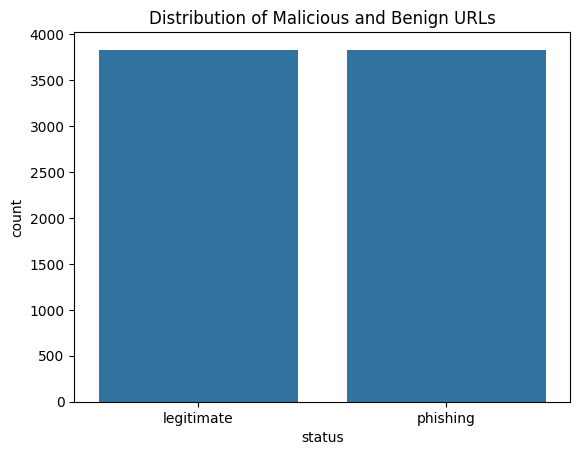

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot target variable distribution
sns.countplot(x='status', data=df)
plt.title('Distribution of Malicious and Benign URLs')
plt.show()

In [5]:
df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

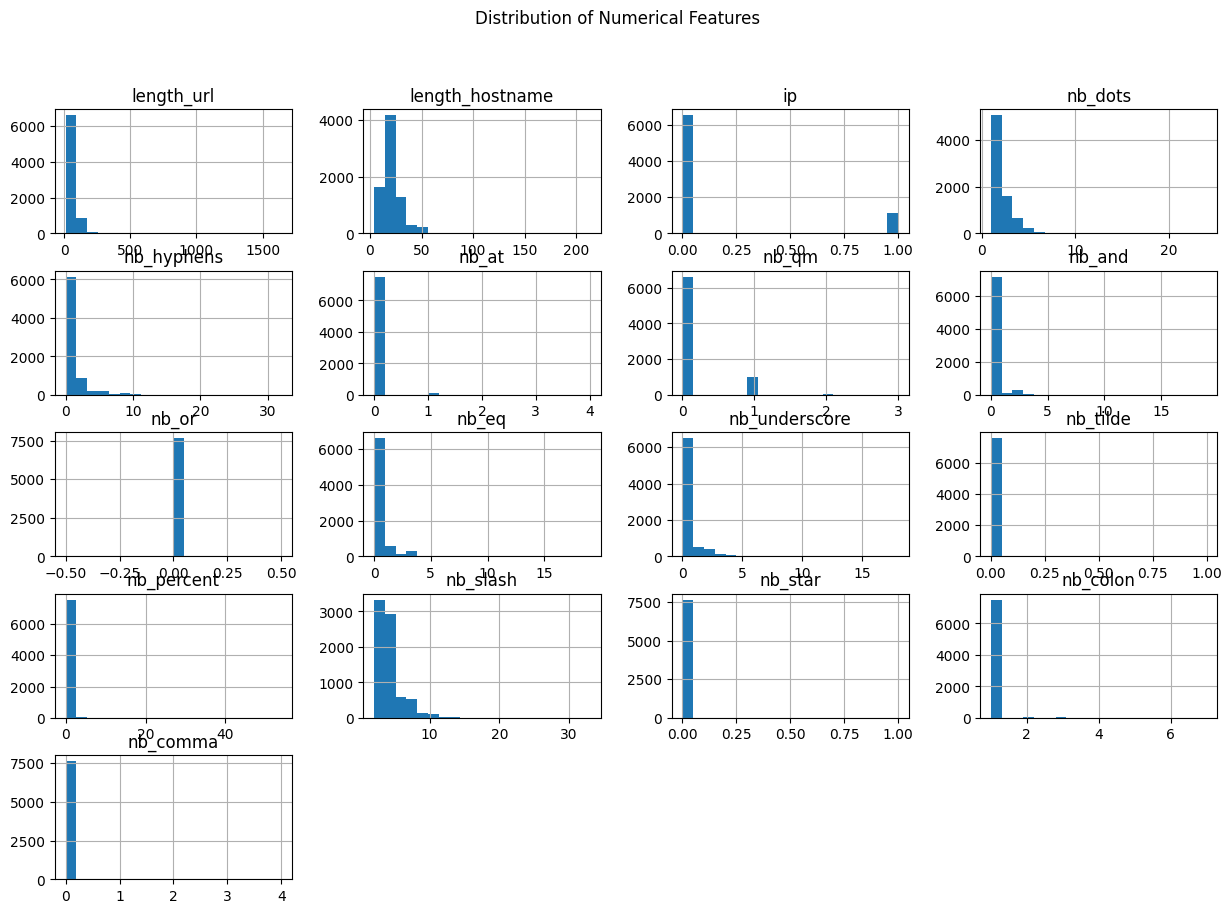

In [6]:
columns_to_plot = ['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma']
df[columns_to_plot].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()


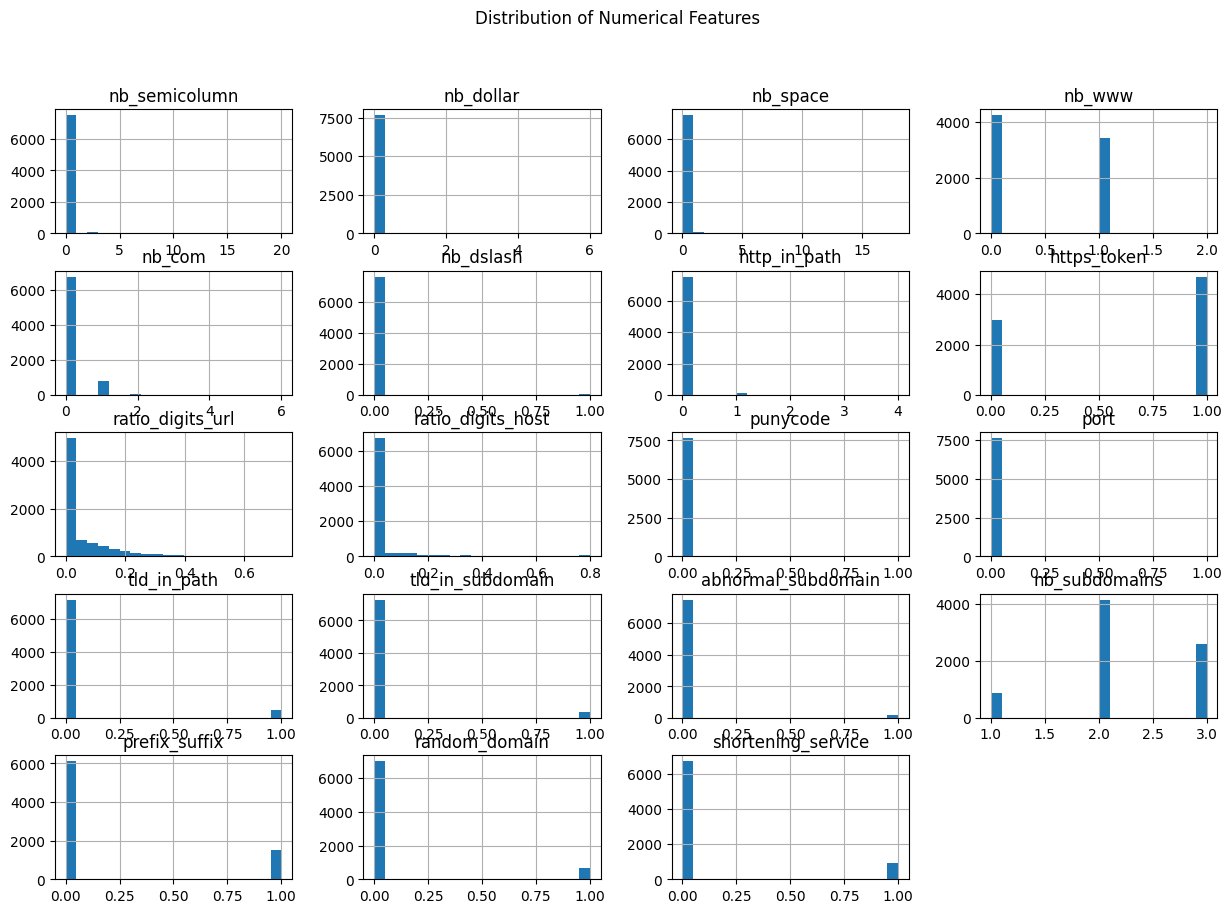

In [48]:
columns_to_plot = ['nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service']
df[columns_to_plot].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

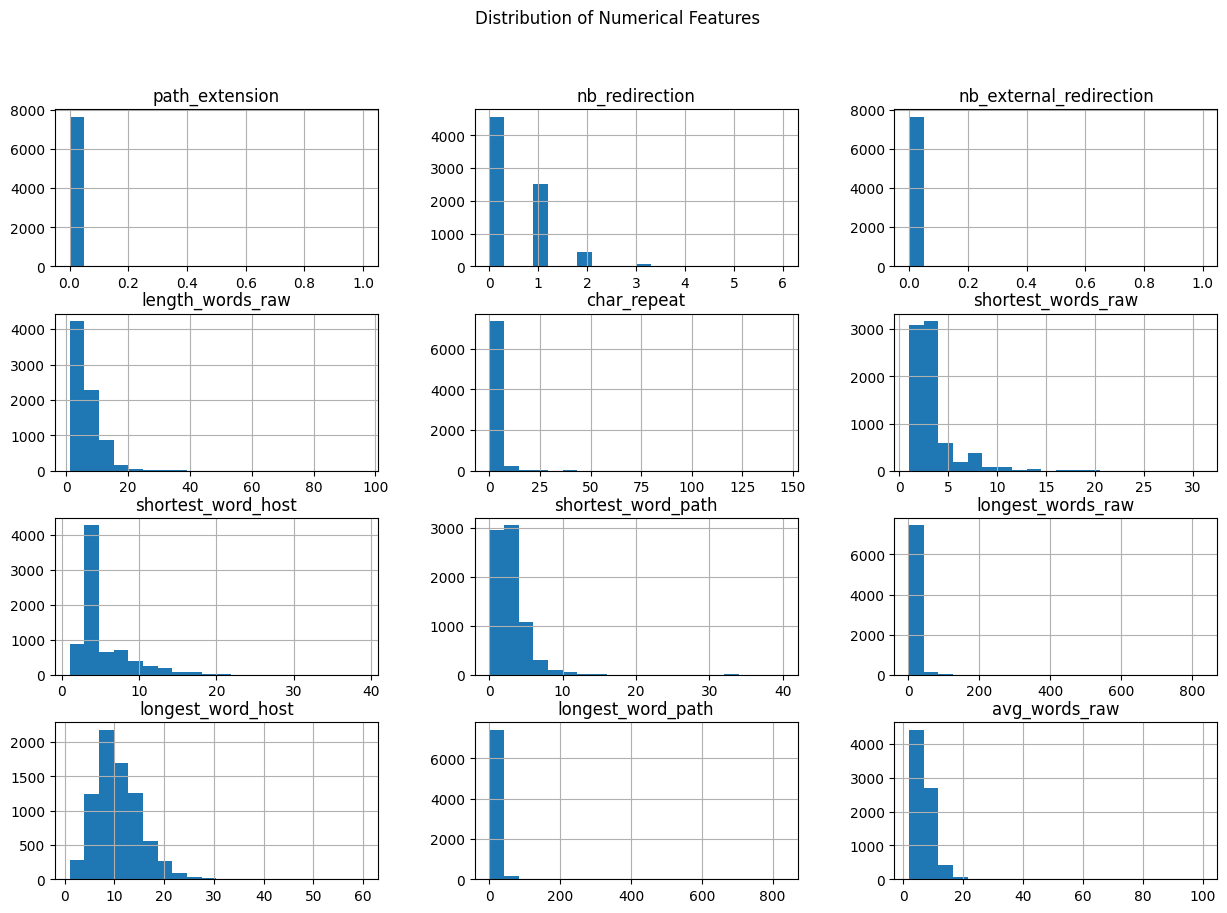

In [49]:
columns_to_plot = ['path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',]
df[columns_to_plot].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

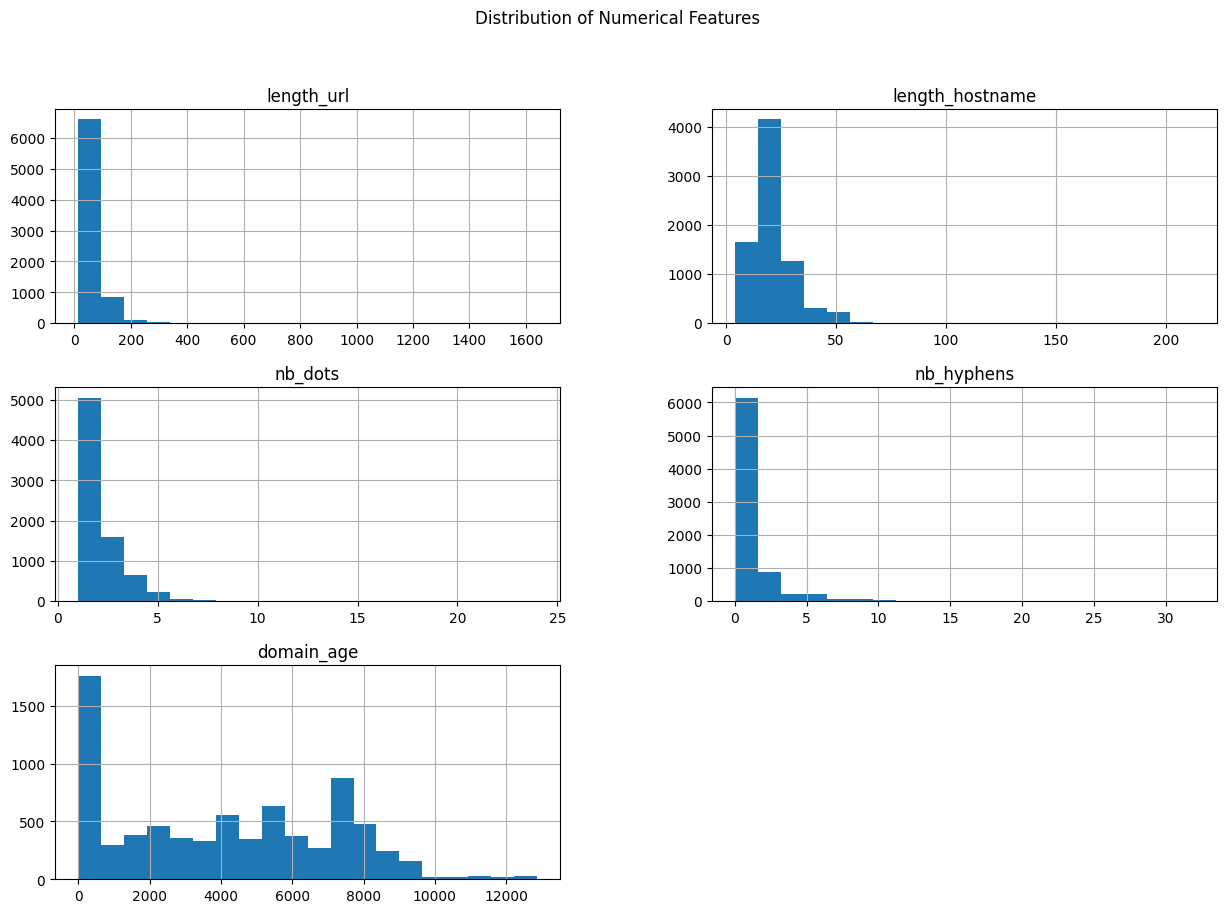

In [50]:
# Plot histograms for key features
columns_to_plot = ['length_url', 'length_hostname', 'nb_dots', 'nb_hyphens', 'domain_age']
df[columns_to_plot].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()


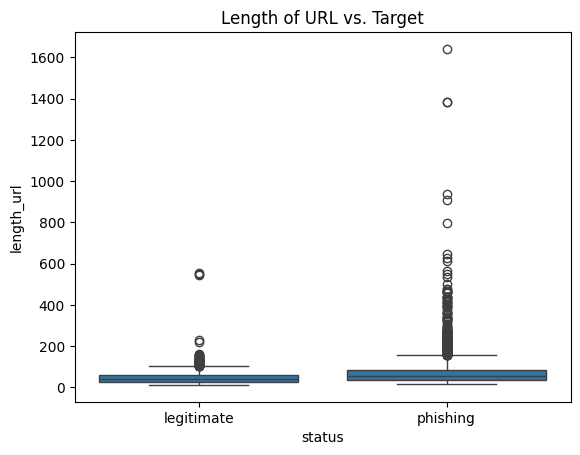

In [51]:
# Boxplot example
sns.boxplot(x='status', y='length_url', data=df)
plt.title('Length of URL vs. Target')
plt.show()

In [154]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [155]:
columns_to_check = ['length_url', 'length_hostname', 'nb_dots', 'nb_hyphens']

# Remove outliers iteratively
for col in columns_to_check:
    df = remove_outliers_iqr(df, col)


In [156]:
df

url  length_url  \
1     http://thapthan.ac.th/information/confirmation...          93   
2     http://app.dialoginsight.com/T/OFC4/L2S/3888/B...         121   
3                              https://www.bedslide.com          24   
4     https://tabs.ultimate-guitar.com/s/sex_pistols...          73   
5       http://netarafta.com/fresh/onedri/one/index.php          47   
...                                                 ...         ...   
7653  https://snip.ly/www.netflix.com-signIn-account...          63   
7654                       http://webchat.freenode.net/          28   
7655  http://mr-statucki.com/wp-content/uploads/2009...          67   
7656    https://www.computerhope.com/jargon/c/cdrom.htm          47   
7657                           https://bravonia.com.tw/          24   

      length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  \
1                  14   1        2           0      0      0       0      0   
2                  21   1        3           0      0      0       0      0   
3                  16   0        2           0      0      0       0      0   
4                  24   0        3           1      0      0       0      0   
5                  13   0        2           0      0      0       0      0   
...               ...  ..      ...         ...    ...    ...     ...    ...   
7653                7   0        3           2      0      1       0      0   
7654               20   0        2           0      0      0       0      0   
7655               15   0        2           2      0      0       0      0   
7656               20   0        3           0      0      0       0      0   
7657               15   0        2           0      0      0       0      0   

      ...  domain_in_title  domain_with_copyright  whois_registered_domain  \
1     ...                1                      0                        1   
2     ...                1                      1                        0   
3     ...                0                      0                        0   
4     ...                0                      0                        0   
5     ...                1                      0                        0   
...   ...              ...                    ...                      ...   
7653  ...                1                      0                        0   
7654  ...                1                      0                        0   
7655  ...                1                      1                        0   
7656  ...                1                      1                        0   
7657  ...                1                      1                        0   

      domain_registration_length  domain_age  web_traffic  dns_record  \
1                              0        2996      4189860           0   
2                             30        2527       346022           0   
3                            139        7531      1059151           0   
4                           3002        7590          635           0   
5                            283          -1            0           0   
...                          ...         ...          ...         ...   
7653                           0        2344        13667           0   
7654                        1813        6588       140438           0   
7655                         100        5014            0           0   
7656                        3482        8045         2580           0   
7657                         541        4573            0           0   

      google_index  page_rank      status  
1                1          2    phishing  
2                1          3    phishing  
3                0          4  legitimate  
4                1          5  legitimate  
5                1          0    phishing  
...            ...        ...         ...  
7653             1          6    phishing  
7654             0          6  legitimate  
7655             1          0    phishin

In [157]:
df['url_length'] = df['url'].apply(len)

# Find the maximum URL length
max_url_length = df['url_length'].max()

print(f"The maximum URL length is: {max_url_length}")


The maximum URL length is: 127


In [158]:
df['status_binary'] = df['status'].apply(lambda x: 1 if x == 'phishing' else 0)

# Verify the conversion
print(df[['status', 'status_binary']].head())

       status  status_binary
1    phishing              1
2    phishing              1
3  legitimate              0
4  legitimate              0
5    phishing              1


In [159]:
df = df.drop(columns=['url'], errors='ignore')

In [160]:
df=df.drop('status',axis=1)

In [161]:
df

length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  \
1             93               14   1        2           0      0      0   
2            121               21   1        3           0      0      0   
3             24               16   0        2           0      0      0   
4             73               24   0        3           1      0      0   
5             47               13   0        2           0      0      0   
...          ...              ...  ..      ...         ...    ...    ...   
7653          63                7   0        3           2      0      1   
7654          28               20   0        2           0      0      0   
7655          67               15   0        2           2      0      0   
7656          47               20   0        3           0      0      0   
7657          24               15   0        2           0      0      0   

      nb_and  nb_or  nb_eq  ...  domain_with_copyright  \
1          0      0      0  ...                      0   
2          0      0      0  ...                      1   
3          0      0      0  ...                      0   
4          0      0      0  ...                      0   
5          0      0      0  ...                      0   
...      ...    ...    ...  ...                    ...   
7653       0      0      1  ...                      0   
7654       0      0      0  ...                      0   
7655       0      0      0  ...                      1   
7656       0      0      0  ...                      1   
7657       0      0      0  ...                      1   

      whois_registered_domain  domain_registration_length  domain_age  \
1                           1                           0        2996   
2                           0                          30        2527   
3                           0                         139        7531   
4                           0                        3002        7590   
5                           0                         283          -1   
...                       ...                         ...         ...   
7653                        0                           0        2344   
7654                        0                        1813        6588   
7655                        0                         100        5014   
7656                        0                        3482        8045   
7657                        0                         541        4573   

      web_traffic  dns_record  google_index  page_rank  url_length  \
1         4189860           0             1          2          93   
2          346022           0             1          3         121   
3         1059151           0             0          4          24   
4             635           0             1          5          73   
5               0           0             1          0          47   
...           ...         ...           ...        ...         ...   
7653        13667           0             1          6          63   
7654       140438           0             0          6          28   
7655            0           0             1          0          67   
7656         2580           0             0          6          47   
7657            0           0             0          3          24   

      status_binary  
1                 1  
2                 1  
3                 0  
4                 0  
5                 1  
...             ...  
7653              1  
7654              0  
7655              1  
7656              0  
7657              0  

[5894 rows x 89 columns]

In [162]:
X = df.drop('status_binary',axis=1)  # Drop URL and target-related columns
y = df['status_binary']

In [163]:
X_test = test

In [164]:
X_test = X_test.drop(columns=['url'], errors='ignore')

In [165]:
X_test['status_binary'] = X_test['status'].apply(lambda x: 1 if x == 'phishing' else 0)

# Verify the conversion
print(X_test[['status', 'status_binary']].head())

       status  status_binary
0    phishing              1
1  legitimate              0
2  legitimate              0
3    phishing              1
4  legitimate              0


In [166]:
X_test=X_test.drop('status',axis=1)

In [167]:
y_test = X_test['status_binary']

In [168]:
X_test.drop('status_binary',axis=1,inplace=True)

In [169]:
X.drop('url_length',axis=1,inplace=True)

In [170]:
print(X.shape)
print(X_test.shape)

(5894, 87)
(3772, 87)


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import time
from sklearn.pipeline import Pipeline

#RANDOM FOREST

In [82]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])


param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2']  
}


grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Evaluation metric
    return_train_score=True,
    n_jobs=-1,  # Utilize all available cores
    verbose=3  # For progress tracking
)


start_time = time.time()
grid_search.fit(X, y)
end_time = time.time()
total_time = end_time - start_time
print(f"\nTotal Grid Search Time: {total_time:.2f} seconds")


results = grid_search.cv_results_


results_df = pd.DataFrame(results)


display_cols = ['params', 'mean_test_score', 'mean_fit_time']
display_df = results_df[display_cols]


display_df = display_df.sort_values(by='mean_fit_time', ascending=True)

print("\nHyperparameter Combinations with Their Mean Fit Times:")
print(display_df.to_string(index=False))


best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_index = grid_search.best_index_


best_fit_time = results['mean_fit_time'][best_index]

print("\nBest Hyperparameters:")
print(best_params)
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")
print(f"Training Time for Best Parameters: {best_fit_time:.4f} seconds")


best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"\nTest Set Accuracy: {test_accuracy:.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Total Grid Search Time: 171.64 seconds

Hyperparameter Combinations with Their Mean Fit Times:
                                                                                                                                                                      params  mean_test_score  mean_fit_time
   {'classifier__max_depth': 10, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}         0.951137       0.803216
  {'classifier__max_depth': 10, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}         0.950797       0.828544
  {'classifier__max_depth': 10, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}         0.952832       0.835745
   {'classifier__max

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle
import joblib

In [31]:
class_labels=['Legitamate','Phishing']

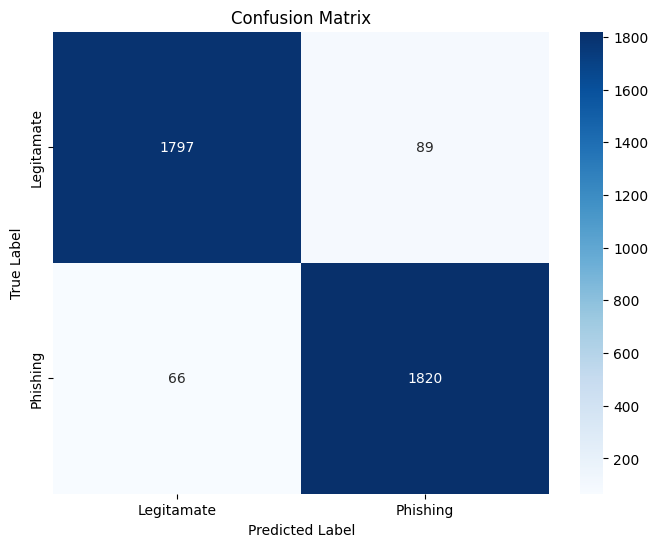

Classification Report:
               precision    recall  f1-score   support

  Legitamate       0.96      0.95      0.96      1886
    Phishing       0.95      0.97      0.96      1886

    accuracy                           0.96      3772
   macro avg       0.96      0.96      0.96      3772
weighted avg       0.96      0.96      0.96      3772



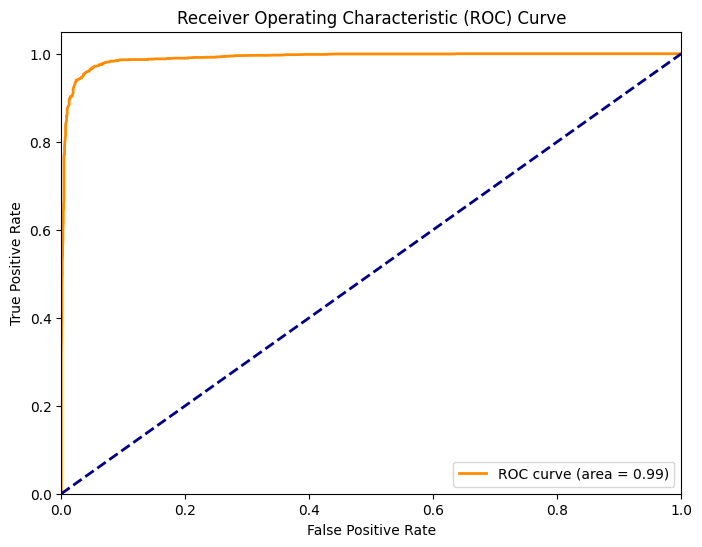

C:\Users\praga\AppData\Local\Temp\ipykernel_16648\3094215236.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


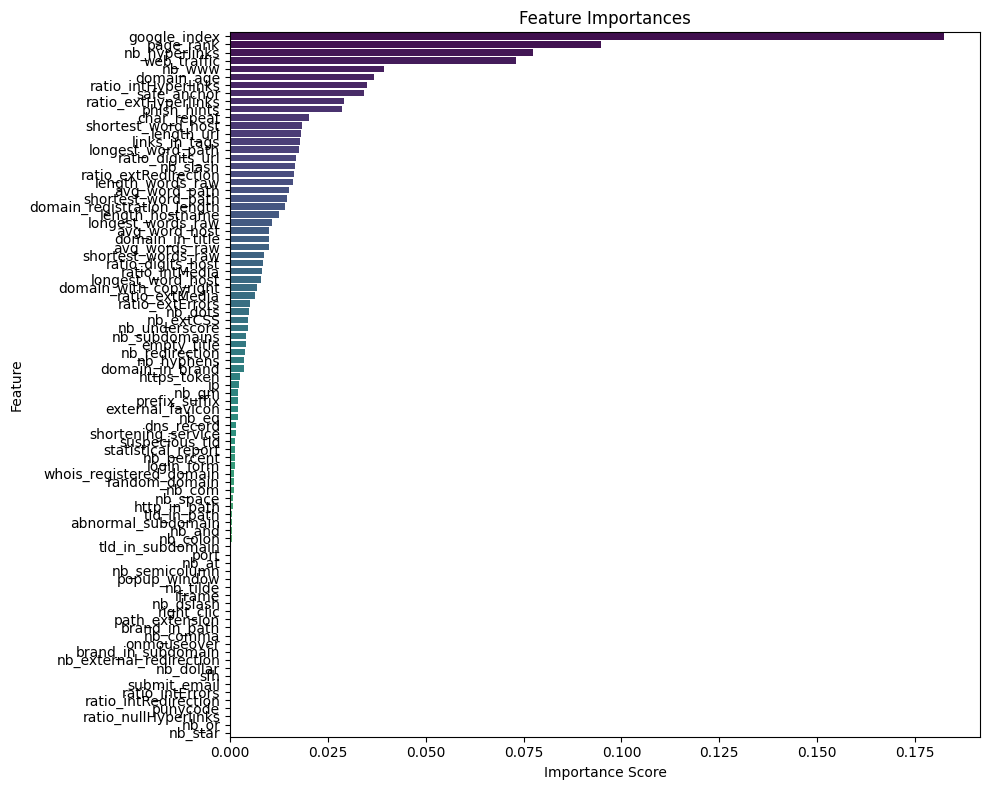


Best model saved to random_forest_all_features.pkl


In [85]:
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3. Classification Report
report = classification_report(y_test, y_pred, target_names=class_labels)
print("Classification Report:\n", report)

# 4. ROC Curve and AUC

    # Binary classification
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange',
            lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 5. Feature Importances
importances = best_model.named_steps['classifier'].feature_importances_
feature_names = X.columns if hasattr(X, 'columns') else [f'Feature {i}' for i in range(X.shape[1])]

feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 6. Save the Best Model
model_filename = 'random_forest_all_features.pkl'
joblib.dump(best_model, model_filename)
print(f"\nBest model saved to {model_filename}")

In [39]:
from sklearn.feature_selection import RFE

Evaluating 1 feature(s)...
  Test Accuracy: 0.8608 | Fit Time: 170.95 seconds
Evaluating 2 feature(s)...
  Test Accuracy: 0.8722 | Fit Time: 104.79 seconds
Evaluating 3 feature(s)...
  Test Accuracy: 0.9099 | Fit Time: 135.16 seconds
Evaluating 4 feature(s)...
  Test Accuracy: 0.9337 | Fit Time: 103.43 seconds
Evaluating 5 feature(s)...
  Test Accuracy: 0.9369 | Fit Time: 102.46 seconds
Evaluating 6 feature(s)...
  Test Accuracy: 0.9401 | Fit Time: 102.06 seconds
Evaluating 7 feature(s)...
  Test Accuracy: 0.9393 | Fit Time: 99.33 seconds
Evaluating 8 feature(s)...
  Test Accuracy: 0.9411 | Fit Time: 98.79 seconds
Evaluating 9 feature(s)...
  Test Accuracy: 0.9419 | Fit Time: 98.45 seconds
Evaluating 10 feature(s)...
  Test Accuracy: 0.9388 | Fit Time: 98.17 seconds
Evaluating 11 feature(s)...
  Test Accuracy: 0.9422 | Fit Time: 96.98 seconds
Evaluating 12 feature(s)...
  Test Accuracy: 0.9443 | Fit Time: 96.21 seconds
Evaluating 13 feature(s)...
  Test Accuracy: 0.9478 | Fit Time: 94.

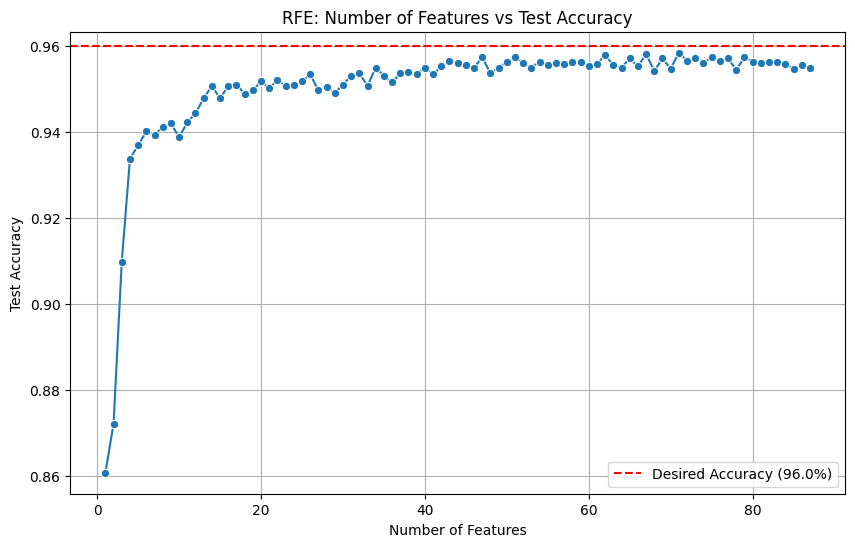

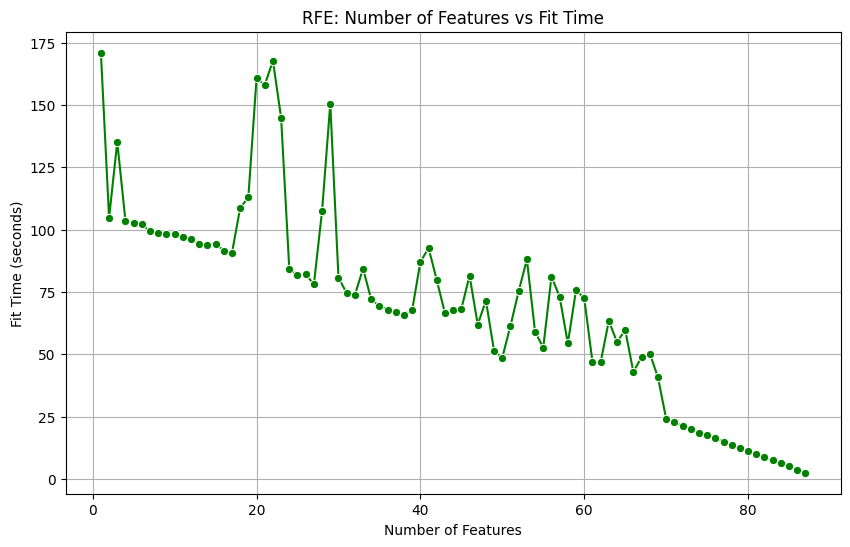

In [88]:
best_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

# Create the pipeline with scaler, RFE, and classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rfe', RFE(estimator=best_rf, step=1)),
    ('classifier', best_rf)
])

# ============================
# 3. Recursive Feature Elimination (RFE)
# ============================

# Define the desired minimum accuracy
desired_accuracy = 0.96

# Get the total number of features
total_features = X.shape[1]

# Initialize lists to store results
feature_counts = []
test_accuracies = []
fit_times = []

# Iterate over the number of features to select
for n_features in range(1, total_features + 1):
    print(f"Evaluating {n_features} feature(s)...")
    
    # Update the number of features to select in RFE
    pipeline.set_params(rfe__n_features_to_select=n_features)
    
    # Start timing
    start_time = time.time()
    
    # Fit the pipeline on the training data
    pipeline.fit(X, y)
    
    # End timing
    end_time = time.time()
    fit_time = end_time - start_time
    fit_times.append(fit_time)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Calculate test accuracy
    acc = accuracy_score(y_test, y_pred)
    feature_counts.append(n_features)
    test_accuracies.append(acc)
    
    print(f"  Test Accuracy: {acc:.4f} | Fit Time: {fit_time:.2f} seconds")
    
    # Check if the desired accuracy is met
    if acc >= desired_accuracy:
        print(f"  Desired accuracy {desired_accuracy*100}% reached with {n_features} features.")
        # Uncomment the next line if you want to stop at the first occurrence
        break

# ============================
# 4. Analyze and Select the Optimal Number of Features
# ============================

# Create a DataFrame for visualization
results_df = pd.DataFrame({
    'Number of Features': feature_counts,
    'Test Accuracy': test_accuracies,
    'Fit Time (s)': fit_times
})

# Find all feature counts that achieve desired accuracy
acceptable_results = results_df[results_df['Test Accuracy'] >= desired_accuracy]

if not acceptable_results.empty:
    # Select the minimal number of features with desired accuracy
    optimal_n_features = acceptable_results['Number of Features'].min()
    optimal_accuracy = acceptable_results[acceptable_results['Number of Features'] == optimal_n_features]['Test Accuracy'].values[0]
    print(f"\nOptimal number of features: {optimal_n_features} with Test Accuracy: {optimal_accuracy:.4f}")
else:
    print("\nNo feature subset achieved the desired accuracy.")


plt.figure(figsize=(10,6))
sns.lineplot(x='Number of Features', y='Test Accuracy', data=results_df, marker='o')
plt.axhline(y=desired_accuracy, color='r', linestyle='--', label=f'Desired Accuracy ({desired_accuracy*100}%)')
plt.title('RFE: Number of Features vs Test Accuracy')
plt.xlabel('Number of Features')
plt.ylabel('Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10,6))
sns.lineplot(x='Number of Features', y='Fit Time (s)', data=results_df, marker='o', color='green')
plt.title('RFE: Number of Features vs Fit Time')
plt.xlabel('Number of Features')
plt.ylabel('Fit Time (seconds)')
plt.grid(True)
plt.show()


if not acceptable_results.empty:

    pipeline.set_params(rfe__n_features_to_select=optimal_n_features)
    pipeline.fit(X, y)
    
 
    y_pred_optimal = pipeline.predict(X_test)
    
    # Calculate test accuracy
    test_accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
    print(f"\nTest Accuracy with {optimal_n_features} features: {test_accuracy_optimal:.4f}")
    
    # Confusion Matrix
    cm_optimal = confusion_matrix(y_test, y_pred_optimal)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='Blues',
                xticklabels=best_rf.classes_,
                yticklabels=best_rf.classes_)
    plt.title(f'Confusion Matrix (RFE: {optimal_n_features} Features)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    # Classification Report
    report_optimal = classification_report(y_test, y_pred_optimal, target_names=best_rf.classes_)
    print("Classification Report (Optimal Features):\n", report_optimal)
    
    # Feature Importances
    selected_features_mask = pipeline.named_steps['rfe'].support_
    # If X_train is a pandas DataFrame, use column names; else, use feature indices
    if isinstance(X, pd.DataFrame):
        selected_features = X.columns[selected_features_mask]
    else:
        selected_features = [f'Feature {i}' for i in range(total_features) if selected_features_mask[i]]
    
    importances_optimal = pipeline.named_steps['classifier'].feature_importances_
    
    feature_importances_optimal = pd.DataFrame({
        'Feature': selected_features,
        'Importance': importances_optimal
    }).sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importances_optimal, palette='viridis')
    plt.title('Feature Importances after RFE')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
    
    # ============================
    # 7. Save the Best Model
    # ============================
    
    # Save the entire pipeline (scaling + RFE + classifier)
    model_filename_rfe = 'random_forest_rfe_optimal_model.pkl'
    joblib.dump(pipeline, model_filename_rfe)
    print(f"\nBest RFE model saved to {model_filename_rfe}")


Time taken to perform RFE and train the model: 117.94 seconds
Selected Features (17):
['length_url', 'length_hostname', 'nb_www', 'ratio_digits_url', 'length_words_raw', 'longest_word_path', 'avg_word_path', 'phish_hints', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'safe_anchor', 'domain_registration_length', 'domain_age', 'web_traffic', 'google_index', 'page_rank']
Test Set Accuracy: 0.9512


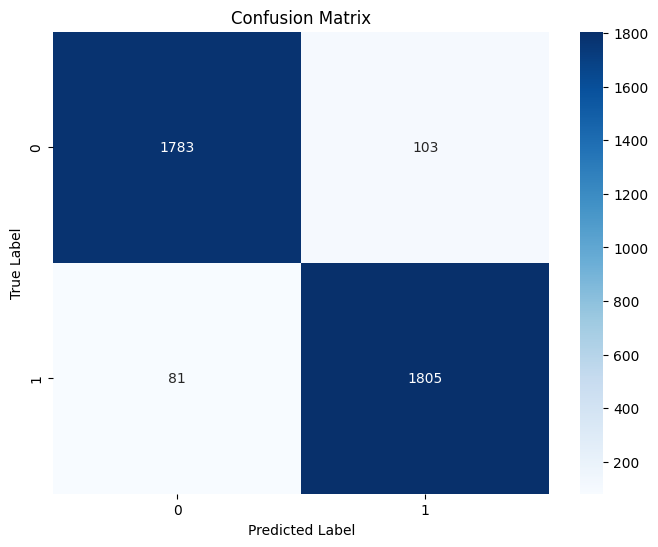

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.96      0.95      0.95      1886
     Class 1       0.95      0.96      0.95      1886

    accuracy                           0.95      3772
   macro avg       0.95      0.95      0.95      3772
weighted avg       0.95      0.95      0.95      3772



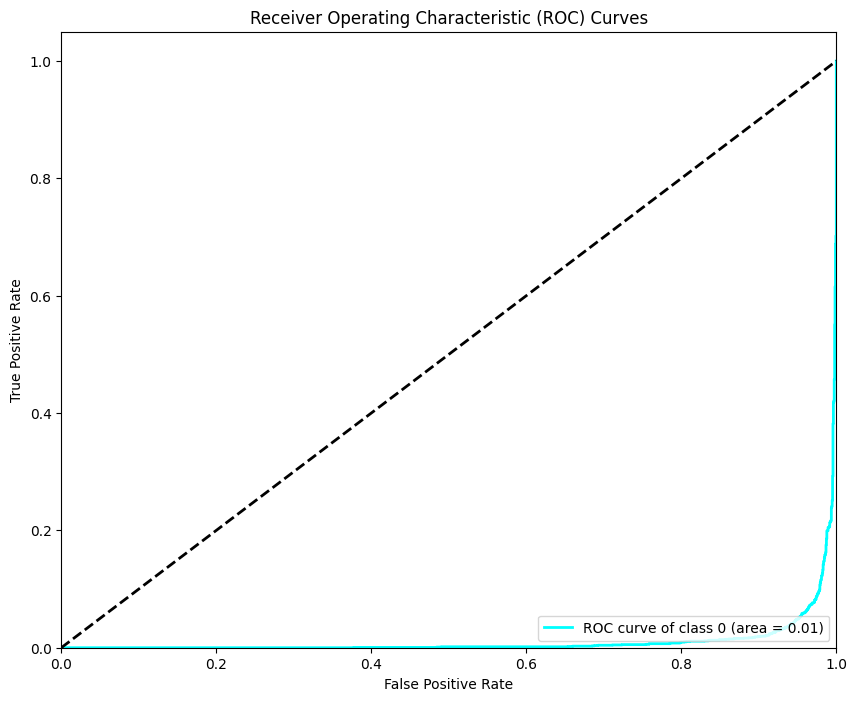

C:\Users\praga\AppData\Local\Temp\ipykernel_13800\1070447319.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


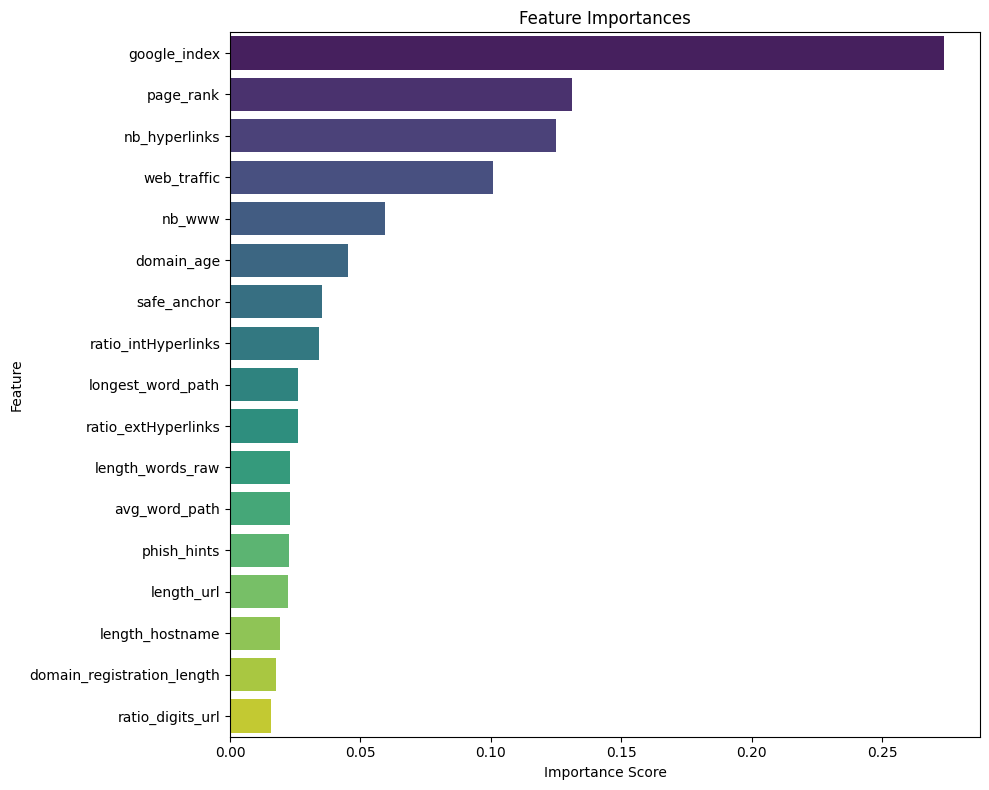

In [32]:
best_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

# Initialize RFE to select 17 features
rfe = RFE(
    estimator=best_rf,
    n_features_to_select=17,
    step=1
)

# Create a pipeline that includes RFE and the classifier
pipeline = Pipeline([
    ('rfe', rfe),
    ('classifier', best_rf)
])

# Fit the pipeline on the training data
start_time = time.time()
pipeline.fit(X, y)
end_time = time.time()
training_time = end_time - start_time
print(f"\nTime taken to perform RFE and train the model: {training_time:.2f} seconds")

# Get the selected features
selected_features = X.columns[rfe.support_]
print(f"Selected Features ({len(selected_features)}):\n{selected_features.tolist()}")

# ============================
# 3. Train the Model with Selected Features
# ============================

# Subset the training and testing data
X_train_selected = X[selected_features]
X_test_selected = X_test[selected_features]

# Fit the Random Forest Classifier on the selected features
rf_classifier = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)
rf_classifier.fit(X_train_selected, y)

# ============================
# 4. Evaluate the Model
# ============================

# Generate predictions
y_pred = rf_classifier.predict(X_test_selected)
y_pred_proba = rf_classifier.predict_proba(X_test_selected)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

# ============================
# 5. Visualization and Metrics
# ============================

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = sorted(y.unique())

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred, target_names=[f"Class {cls}" for cls in class_labels])
print("Classification Report:\n", report)



y_test_binarized = label_binarize(y_test, classes=class_labels)
n_classes = y_test_binarized.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
                label=f'ROC curve of class {class_labels[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Feature Importances
importances = rf_classifier.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Evaluating PCA with 1 component(s)...
Time taken to fit PCA: 0.4001 seconds
Time taken to train Random Forest: 0.4374 seconds
Test Set Accuracy: 0.8102

Evaluating PCA with 2 component(s)...
Time taken to fit PCA: 0.1650 seconds
Time taken to train Random Forest: 0.4699 seconds
Test Set Accuracy: 0.8378

Evaluating PCA with 3 component(s)...
Time taken to fit PCA: 0.1306 seconds
Time taken to train Random Forest: 0.3715 seconds
Test Set Accuracy: 0.8324

Evaluating PCA with 4 component(s)...
Time taken to fit PCA: 0.1165 seconds
Time taken to train Random Forest: 0.3289 seconds
Test Set Accuracy: 0.8404

Evaluating PCA with 5 component(s)...
Time taken to fit PCA: 0.0233 seconds
Time taken to train Random Forest: 0.3421 seconds
Test Set Accuracy: 0.8457

Evaluating PCA with 6 component(s)...
Time taken to fit PCA: 0.3174 seconds
Time taken to train Random Forest: 0.3260 seconds
Test Set Accuracy: 0.8534

Evaluating PCA with 7 component(s)...
Time taken to fit PCA: 0.3468 seconds
Time 

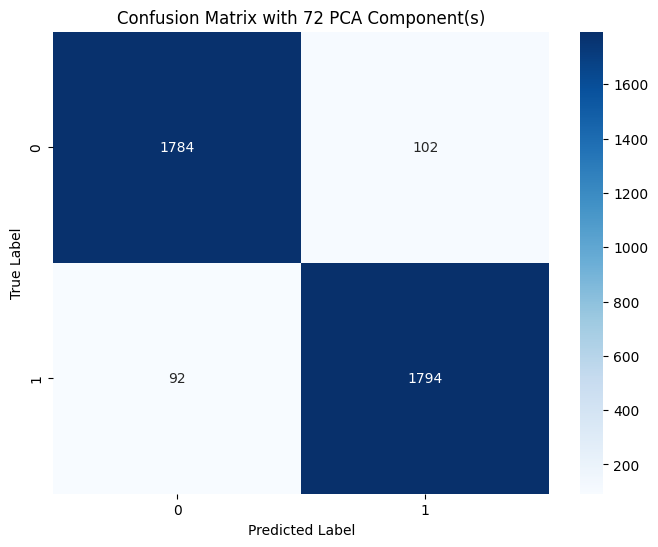


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.95      0.95      0.95      1886
     Class 1       0.95      0.95      0.95      1886

    accuracy                           0.95      3772
   macro avg       0.95      0.95      0.95      3772
weighted avg       0.95      0.95      0.95      3772



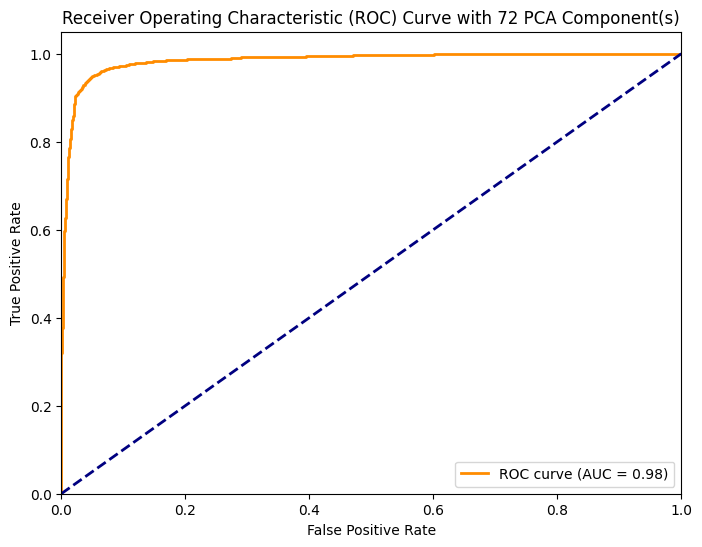

C:\Users\praga\AppData\Local\Temp\ipykernel_13800\3215687008.py:245: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Principal Component', data=component_importances_pca, palette='viridis')


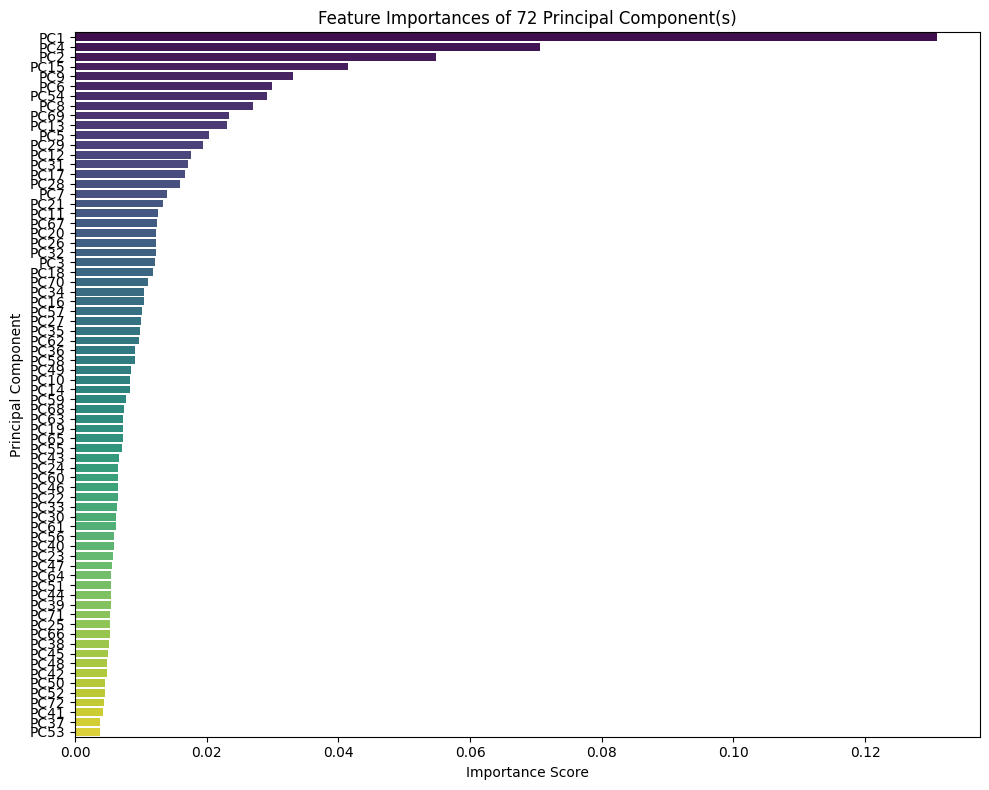

In [36]:

from sklearn.decomposition import PCA



# ============================
# 2. Define Desired Accuracy
# ============================

desired_accuracy = 0.95  # 95% accuracy

# ============================
# 3. Define Function to Find Optimal PCA Components
# ============================

def find_optimal_pca_components(X_train, y_train, X_test, y_test, desired_accuracy=0.95):
    """
    Determines the optimal number of PCA components to achieve at least the desired accuracy.
    If the desired accuracy is not met, selects the number of components with the highest accuracy.

    Parameters:
    - X_train: Training features.
    - y_train: Training labels.
    - X_test: Testing features.
    - y_test: Testing labels.
    - desired_accuracy: The target accuracy threshold.

    Returns:
    - optimal_n_components: The number of PCA components that meet or exceed the desired accuracy.
    - component_accuracies: A dictionary mapping number of components to test set accuracies.
    - component_times_pca: A dictionary mapping number of components to PCA fitting times.
    - component_times_rf: A dictionary mapping number of components to RF training times.
    """
    component_accuracies = {}
    component_times_pca = {}
    component_times_rf = {}
    n_features = X_train.shape[1]
    optimal_n_components = None
    best_accuracy = 0
    best_n_components = 0

    for n in range(1, n_features + 1):
        print(f"\nEvaluating PCA with {n} component(s)...")
        
        # Initialize PCA with n components
        pca = PCA(n_components=n, svd_solver='full')
        
        # Measure the time taken to fit PCA
        start_time_pca = time.time()
        pca.fit(X_train)
        end_time_pca = time.time()
        pca_fit_time = end_time_pca - start_time_pca
        component_times_pca[n] = pca_fit_time
        print(f"Time taken to fit PCA: {pca_fit_time:.4f} seconds")
        
        # Transform the data
        X_train_pca = pca.transform(X_train)
        X_test_pca = pca.transform(X_test)
        
        # Initialize the Random Forest Classifier
        rf_pca = RandomForestClassifier(
            n_estimators=200,
            max_depth=20,
            min_samples_split=5,
            min_samples_leaf=2,
            max_features='sqrt',
            random_state=42,
            n_jobs=-1  # Utilize all available cores
        )
        
        # Measure the time taken to train the classifier
        start_time_rf = time.time()
        rf_pca.fit(X_train_pca, y_train)
        end_time_rf = time.time()
        rf_training_time = end_time_rf - start_time_rf
        component_times_rf[n] = rf_training_time
        print(f"Time taken to train Random Forest: {rf_training_time:.4f} seconds")
        
        # Generate predictions
        y_pred_pca = rf_pca.predict(X_test_pca)
        
        # Calculate accuracy
        accuracy_pca = accuracy_score(y_test, y_pred_pca)
        component_accuracies[n] = accuracy_pca
        print(f"Test Set Accuracy: {accuracy_pca:.4f}")
        
        # Update best accuracy and components if current accuracy is higher
        if accuracy_pca > best_accuracy:
            best_accuracy = accuracy_pca
            best_n_components = n
        
        # Check if desired accuracy is achieved
        if accuracy_pca >= desired_accuracy:
            optimal_n_components = n
            print(f"\nDesired accuracy of {desired_accuracy*100}% achieved with {n} component(s).")
            break

    # If desired accuracy not achieved, select the number of components with the highest accuracy
    if optimal_n_components is None:
        optimal_n_components = best_n_components
        optimal_accuracy = best_accuracy
        print(f"\nDesired accuracy of {desired_accuracy*100}% not achieved.")
        print(f"Using {optimal_n_components} component(s) with Test Set Accuracy: {optimal_accuracy:.4f}")
    
    return optimal_n_components, component_accuracies, component_times_pca, component_times_rf

# ============================
# 4. Find the Optimal Number of PCA Components
# ============================

# Find the optimal number of PCA components
optimal_n_components, component_accuracies, component_times_pca, component_times_rf = find_optimal_pca_components(
    X, y, X_test, y_test, desired_accuracy
)

print(f"\nOptimal number of PCA components: {optimal_n_components}")

# ============================
# 5. Train the Random Forest Model with Selected PCA Components
# ============================

# Initialize PCA with the optimal number of components
pca_optimal = PCA(n_components=optimal_n_components, svd_solver='full')

# Measure the time taken to fit PCA
start_time_pca_fit = time.time()
pca_optimal.fit(X)
end_time_pca_fit = time.time()
pca_fit_time = end_time_pca_fit - start_time_pca_fit
print(f"\nTime taken to fit PCA with {optimal_n_components} components: {pca_fit_time:.2f} seconds")

# Transform the training and testing data
X_train_pca = pca_optimal.transform(X)
X_test_pca = pca_optimal.transform(X_test)

print(f"Shape of training data after PCA: {X_train_pca.shape}")
print(f"Shape of testing data after PCA: {X_test_pca.shape}")

# Initialize the Random Forest Classifier with your best hyperparameters
best_rf_pca = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1  # Utilize all available cores
)

# Measure the time taken to train the classifier
start_time_rf_pca = time.time()
best_rf_pca.fit(X_train_pca, y)
end_time_rf_pca = time.time()
rf_pca_training_time = end_time_rf_pca - start_time_rf_pca
print(f"\nTime taken to train the Random Forest model on PCA components: {rf_pca_training_time:.2f} seconds")

# ============================
# 6. Evaluate the Model
# ============================

# Generate predictions
y_pred_pca = best_rf_pca.predict(X_test_pca)
y_pred_proba_pca = best_rf_pca.predict_proba(X_test_pca)

# Calculate accuracy
test_accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"\nTest Set Accuracy: {test_accuracy_pca:.4f}")

# ============================
# 7. Visualization and Metrics
# ============================

# Confusion Matrix
cm_pca = confusion_matrix(y_test, y_pred_pca)
class_labels = sorted(y.unique())

plt.figure(figsize=(8,6))
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title(f'Confusion Matrix with {optimal_n_components} PCA Component(s)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
report_pca = classification_report(y_test, y_pred_pca, target_names=[f"Class {cls}" for cls in class_labels])
print("\nClassification Report:\n", report_pca)

# ROC Curve and AUC
if len(class_labels) == 2:
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_pca[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve with {optimal_n_components} PCA Component(s)')
    plt.legend(loc="lower right")
    plt.show()
else:
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc
    from itertools import cycle

    y_test_binarized = label_binarize(y_test, classes=class_labels)
    n_classes = y_test_binarized.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba_pca[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {class_labels[i]} (AUC = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.show()

# Feature Importances
importances_pca = best_rf_pca.feature_importances_
component_importances_pca = pd.DataFrame({
    'Principal Component': [f'PC{i}' for i in range(1, optimal_n_components + 1)],
    'Importance': importances_pca
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Principal Component', data=component_importances_pca, palette='viridis')
plt.title(f'Feature Importances of {optimal_n_components} Principal Component(s)')
plt.xlabel('Importance Score')
plt.ylabel('Principal Component')
plt.tight_layout()
plt.show()


Extracted Data:
   n_components  pca_time_sec  rf_time_sec  accuracy
0             1        0.4001       0.4374    0.8102
1             2        0.1650       0.4699    0.8378
2             3        0.1306       0.3715    0.8324
3             4        0.1165       0.3289    0.8404
4             5        0.0233       0.3421    0.8457


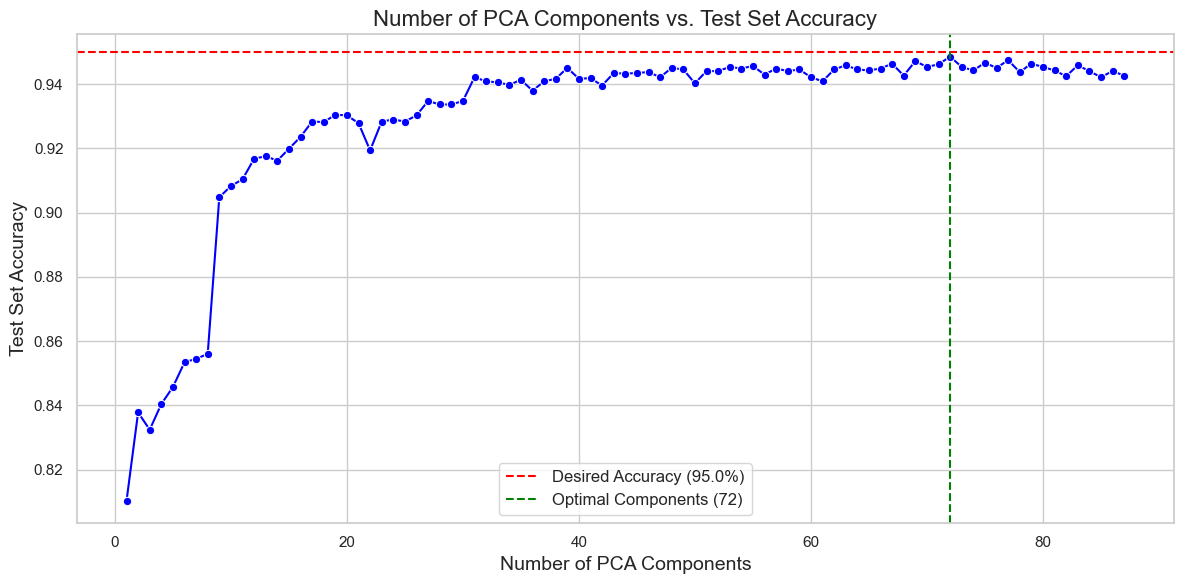

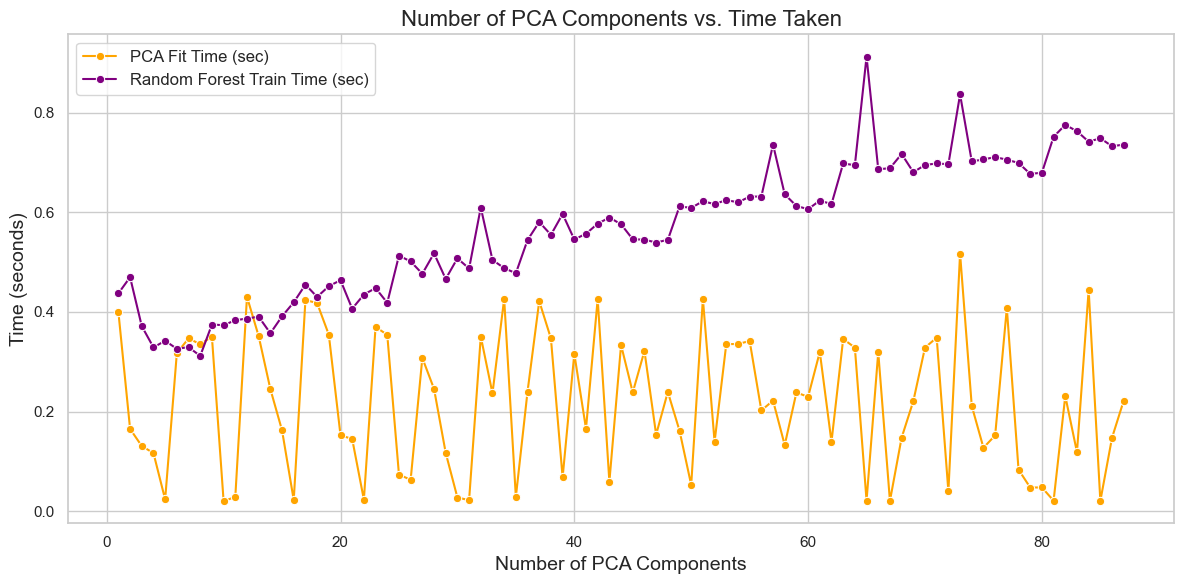

In [37]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1. Store the Output Data
# ---------------------------

output = """
Evaluating PCA with 1 component(s)...
Time taken to fit PCA: 0.4001 seconds
Time taken to train Random Forest: 0.4374 seconds
Test Set Accuracy: 0.8102

Evaluating PCA with 2 component(s)...
Time taken to fit PCA: 0.1650 seconds
Time taken to train Random Forest: 0.4699 seconds
Test Set Accuracy: 0.8378

Evaluating PCA with 3 component(s)...
Time taken to fit PCA: 0.1306 seconds
Time taken to train Random Forest: 0.3715 seconds
Test Set Accuracy: 0.8324

Evaluating PCA with 4 component(s)...
Time taken to fit PCA: 0.1165 seconds
Time taken to train Random Forest: 0.3289 seconds
Test Set Accuracy: 0.8404

Evaluating PCA with 5 component(s)...
Time taken to fit PCA: 0.0233 seconds
Time taken to train Random Forest: 0.3421 seconds
Test Set Accuracy: 0.8457

Evaluating PCA with 6 component(s)...
Time taken to fit PCA: 0.3174 seconds
Time taken to train Random Forest: 0.3260 seconds
Test Set Accuracy: 0.8534

Evaluating PCA with 7 component(s)...
Time taken to fit PCA: 0.3468 seconds
Time taken to train Random Forest: 0.3294 seconds
Test Set Accuracy: 0.8545

Evaluating PCA with 8 component(s)...
Time taken to fit PCA: 0.3353 seconds
Time taken to train Random Forest: 0.3117 seconds
Test Set Accuracy: 0.8560

Evaluating PCA with 9 component(s)...
Time taken to fit PCA: 0.3502 seconds
Time taken to train Random Forest: 0.3747 seconds
Test Set Accuracy: 0.9048

Evaluating PCA with 10 component(s)...
Time taken to fit PCA: 0.0201 seconds
Time taken to train Random Forest: 0.3735 seconds
Test Set Accuracy: 0.9083

Evaluating PCA with 11 component(s)...
Time taken to fit PCA: 0.0282 seconds
Time taken to train Random Forest: 0.3834 seconds
Test Set Accuracy: 0.9104

Evaluating PCA with 12 component(s)...
Time taken to fit PCA: 0.4305 seconds
Time taken to train Random Forest: 0.3868 seconds
Test Set Accuracy: 0.9168

Evaluating PCA with 13 component(s)...
Time taken to fit PCA: 0.3514 seconds
Time taken to train Random Forest: 0.3905 seconds
Test Set Accuracy: 0.9176

Evaluating PCA with 14 component(s)...
Time taken to fit PCA: 0.2451 seconds
Time taken to train Random Forest: 0.3572 seconds
Test Set Accuracy: 0.9162

Evaluating PCA with 15 component(s)...
Time taken to fit PCA: 0.1620 seconds
Time taken to train Random Forest: 0.3913 seconds
Test Set Accuracy: 0.9199

Evaluating PCA with 16 component(s)...
Time taken to fit PCA: 0.0220 seconds
Time taken to train Random Forest: 0.4194 seconds
Test Set Accuracy: 0.9236

Evaluating PCA with 17 component(s)...
Time taken to fit PCA: 0.4241 seconds
Time taken to train Random Forest: 0.4550 seconds
Test Set Accuracy: 0.9284

Evaluating PCA with 18 component(s)...
Time taken to fit PCA: 0.4178 seconds
Time taken to train Random Forest: 0.4303 seconds
Test Set Accuracy: 0.9282

Evaluating PCA with 19 component(s)...
Time taken to fit PCA: 0.3544 seconds
Time taken to train Random Forest: 0.4518 seconds
Test Set Accuracy: 0.9305

Evaluating PCA with 20 component(s)...
Time taken to fit PCA: 0.1524 seconds
Time taken to train Random Forest: 0.4639 seconds
Test Set Accuracy: 0.9303

Evaluating PCA with 21 component(s)...
Time taken to fit PCA: 0.1447 seconds
Time taken to train Random Forest: 0.4066 seconds
Test Set Accuracy: 0.9279

Evaluating PCA with 22 component(s)...
Time taken to fit PCA: 0.0229 seconds
Time taken to train Random Forest: 0.4350 seconds
Test Set Accuracy: 0.9194

Evaluating PCA with 23 component(s)...
Time taken to fit PCA: 0.3700 seconds
Time taken to train Random Forest: 0.4480 seconds
Test Set Accuracy: 0.9284

Evaluating PCA with 24 component(s)...
Time taken to fit PCA: 0.3541 seconds
Time taken to train Random Forest: 0.4185 seconds
Test Set Accuracy: 0.9290

Evaluating PCA with 25 component(s)...
Time taken to fit PCA: 0.0734 seconds
Time taken to train Random Forest: 0.5132 seconds
Test Set Accuracy: 0.9284

Evaluating PCA with 26 component(s)...
Time taken to fit PCA: 0.0627 seconds
Time taken to train Random Forest: 0.5016 seconds
Test Set Accuracy: 0.9303

Evaluating PCA with 27 component(s)...
Time taken to fit PCA: 0.3076 seconds
Time taken to train Random Forest: 0.4768 seconds
Test Set Accuracy: 0.9348

Evaluating PCA with 28 component(s)...
Time taken to fit PCA: 0.2456 seconds
Time taken to train Random Forest: 0.5179 seconds
Test Set Accuracy: 0.9337

Evaluating PCA with 29 component(s)...
Time taken to fit PCA: 0.1168 seconds
Time taken to train Random Forest: 0.4664 seconds
Test Set Accuracy: 0.9337

Evaluating PCA with 30 component(s)...
Time taken to fit PCA: 0.0271 seconds
Time taken to train Random Forest: 0.5078 seconds
Test Set Accuracy: 0.9348

Evaluating PCA with 31 component(s)...
Time taken to fit PCA: 0.0219 seconds
Time taken to train Random Forest: 0.4874 seconds
Test Set Accuracy: 0.9422

Evaluating PCA with 32 component(s)...
Time taken to fit PCA: 0.3506 seconds
Time taken to train Random Forest: 0.6099 seconds
Test Set Accuracy: 0.9409

Evaluating PCA with 33 component(s)...
Time taken to fit PCA: 0.2364 seconds
Time taken to train Random Forest: 0.5045 seconds
Test Set Accuracy: 0.9406

Evaluating PCA with 34 component(s)...
Time taken to fit PCA: 0.4263 seconds
Time taken to train Random Forest: 0.4882 seconds
Test Set Accuracy: 0.9398

Evaluating PCA with 35 component(s)...
Time taken to fit PCA: 0.0283 seconds
Time taken to train Random Forest: 0.4778 seconds
Test Set Accuracy: 0.9414

Evaluating PCA with 36 component(s)...
Time taken to fit PCA: 0.2401 seconds
Time taken to train Random Forest: 0.5446 seconds
Test Set Accuracy: 0.9380

Evaluating PCA with 37 component(s)...
Time taken to fit PCA: 0.4218 seconds
Time taken to train Random Forest: 0.5808 seconds
Test Set Accuracy: 0.9409

Evaluating PCA with 38 component(s)...
Time taken to fit PCA: 0.3468 seconds
Time taken to train Random Forest: 0.5550 seconds
Test Set Accuracy: 0.9417

Evaluating PCA with 39 component(s)...
Time taken to fit PCA: 0.0674 seconds
Time taken to train Random Forest: 0.5969 seconds
Test Set Accuracy: 0.9451

Evaluating PCA with 40 component(s)...
Time taken to fit PCA: 0.3160 seconds
Time taken to train Random Forest: 0.5457 seconds
Test Set Accuracy: 0.9417

Evaluating PCA with 41 component(s)...
Time taken to fit PCA: 0.1655 seconds
Time taken to train Random Forest: 0.5572 seconds
Test Set Accuracy: 0.9419

Evaluating PCA with 42 component(s)...
Time taken to fit PCA: 0.4261 seconds
Time taken to train Random Forest: 0.5774 seconds
Test Set Accuracy: 0.9396

Evaluating PCA with 43 component(s)...
Time taken to fit PCA: 0.0588 seconds
Time taken to train Random Forest: 0.5898 seconds
Test Set Accuracy: 0.9435

Evaluating PCA with 44 component(s)...
Time taken to fit PCA: 0.3336 seconds
Time taken to train Random Forest: 0.5763 seconds
Test Set Accuracy: 0.9433

Evaluating PCA with 45 component(s)...
Time taken to fit PCA: 0.2383 seconds
Time taken to train Random Forest: 0.5461 seconds
Test Set Accuracy: 0.9435

Evaluating PCA with 46 component(s)...
Time taken to fit PCA: 0.3217 seconds
Time taken to train Random Forest: 0.5453 seconds
Test Set Accuracy: 0.9438

Evaluating PCA with 47 component(s)...
Time taken to fit PCA: 0.1536 seconds
Time taken to train Random Forest: 0.5396 seconds
Test Set Accuracy: 0.9422

Evaluating PCA with 48 component(s)...
Time taken to fit PCA: 0.2393 seconds
Time taken to train Random Forest: 0.5450 seconds
Test Set Accuracy: 0.9451

Evaluating PCA with 49 component(s)...
Time taken to fit PCA: 0.1616 seconds
Time taken to train Random Forest: 0.6122 seconds
Test Set Accuracy: 0.9446

Evaluating PCA with 50 component(s)...
Time taken to fit PCA: 0.0525 seconds
Time taken to train Random Forest: 0.6092 seconds
Test Set Accuracy: 0.9403

Evaluating PCA with 51 component(s)...
Time taken to fit PCA: 0.4264 seconds
Time taken to train Random Forest: 0.6226 seconds
Test Set Accuracy: 0.9441

Evaluating PCA with 52 component(s)...
Time taken to fit PCA: 0.1390 seconds
Time taken to train Random Forest: 0.6167 seconds
Test Set Accuracy: 0.9441

Evaluating PCA with 53 component(s)...
Time taken to fit PCA: 0.3354 seconds
Time taken to train Random Forest: 0.6250 seconds
Test Set Accuracy: 0.9454

Evaluating PCA with 54 component(s)...
Time taken to fit PCA: 0.3356 seconds
Time taken to train Random Forest: 0.6203 seconds
Test Set Accuracy: 0.9449

Evaluating PCA with 55 component(s)...
Time taken to fit PCA: 0.3417 seconds
Time taken to train Random Forest: 0.6318 seconds
Test Set Accuracy: 0.9457

Evaluating PCA with 56 component(s)...
Time taken to fit PCA: 0.2021 seconds
Time taken to train Random Forest: 0.6320 seconds
Test Set Accuracy: 0.9430

Evaluating PCA with 57 component(s)...
Time taken to fit PCA: 0.2219 seconds
Time taken to train Random Forest: 0.7363 seconds
Test Set Accuracy: 0.9449

Evaluating PCA with 58 component(s)...
Time taken to fit PCA: 0.1326 seconds
Time taken to train Random Forest: 0.6364 seconds
Test Set Accuracy: 0.9441

Evaluating PCA with 59 component(s)...
Time taken to fit PCA: 0.2382 seconds
Time taken to train Random Forest: 0.6131 seconds
Test Set Accuracy: 0.9446

Evaluating PCA with 60 component(s)...
Time taken to fit PCA: 0.2295 seconds
Time taken to train Random Forest: 0.6065 seconds
Test Set Accuracy: 0.9422

Evaluating PCA with 61 component(s)...
Time taken to fit PCA: 0.3197 seconds
Time taken to train Random Forest: 0.6240 seconds
Test Set Accuracy: 0.9409

Evaluating PCA with 62 component(s)...
Time taken to fit PCA: 0.1390 seconds
Time taken to train Random Forest: 0.6167 seconds
Test Set Accuracy: 0.9446

Evaluating PCA with 63 component(s)...
Time taken to fit PCA: 0.3457 seconds
Time taken to train Random Forest: 0.6985 seconds
Test Set Accuracy: 0.9459

Evaluating PCA with 64 component(s)...
Time taken to fit PCA: 0.3285 seconds
Time taken to train Random Forest: 0.6949 seconds
Test Set Accuracy: 0.9446

Evaluating PCA with 65 component(s)...
Time taken to fit PCA: 0.0208 seconds
Time taken to train Random Forest: 0.9131 seconds
Test Set Accuracy: 0.9443

Evaluating PCA with 66 component(s)...
Time taken to fit PCA: 0.3192 seconds
Time taken to train Random Forest: 0.6868 seconds
Test Set Accuracy: 0.9449

Evaluating PCA with 67 component(s)...
Time taken to fit PCA: 0.0203 seconds
Time taken to train Random Forest: 0.6889 seconds
Test Set Accuracy: 0.9464

Evaluating PCA with 68 component(s)...
Time taken to fit PCA: 0.1474 seconds
Time taken to train Random Forest: 0.7175 seconds
Test Set Accuracy: 0.9427

Evaluating PCA with 69 component(s)...
Time taken to fit PCA: 0.2208 seconds
Time taken to train Random Forest: 0.6810 seconds
Test Set Accuracy: 0.9472

Evaluating PCA with 70 component(s)...
Time taken to fit PCA: 0.3285 seconds
Time taken to train Random Forest: 0.6953 seconds
Test Set Accuracy: 0.9454

Evaluating PCA with 71 component(s)...
Time taken to fit PCA: 0.3483 seconds
Time taken to train Random Forest: 0.6985 seconds
Test Set Accuracy: 0.9462

Evaluating PCA with 72 component(s)...
Time taken to fit PCA: 0.0396 seconds
Time taken to train Random Forest: 0.6969 seconds
Test Set Accuracy: 0.9486

Evaluating PCA with 73 component(s)...
Time taken to fit PCA: 0.5174 seconds
Time taken to train Random Forest: 0.8372 seconds
Test Set Accuracy: 0.9454

Evaluating PCA with 74 component(s)...
Time taken to fit PCA: 0.2112 seconds
Time taken to train Random Forest: 0.7026 seconds
Test Set Accuracy: 0.9443

Evaluating PCA with 75 component(s)...
Time taken to fit PCA: 0.1272 seconds
Time taken to train Random Forest: 0.7065 seconds
Test Set Accuracy: 0.9467

Evaluating PCA with 76 component(s)...
Time taken to fit PCA: 0.1519 seconds
Time taken to train Random Forest: 0.7113 seconds
Test Set Accuracy: 0.9451

Evaluating PCA with 77 component(s)...
Time taken to fit PCA: 0.4079 seconds
Time taken to train Random Forest: 0.7060 seconds
Test Set Accuracy: 0.9475

Evaluating PCA with 78 component(s)...
Time taken to fit PCA: 0.0833 seconds
Time taken to train Random Forest: 0.6995 seconds
Test Set Accuracy: 0.9438

Evaluating PCA with 79 component(s)...
Time taken to fit PCA: 0.0472 seconds
Time taken to train Random Forest: 0.6775 seconds
Test Set Accuracy: 0.9464

Evaluating PCA with 80 component(s)...
Time taken to fit PCA: 0.0474 seconds
Time taken to train Random Forest: 0.6798 seconds
Test Set Accuracy: 0.9454

Evaluating PCA with 81 component(s)...
Time taken to fit PCA: 0.0208 seconds
Time taken to train Random Forest: 0.7521 seconds
Test Set Accuracy: 0.9443

Evaluating PCA with 82 component(s)...
Time taken to fit PCA: 0.2311 seconds
Time taken to train Random Forest: 0.7760 seconds
Test Set Accuracy: 0.9425

Evaluating PCA with 83 component(s)...
Time taken to fit PCA: 0.1183 seconds
Time taken to train Random Forest: 0.7633 seconds
Test Set Accuracy: 0.9459

Evaluating PCA with 84 component(s)...
Time taken to fit PCA: 0.4444 seconds
Time taken to train Random Forest: 0.7422 seconds
Test Set Accuracy: 0.9441

Evaluating PCA with 85 component(s)...
Time taken to fit PCA: 0.0203 seconds
Time taken to train Random Forest: 0.7491 seconds
Test Set Accuracy: 0.9422

Evaluating PCA with 86 component(s)...
Time taken to fit PCA: 0.1474 seconds
Time taken to train Random Forest: 0.7331 seconds
Test Set Accuracy: 0.9441

Evaluating PCA with 87 component(s)...
Time taken to fit PCA: 0.2219 seconds
Time taken to train Random Forest: 0.7363 seconds
Test Set Accuracy: 0.9427

Desired accuracy of 95.0% not achieved.
Using 72 component(s) with Test Set Accuracy: 0.9486

Optimal number of PCA components: 72

Time taken to fit PCA with 72 components: 0.05 seconds
Shape of training data after PCA: (5894, 72)
Shape of testing data after PCA: (3772, 72)

Time taken to train the Random Forest model on PCA components: 0.69 seconds

Test Set Accuracy: 0.9486
"""

# ---------------------------
# 2. Extract Data Using Regular Expressions
# ---------------------------

# Initialize lists to store extracted data
n_components = []
pca_time = []
rf_time = []
accuracy = []

# Split the output into lines
lines = output.strip().split('\n')

# Define regex patterns
pca_eval_pattern = re.compile(r'Evaluating PCA with (\d+) component\(s\)\.\.\.')
pca_time_pattern = re.compile(r'Time taken to fit PCA: ([\d.]+) seconds')
rf_time_pattern = re.compile(r'Time taken to train Random Forest: ([\d.]+) seconds')
accuracy_pattern = re.compile(r'Test Set Accuracy: ([\d.]+)')

# Iterate through lines to extract data
for i in range(len(lines)):
    eval_match = pca_eval_pattern.match(lines[i].strip())
    if eval_match:
        n = int(eval_match.group(1))
        n_components.append(n)
        # Extract the next three lines for PCA time, RF time, and accuracy
        if i + 3 < len(lines):
            pca_time_match = pca_time_pattern.match(lines[i+1].strip())
            rf_time_match = rf_time_pattern.match(lines[i+2].strip())
            accuracy_match = accuracy_pattern.match(lines[i+3].strip())
            if pca_time_match and rf_time_match and accuracy_match:
                p_time = float(pca_time_match.group(1))
                r_time = float(rf_time_match.group(1))
                acc = float(accuracy_match.group(1))
                pca_time.append(p_time)
                rf_time.append(r_time)
                accuracy.append(acc)

# ---------------------------
# 3. Create a Pandas DataFrame
# ---------------------------

df = pd.DataFrame({
    'n_components': n_components,
    'pca_time_sec': pca_time,
    'rf_time_sec': rf_time,
    'accuracy': accuracy
})

print("Extracted Data:")
print(df.head())

# ---------------------------
# 4. Generate the Plots
# ---------------------------

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# ---------------------------
# 4.1. Number of PCA Components vs. Test Set Accuracy
# ---------------------------

plt.figure(figsize=(12, 6))
sns.lineplot(x='n_components', y='accuracy', data=df, marker='o', color='blue')
plt.title('Number of PCA Components vs. Test Set Accuracy', fontsize=16)
plt.xlabel('Number of PCA Components', fontsize=14)
plt.ylabel('Test Set Accuracy', fontsize=14)
plt.axhline(y=desired_accuracy, color='red', linestyle='--', label=f'Desired Accuracy ({desired_accuracy*100}%)')
plt.axvline(x=72, color='green', linestyle='--', label='Optimal Components (72)')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# ---------------------------
# 4.2. Number of PCA Components vs. Time Taken
# ---------------------------

plt.figure(figsize=(12, 6))
sns.lineplot(x='n_components', y='pca_time_sec', data=df, marker='o', label='PCA Fit Time (sec)', color='orange')
sns.lineplot(x='n_components', y='rf_time_sec', data=df, marker='o', label='Random Forest Train Time (sec)', color='purple')
plt.title('Number of PCA Components vs. Time Taken', fontsize=16)
plt.xlabel('Number of PCA Components', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [38]:
# Define desired accuracy and acceptable drop
optimal_accuracy = df.loc[df['n_components'] == 72, 'accuracy'].values[0]
desired_accuracy = 0.95  # 95% as per your initial objective
accuracy_threshold = 0.01  # 1% drop

# Calculate the minimum acceptable accuracy
min_acceptable_accuracy = optimal_accuracy - accuracy_threshold

# Filter components that meet the accuracy threshold
candidate_df = df[df['accuracy'] >= min_acceptable_accuracy]

# Find the minimal number of components among candidates
if not candidate_df.empty:
    selected_row = candidate_df.loc[candidate_df['n_components'].idxmin()]
    selected_n_components = selected_row['n_components']
    selected_accuracy = selected_row['accuracy']
    selected_pca_time = selected_row['pca_time_sec']
    selected_rf_time = selected_row['rf_time_sec']
    print(f"\nSelected Number of PCA Components: {selected_n_components}")
    print(f"Test Set Accuracy: {selected_accuracy:.4f} (within {accuracy_threshold*100}%)")
    print(f"PCA Fit Time: {selected_pca_time} seconds")
    print(f"Random Forest Train Time: {selected_rf_time} seconds")
else:
    print("\nNo number of PCA components meets the desired accuracy threshold.")



Selected Number of PCA Components: 31.0
Test Set Accuracy: 0.9422 (within 1.0%)
PCA Fit Time: 0.0219 seconds
Random Forest Train Time: 0.4874 seconds


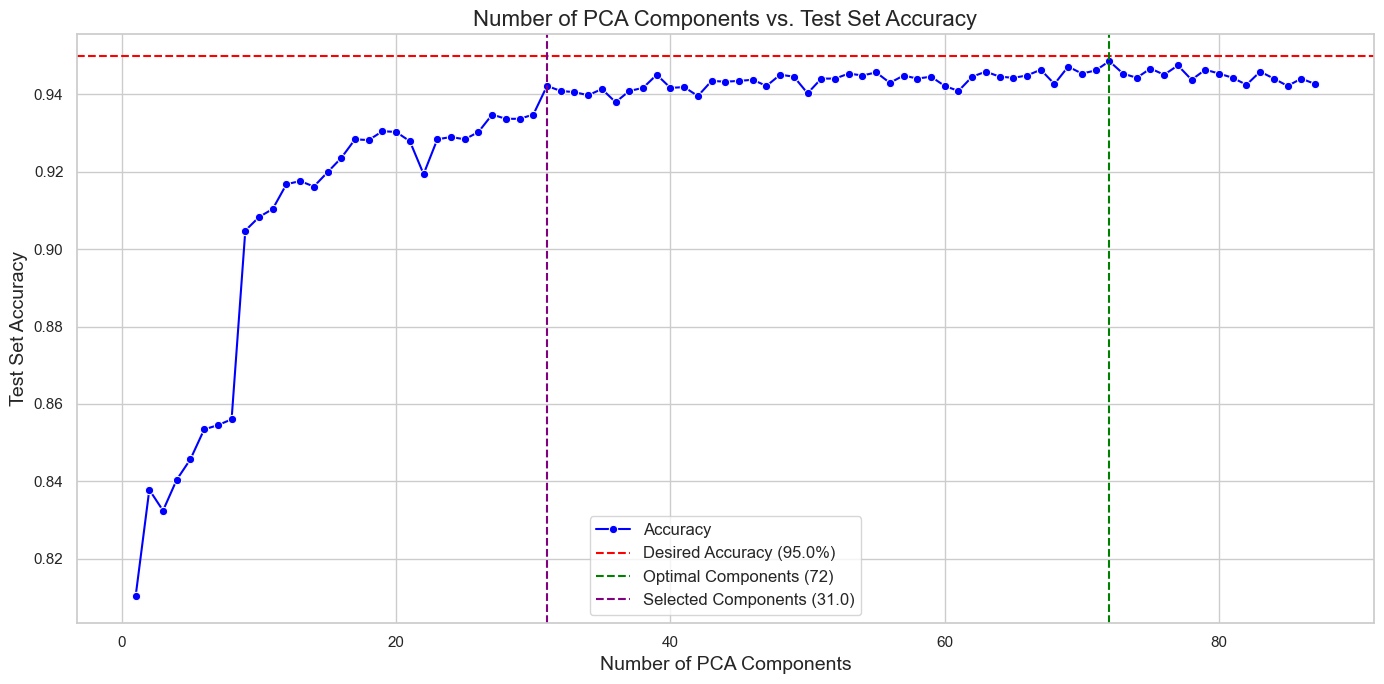

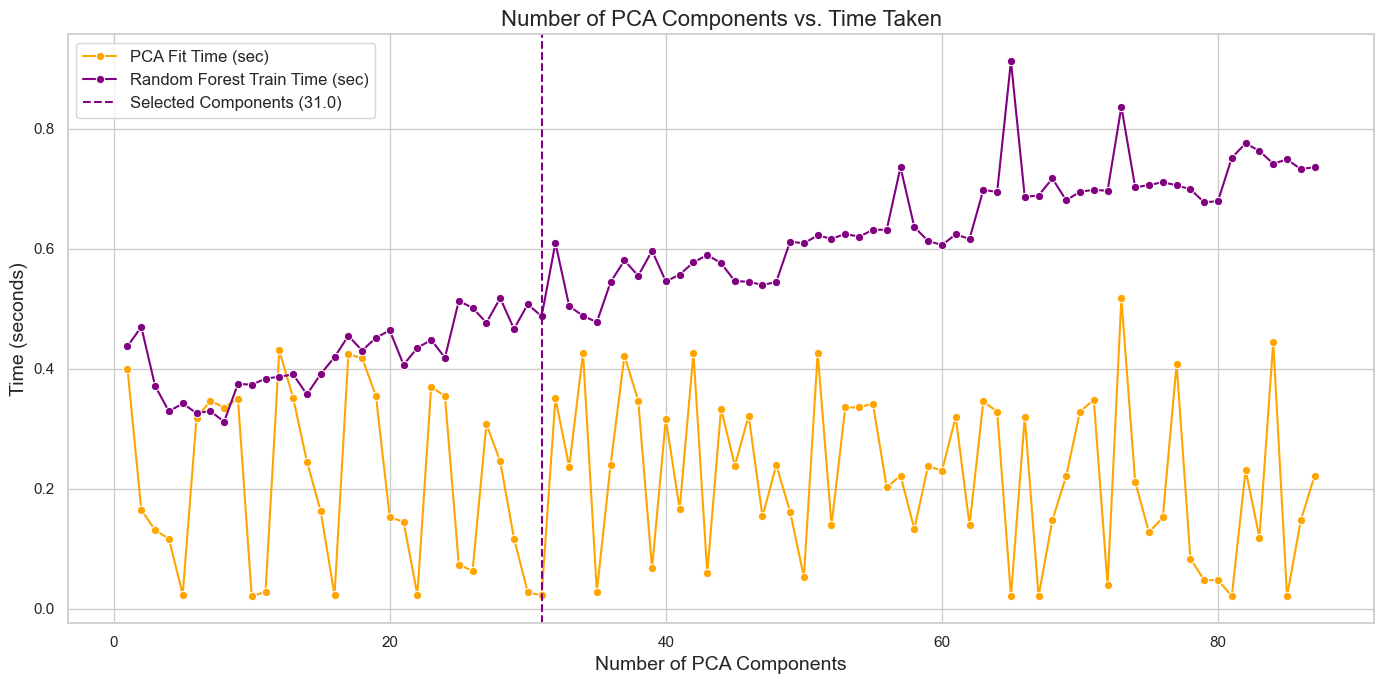


Selected Component Details:
   Selected_n_components  Selected_accuracy  Selected_pca_time_sec  \
0                   31.0             0.9422                 0.0219   

   Selected_rf_time_sec  
0                0.4874  


In [39]:
sns.set(style="whitegrid")

# ---------------------------
# 5.1. Number of PCA Components vs. Test Set Accuracy
# ---------------------------

plt.figure(figsize=(14, 7))
sns.lineplot(x='n_components', y='accuracy', data=df, marker='o', color='blue', label='Accuracy')
plt.title('Number of PCA Components vs. Test Set Accuracy', fontsize=16)
plt.xlabel('Number of PCA Components', fontsize=14)
plt.ylabel('Test Set Accuracy', fontsize=14)

# Desired Accuracy Line
plt.axhline(y=desired_accuracy, color='red', linestyle='--', label=f'Desired Accuracy ({desired_accuracy*100}%)')

# Optimal Components Line
plt.axvline(x=72, color='green', linestyle='--', label='Optimal Components (72)')

# Selected Components Line
if not candidate_df.empty:
    plt.axvline(x=selected_n_components, color='purple', linestyle='--', label=f'Selected Components ({selected_n_components})')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# ---------------------------
# 5.2. Number of PCA Components vs. Time Taken
# ---------------------------

plt.figure(figsize=(14, 7))
sns.lineplot(x='n_components', y='pca_time_sec', data=df, marker='o', label='PCA Fit Time (sec)', color='orange')
sns.lineplot(x='n_components', y='rf_time_sec', data=df, marker='o', label='Random Forest Train Time (sec)', color='purple')

plt.title('Number of PCA Components vs. Time Taken', fontsize=16)
plt.xlabel('Number of PCA Components', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)

# Highlight Selected Components
if not candidate_df.empty:
    plt.axvline(x=selected_n_components, color='purple', linestyle='--', label=f'Selected Components ({selected_n_components})')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# ---------------------------
# 6. Display Selected Component Details
# ---------------------------

if not candidate_df.empty:
    selected_data = {
        'Selected_n_components': selected_n_components,
        'Selected_accuracy': selected_accuracy,
        'Selected_pca_time_sec': selected_pca_time,
        'Selected_rf_time_sec': selected_rf_time
    }
    selected_df = pd.DataFrame([selected_data])
    print("\nSelected Component Details:")
    print(selected_df)
else:
    print("\nNo suitable number of PCA components found within the desired accuracy threshold.")


Time taken to train the model with 31 PCA components: 0.7335 seconds
Test Set Accuracy with 31 PCA components: 0.9401

PCA Component Loadings:
        length_url  length_hostname            ip       nb_dots    nb_hyphens  \
PC1  -9.000945e-07    -1.183260e-07 -1.635841e-09 -1.149141e-08 -1.600216e-08   
PC2   5.170210e-04     1.291720e-04 -5.771813e-06  1.848380e-05  1.044992e-07   
PC3   7.189280e-04    -2.424172e-04 -1.621984e-05 -3.066039e-07 -4.211869e-06   
PC4  -1.289611e-02    -2.885806e-03 -7.987446e-05 -2.483130e-04 -1.964343e-04   
PC5  -6.412816e-04    -6.350833e-03  1.019131e-04  2.804100e-05 -1.225505e-04   
PC6  -2.993950e-02     1.256495e-03  5.872963e-05 -1.044151e-03  3.797973e-04   
PC7   9.709012e-03     3.098624e-03  3.599410e-04 -2.096981e-04  7.983562e-05   
PC8  -5.563738e-02     8.773821e-03 -5.272106e-04  1.213696e-04 -5.385675e-04   
PC9   9.106590e-01     4.242114e-02  5.063757e-03  9.376649e-03  8.550198e-03   
PC10 -8.682818e-02     5.893804e-01 -8.408750e

C:\Users\praga\AppData\Local\Temp\ipykernel_13800\1387516305.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances_df, palette='viridis')


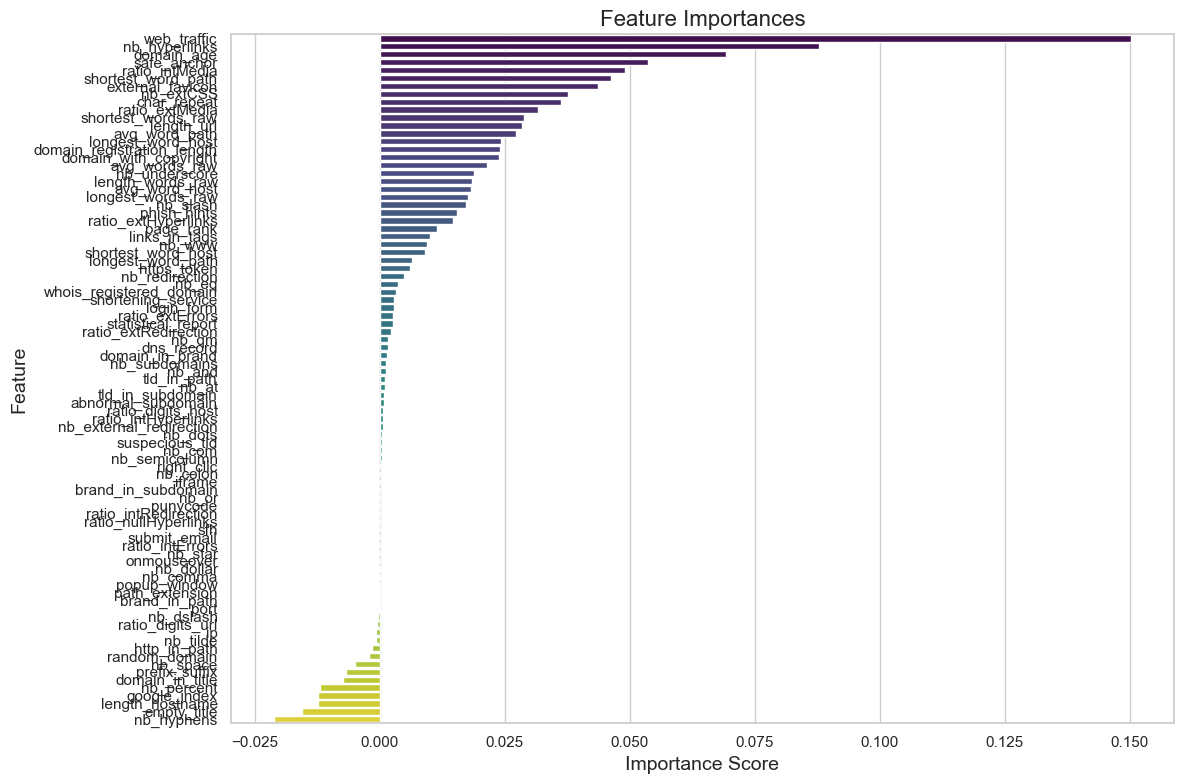

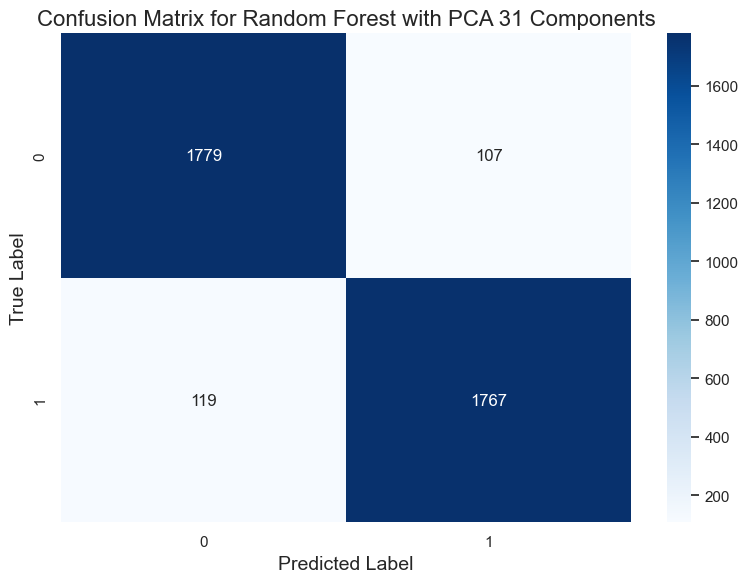


Classification Report for Random Forest with PCA 31 Components:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1886
           1       0.94      0.94      0.94      1886

    accuracy                           0.94      3772
   macro avg       0.94      0.94      0.94      3772
weighted avg       0.94      0.94      0.94      3772



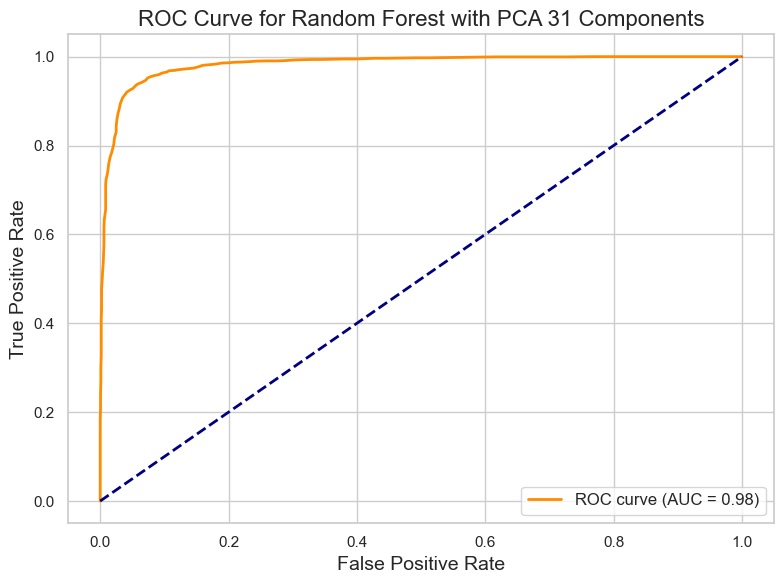

In [43]:
import numpy as np
selected_n_components = 31

# Initialize the PCA with the selected number of components
pca = PCA(n_components=selected_n_components, svd_solver='full', random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Create the pipeline
pipeline = Pipeline([
    ('pca', pca),
    ('rf', rf)
])

# ---------------------------
# 2. Train the Model and Measure Time
# ---------------------------

start_time = time.time()
pipeline.fit(X, y)
end_time = time.time()
training_time = end_time - start_time

print(f"\nTime taken to train the model with {selected_n_components} PCA components: {training_time:.4f} seconds")

# ---------------------------
# 3. Evaluate the Model
# ---------------------------

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy with {selected_n_components} PCA components: {test_accuracy:.4f}")

# ---------------------------
# 4. Extract Feature Importances
# ---------------------------

# Extract the trained Random Forest model from the pipeline
trained_rf = pipeline.named_steps['rf']

# Get feature importances from Random Forest
rf_importances = trained_rf.feature_importances_

# Since PCA components are linear combinations of original features,
# interpreting feature importances directly on PCA components is non-trivial.
# However, we can analyze the PCA components' loadings to understand feature contributions.

# Get PCA components
pca_components = pipeline.named_steps['pca'].components_

# Create a DataFrame for PCA loadings
pca_loadings = pd.DataFrame(
    pca_components,
    columns=X.columns,
    index=[f'PC{i}' for i in range(1, selected_n_components + 1)]
)

# Display the PCA loadings
print("\nPCA Component Loadings:")
print(pca_loadings)

# ---------------------------
# 5. Plot Feature Importances
# ---------------------------

# Since feature importances are for PCA components, not original features,
# it's more informative to map the importance back to original features.

# Multiply PCA loadings with RF importances to get the importance of original features
feature_importances = np.dot(rf_importances, pca_loadings)

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
})

# Sort features by importance
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Plot the top 20 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances_df, palette='viridis')
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

# ---------------------------
# 6. Plot Confusion Matrix
# ---------------------------

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix for better visualization
cm_df = pd.DataFrame(cm, index=trained_rf.classes_, columns=trained_rf.classes_)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest with PCA 31 Components', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.tight_layout()
plt.show()

# ---------------------------
# 7. Print Classification Report
# ---------------------------

print("\nClassification Report for Random Forest with PCA 31 Components:")
print(classification_report(y_test, y_pred))


    # Get the probability estimates for the positive class
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve for Random Forest with PCA 31 Components', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
#Although the optimal component was 72 but from component 31 and 72 have very minor differnce so we will use 31 as component instead of 72.

In [44]:
# Define the comparison data
comparison_data = {
    'Model': [
        'PCA (31 Components)',
        'RFE (17 Features)',
        'All Features (Random Forest)'
    ],
    'Test Set Accuracy': [
        0.9401,  # PCA with 31 Components
        0.9512,  # RFE with 17 Features
        0.9589   # All Features
    ],
    'Training Time (seconds)': [
        0.7335,   # PCA with 31 Components
        117.94,   # RFE with 17 Features
        2.3648    # All Features
    ]
}

# Create the DataFrame
df_comparison = pd.DataFrame(comparison_data)

print(df_comparison)


                          Model  Test Set Accuracy  Training Time (seconds)
0           PCA (31 Components)             0.9401                   0.7335
1             RFE (17 Features)             0.9512                 117.9400
2  All Features (Random Forest)             0.9589                   2.3648


C:\Users\praga\AppData\Local\Temp\ipykernel_13800\1082792475.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Test Set Accuracy', data=df_comparison, palette='Blues_d')


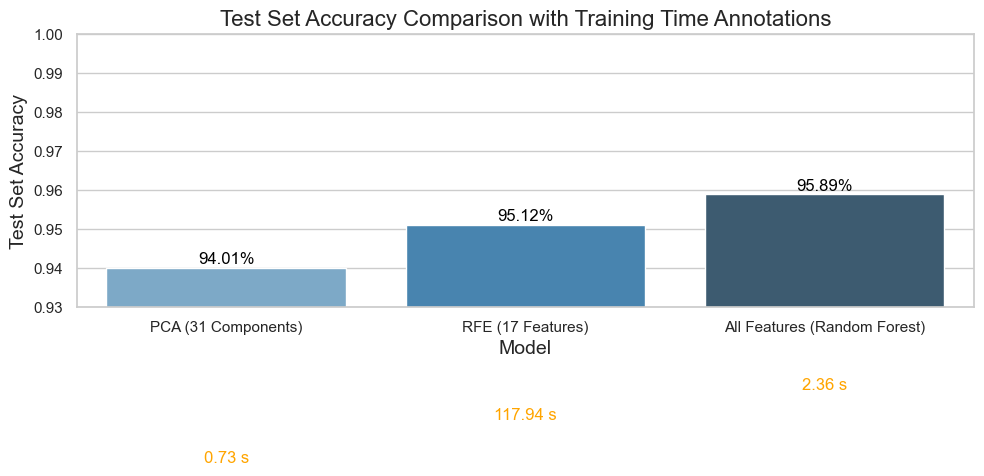

C:\Users\praga\AppData\Local\Temp\ipykernel_13800\1082792475.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Training Time (seconds)', data=df_comparison, palette='Oranges_d')


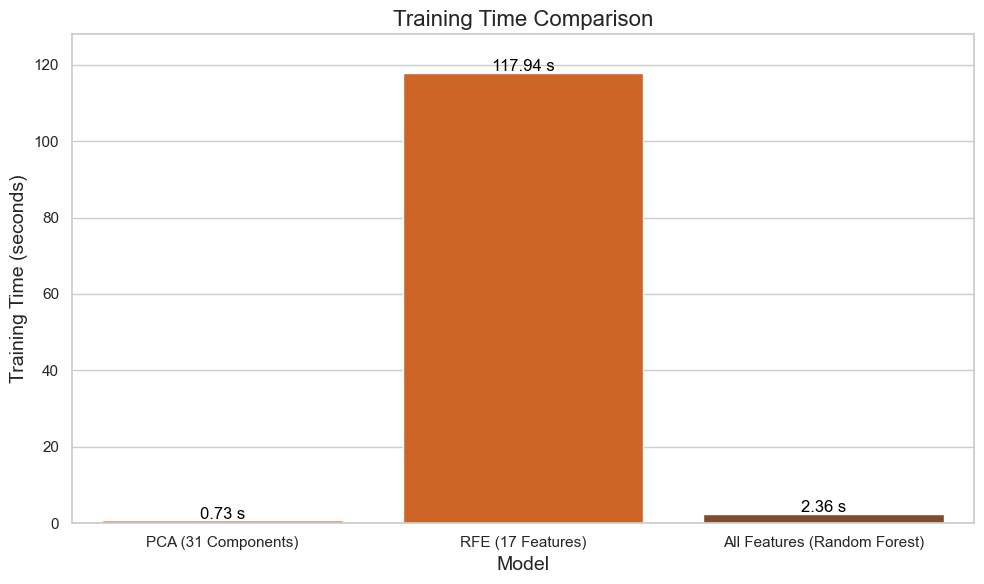

In [45]:


plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Set Accuracy', data=df_comparison, palette='Blues_d')

# Add data labels and training time annotations
for index, row in df_comparison.iterrows():
    plt.text(index, row['Test Set Accuracy'] + 0.001, f"{row['Test Set Accuracy']*100:.2f}%", 
             color='black', ha="center", fontsize=12)
    plt.text(index, row['Test Set Accuracy'] - 0.05, f"{row['Training Time (seconds)']:.2f} s", 
             color='orange', ha="center", fontsize=12)

plt.title('Test Set Accuracy Comparison with Training Time Annotations', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Test Set Accuracy', fontsize=14)
plt.ylim(0.93, 1.0)  # Setting y-axis limits for better visualization
plt.tight_layout()
plt.show()



# ---------------------------
# Chart 2: Training Time
# ---------------------------

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Training Time (seconds)', data=df_comparison, palette='Oranges_d')

# Add data labels on top of each bar
for index, row in df_comparison.iterrows():
    plt.text(index, row['Training Time (seconds)'] + 0.5, f"{row['Training Time (seconds)']:.2f} s", 
             color='black', ha="center", fontsize=12)

plt.title('Training Time Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Training Time (seconds)', fontsize=14)
plt.ylim(0, df_comparison['Training Time (seconds)'].max() + 10)  # Adjust y-axis limit
plt.tight_layout()
plt.show()


#SVM

In [29]:
from sklearn.svm import SVC

Fitting 2 folds for each of 24 candidates, totalling 48 fits

Time taken for GridSearchCV: 30.08 seconds

Best Hyperparameters:
{'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9489

Training Time for Best Parameters: 2.7251 seconds
Test Set Accuracy: 0.9446


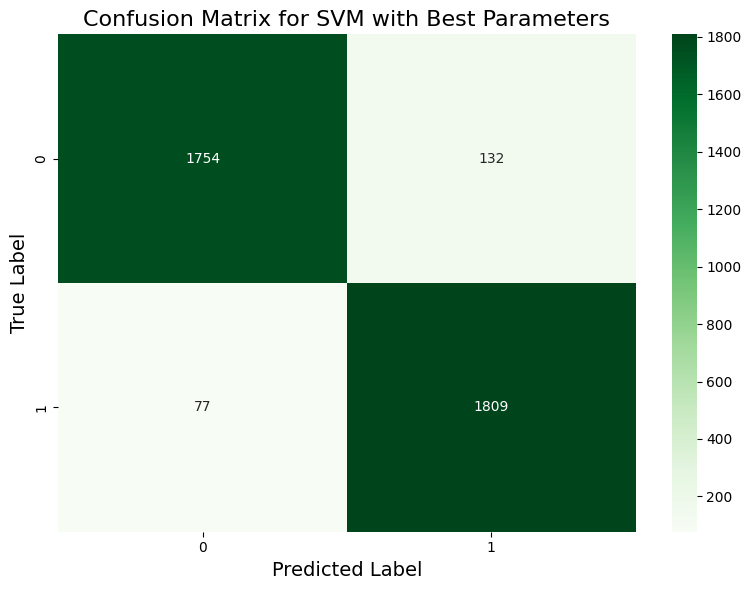


Classification Report for SVM with Best Parameters:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1886
           1       0.93      0.96      0.95      1886

    accuracy                           0.94      3772
   macro avg       0.94      0.94      0.94      3772
weighted avg       0.94      0.94      0.94      3772



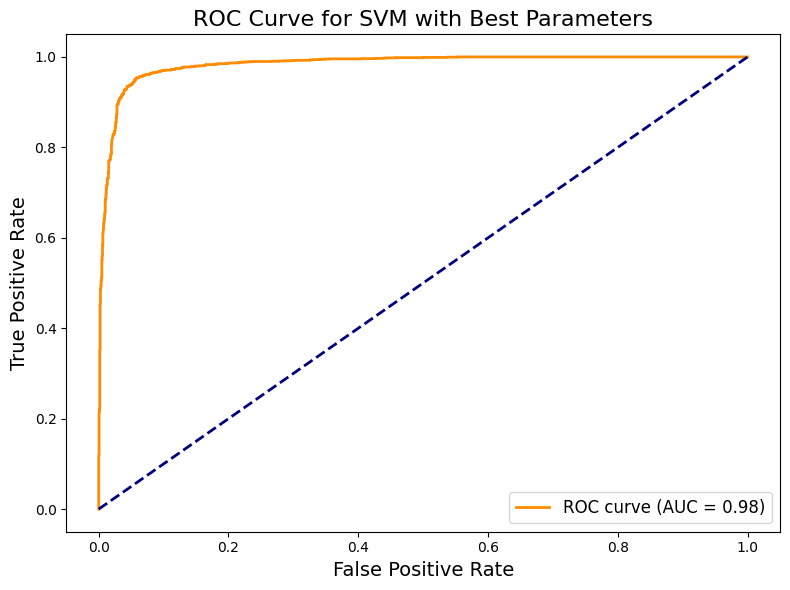

In [34]:
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__kernel': [ 'rbf'],
    'svc__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
     # Only relevant for 'poly' kernel
}

# ---------------------------
# 3. Create a Pipeline with StandardScaler and SVC
# ---------------------------

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True, random_state=42))
])

# ---------------------------
# 4. Perform Hyperparameter Tuning with GridSearchCV
# ---------------------------

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=2,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=2
)

# Measure the time taken for GridSearchCV
start_time = time.time()
grid_search.fit(X, y)
end_time = time.time()
grid_search_time = end_time - start_time

print(f"\nTime taken for GridSearchCV: {grid_search_time:.2f} seconds")

# ---------------------------
# 5. Retrieve and Display the Best Parameters
# ---------------------------

# Get the best parameters
best_params = grid_search.best_params_
print("\nBest Hyperparameters:")
print(best_params)

# Get the best cross-validation score
best_cv_score = grid_search.best_score_
print(f"Best Cross-Validation Accuracy: {best_cv_score:.4f}")

# ---------------------------


# Initialize the pipeline with best parameters
best_pipeline = grid_search.best_estimator_

# Measure training time
start_time_best = time.time()
best_pipeline.fit(X, y)
end_time_best = time.time()
training_time_best = end_time_best - start_time_best

print(f"\nTraining Time for Best Parameters: {training_time_best:.4f} seconds")

# ---------------------------
# 7. Evaluate the Final Model on the Test Set
# ---------------------------

# Make predictions on the test set
y_pred_best = best_pipeline.predict(X_test)

# Calculate accuracy
test_accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Test Set Accuracy: {test_accuracy_best:.4f}")

# ---------------------------
# 8. Detailed Evaluation Metrics
# ---------------------------

# 8.1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
cm_df = pd.DataFrame(cm, index=best_pipeline.named_steps['svc'].classes_, columns=best_pipeline.named_steps['svc'].classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for SVM with Best Parameters', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.tight_layout()
plt.show()


print("\nClassification Report for SVM with Best Parameters:")
print(classification_report(y_test, y_pred_best))


y_prob_best = best_pipeline.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve for SVM with Best Parameters', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.tight_layout()
plt.show()


In [36]:
best_svm = SVC(
    C=10,
    gamma='scale',
    kernel='rbf',
    probability=True,  # Required for ROC Curve
    random_state=42
)


Time taken to train SVM with RF-selected features: 2.4674 seconds
Test Set Accuracy with RF-selected features: 0.9480


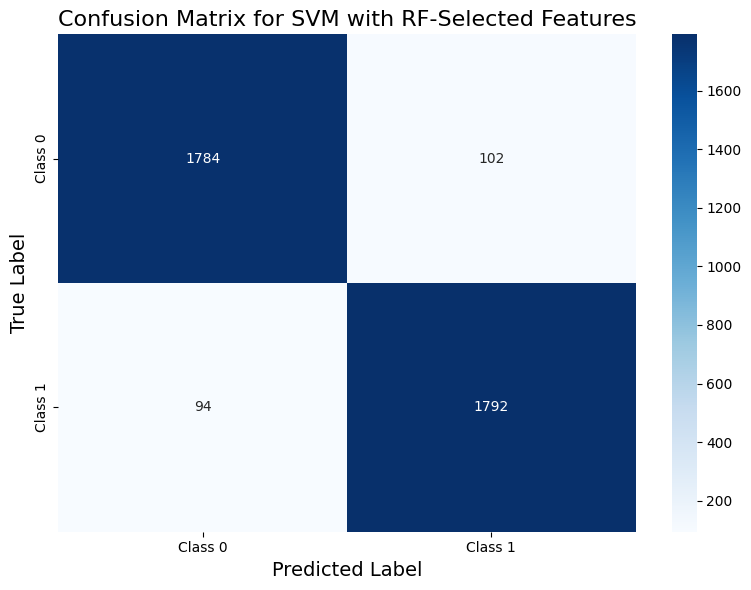


Classification Report for SVM with RF-Selected Features:
              precision    recall  f1-score   support

     Class 0       0.95      0.95      0.95      1886
     Class 1       0.95      0.95      0.95      1886

    accuracy                           0.95      3772
   macro avg       0.95      0.95      0.95      3772
weighted avg       0.95      0.95      0.95      3772



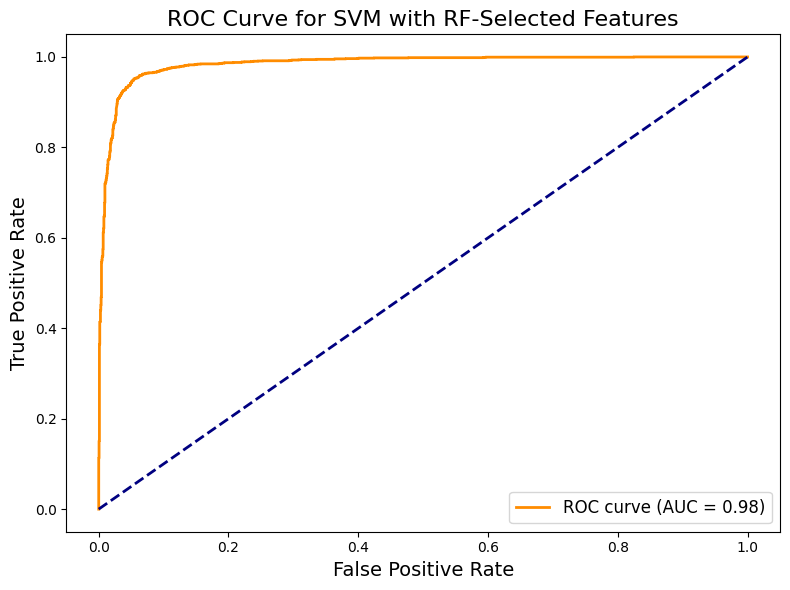


Trained SVM model with RF-selected features saved as 'svm_rf_selected_features_model.pkl'


In [44]:
selected_features = [
    'length_url', 'length_hostname', 'nb_www', 'ratio_digits_url',
    'length_words_raw', 'longest_word_path', 'avg_word_path',
    'phish_hints', 'nb_hyperlinks', 'ratio_intHyperlinks',
    'ratio_extHyperlinks', 'safe_anchor', 'domain_registration_length',
    'domain_age', 'web_traffic', 'google_index', 'page_rank'
]

# ---------------------------
# 2. Subset the Data
# ---------------------------

# Assuming X_train and X_test are Pandas DataFrames
if isinstance(X, pd.DataFrame):
    X_train_selected = X[selected_features]
    X_test_selected = X_test[selected_features]
else:
   
    feature_indices = [list(X.columns).index(feat) for feat in selected_features]  # Only if X has 'columns' attribute
    X_train_selected = X[:, feature_indices]
    X_test_selected = X_test[:, feature_indices]

# ---------------------------
# 3. Define Best SVM Classifier
# ---------------------------

best_svm = SVC(
    C=10,
    gamma='scale',
    kernel='rbf',
    probability=True,
    random_state=42
)

# ---------------------------
# 4. Create Pipeline
# ---------------------------

pipeline_svm_rf_features = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', best_svm)
])



start_time_svm_rf = time.time()
pipeline_svm_rf_features.fit(X_train_selected, y)
end_time_svm_rf = time.time()
training_time_svm_rf = end_time_svm_rf - start_time_svm_rf

print(f"\nTime taken to train SVM with RF-selected features: {training_time_svm_rf:.4f} seconds")


y_pred_svm_rf = pipeline_svm_rf_features.predict(X_test_selected)

# Calculate accuracy
test_accuracy_svm_rf = accuracy_score(y_test, y_pred_svm_rf)
print(f"Test Set Accuracy with RF-selected features: {test_accuracy_svm_rf:.4f}")



cm_svm_rf = confusion_matrix(y_test, y_pred_svm_rf)
class_labels = ['Class 0', 'Class 1']  # Replace with actual class names if available

cm_df_svm_rf = pd.DataFrame(cm_svm_rf, index=class_labels, columns=class_labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm_df_svm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM with RF-Selected Features', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.tight_layout()
plt.show()



print("\nClassification Report for SVM with RF-Selected Features:")
print(classification_report(y_test, y_pred_svm_rf, target_names=class_labels))



y_prob_svm_rf = pipeline_svm_rf_features.predict_proba(X_test_selected)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm_rf)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve for SVM with RF-Selected Features', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.tight_layout()
plt.show()

results_time_accuracy = pd.DataFrame({
    'Model': ['SVM with RF-Selected Features'],
    'Test Accuracy': [test_accuracy_svm_rf],
    'Training Time (seconds)': [training_time_svm_rf]
})


model_filename_svm_rf = 'svm_rf_selected_features_model.pkl'
joblib.dump(pipeline_svm_rf_features, model_filename_svm_rf)
print(f"\nTrained SVM model with RF-selected features saved as '{model_filename_svm_rf}'")


Scaling the data...
Time taken to scale data: 0.0150 seconds

Evaluating PCA with 1 component(s)...
Time taken to fit PCA: 0.0321 seconds
Time taken to train SVM: 4.3445 seconds
Test Set Accuracy: 0.6957

Evaluating PCA with 2 component(s)...
Time taken to fit PCA: 0.0386 seconds
Time taken to train SVM: 2.6744 seconds
Test Set Accuracy: 0.7821

Evaluating PCA with 3 component(s)...
Time taken to fit PCA: 0.0210 seconds
Time taken to train SVM: 1.4719 seconds
Test Set Accuracy: 0.8611

Evaluating PCA with 4 component(s)...
Time taken to fit PCA: 0.0199 seconds
Time taken to train SVM: 1.3528 seconds
Test Set Accuracy: 0.8977

Evaluating PCA with 5 component(s)...
Time taken to fit PCA: 0.0196 seconds
Time taken to train SVM: 1.3975 seconds
Test Set Accuracy: 0.8932

Evaluating PCA with 6 component(s)...
Time taken to fit PCA: 0.0182 seconds
Time taken to train SVM: 1.4533 seconds
Test Set Accuracy: 0.9062

Evaluating PCA with 7 component(s)...
Time taken to fit PCA: 0.0197 seconds
Tim

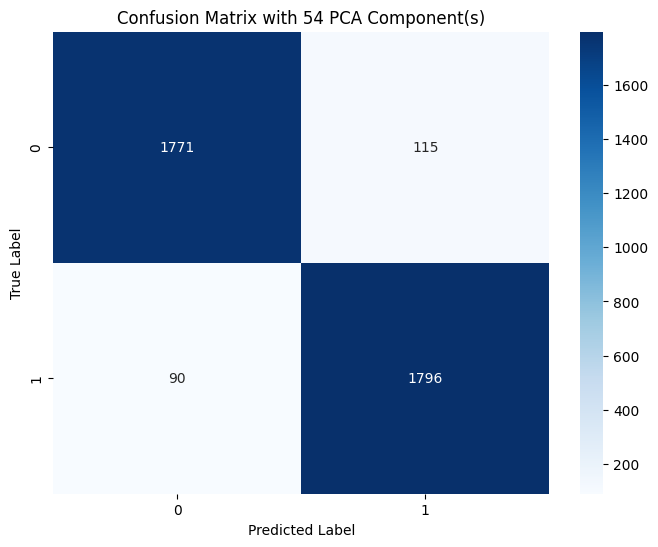


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.95      0.94      0.95      1886
     Class 1       0.94      0.95      0.95      1886

    accuracy                           0.95      3772
   macro avg       0.95      0.95      0.95      3772
weighted avg       0.95      0.95      0.95      3772



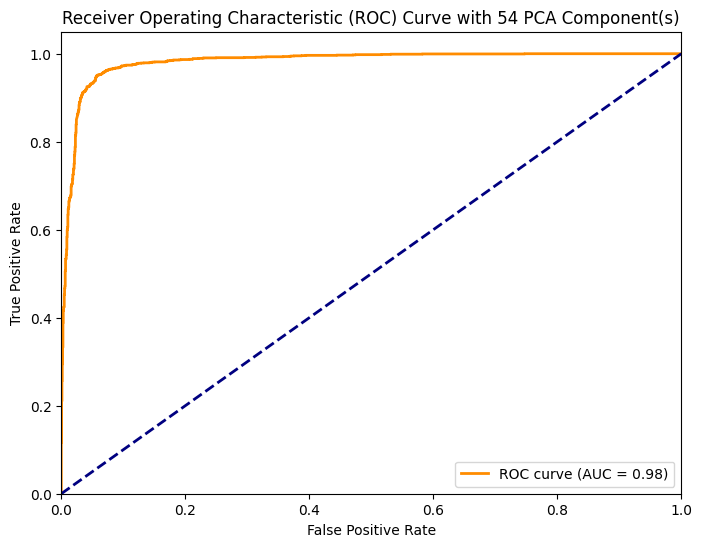


Feature importances are not directly available for non-linear SVM kernels.


In [ ]:


# Assuming X, y are already defined
# If not, you need to define your features (X) and target (y) accordingly.

# ============================
# 1. Data Preprocessing (Scaling)
# ============================

# Split the data into training and testing sets if not already done
# Here, assuming X_train, X_test, y_train, y_test are already defined
# If not, uncomment the following lines to perform the split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
print("\nScaling the data...")
start_time_scaler = time.time()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)
end_time_scaler = time.time()
scaler_time = end_time_scaler - start_time_scaler
print(f"Time taken to scale data: {scaler_time:.4f} seconds")

# ============================
# 2. Define Desired Accuracy
# ============================

desired_accuracy = 0.9446 # 95% accuracy

# ============================
# 3. Define Function to Find Optimal PCA Components with SVM
# ============================

def find_optimal_pca_components_svm(X_train, y_train, X_test, y_test, desired_accuracy=0.95):
    """
    Determines the optimal number of PCA components to achieve at least the desired accuracy using SVM.
    If the desired accuracy is not met, selects the number of components with the highest accuracy.

    Parameters:
    - X_train: Training features.
    - y_train: Training labels.
    - X_test: Testing features.
    - y_test: Testing labels.
    - desired_accuracy: The target accuracy threshold.

    Returns:
    - optimal_n_components: The number of PCA components that meet or exceed the desired accuracy.
    - component_accuracies: A dictionary mapping number of components to test set accuracies.
    - component_times_pca: A dictionary mapping number of components to PCA fitting times.
    - component_times_svm: A dictionary mapping number of components to SVM training times.
    """
    component_accuracies = {}
    component_times_pca = {}
    component_times_svm = {}
    n_features = X_train.shape[1]
    optimal_n_components = None
    best_accuracy = 0
    best_n_components = 0

    for n in range(1, n_features + 1):
        print(f"\nEvaluating PCA with {n} component(s)...")
        
        # Initialize PCA with n components
        pca = PCA(n_components=n, svd_solver='full')
        
        # Measure the time taken to fit PCA
        start_time_pca = time.time()
        pca.fit(X_train)
        end_time_pca = time.time()
        pca_fit_time = end_time_pca - start_time_pca
        component_times_pca[n] = pca_fit_time
        print(f"Time taken to fit PCA: {pca_fit_time:.4f} seconds")
        
        # Transform the data
        X_train_pca = pca.transform(X_train)
        X_test_pca = pca.transform(X_test)
        
        # Initialize the SVM Classifier
        svm_pca = SVC(
            C=10,                # Regularization parameter
            kernel='rbf',         # Kernel type
            gamma='scale',        # Kernel coefficient
            probability=True,     # Enable probability estimates
            random_state=42
        )
        
        # Measure the time taken to train the classifier
        start_time_svm = time.time()
        svm_pca.fit(X_train_pca, y_train)
        end_time_svm = time.time()
        svm_training_time = end_time_svm - start_time_svm
        component_times_svm[n] = svm_training_time
        print(f"Time taken to train SVM: {svm_training_time:.4f} seconds")
        
        # Generate predictions
        y_pred_pca = svm_pca.predict(X_test_pca)
        
        # Calculate accuracy
        accuracy_pca = accuracy_score(y_test, y_pred_pca)
        component_accuracies[n] = accuracy_pca
        print(f"Test Set Accuracy: {accuracy_pca:.4f}")
        
        # Update best accuracy and components if current accuracy is higher
        if accuracy_pca > best_accuracy:
            best_accuracy = accuracy_pca
            best_n_components = n
        
        # Check if desired accuracy is achieved
        if accuracy_pca >= desired_accuracy:
            optimal_n_components = n
            print(f"\nDesired accuracy of {desired_accuracy*100}% achieved with {n} component(s).")
            break

    # If desired accuracy not achieved, select the number of components with the highest accuracy
    if optimal_n_components is None:
        optimal_n_components = best_n_components
        optimal_accuracy = best_accuracy
        print(f"\nDesired accuracy of {desired_accuracy*100}% not achieved.")
        print(f"Using {optimal_n_components} component(s) with Test Set Accuracy: {optimal_accuracy:.4f}")
    
    return optimal_n_components, component_accuracies, component_times_pca, component_times_svm

# ============================
# 4. Find the Optimal Number of PCA Components with SVM
# ============================

# Find the optimal number of PCA components
optimal_n_components, component_accuracies, component_times_pca, component_times_svm = find_optimal_pca_components_svm(
    X_train_scaled, y, X_test_scaled, y_test, desired_accuracy
)

print(f"\nOptimal number of PCA components: {optimal_n_components}")

# ============================
# 5. Train the SVM Model with Selected PCA Components
# ============================

# Initialize PCA with the optimal number of components
pca_optimal = PCA(n_components=optimal_n_components, svd_solver='full')

# Measure the time taken to fit PCA
start_time_pca_fit = time.time()
pca_optimal.fit(X_train_scaled)
end_time_pca_fit = time.time()
pca_fit_time = end_time_pca_fit - start_time_pca_fit
print(f"\nTime taken to fit PCA with {optimal_n_components} components: {pca_fit_time:.2f} seconds")

# Transform the training and testing data
X_train_pca = pca_optimal.transform(X_train_scaled)
X_test_pca = pca_optimal.transform(X_test_scaled)

print(f"Shape of training data after PCA: {X_train_pca.shape}")
print(f"Shape of testing data after PCA: {X_test_pca.shape}")

# Initialize the SVM Classifier with desired hyperparameters
best_svm_pca = SVC(
    C=10,                # Regularization parameter (you may want to tune this)
    kernel='rbf',         # Kernel type (options: 'linear', 'poly', 'rbf', 'sigmoid')
    gamma='scale',        # Kernel coefficient
    probability=True,     # Enable probability estimates
    random_state=42
)

# Measure the time taken to train the classifier
start_time_svm_pca = time.time()
best_svm_pca.fit(X_train_pca, y)
end_time_svm_pca = time.time()
svm_pca_training_time = end_time_svm_pca - start_time_svm_pca
print(f"\nTime taken to train the SVM model on PCA components: {svm_pca_training_time:.2f} seconds")

# ============================
# 6. Evaluate the Model
# ============================

# Generate predictions
y_pred_pca = best_svm_pca.predict(X_test_pca)
y_pred_proba_pca = best_svm_pca.predict_proba(X_test_pca)

# Calculate accuracy
test_accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"\nTest Set Accuracy: {test_accuracy_pca:.4f}")

# ============================
# 7. Visualization and Metrics
# ============================

# Confusion Matrix
cm_pca = confusion_matrix(y_test, y_pred_pca)
class_labels = sorted(y.unique())

plt.figure(figsize=(8,6))
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title(f'Confusion Matrix with {optimal_n_components} PCA Component(s)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
report_pca = classification_report(y_test, y_pred_pca, target_names=[f"Class {cls}" for cls in class_labels])
print("\nClassification Report:\n", report_pca)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_pca[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange',
            lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve with {optimal_n_components} PCA Component(s)')
plt.legend(loc="lower right")
plt.show()

# If you used a linear kernel and want to visualize coefficients:
if best_svm_pca.kernel == 'linear':
    coefficients = best_svm_pca.coef_
    # For multi-class, coefficients are in a matrix
    if coefficients.ndim > 1:
        # Take absolute mean across classes for importance
        coef_mean = np.mean(np.abs(coefficients), axis=0)
    else:
        coef_mean = np.abs(coefficients)
    
    coef_df = pd.DataFrame({
        'Principal Component': [f'PC{i}' for i in range(1, optimal_n_components + 1)],
        'Coefficient Magnitude': coef_mean
    }).sort_values(by='Coefficient Magnitude', ascending=False)
    
    plt.figure(figsize=(10,8))
    sns.barplot(x='Coefficient Magnitude', y='Principal Component', data=coef_df, palette='viridis')
    plt.title(f'SVM Coefficient Magnitudes of {optimal_n_components} Principal Component(s)')
    plt.xlabel('Coefficient Magnitude')
    plt.ylabel('Principal Component')
    plt.tight_layout()
    plt.show()
else:
    print("\nFeature importances are not directly available for non-linear SVM kernels.")


Extracted Data:
   n_components  pca_time_sec  rf_time_sec  accuracy
0             1        0.0321       4.3445    0.6957
1             2        0.0386       2.6744    0.7821
2             3        0.0210       1.4719    0.8611
3             4        0.0199       1.3528    0.8977
4             5        0.0196       1.3975    0.8932


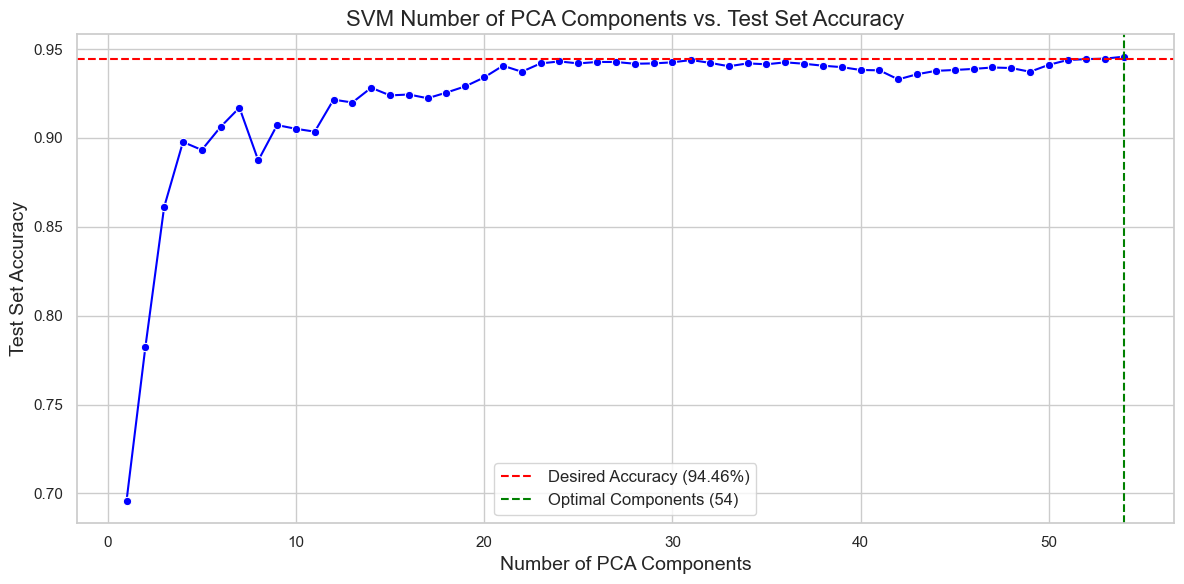

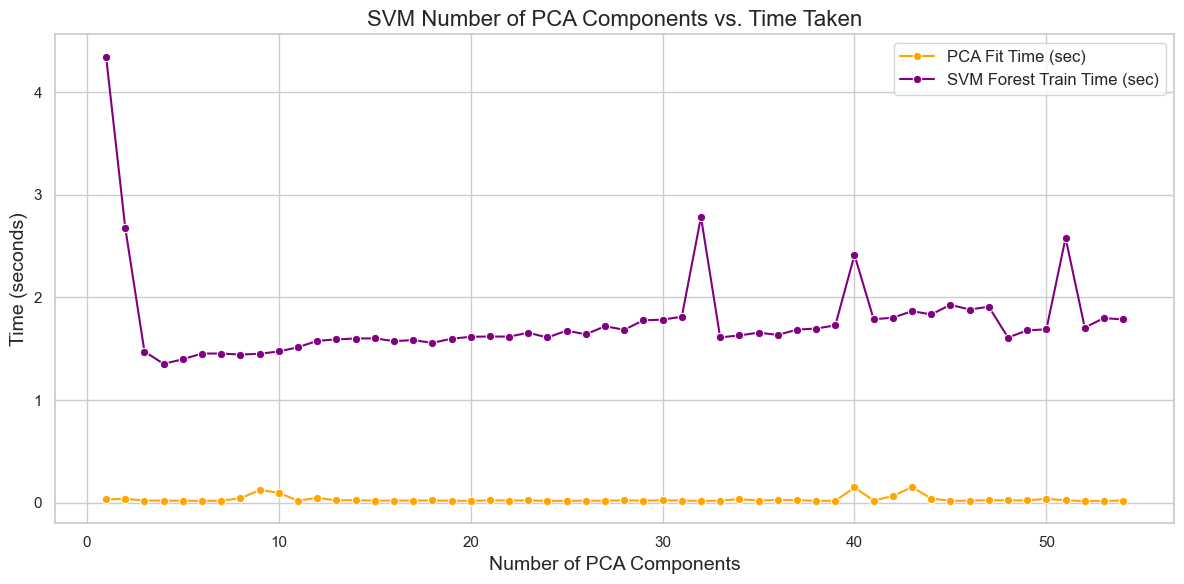

In [49]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1. Store the Output Data
# ---------------------------

output = """
Time taken to scale data: 0.0150 seconds

Evaluating PCA with 1 component(s)...
Time taken to fit PCA: 0.0321 seconds
Time taken to train SVM: 4.3445 seconds
Test Set Accuracy: 0.6957

Evaluating PCA with 2 component(s)...
Time taken to fit PCA: 0.0386 seconds
Time taken to train SVM: 2.6744 seconds
Test Set Accuracy: 0.7821

Evaluating PCA with 3 component(s)...
Time taken to fit PCA: 0.0210 seconds
Time taken to train SVM: 1.4719 seconds
Test Set Accuracy: 0.8611

Evaluating PCA with 4 component(s)...
Time taken to fit PCA: 0.0199 seconds
Time taken to train SVM: 1.3528 seconds
Test Set Accuracy: 0.8977

Evaluating PCA with 5 component(s)...
Time taken to fit PCA: 0.0196 seconds
Time taken to train SVM: 1.3975 seconds
Test Set Accuracy: 0.8932

Evaluating PCA with 6 component(s)...
Time taken to fit PCA: 0.0182 seconds
Time taken to train SVM: 1.4533 seconds
Test Set Accuracy: 0.9062

Evaluating PCA with 7 component(s)...
Time taken to fit PCA: 0.0197 seconds
Time taken to train SVM: 1.4526 seconds
Test Set Accuracy: 0.9170

Evaluating PCA with 8 component(s)...
Time taken to fit PCA: 0.0431 seconds
Time taken to train SVM: 1.4432 seconds
Test Set Accuracy: 0.8873

Evaluating PCA with 9 component(s)...
Time taken to fit PCA: 0.1235 seconds
Time taken to train SVM: 1.4505 seconds
Test Set Accuracy: 0.9072

Evaluating PCA with 10 component(s)...
Time taken to fit PCA: 0.0969 seconds
Time taken to train SVM: 1.4735 seconds
Test Set Accuracy: 0.9051

Evaluating PCA with 11 component(s)...
Time taken to fit PCA: 0.0193 seconds
Time taken to train SVM: 1.5141 seconds
Test Set Accuracy: 0.9035

Evaluating PCA with 12 component(s)...
Time taken to fit PCA: 0.0477 seconds
Time taken to train SVM: 1.5765 seconds
Test Set Accuracy: 0.9215

Evaluating PCA with 13 component(s)...
Time taken to fit PCA: 0.0228 seconds
Time taken to train SVM: 1.5906 seconds
Test Set Accuracy: 0.9199

Evaluating PCA with 14 component(s)...
Time taken to fit PCA: 0.0245 seconds
Time taken to train SVM: 1.5994 seconds
Test Set Accuracy: 0.9282

Evaluating PCA with 15 component(s)...
Time taken to fit PCA: 0.0198 seconds
Time taken to train SVM: 1.6009 seconds
Test Set Accuracy: 0.9239

Evaluating PCA with 16 component(s)...
Time taken to fit PCA: 0.0201 seconds
Time taken to train SVM: 1.5736 seconds
Test Set Accuracy: 0.9244

Evaluating PCA with 17 component(s)...
Time taken to fit PCA: 0.0212 seconds
Time taken to train SVM: 1.5842 seconds
Test Set Accuracy: 0.9223

Evaluating PCA with 18 component(s)...
Time taken to fit PCA: 0.0218 seconds
Time taken to train SVM: 1.5570 seconds
Test Set Accuracy: 0.9255

Evaluating PCA with 19 component(s)...
Time taken to fit PCA: 0.0192 seconds
Time taken to train SVM: 1.5972 seconds
Test Set Accuracy: 0.9290

Evaluating PCA with 20 component(s)...
Time taken to fit PCA: 0.0182 seconds
Time taken to train SVM: 1.6157 seconds
Test Set Accuracy: 0.9340

Evaluating PCA with 21 component(s)...
Time taken to fit PCA: 0.0230 seconds
Time taken to train SVM: 1.6191 seconds
Test Set Accuracy: 0.9406

Evaluating PCA with 22 component(s)...
Time taken to fit PCA: 0.0211 seconds
Time taken to train SVM: 1.6176 seconds
Test Set Accuracy: 0.9372

Evaluating PCA with 23 component(s)...
Time taken to fit PCA: 0.0227 seconds
Time taken to train SVM: 1.6555 seconds
Test Set Accuracy: 0.9419

Evaluating PCA with 24 component(s)...
Time taken to fit PCA: 0.0177 seconds
Time taken to train SVM: 1.6092 seconds
Test Set Accuracy: 0.9430

Evaluating PCA with 25 component(s)...
Time taken to fit PCA: 0.0179 seconds
Time taken to train SVM: 1.6758 seconds
Test Set Accuracy: 0.9419

Evaluating PCA with 26 component(s)...
Time taken to fit PCA: 0.0198 seconds
Time taken to train SVM: 1.6400 seconds
Test Set Accuracy: 0.9427

Evaluating PCA with 27 component(s)...
Time taken to fit PCA: 0.0194 seconds
Time taken to train SVM: 1.7188 seconds
Test Set Accuracy: 0.9427

Evaluating PCA with 28 component(s)...
Time taken to fit PCA: 0.0234 seconds
Time taken to train SVM: 1.6842 seconds
Test Set Accuracy: 0.9417

Evaluating PCA with 29 component(s)...
Time taken to fit PCA: 0.0194 seconds
Time taken to train SVM: 1.7770 seconds
Test Set Accuracy: 0.9419

Evaluating PCA with 30 component(s)...
Time taken to fit PCA: 0.0236 seconds
Time taken to train SVM: 1.7827 seconds
Test Set Accuracy: 0.9425

Evaluating PCA with 31 component(s)...
Time taken to fit PCA: 0.0211 seconds
Time taken to train SVM: 1.8119 seconds
Test Set Accuracy: 0.9438

Evaluating PCA with 32 component(s)...
Time taken to fit PCA: 0.0181 seconds
Time taken to train SVM: 2.7828 seconds
Test Set Accuracy: 0.9422

Evaluating PCA with 33 component(s)...
Time taken to fit PCA: 0.0202 seconds
Time taken to train SVM: 1.6102 seconds
Test Set Accuracy: 0.9403

Evaluating PCA with 34 component(s)...
Time taken to fit PCA: 0.0352 seconds
Time taken to train SVM: 1.6295 seconds
Test Set Accuracy: 0.9419

Evaluating PCA with 35 component(s)...
Time taken to fit PCA: 0.0211 seconds
Time taken to train SVM: 1.6563 seconds
Test Set Accuracy: 0.9414

Evaluating PCA with 36 component(s)...
Time taken to fit PCA: 0.0266 seconds
Time taken to train SVM: 1.6342 seconds
Test Set Accuracy: 0.9425

Evaluating PCA with 37 component(s)...
Time taken to fit PCA: 0.0245 seconds
Time taken to train SVM: 1.6856 seconds
Test Set Accuracy: 0.9417

Evaluating PCA with 38 component(s)...
Time taken to fit PCA: 0.0189 seconds
Time taken to train SVM: 1.6966 seconds
Test Set Accuracy: 0.9406

Evaluating PCA with 39 component(s)...
Time taken to fit PCA: 0.0182 seconds
Time taken to train SVM: 1.7269 seconds
Test Set Accuracy: 0.9398

Evaluating PCA with 40 component(s)...
Time taken to fit PCA: 0.1483 seconds
Time taken to train SVM: 2.4127 seconds
Test Set Accuracy: 0.9382

Evaluating PCA with 41 component(s)...
Time taken to fit PCA: 0.0213 seconds
Time taken to train SVM: 1.7870 seconds
Test Set Accuracy: 0.9380

Evaluating PCA with 42 component(s)...
Time taken to fit PCA: 0.0651 seconds
Time taken to train SVM: 1.8018 seconds
Test Set Accuracy: 0.9329

Evaluating PCA with 43 component(s)...
Time taken to fit PCA: 0.1526 seconds
Time taken to train SVM: 1.8661 seconds
Test Set Accuracy: 0.9358

Evaluating PCA with 44 component(s)...
Time taken to fit PCA: 0.0411 seconds
Time taken to train SVM: 1.8337 seconds
Test Set Accuracy: 0.9377

Evaluating PCA with 45 component(s)...
Time taken to fit PCA: 0.0184 seconds
Time taken to train SVM: 1.9277 seconds
Test Set Accuracy: 0.9382

Evaluating PCA with 46 component(s)...
Time taken to fit PCA: 0.0199 seconds
Time taken to train SVM: 1.8817 seconds
Test Set Accuracy: 0.9388

Evaluating PCA with 47 component(s)...
Time taken to fit PCA: 0.0249 seconds
Time taken to train SVM: 1.9087 seconds
Test Set Accuracy: 0.9396

Evaluating PCA with 48 component(s)...
Time taken to fit PCA: 0.0228 seconds
Time taken to train SVM: 1.6089 seconds
Test Set Accuracy: 0.9393

Evaluating PCA with 49 component(s)...
Time taken to fit PCA: 0.0225 seconds
Time taken to train SVM: 1.6784 seconds
Test Set Accuracy: 0.9372

Evaluating PCA with 50 component(s)...
Time taken to fit PCA: 0.0383 seconds
Time taken to train SVM: 1.6891 seconds
Test Set Accuracy: 0.9411

Evaluating PCA with 51 component(s)...
Time taken to fit PCA: 0.0231 seconds
Time taken to train SVM: 2.5785 seconds
Test Set Accuracy: 0.9438

Evaluating PCA with 52 component(s)...
Time taken to fit PCA: 0.0165 seconds
Time taken to train SVM: 1.7054 seconds
Test Set Accuracy: 0.9443

Evaluating PCA with 53 component(s)...
Time taken to fit PCA: 0.0178 seconds
Time taken to train SVM: 1.7988 seconds
Test Set Accuracy: 0.9446

Evaluating PCA with 54 component(s)...
Time taken to fit PCA: 0.0216 seconds
Time taken to train SVM: 1.7845 seconds
Test Set Accuracy: 0.9457

Desired accuracy of 94.46% achieved with 54 component(s).

Optimal number of PCA components: 54

Time taken to fit PCA with 54 components: 0.02 seconds
Shape of training data after PCA: (5894, 54)
Shape of testing data after PCA: (3772, 54)

Time taken to train the SVM model on PCA components: 1.82 seconds

Test Set Accuracy: 0.9457
"""

# ---------------------------
# 2. Extract Data Using Regular Expressions
# ---------------------------

# Initialize lists to store extracted data
n_components = []
pca_time = []
rf_time = []
accuracy = []

# Split the output into lines
lines = output.strip().split('\n')

# Define regex patterns
pca_eval_pattern = re.compile(r'Evaluating PCA with (\d+) component\(s\)\.\.\.')
pca_time_pattern = re.compile(r'Time taken to fit PCA: ([\d.]+) seconds')
rf_time_pattern = re.compile(r'Time taken to train SVM: ([\d.]+) seconds')
accuracy_pattern = re.compile(r'Test Set Accuracy: ([\d.]+)')

# Iterate through lines to extract data
for i in range(len(lines)):
    eval_match = pca_eval_pattern.match(lines[i].strip())
    if eval_match:
        n = int(eval_match.group(1))
        n_components.append(n)
        # Extract the next three lines for PCA time, RF time, and accuracy
        if i + 3 < len(lines):
            pca_time_match = pca_time_pattern.match(lines[i+1].strip())
            rf_time_match = rf_time_pattern.match(lines[i+2].strip())
            accuracy_match = accuracy_pattern.match(lines[i+3].strip())
            if pca_time_match and rf_time_match and accuracy_match:
                p_time = float(pca_time_match.group(1))
                r_time = float(rf_time_match.group(1))
                acc = float(accuracy_match.group(1))
                pca_time.append(p_time)
                rf_time.append(r_time)
                accuracy.append(acc)

# ---------------------------
# 3. Create a Pandas DataFrame
# ---------------------------

df = pd.DataFrame({
    'n_components': n_components,
    'pca_time_sec': pca_time,
    'rf_time_sec': rf_time,
    'accuracy': accuracy
})

print("Extracted Data:")
print(df.head())

# ---------------------------
# 4. Generate the Plots
# ---------------------------

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# ---------------------------
# 4.1. Number of PCA Components vs. Test Set Accuracy
# ---------------------------

plt.figure(figsize=(12, 6))
sns.lineplot(x='n_components', y='accuracy', data=df, marker='o', color='blue')
plt.title('SVM Number of PCA Components vs. Test Set Accuracy', fontsize=16)
plt.xlabel('Number of PCA Components', fontsize=14)
plt.ylabel('Test Set Accuracy', fontsize=14)
plt.axhline(y=desired_accuracy, color='red', linestyle='--', label=f'Desired Accuracy ({desired_accuracy*100}%)')
plt.axvline(x=54, color='green', linestyle='--', label='Optimal Components (54)')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# ---------------------------
# 4.2. Number of PCA Components vs. Time Taken
# ---------------------------

plt.figure(figsize=(12, 6))
sns.lineplot(x='n_components', y='pca_time_sec', data=df, marker='o', label='PCA Fit Time (sec)', color='orange')
sns.lineplot(x='n_components', y='rf_time_sec', data=df, marker='o', label='SVM Forest Train Time (sec)', color='purple')
plt.title('SVM Number of PCA Components vs. Time Taken', fontsize=16)
plt.xlabel('Number of PCA Components', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [53]:
# Define desired accuracy and acceptable drop
optimal_accuracy = df.loc[df['n_components'] == 54, 'accuracy'].values[0]
desired_accuracy = 0.9446 # 95% as per your initial objective
accuracy_threshold = 0.01  # 1% drop

# Calculate the minimum acceptable accuracy
min_acceptable_accuracy = optimal_accuracy - accuracy_threshold

# Filter components that meet the accuracy threshold
candidate_df = df[df['accuracy'] >= min_acceptable_accuracy]

# Find the minimal number of components among candidates
if not candidate_df.empty:
    selected_row = candidate_df.loc[candidate_df['n_components'].idxmin()]
    selected_n_components = selected_row['n_components']
    selected_accuracy = selected_row['accuracy']
    selected_pca_time = selected_row['pca_time_sec']
    selected_rf_time = selected_row['rf_time_sec']
    print(f"\nSelected Number of PCA Components: {selected_n_components}")
    print(f"Test Set Accuracy: {selected_accuracy:.4f} (within {accuracy_threshold*100}%)")
    print(f"PCA Fit Time: {selected_pca_time} seconds")
    print(f"SVM Train Time: {selected_rf_time} seconds")
else:
    print("\nNo number of PCA components meets the desired accuracy threshold.")



Selected Number of PCA Components: 21.0
Test Set Accuracy: 0.9406 (within 1.0%)
PCA Fit Time: 0.023 seconds
SVM Train Time: 1.6191 seconds


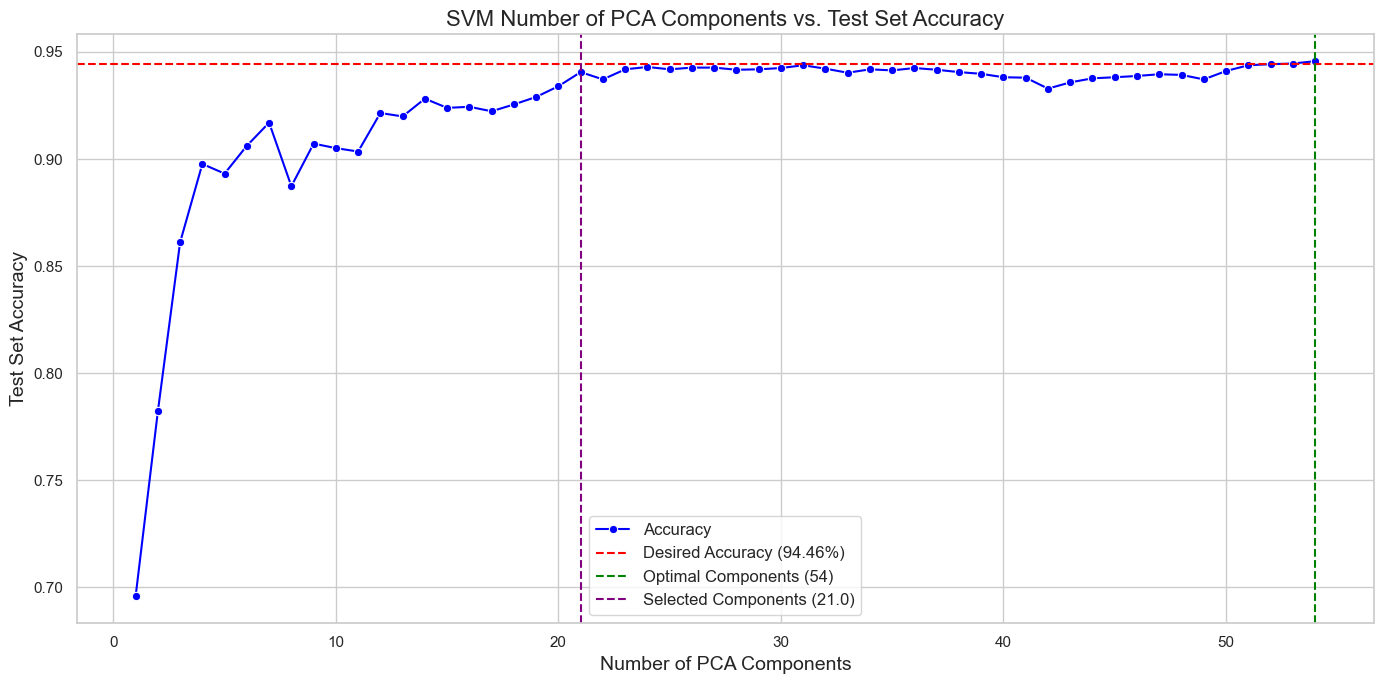

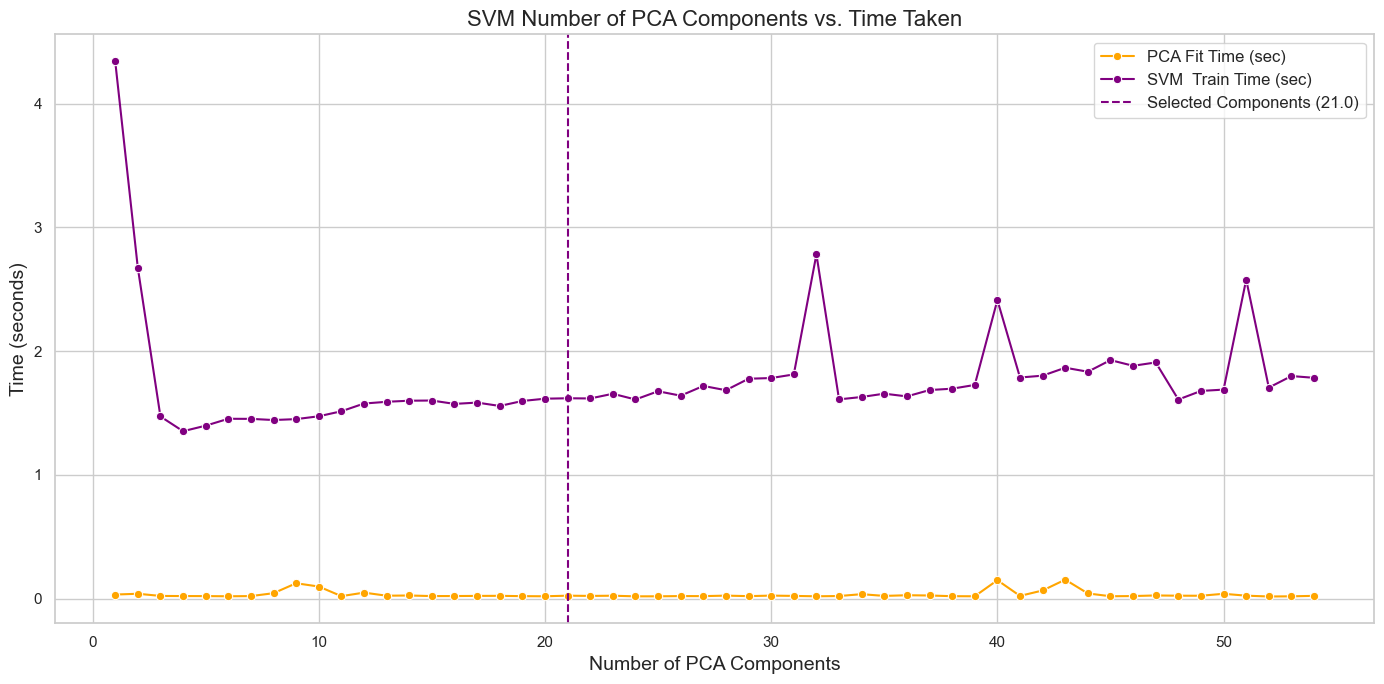


Selected Component Details:
   Selected_n_components  Selected_accuracy  Selected_pca_time_sec  \
0                   21.0             0.9406                  0.023   

   Selected_rf_time_sec  
0                1.6191  


In [55]:
sns.set(style="whitegrid")

# ---------------------------
# 5.1. Number of PCA Components vs. Test Set Accuracy
# ---------------------------

plt.figure(figsize=(14, 7))
sns.lineplot(x='n_components', y='accuracy', data=df, marker='o', color='blue', label='Accuracy')
plt.title('SVM Number of PCA Components vs. Test Set Accuracy', fontsize=16)
plt.xlabel('Number of PCA Components', fontsize=14)
plt.ylabel('Test Set Accuracy', fontsize=14)

# Desired Accuracy Line
plt.axhline(y=desired_accuracy, color='red', linestyle='--', label=f'Desired Accuracy ({desired_accuracy*100}%)')

# Optimal Components Line
plt.axvline(x=54, color='green', linestyle='--', label='Optimal Components (54)')

# Selected Components Line
if not candidate_df.empty:
    plt.axvline(x=selected_n_components, color='purple', linestyle='--', label=f'Selected Components ({selected_n_components})')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# ---------------------------
# 5.2. Number of PCA Components vs. Time Taken
# ---------------------------

plt.figure(figsize=(14, 7))
sns.lineplot(x='n_components', y='pca_time_sec', data=df, marker='o', label='PCA Fit Time (sec)', color='orange')
sns.lineplot(x='n_components', y='rf_time_sec', data=df, marker='o', label='SVM  Train Time (sec)', color='purple')

plt.title('SVM Number of PCA Components vs. Time Taken', fontsize=16)
plt.xlabel('Number of PCA Components', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)

# Highlight Selected Components
if not candidate_df.empty:
    plt.axvline(x=selected_n_components, color='purple', linestyle='--', label=f'Selected Components ({selected_n_components})')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# ---------------------------
# 6. Display Selected Component Details
# ---------------------------

if not candidate_df.empty:
    selected_data = {
        'Selected_n_components': selected_n_components,
        'Selected_accuracy': selected_accuracy,
        'Selected_pca_time_sec': selected_pca_time,
        'Selected_rf_time_sec': selected_rf_time
    }
    selected_df = pd.DataFrame([selected_data])
    print("\nSelected Component Details:")
    print(selected_df)
else:
    print("\nNo suitable number of PCA components found within the desired accuracy threshold.")

In [56]:
comparison_data = {
    'Model': [
        'PCA (21 Components)',
        'RFE (17 Features)',
        'All Features (SVM)'
    ],
    'Test Set Accuracy': [
        0.9480,  # PCA with 31 Components
        0.9406,  # RFE with 17 Features
        0.9446   # All Features
    ],
    'Training Time (seconds)': [
        1.6421,   # PCA with 31 Components
        2.4674,   # RFE with 17 Features
        2.7251    # All Features
    ]
}

# Create the DataFrame
df_comparison = pd.DataFrame(comparison_data)

print(df_comparison)

                 Model  Test Set Accuracy  Training Time (seconds)
0  PCA (21 Components)             0.9480                   1.6421
1    RFE (17 Features)             0.9406                   2.4674
2   All Features (SVM)             0.9446                   2.7251


C:\Users\praga\AppData\Local\Temp\ipykernel_24788\316995361.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Test Set Accuracy', data=df_comparison, palette='Blues_d')


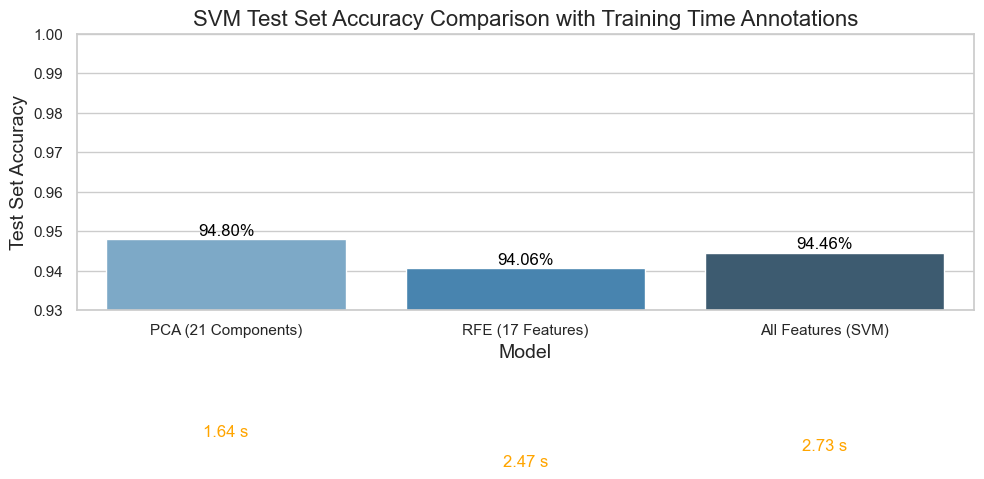

C:\Users\praga\AppData\Local\Temp\ipykernel_24788\316995361.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Training Time (seconds)', data=df_comparison, palette='Oranges_d')


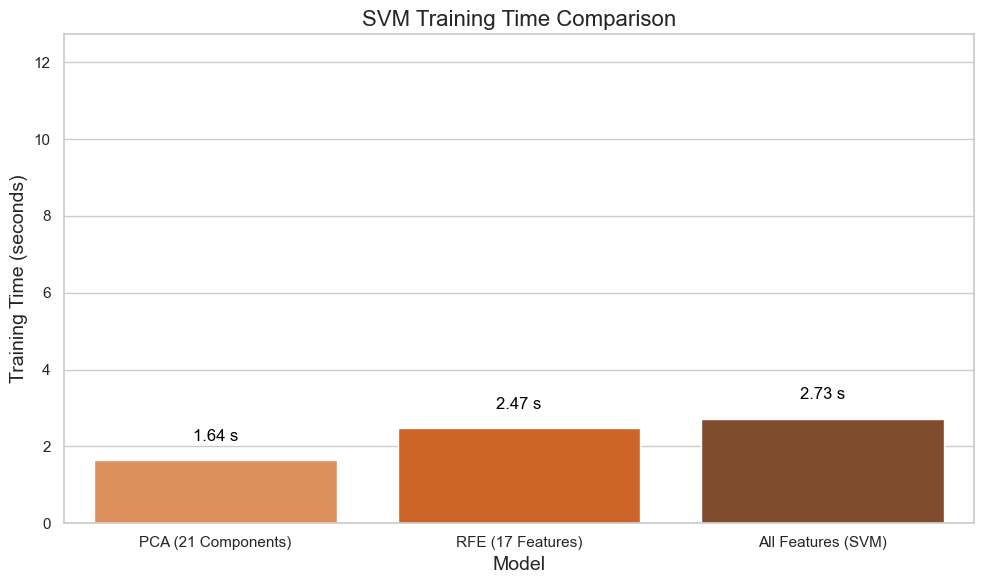

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Set Accuracy', data=df_comparison, palette='Blues_d')

# Add data labels and training time annotations
for index, row in df_comparison.iterrows():
    plt.text(index, row['Test Set Accuracy'] + 0.001, f"{row['Test Set Accuracy']*100:.2f}%", 
             color='black', ha="center", fontsize=12)
    plt.text(index, row['Test Set Accuracy'] - 0.05, f"{row['Training Time (seconds)']:.2f} s", 
             color='orange', ha="center", fontsize=12)

plt.title('SVM Test Set Accuracy Comparison with Training Time Annotations', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Test Set Accuracy', fontsize=14)
plt.ylim(0.93, 1.0)  # Setting y-axis limits for better visualization
plt.tight_layout()
plt.show()



# ---------------------------
# Chart 2: Training Time
# ---------------------------

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Training Time (seconds)', data=df_comparison, palette='Oranges_d')

# Add data labels on top of each bar
for index, row in df_comparison.iterrows():
    plt.text(index, row['Training Time (seconds)'] + 0.5, f"{row['Training Time (seconds)']:.2f} s", 
             color='black', ha="center", fontsize=12)

plt.title('SVM Training Time Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Training Time (seconds)', fontsize=14)
plt.ylim(0, df_comparison['Training Time (seconds)'].max() + 10)  # Adjust y-axis limit
plt.tight_layout()
plt.show()

Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

Scaling the data...
Data scaling completed in 0.0187 seconds

Starting hyperparameter tuning for Logistic Regression...
Fitting 5 folds for each of 60 candidates, totalling 300 fits

Hyperparameter tuning completed in 20.33 seconds

Best Hyperparameters:
  C: 10
  max_iter: 100
  penalty: l1
  solver: liblinear

Best Cross-Validation Accuracy: 0.9406


Training Time for Best Parameters: 0.0276 seconds
Test Set Accuracy: 0.8714

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1886
           1       0.90      0.84      0.87      1886

    accuracy                           0.87      3772
   macro avg       0.87      0.87      0.87      3772
weighted avg       0.87      0.87      0.87      3772

Confusion Matrix:
[[1709  177]
 [ 308 1578]]


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


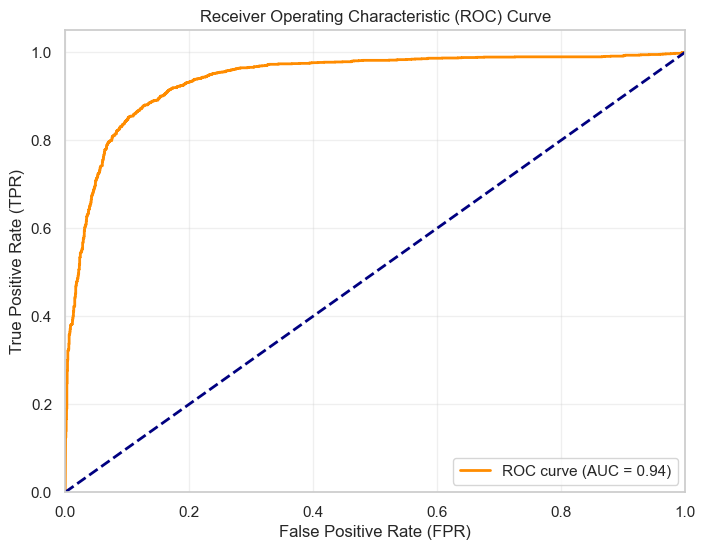

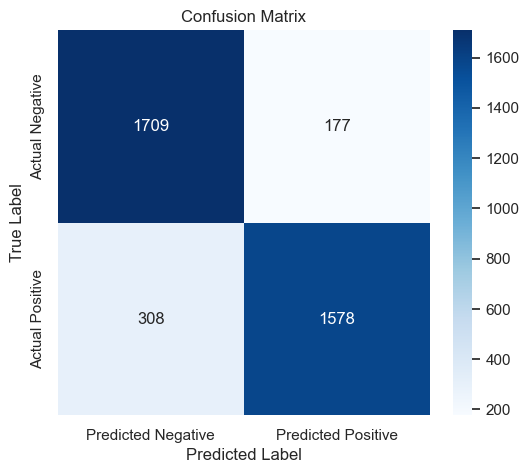

In [61]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
print("Scaling the data...")
start_time_scaler = time.time()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)
end_time_scaler = time.time()
scaler_time = end_time_scaler - start_time_scaler
print(f"Data scaling completed in {scaler_time:.4f} seconds\n")

# ============================
# 5. Define the Hyperparameter Grid for Logistic Regression
# ============================

# Define the hyperparameters and their possible values to tune
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],          # Inverse of regularization strength
    'penalty': ['l1', 'l2'],               # Regularization penalty
    'solver': ['liblinear', 'saga'],       # Solver algorithms that support 'l1' and 'l2' penalties
    'max_iter': [100, 200, 500]            # Maximum number of iterations
}

# ============================
# 6. Perform Hyperparameter Tuning with GridSearchCV
# ============================

# Initialize Logistic Regression
log_reg = LogisticRegression(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,                      # 5-fold cross-validation
    scoring='accuracy',        # Evaluation metric
    n_jobs=-1,                 # Utilize all available cores
    verbose=1                  # Verbosity level
)

# Fit GridSearchCV to find the best hyperparameters
print("Starting hyperparameter tuning for Logistic Regression...")
start_time = time.time()
grid_search.fit(X_train_scaled, y)
end_time = time.time()

print(f"\nHyperparameter tuning completed in {end_time - start_time:.2f} seconds\n")

# ============================
# 7. Retrieve and Display the Best Parameters and Score
# ============================

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:")
for param_name in sorted(best_params.keys()):
    print(f"  {param_name}: {best_params[param_name]}")

print(f"\nBest Cross-Validation Accuracy: {best_score:.4f}\n")

# ============================
# 8. Evaluate the Best Model on Test Data
# ============================

# Use the best estimator to make predictions on the test set
best_model = grid_search.best_estimator_


# Measure training time
start_time_best = time.time()
best_model.fit(X, y)
end_time_best = time.time()
training_time_best = end_time_best - start_time_best

print(f"\nTraining Time for Best Parameters: {training_time_best:.4f} seconds")
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for the positive class

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}\n")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ============================
# 9. Plot the ROC Curve and Calculate AUC
# ============================

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# ============================
# 10. Optional: Plot the Confusion Matrix Heatmap
# ============================

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Time taken to train Logistic Regression with RF-selected features: 2.4674 seconds
Test Set Accuracy with RF-selected features: 0.9255


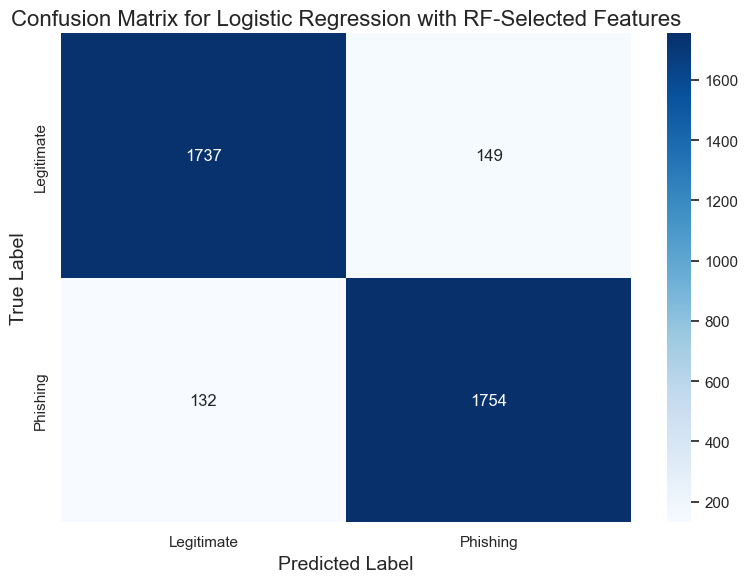


Classification Report for Logistic Regression with RF-Selected Features:
              precision    recall  f1-score   support

  Legitimate       0.93      0.92      0.93      1886
    Phishing       0.92      0.93      0.93      1886

    accuracy                           0.93      3772
   macro avg       0.93      0.93      0.93      3772
weighted avg       0.93      0.93      0.93      3772



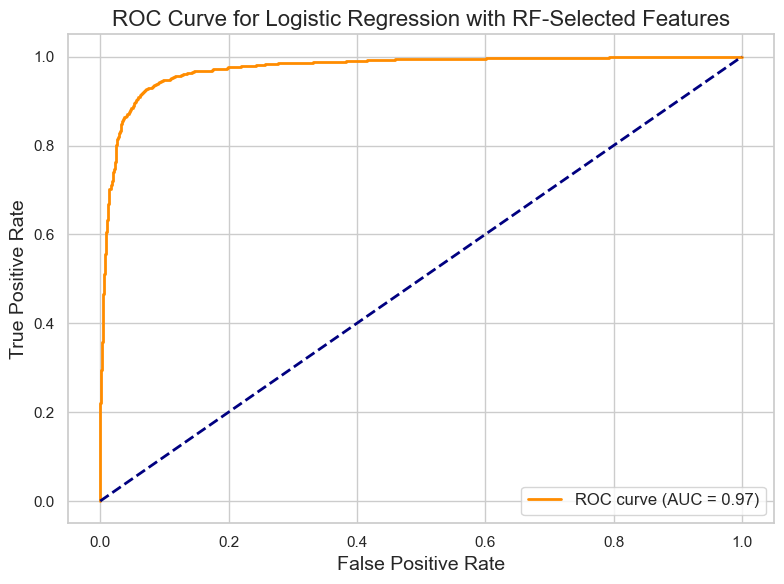


Trained LR model with RF-selected features saved as '_lr_selected_features_model.pkl'


In [73]:
selected_features = [
    'length_url', 'length_hostname', 'nb_www', 'ratio_digits_url',
    'length_words_raw', 'longest_word_path', 'avg_word_path',
    'phish_hints', 'nb_hyperlinks', 'ratio_intHyperlinks',
    'ratio_extHyperlinks', 'safe_anchor', 'domain_registration_length',
    'domain_age', 'web_traffic', 'google_index', 'page_rank'
]

# ---------------------------
# 2. Subset the Data
# ---------------------------

# Assuming X_train and X_test are Pandas DataFrames
if isinstance(X, pd.DataFrame):
    X_train_selected = X[selected_features]
    X_test_selected = X_test[selected_features]
else:
   
    feature_indices = [list(X.columns).index(feat) for feat in selected_features]  # Only if X has 'columns' attribute
    X_train_selected = X[:, feature_indices]
    X_test_selected = X_test[:, feature_indices]

# ---------------------------
# 3. Define Best SVM Classifier
# ---------------------------

best_lr = LogisticRegression(
    C=10,
  max_iter= 100,
  penalty='l1',
  solver='liblinear',
)

# ---------------------------
# 4. Create Pipeline
# ---------------------------

pipeline_lr_rf_features = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', best_lr)
])



start_time_lr_rf = time.time()
pipeline_lr_rf_features.fit(X_train_selected, y)
end_time_lr_rf = time.time()
training_time_lr_rf = end_time_svm_rf - start_time_svm_rf

print(f"\nTime taken to train Logistic Regression with RF-selected features: {training_time_lr_rf:.4f} seconds")


y_pred_lr_rf = pipeline_lr_rf_features.predict(X_test_selected)

# Calculate accuracy
test_accuracy_lr_rf = accuracy_score(y_test, y_pred_lr_rf)
print(f"Test Set Accuracy with RF-selected features: {test_accuracy_lr_rf:.4f}")



cm_lr_rf = confusion_matrix(y_test, y_pred_lr_rf)
class_labels = ['Legitimate', 'Phishing']  # Replace with actual class names if available

cm_df_lr_rf = pd.DataFrame(cm_lr_rf, index=class_labels, columns=class_labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm_df_lr_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression with RF-Selected Features', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.tight_layout()
plt.show()



print("\nClassification Report for Logistic Regression with RF-Selected Features:")
print(classification_report(y_test, y_pred_lr_rf, target_names=class_labels))



y_prob_lr_rf = pipeline_lr_rf_features.predict_proba(X_test_selected)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr_rf)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve for Logistic Regression with RF-Selected Features', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.tight_layout()
plt.show()

results_time_accuracy = pd.DataFrame({
    'Model': ['Logistic Regression with RF-Selected Features'],
    'Test Accuracy': [test_accuracy_lr_rf],
    'Training Time (seconds)': [training_time_lr_rf]
})


model_filename_lr_rf = '_lr_selected_features_model.pkl'
joblib.dump(pipeline_lr_rf_features, model_filename_lr_rf)
print(f"\nTrained LR model with RF-selected features saved as '{model_filename_lr_rf}'")

Scaling the data...
Time taken to scale data: 0.0162 seconds


Evaluating PCA with 1 component(s)...
Time taken to fit PCA: 0.0321 seconds
Time taken to train Logistic Regression: 0.0030 seconds
Test Set Accuracy: 0.6975

Evaluating PCA with 2 component(s)...
Time taken to fit PCA: 0.0529 seconds
Time taken to train Logistic Regression: 0.0031 seconds
Test Set Accuracy: 0.7686

Evaluating PCA with 3 component(s)...
Time taken to fit PCA: 0.0197 seconds
Time taken to train Logistic Regression: 0.0035 seconds
Test Set Accuracy: 0.8685

Evaluating PCA with 4 component(s)...
Time taken to fit PCA: 0.0249 seconds
Time taken to train Logistic Regression: 0.0040 seconds
Test Set Accuracy: 0.8685

Evaluating PCA with 5 component(s)...
Time taken to fit PCA: 0.0206 seconds
Time taken to train Logistic Regression: 0.0034 seconds
Test Set Accuracy: 0.8627

Evaluating PCA with 6 component(s)...
Time taken to fit PCA: 0.0254 seconds
Time taken to train Logistic Regression: 0.0040 seconds
Test Set A

C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Time taken to train Logistic Regression: 21.9475 seconds
Test Set Accuracy: 0.9409

Evaluating PCA with 64 component(s)...
Time taken to fit PCA: 0.0274 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Time taken to train Logistic Regression: 22.4003 seconds
Test Set Accuracy: 0.9409

Evaluating PCA with 65 component(s)...
Time taken to fit PCA: 0.0202 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Time taken to train Logistic Regression: 22.9848 seconds
Test Set Accuracy: 0.9417

Evaluating PCA with 66 component(s)...
Time taken to fit PCA: 0.0294 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Time taken to train Logistic Regression: 22.3873 seconds
Test Set Accuracy: 0.9419

Evaluating PCA with 67 component(s)...
Time taken to fit PCA: 0.0205 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Time taken to train Logistic Regression: 23.4737 seconds
Test Set Accuracy: 0.9411

Evaluating PCA with 68 component(s)...
Time taken to fit PCA: 0.0224 seconds
Time taken to train Logistic Regression: 2.2968 seconds
Test Set Accuracy: 0.9398

Evaluating PCA with 69 component(s)...
Time taken to fit PCA: 0.0294 seconds
Time taken to train Logistic Regression: 0.5295 seconds
Test Set Accuracy: 0.9409

Evaluating PCA with 70 component(s)...
Time taken to fit PCA: 0.0317 seconds
Time taken to train Logistic Regression: 0.4508 seconds
Test Set Accuracy: 0.9409

Evaluating PCA with 71 component(s)...
Time taken to fit PCA: 0.0199 seconds
Time taken to train Logistic Regression: 0.4394 seconds
Test Set Accuracy: 0.9414

Evaluating PCA with 72 component(s)...
Time taken to fit PCA: 0.0208 seconds
Time taken to train Logistic Regression: 0.4768 seconds
Test Set Accuracy: 0.9411

Evaluating PCA with 73 component(s)...
Time taken to fit PCA: 0.0314 seconds
Time taken to train Logistic Regression

C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


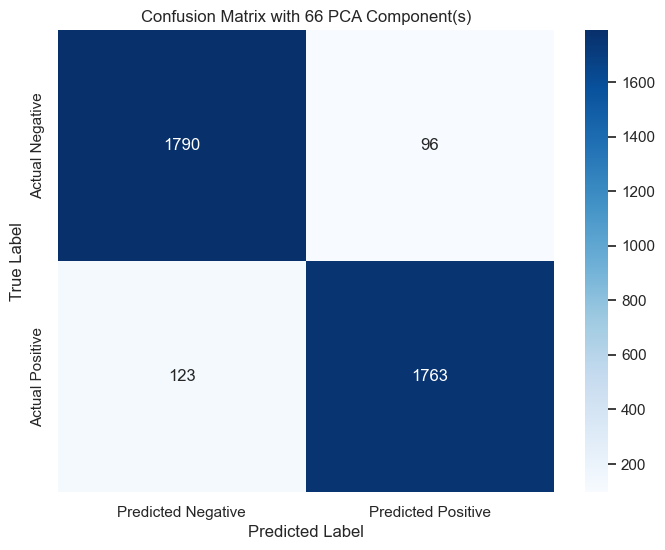


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.94      0.95      0.94      1886
     Class 1       0.95      0.93      0.94      1886

    accuracy                           0.94      3772
   macro avg       0.94      0.94      0.94      3772
weighted avg       0.94      0.94      0.94      3772



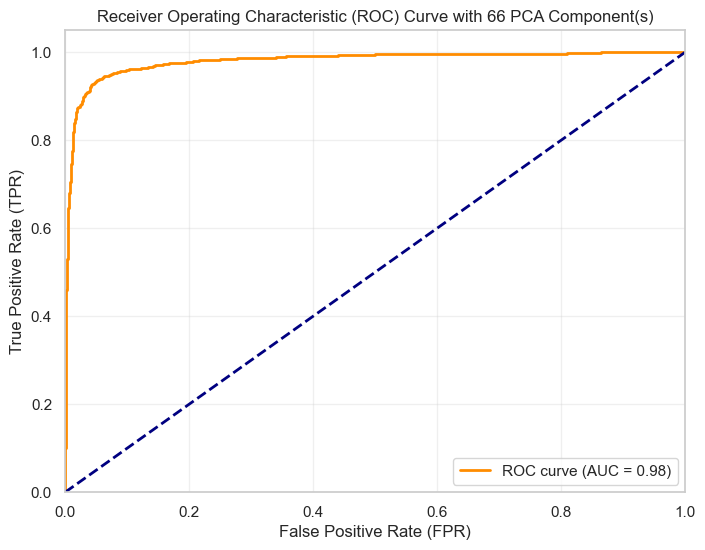

C:\Users\praga\AppData\Local\Temp\ipykernel_24788\4236156663.py:221: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient Magnitude', y='Principal Component', data=component_importances_lr, palette='viridis')


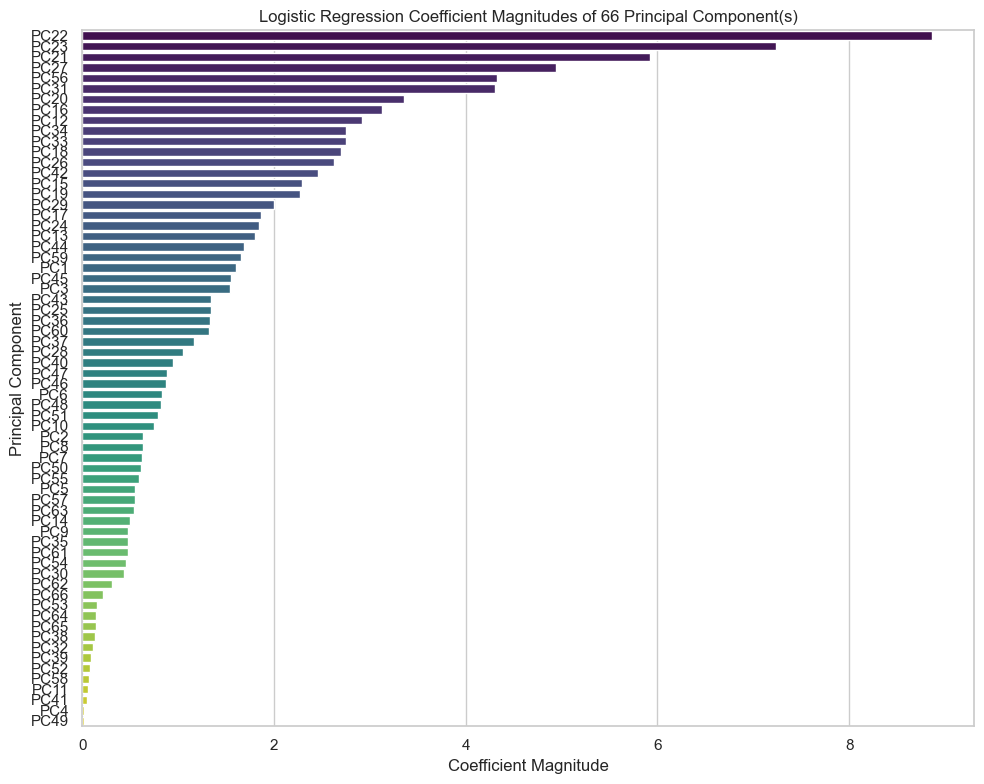

In [74]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
print("Scaling the data...")
start_time_scaler = time.time()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)
end_time_scaler = time.time()
scaler_time = end_time_scaler - start_time_scaler
print(f"Time taken to scale data: {scaler_time:.4f} seconds\n")


desired_accuracy = 0.95  


def find_optimal_pca_components_lr(X_train, y_train, X_test, y_test, desired_accuracy=0.95):
    """
    Determines the optimal number of PCA components to achieve at least the desired accuracy using Logistic Regression.
    If the desired accuracy is not met, selects the number of components with the highest accuracy.

    Parameters:
    - X_train: Training features (scaled).
    - y_train: Training labels.
    - X_test: Testing features (scaled).
    - y_test: Testing labels.
    - desired_accuracy: The target accuracy threshold.

    Returns:
    - optimal_n_components: The number of PCA components that meet or exceed the desired accuracy.
    - component_accuracies: A dictionary mapping number of components to test set accuracies.
    - component_times_pca: A dictionary mapping number of components to PCA fitting times.
    - component_times_lr: A dictionary mapping number of components to Logistic Regression training times.
    """
    component_accuracies = {}
    component_times_pca = {}
    component_times_lr = {}
    n_features = X_train.shape[1]
    optimal_n_components = None
    best_accuracy = 0
    best_n_components = 0

    # Initialize the Logistic Regression Classifier with your best hyperparameters
    best_lr = LogisticRegression(
        C=10,                # Regularization parameter
        max_iter=100,        # Maximum number of iterations
        penalty='l1',        # Regularization penalty
        solver='liblinear',  # Solver that supports 'l1' penalty
        random_state=42
    )

    for n in range(1, n_features + 1):
        print(f"\nEvaluating PCA with {n} component(s)...")
        
        # Initialize PCA with n components
        pca = PCA(n_components=n, svd_solver='full')
        
        # Measure the time taken to fit PCA
        start_time_pca = time.time()
        pca.fit(X_train)
        end_time_pca = time.time()
        pca_fit_time = end_time_pca - start_time_pca
        component_times_pca[n] = pca_fit_time
        print(f"Time taken to fit PCA: {pca_fit_time:.4f} seconds")
        
        # Transform the data
        X_train_pca = pca.transform(X_train)
        X_test_pca = pca.transform(X_test)
        
        # Measure the time taken to train the classifier
        start_time_lr = time.time()
        best_lr.fit(X_train_pca, y_train)
        end_time_lr = time.time()
        lr_training_time = end_time_lr - start_time_lr
        component_times_lr[n] = lr_training_time
        print(f"Time taken to train Logistic Regression: {lr_training_time:.4f} seconds")
        
        # Generate predictions
        y_pred_pca = best_lr.predict(X_test_pca)
        
        # Calculate accuracy
        accuracy_pca = accuracy_score(y_test, y_pred_pca)
        component_accuracies[n] = accuracy_pca
        print(f"Test Set Accuracy: {accuracy_pca:.4f}")
        
        # Update best accuracy and components if current accuracy is higher
        if accuracy_pca > best_accuracy:
            best_accuracy = accuracy_pca
            best_n_components = n
        
        # Check if desired accuracy is achieved
        if accuracy_pca >= desired_accuracy:
            optimal_n_components = n
            print(f"\nDesired accuracy of {desired_accuracy*100}% achieved with {n} component(s).")
            break

    # If desired accuracy not achieved, select the number of components with the highest accuracy
    if optimal_n_components is None:
        optimal_n_components = best_n_components
        optimal_accuracy = best_accuracy
        print(f"\nDesired accuracy of {desired_accuracy*100}% not achieved.")
        print(f"Using {optimal_n_components} component(s) with Test Set Accuracy: {optimal_accuracy:.4f}")
    
    return optimal_n_components, component_accuracies, component_times_pca, component_times_lr

# ============================
# 6. Find the Optimal Number of PCA Components with Logistic Regression
# ============================

# Find the optimal number of PCA components
optimal_n_components, component_accuracies, component_times_pca, component_times_lr = find_optimal_pca_components_lr(
    X_train_scaled, y, X_test_scaled, y_test, desired_accuracy
)

print(f"\nOptimal number of PCA components: {optimal_n_components}")

# ============================
# 7. Train the Final Logistic Regression Model with Selected PCA Components
# ============================

# Initialize PCA with the optimal number of components
pca_optimal = PCA(n_components=optimal_n_components, svd_solver='full')

# Measure the time taken to fit PCA
start_time_pca_fit = time.time()
pca_optimal.fit(X_train_scaled)
end_time_pca_fit = time.time()
pca_fit_time = end_time_pca_fit - start_time_pca_fit
print(f"\nTime taken to fit PCA with {optimal_n_components} components: {pca_fit_time:.2f} seconds")

# Transform the training and testing data
X_train_pca = pca_optimal.transform(X_train_scaled)
X_test_pca = pca_optimal.transform(X_test_scaled)

print(f"Shape of training data after PCA: {X_train_pca.shape}")
print(f"Shape of testing data after PCA: {X_test_pca.shape}")

# Initialize the Logistic Regression Classifier with your best hyperparameters
best_lr_final = LogisticRegression(
    C=10,                # Regularization parameter
    max_iter=100,        # Maximum number of iterations
    penalty='l1',        # Regularization penalty
    solver='liblinear',  # Solver that supports 'l1' penalty
    random_state=42
)

# Measure the time taken to train the classifier
start_time_lr_pca = time.time()
best_lr_final.fit(X_train_pca, y)
end_time_lr_pca = time.time()
lr_pca_training_time = end_time_lr_pca - start_time_lr_pca
print(f"\nTime taken to train the Logistic Regression model on PCA components: {lr_pca_training_time:.2f} seconds")

# ============================
# 8. Evaluate the Model
# ============================

# Generate predictions
y_pred_final = best_lr_final.predict(X_test_pca)
y_pred_proba_final = best_lr_final.predict_proba(X_test_pca)[:, 1]  # Probability estimates for the positive class

# Calculate accuracy
test_accuracy_final = accuracy_score(y_test, y_pred_final)
print(f"\nTest Set Accuracy: {test_accuracy_final:.4f}")

# ============================
# 9. Visualization and Metrics
# ============================

# Confusion Matrix
cm_final = confusion_matrix(y_test, y_pred_final)
class_labels = sorted(np.unique(y))

plt.figure(figsize=(8,6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title(f'Confusion Matrix with {optimal_n_components} PCA Component(s)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
report_final = classification_report(y_test, y_pred_final, target_names=['Class 0', 'Class 1'])
print("\nClassification Report:\n", report_final)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_final)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'Receiver Operating Characteristic (ROC) Curve with {optimal_n_components} PCA Component(s)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# Feature Importances (Coefficients)
# Logistic Regression coefficients can be interpreted as feature importances

importances_lr = best_lr_final.coef_
component_importances_lr = pd.DataFrame({
    'Principal Component': [f'PC{i}' for i in range(1, optimal_n_components + 1)]
})

# Since it's binary classification, coefficients are in a 1D array
component_importances_lr['Coefficient'] = importances_lr[0]

# Take absolute values for importance
component_importances_lr['Coefficient Magnitude'] = component_importances_lr['Coefficient'].abs()

# Sort by importance
component_importances_lr = component_importances_lr.sort_values(by='Coefficient Magnitude', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x='Coefficient Magnitude', y='Principal Component', data=component_importances_lr, palette='viridis')
plt.title(f'Logistic Regression Coefficient Magnitudes of {optimal_n_components} Principal Component(s)')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Principal Component')
plt.tight_layout()
plt.show()

Extracted Data:
   n_components  pca_time_sec  lr_time_sec  accuracy
0             1        0.0321       0.0030    0.6975
1             2        0.0529       0.0031    0.7686
2             3        0.0197       0.0035    0.8685
3             4        0.0249       0.0040    0.8685
4             5        0.0206       0.0034    0.8627

Missing Data Counts:
n_components    0
pca_time_sec    0
lr_time_sec     0
accuracy        0
dtype: int64


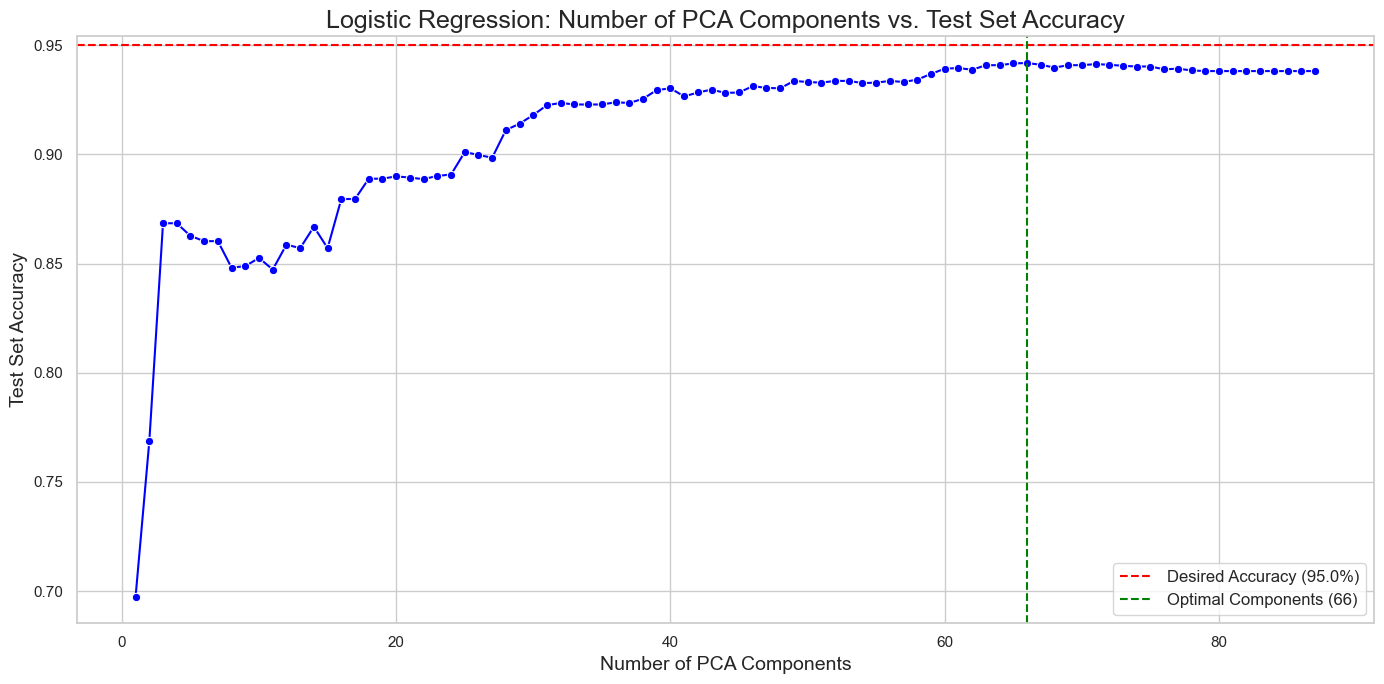

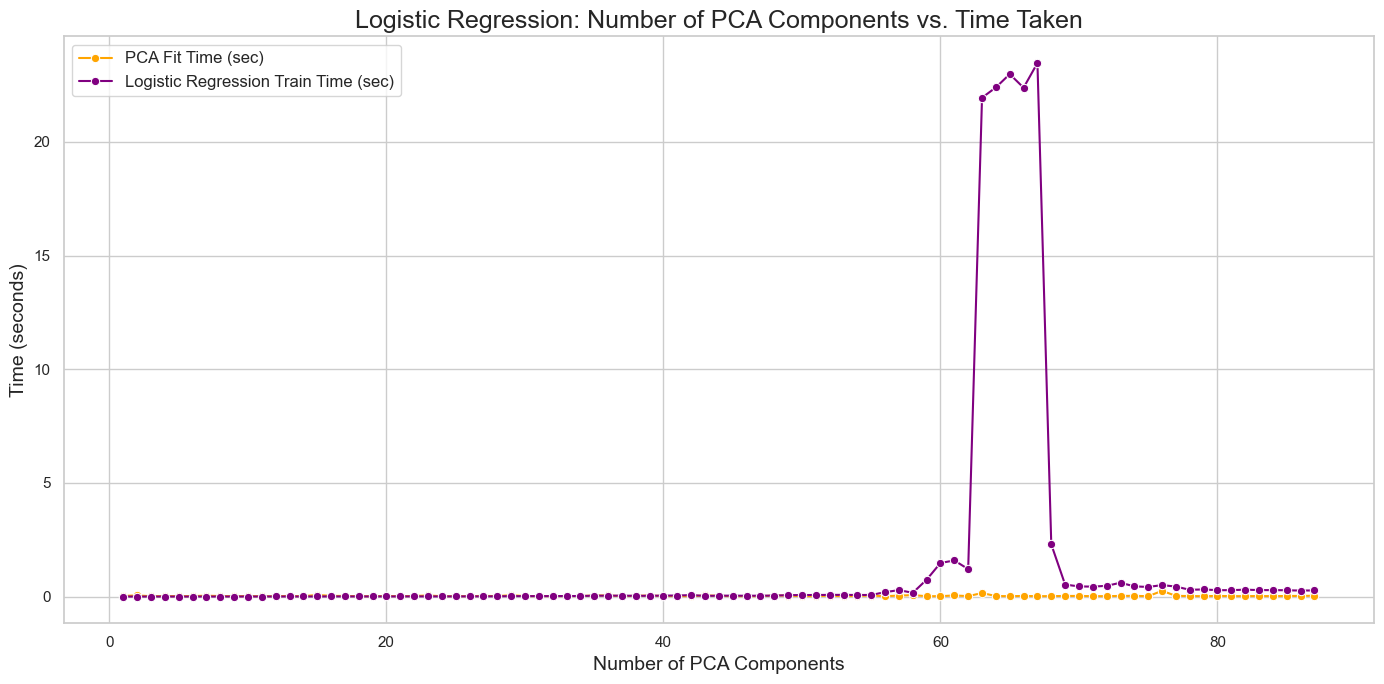

In [86]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your multi-line output string
output = r"""
Time taken to scale data: 0.0162 seconds


Evaluating PCA with 1 component(s)...
Time taken to fit PCA: 0.0321 seconds
Time taken to train Logistic Regression: 0.0030 seconds
Test Set Accuracy: 0.6975

Evaluating PCA with 2 component(s)...
Time taken to fit PCA: 0.0529 seconds
Time taken to train Logistic Regression: 0.0031 seconds
Test Set Accuracy: 0.7686

Evaluating PCA with 3 component(s)...
Time taken to fit PCA: 0.0197 seconds
Time taken to train Logistic Regression: 0.0035 seconds
Test Set Accuracy: 0.8685

Evaluating PCA with 4 component(s)...
Time taken to fit PCA: 0.0249 seconds
Time taken to train Logistic Regression: 0.0040 seconds
Test Set Accuracy: 0.8685

Evaluating PCA with 5 component(s)...
Time taken to fit PCA: 0.0206 seconds
Time taken to train Logistic Regression: 0.0034 seconds
Test Set Accuracy: 0.8627

Evaluating PCA with 6 component(s)...
Time taken to fit PCA: 0.0254 seconds
Time taken to train Logistic Regression: 0.0040 seconds
Test Set Accuracy: 0.8603

Evaluating PCA with 7 component(s)...
Time taken to fit PCA: 0.0413 seconds
Time taken to train Logistic Regression: 0.0040 seconds
Test Set Accuracy: 0.8603

Evaluating PCA with 8 component(s)...
Time taken to fit PCA: 0.0269 seconds
Time taken to train Logistic Regression: 0.0049 seconds
Test Set Accuracy: 0.8481

Evaluating PCA with 9 component(s)...
Time taken to fit PCA: 0.0193 seconds
Time taken to train Logistic Regression: 0.0055 seconds
Test Set Accuracy: 0.8489

Evaluating PCA with 10 component(s)...
Time taken to fit PCA: 0.0239 seconds
Time taken to train Logistic Regression: 0.0055 seconds
Test Set Accuracy: 0.8526

Evaluating PCA with 11 component(s)...
Time taken to fit PCA: 0.0190 seconds
Time taken to train Logistic Regression: 0.0061 seconds
Test Set Accuracy: 0.8473

Evaluating PCA with 12 component(s)...
Time taken to fit PCA: 0.0182 seconds
Time taken to train Logistic Regression: 0.0067 seconds
Test Set Accuracy: 0.8587

Evaluating PCA with 13 component(s)...
Time taken to fit PCA: 0.0320 seconds
Time taken to train Logistic Regression: 0.0074 seconds
Test Set Accuracy: 0.8571

Evaluating PCA with 14 component(s)...
Time taken to fit PCA: 0.0185 seconds
Time taken to train Logistic Regression: 0.0067 seconds
Test Set Accuracy: 0.8669

Evaluating PCA with 15 component(s)...
Time taken to fit PCA: 0.0757 seconds
Time taken to train Logistic Regression: 0.0080 seconds
Test Set Accuracy: 0.8571

Evaluating PCA with 16 component(s)...
Time taken to fit PCA: 0.0317 seconds
Time taken to train Logistic Regression: 0.0096 seconds
Test Set Accuracy: 0.8796

Evaluating PCA with 17 component(s)...
Time taken to fit PCA: 0.0308 seconds
Time taken to train Logistic Regression: 0.0081 seconds
Test Set Accuracy: 0.8796

Evaluating PCA with 18 component(s)...
Time taken to fit PCA: 0.0193 seconds
Time taken to train Logistic Regression: 0.0096 seconds
Test Set Accuracy: 0.8889

Evaluating PCA with 19 component(s)...
Time taken to fit PCA: 0.0196 seconds
Time taken to train Logistic Regression: 0.0090 seconds
Test Set Accuracy: 0.8889

Evaluating PCA with 20 component(s)...
Time taken to fit PCA: 0.0293 seconds
Time taken to train Logistic Regression: 0.0088 seconds
Test Set Accuracy: 0.8900

Evaluating PCA with 21 component(s)...
Time taken to fit PCA: 0.0197 seconds
Time taken to train Logistic Regression: 0.0103 seconds
Test Set Accuracy: 0.8894

Evaluating PCA with 22 component(s)...
Time taken to fit PCA: 0.0297 seconds
Time taken to train Logistic Regression: 0.0112 seconds
Test Set Accuracy: 0.8887

Evaluating PCA with 23 component(s)...
Time taken to fit PCA: 0.0520 seconds
Time taken to train Logistic Regression: 0.0100 seconds
Test Set Accuracy: 0.8902

Evaluating PCA with 24 component(s)...
Time taken to fit PCA: 0.0186 seconds
Time taken to train Logistic Regression: 0.0102 seconds
Test Set Accuracy: 0.8908

Evaluating PCA with 25 component(s)...
Time taken to fit PCA: 0.0208 seconds
Time taken to train Logistic Regression: 0.0104 seconds
Test Set Accuracy: 0.9011

Evaluating PCA with 26 component(s)...
Time taken to fit PCA: 0.0209 seconds
Time taken to train Logistic Regression: 0.0126 seconds
Test Set Accuracy: 0.8998

Evaluating PCA with 27 component(s)...
Time taken to fit PCA: 0.0324 seconds
Time taken to train Logistic Regression: 0.0121 seconds
Test Set Accuracy: 0.8985

Evaluating PCA with 28 component(s)...
Time taken to fit PCA: 0.0250 seconds
Time taken to train Logistic Regression: 0.0146 seconds
Test Set Accuracy: 0.9112

Evaluating PCA with 29 component(s)...
Time taken to fit PCA: 0.0623 seconds
Time taken to train Logistic Regression: 0.0210 seconds
Test Set Accuracy: 0.9141

Evaluating PCA with 30 component(s)...
Time taken to fit PCA: 0.0232 seconds
Time taken to train Logistic Regression: 0.0227 seconds
Test Set Accuracy: 0.9181

Evaluating PCA with 31 component(s)...
Time taken to fit PCA: 0.0237 seconds
Time taken to train Logistic Regression: 0.0228 seconds
Test Set Accuracy: 0.9226

Evaluating PCA with 32 component(s)...
Time taken to fit PCA: 0.0244 seconds
Time taken to train Logistic Regression: 0.0240 seconds
Test Set Accuracy: 0.9236

Evaluating PCA with 33 component(s)...
Time taken to fit PCA: 0.0249 seconds
Time taken to train Logistic Regression: 0.0260 seconds
Test Set Accuracy: 0.9229

Evaluating PCA with 34 component(s)...
Time taken to fit PCA: 0.0252 seconds
Time taken to train Logistic Regression: 0.0275 seconds
Test Set Accuracy: 0.9229

Evaluating PCA with 35 component(s)...
Time taken to fit PCA: 0.0499 seconds
Time taken to train Logistic Regression: 0.0427 seconds
Test Set Accuracy: 0.9229

Evaluating PCA with 36 component(s)...
Time taken to fit PCA: 0.0527 seconds
Time taken to train Logistic Regression: 0.0406 seconds
Test Set Accuracy: 0.9239

Evaluating PCA with 37 component(s)...
Time taken to fit PCA: 0.0192 seconds
Time taken to train Logistic Regression: 0.0449 seconds
Test Set Accuracy: 0.9236

Evaluating PCA with 38 component(s)...
Time taken to fit PCA: 0.0362 seconds
Time taken to train Logistic Regression: 0.0361 seconds
Test Set Accuracy: 0.9255

Evaluating PCA with 39 component(s)...
Time taken to fit PCA: 0.0483 seconds
Time taken to train Logistic Regression: 0.0383 seconds
Test Set Accuracy: 0.9295

Evaluating PCA with 40 component(s)...
Time taken to fit PCA: 0.0272 seconds
Time taken to train Logistic Regression: 0.0451 seconds
Test Set Accuracy: 0.9303

Evaluating PCA with 41 component(s)...
Time taken to fit PCA: 0.0254 seconds
Time taken to train Logistic Regression: 0.0495 seconds
Test Set Accuracy: 0.9266

Evaluating PCA with 42 component(s)...
Time taken to fit PCA: 0.0180 seconds
Time taken to train Logistic Regression: 0.0679 seconds
Test Set Accuracy: 0.9284

Evaluating PCA with 43 component(s)...
Time taken to fit PCA: 0.0552 seconds
Time taken to train Logistic Regression: 0.0334 seconds
Test Set Accuracy: 0.9297

Evaluating PCA with 44 component(s)...
Time taken to fit PCA: 0.0355 seconds
Time taken to train Logistic Regression: 0.0416 seconds
Test Set Accuracy: 0.9282

Evaluating PCA with 45 component(s)...
Time taken to fit PCA: 0.0202 seconds
Time taken to train Logistic Regression: 0.0435 seconds
Test Set Accuracy: 0.9284

Evaluating PCA with 46 component(s)...
Time taken to fit PCA: 0.0221 seconds
Time taken to train Logistic Regression: 0.0391 seconds
Test Set Accuracy: 0.9313

Evaluating PCA with 47 component(s)...
Time taken to fit PCA: 0.0185 seconds
Time taken to train Logistic Regression: 0.0416 seconds
Test Set Accuracy: 0.9305

Evaluating PCA with 48 component(s)...
Time taken to fit PCA: 0.0495 seconds
Time taken to train Logistic Regression: 0.0466 seconds
Test Set Accuracy: 0.9303

Evaluating PCA with 49 component(s)...
Time taken to fit PCA: 0.0450 seconds
Time taken to train Logistic Regression: 0.0653 seconds
Test Set Accuracy: 0.9337

Evaluating PCA with 50 component(s)...
Time taken to fit PCA: 0.0200 seconds
Time taken to train Logistic Regression: 0.0697 seconds
Test Set Accuracy: 0.9332

Evaluating PCA with 51 component(s)...
Time taken to fit PCA: 0.0217 seconds
Time taken to train Logistic Regression: 0.0740 seconds
Test Set Accuracy: 0.9329

Evaluating PCA with 52 component(s)...
Time taken to fit PCA: 0.0410 seconds
Time taken to train Logistic Regression: 0.0761 seconds
Test Set Accuracy: 0.9337

Evaluating PCA with 53 component(s)...
Time taken to fit PCA: 0.0206 seconds
Time taken to train Logistic Regression: 0.0789 seconds
Test Set Accuracy: 0.9337

Evaluating PCA with 54 component(s)...
Time taken to fit PCA: 0.0305 seconds
Time taken to train Logistic Regression: 0.0725 seconds
Test Set Accuracy: 0.9327

Evaluating PCA with 55 component(s)...
Time taken to fit PCA: 0.0466 seconds
Time taken to train Logistic Regression: 0.0739 seconds
Test Set Accuracy: 0.9329

Evaluating PCA with 56 component(s)...
Time taken to fit PCA: 0.0199 seconds
Time taken to train Logistic Regression: 0.1983 seconds
Test Set Accuracy: 0.9337

Evaluating PCA with 57 component(s)...
Time taken to fit PCA: 0.0455 seconds
Time taken to train Logistic Regression: 0.2868 seconds
Test Set Accuracy: 0.9332

Evaluating PCA with 58 component(s)...
Time taken to fit PCA: 0.0665 seconds
Time taken to train Logistic Regression: 0.1691 seconds
Test Set Accuracy: 0.9343

Evaluating PCA with 59 component(s)...
Time taken to fit PCA: 0.0191 seconds
Time taken to train Logistic Regression: 0.7457 seconds
Test Set Accuracy: 0.9369

Evaluating PCA with 60 component(s)...
Time taken to fit PCA: 0.0209 seconds
Time taken to train Logistic Regression: 1.4819 seconds
Test Set Accuracy: 0.9393

Evaluating PCA with 61 component(s)...
Time taken to fit PCA: 0.0514 seconds
Time taken to train Logistic Regression: 1.5913 seconds
Test Set Accuracy: 0.9396

Evaluating PCA with 62 component(s)...
Time taken to fit PCA: 0.0230 seconds
Time taken to train Logistic Regression: 1.2114 seconds
Test Set Accuracy: 0.9388

Evaluating PCA with 63 component(s)...
Time taken to fit PCA: 0.1572 seconds
C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
Time taken to train Logistic Regression: 21.9475 seconds
Test Set Accuracy: 0.9409

Evaluating PCA with 64 component(s)...
Time taken to fit PCA: 0.0274 seconds
C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
Time taken to train Logistic Regression: 22.4003 seconds
Test Set Accuracy: 0.9409

Evaluating PCA with 65 component(s)...
Time taken to fit PCA: 0.0202 seconds
C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
Time taken to train Logistic Regression: 22.9848 seconds
Test Set Accuracy: 0.9417

Evaluating PCA with 66 component(s)...
Time taken to fit PCA: 0.0294 seconds
C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
Time taken to train Logistic Regression: 22.3873 seconds
Test Set Accuracy: 0.9419

Evaluating PCA with 67 component(s)...
Time taken to fit PCA: 0.0205 seconds
C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
Time taken to train Logistic Regression: 23.4737 seconds
Test Set Accuracy: 0.9411

Evaluating PCA with 68 component(s)...
Time taken to fit PCA: 0.0224 seconds
Time taken to train Logistic Regression: 2.2968 seconds
Test Set Accuracy: 0.9398

Evaluating PCA with 69 component(s)...
Time taken to fit PCA: 0.0294 seconds
Time taken to train Logistic Regression: 0.5295 seconds
Test Set Accuracy: 0.9409

Evaluating PCA with 70 component(s)...
Time taken to fit PCA: 0.0317 seconds
Time taken to train Logistic Regression: 0.4508 seconds
Test Set Accuracy: 0.9409

Evaluating PCA with 71 component(s)...
Time taken to fit PCA: 0.0199 seconds
Time taken to train Logistic Regression: 0.4394 seconds
Test Set Accuracy: 0.9414

Evaluating PCA with 72 component(s)...
Time taken to fit PCA: 0.0208 seconds
Time taken to train Logistic Regression: 0.4768 seconds
Test Set Accuracy: 0.9411

Evaluating PCA with 73 component(s)...
Time taken to fit PCA: 0.0314 seconds
Time taken to train Logistic Regression: 0.6110 seconds
Test Set Accuracy: 0.9406

Evaluating PCA with 74 component(s)...
Time taken to fit PCA: 0.0349 seconds
Time taken to train Logistic Regression: 0.4523 seconds
Test Set Accuracy: 0.9403

Evaluating PCA with 75 component(s)...
Time taken to fit PCA: 0.0192 seconds
Time taken to train Logistic Regression: 0.4246 seconds
Test Set Accuracy: 0.9403

Evaluating PCA with 76 component(s)...
Time taken to fit PCA: 0.2550 seconds
Time taken to train Logistic Regression: 0.5091 seconds
Test Set Accuracy: 0.9390

Evaluating PCA with 77 component(s)...
Time taken to fit PCA: 0.0342 seconds
Time taken to train Logistic Regression: 0.4413 seconds
Test Set Accuracy: 0.9393

Evaluating PCA with 78 component(s)...
Time taken to fit PCA: 0.0259 seconds
Time taken to train Logistic Regression: 0.3007 seconds
Test Set Accuracy: 0.9385

Evaluating PCA with 79 component(s)...
Time taken to fit PCA: 0.0185 seconds
Time taken to train Logistic Regression: 0.3174 seconds
Test Set Accuracy: 0.9382

Evaluating PCA with 80 component(s)...
Time taken to fit PCA: 0.0321 seconds
Time taken to train Logistic Regression: 0.2833 seconds
Test Set Accuracy: 0.9382

Evaluating PCA with 81 component(s)...
Time taken to fit PCA: 0.0218 seconds
Time taken to train Logistic Regression: 0.2853 seconds
Test Set Accuracy: 0.9382

Evaluating PCA with 82 component(s)...
Time taken to fit PCA: 0.0207 seconds
Time taken to train Logistic Regression: 0.3069 seconds
Test Set Accuracy: 0.9382

Evaluating PCA with 83 component(s)...
Time taken to fit PCA: 0.0270 seconds
Time taken to train Logistic Regression: 0.2878 seconds
Test Set Accuracy: 0.9382

Evaluating PCA with 84 component(s)...
Time taken to fit PCA: 0.0201 seconds
Time taken to train Logistic Regression: 0.2862 seconds
Test Set Accuracy: 0.9382

Evaluating PCA with 85 component(s)...
Time taken to fit PCA: 0.0292 seconds
Time taken to train Logistic Regression: 0.2809 seconds
Test Set Accuracy: 0.9382

Evaluating PCA with 86 component(s)...
Time taken to fit PCA: 0.0315 seconds
Time taken to train Logistic Regression: 0.2662 seconds
Test Set Accuracy: 0.9382

Evaluating PCA with 87 component(s)...
Time taken to fit PCA: 0.0384 seconds
Time taken to train Logistic Regression: 0.2738 seconds
Test Set Accuracy: 0.9382

"""

# ---------------------------
# 2. Extract Data Using Regular Expressions
# ---------------------------

# Initialize lists to store extracted data
n_components = []
pca_time = []
lr_time = []
accuracy = []

# Split the output into lines
lines = output.strip().split('\n')

# Define regex patterns
pca_eval_pattern = re.compile(r'Evaluating PCA with (\d+) component\(s\)\.\.\.')
pca_time_pattern = re.compile(r'Time taken to fit PCA: ([\d.]+) seconds')
lr_time_pattern = re.compile(r'Time taken to train Logistic Regression: ([\d.]+) seconds')
accuracy_pattern = re.compile(r'Test Set Accuracy: ([\d.]+)')

# Iterate through lines to extract data
for i, line in enumerate(lines):
    eval_match = pca_eval_pattern.match(line.strip())
    if eval_match:
        n = int(eval_match.group(1))
        n_components.append(n)
        # Initialize variables
        p_time = None
        l_time = None
        acc = None
        # Initialize j to i+1
        j = i + 1
        # Iterate through the next lines to find pca_time, lr_time, and accuracy
        while j < len(lines) and (p_time is None or l_time is None or acc is None):
            pca_time_match = pca_time_pattern.match(lines[j].strip())
            if pca_time_match:
                p_time = float(pca_time_match.group(1))
                j += 1
                continue
            lr_time_match = lr_time_pattern.match(lines[j].strip())
            if lr_time_match:
                l_time = float(lr_time_match.group(1))
                j += 1
                continue
            accuracy_match = accuracy_pattern.match(lines[j].strip())
            if accuracy_match:
                acc = float(accuracy_match.group(1))
                j += 1
                continue
            # If line does not match any pattern, skip
            j += 1
        # Append the extracted values if all were found
        if p_time is not None and l_time is not None and acc is not None:
            pca_time.append(p_time)
            lr_time.append(l_time)
            accuracy.append(acc)
        else:
            print(f"Warning: Could not extract all metrics for PCA component {n}")

# Create a Pandas DataFrame
df = pd.DataFrame({
    'n_components': n_components,
    'pca_time_sec': pca_time,
    'lr_time_sec': lr_time,
    'accuracy': accuracy
})

print("Extracted Data:")
print(df.head())

# Check for missing data
print("\nMissing Data Counts:")
print(df.isnull().sum())

# ============================
# 3. Generate the Plots
# ============================

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Define the desired accuracy
desired_accuracy = 0.95  # 94.46%

# ---------------------------
# 3.1. Number of PCA Components vs. Test Set Accuracy
# ---------------------------

plt.figure(figsize=(14,7))
sns.lineplot(x='n_components', y='accuracy', data=df, marker='o', color='blue')
plt.title('Logistic Regression: Number of PCA Components vs. Test Set Accuracy', fontsize=18)
plt.xlabel('Number of PCA Components', fontsize=14)
plt.ylabel('Test Set Accuracy', fontsize=14)
plt.axhline(y=desired_accuracy, color='red', linestyle='--', label=f'Desired Accuracy ({desired_accuracy*100}%)')
optimal_n = df.loc[df['accuracy'].idxmax(), 'n_components']
plt.axvline(x=optimal_n, color='green', linestyle='--', label=f'Optimal Components ({optimal_n})')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# ---------------------------
# 3.2. Number of PCA Components vs. Time Taken
# ---------------------------

plt.figure(figsize=(14,7))
sns.lineplot(x='n_components', y='pca_time_sec', data=df, marker='o', label='PCA Fit Time (sec)', color='orange')
sns.lineplot(x='n_components', y='lr_time_sec', data=df, marker='o', label='Logistic Regression Train Time (sec)', color='purple')
plt.title('Logistic Regression: Number of PCA Components vs. Time Taken', fontsize=18)
plt.xlabel('Number of PCA Components', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [90]:
# Define desired accuracy and acceptable drop
optimal_accuracy = df.loc[df['n_components'] == 66, 'accuracy'].values[0]
desired_accuracy = 0.95 # 95% as per your initial objective
accuracy_threshold = 0.01  # 1% drop

# Calculate the minimum acceptable accuracy
min_acceptable_accuracy = optimal_accuracy - accuracy_threshold

# Filter components that meet the accuracy threshold
candidate_df = df[df['accuracy'] >= min_acceptable_accuracy]

# Find the minimal number of components among candidates
if not candidate_df.empty:
    selected_row = candidate_df.loc[candidate_df['n_components'].idxmin()]
    selected_n_components = selected_row['n_components']
    selected_accuracy = selected_row['accuracy']
    selected_pca_time = selected_row['pca_time_sec']
    selected_rf_time = selected_row['lr_time_sec']
    print(f"\nSelected Number of PCA Components: {selected_n_components}")
    print(f"Test Set Accuracy: {selected_accuracy:.4f} (within {accuracy_threshold*100}%)")
    print(f"PCA Fit Time: {selected_pca_time} seconds")
    print(f"Logistic Regression Train Time: {selected_rf_time} seconds")
else:
    print("\nNo number of PCA components meets the desired accuracy threshold.")


Selected Number of PCA Components: 49.0
Test Set Accuracy: 0.9337 (within 1.0%)
PCA Fit Time: 0.045 seconds
Logistic Regression Train Time: 0.0653 seconds


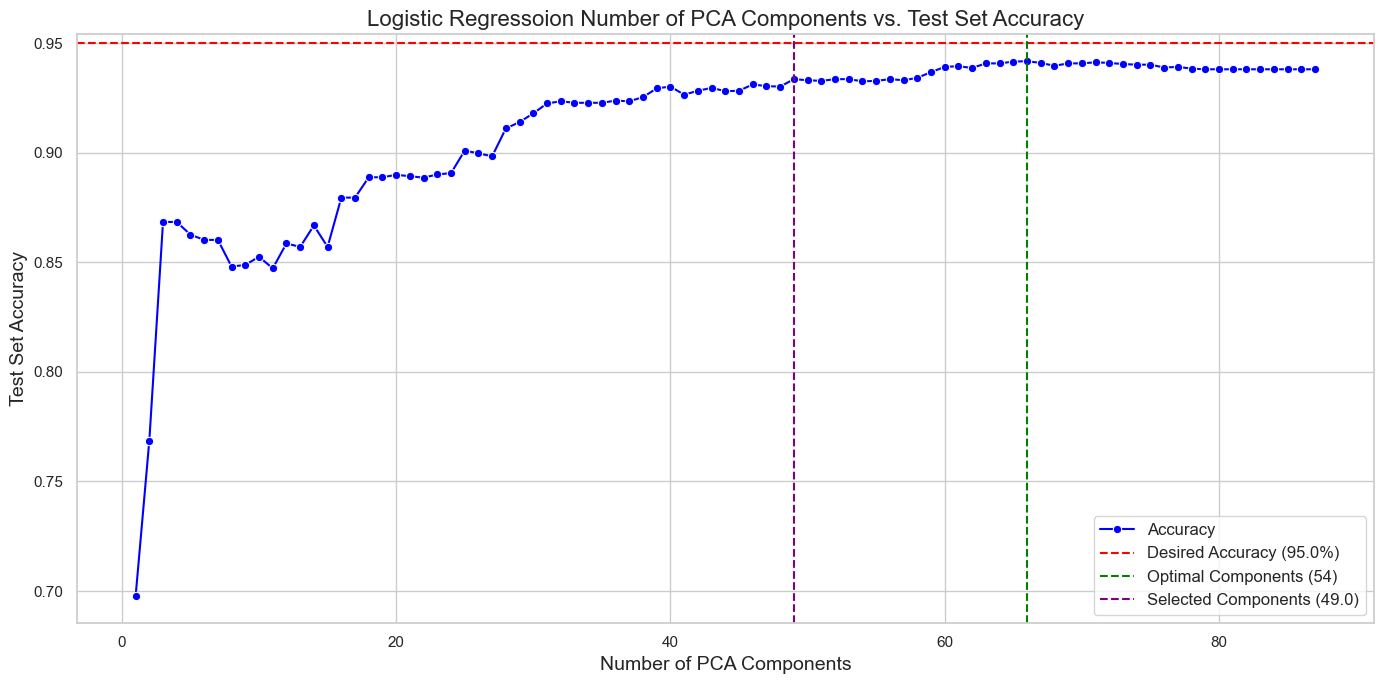

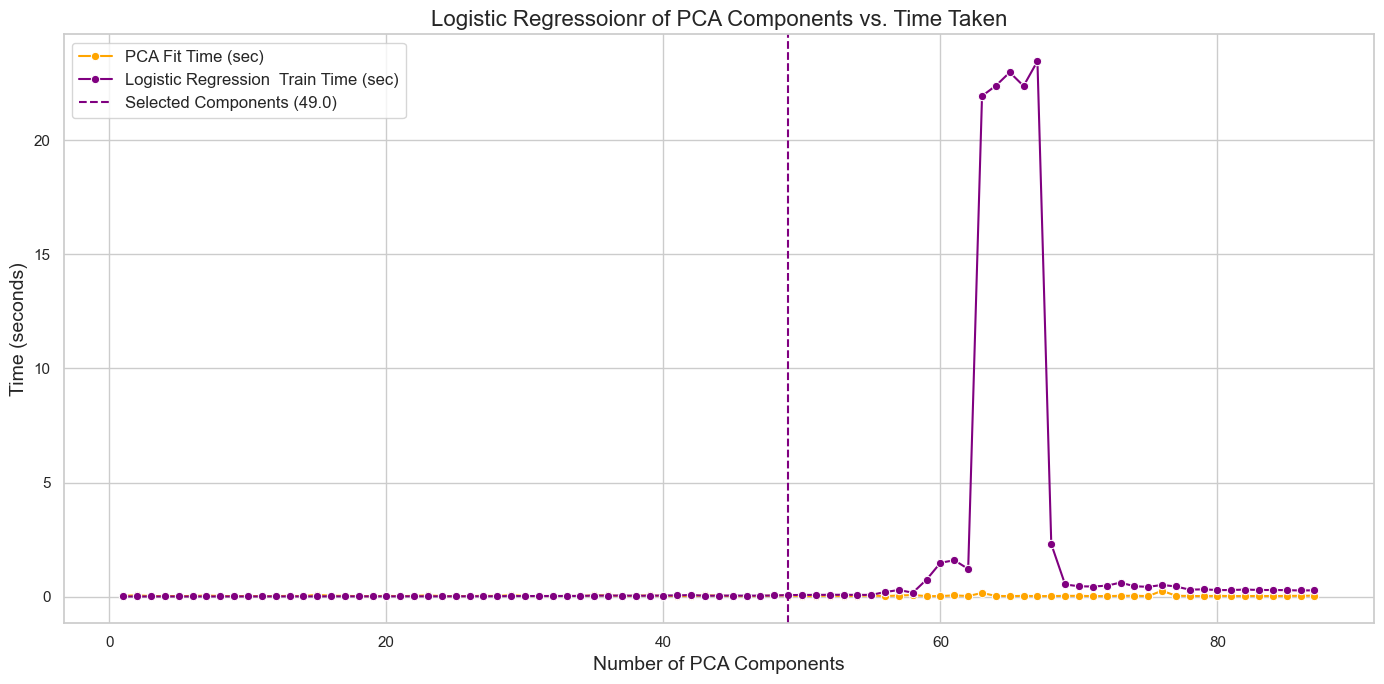


Selected Component Details:
   Selected_n_components  Selected_accuracy  Selected_pca_time_sec  \
0                   49.0             0.9337                  0.045   

   Selected_rf_time_sec  
0                0.0653  


In [96]:
sns.set(style="whitegrid")

# ---------------------------
# 5.1. Number of PCA Components vs. Test Set Accuracy
# ---------------------------

plt.figure(figsize=(14, 7))
sns.lineplot(x='n_components', y='accuracy', data=df, marker='o', color='blue', label='Accuracy')
plt.title('Logistic Regressoion Number of PCA Components vs. Test Set Accuracy', fontsize=16)
plt.xlabel('Number of PCA Components', fontsize=14)
plt.ylabel('Test Set Accuracy', fontsize=14)

# Desired Accuracy Line
plt.axhline(y=desired_accuracy, color='red', linestyle='--', label=f'Desired Accuracy ({desired_accuracy*100}%)')

# Optimal Components Line
plt.axvline(x=66, color='green', linestyle='--', label='Optimal Components (54)')

# Selected Components Line
if not candidate_df.empty:
    plt.axvline(x=selected_n_components, color='purple', linestyle='--', label=f'Selected Components ({selected_n_components})')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# ---------------------------
# 5.2. Number of PCA Components vs. Time Taken
# ---------------------------

plt.figure(figsize=(14, 7))
sns.lineplot(x='n_components', y='pca_time_sec', data=df, marker='o', label='PCA Fit Time (sec)', color='orange')
sns.lineplot(x='n_components', y='lr_time_sec', data=df, marker='o', label='Logistic Regression  Train Time (sec)', color='purple')

plt.title('Logistic Regressoionr of PCA Components vs. Time Taken', fontsize=16)
plt.xlabel('Number of PCA Components', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)

# Highlight Selected Components
if not candidate_df.empty:
    plt.axvline(x=selected_n_components, color='purple', linestyle='--', label=f'Selected Components ({selected_n_components})')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# ---------------------------
# 6. Display Selected Component Details
# ---------------------------

if not candidate_df.empty:
    selected_data = {
        'Selected_n_components': selected_n_components,
        'Selected_accuracy': selected_accuracy,
        'Selected_pca_time_sec': selected_pca_time,
        'Selected_rf_time_sec': selected_rf_time
    }
    selected_df = pd.DataFrame([selected_data])
    print("\nSelected Component Details:")
    print(selected_df)
else:
    print("\nNo suitable number of PCA components found within the desired accuracy threshold.")

In [100]:
comparison_data = {
    'Model': [
        'PCA (49 Components)',
        'RFE (17 Features)',
        'All Features (Logistic Regression)'
    ],
    'Test Set Accuracy': [
        0.9337,  
        0.93  ,  # RFE with 17 Features
        0.871   # All Features
    ],
    'Training Time (seconds)': [
        0.111,  
        2.4674,   # RFE with 17 Features
        0.0276    # All Features
    ]
}

# Create the DataFrame
df_comparison = pd.DataFrame(comparison_data)

print(df_comparison)

                                Model  Test Set Accuracy  \
0                 PCA (49 Components)             0.9337   
1                   RFE (17 Features)             0.9300   
2  All Features (Logistic Regression)             0.8710   

   Training Time (seconds)  
0                   0.1110  
1                   2.4674  
2                   0.0276  


C:\Users\praga\AppData\Local\Temp\ipykernel_24788\3004381610.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Test Set Accuracy', data=df_comparison, palette='Blues_d')


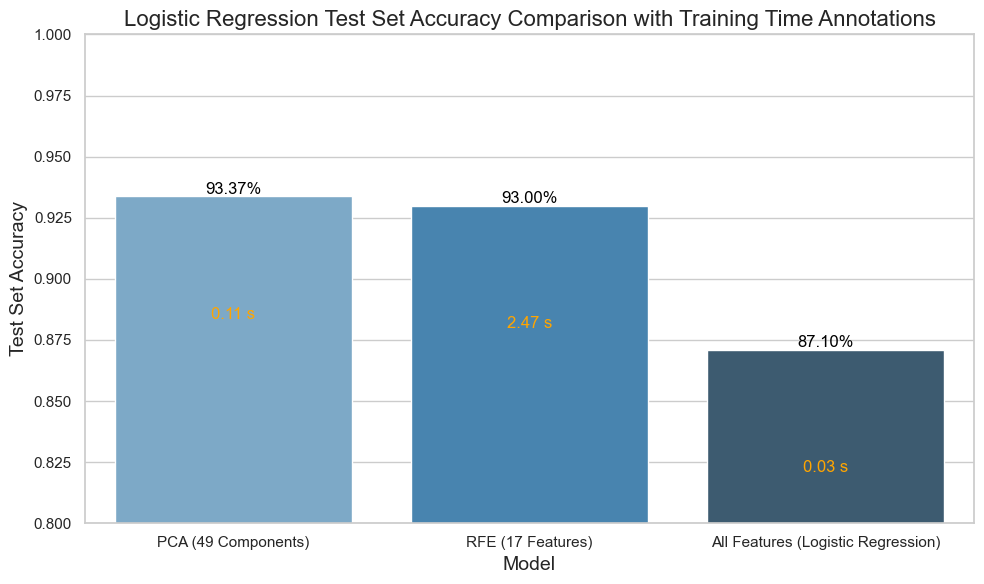

C:\Users\praga\AppData\Local\Temp\ipykernel_24788\3004381610.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Training Time (seconds)', data=df_comparison, palette='Oranges_d')


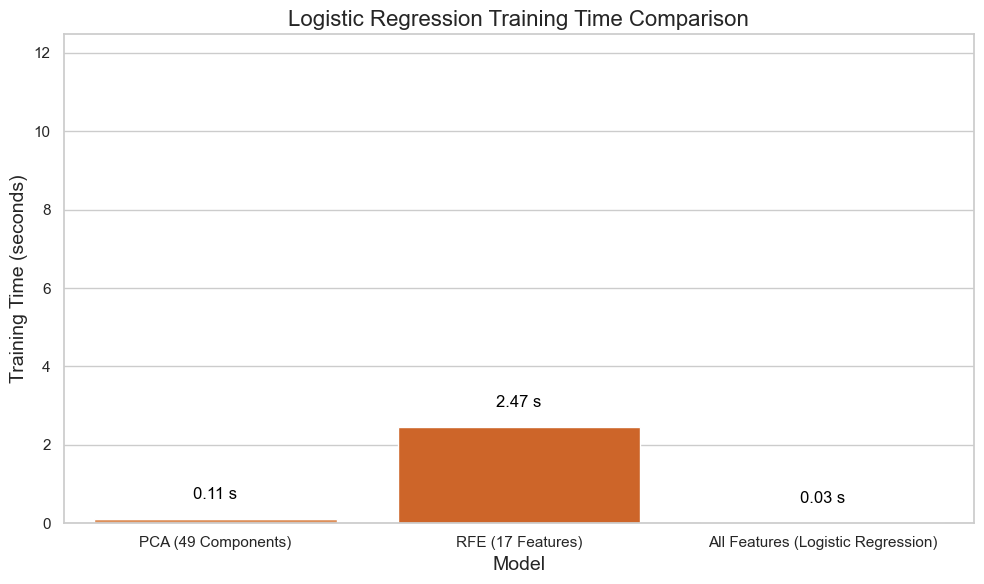

In [101]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Set Accuracy', data=df_comparison, palette='Blues_d')

# Add data labels and training time annotations
for index, row in df_comparison.iterrows():
    plt.text(index, row['Test Set Accuracy'] + 0.001, f"{row['Test Set Accuracy']*100:.2f}%", 
             color='black', ha="center", fontsize=12)
    plt.text(index, row['Test Set Accuracy'] - 0.05, f"{row['Training Time (seconds)']:.2f} s", 
             color='orange', ha="center", fontsize=12)

plt.title('Logistic Regression Test Set Accuracy Comparison with Training Time Annotations', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Test Set Accuracy', fontsize=14)
plt.ylim(0.80, 1.0)  # Setting y-axis limits for better visualization
plt.tight_layout()
plt.show()



# ---------------------------
# Chart 2: Training Time
# ---------------------------

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Training Time (seconds)', data=df_comparison, palette='Oranges_d')

# Add data labels on top of each bar
for index, row in df_comparison.iterrows():
    plt.text(index, row['Training Time (seconds)'] + 0.5, f"{row['Training Time (seconds)']:.2f} s", 
             color='black', ha="center", fontsize=12)

plt.title('Logistic Regression Training Time Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Training Time (seconds)', fontsize=14)
plt.ylim(0, df_comparison['Training Time (seconds)'].max() + 10)  # Adjust y-axis limit
plt.tight_layout()
plt.show()

Scaling the data...
Data scaling completed in 0.0141 seconds

Starting hyperparameter tuning for KNN...
Fitting 5 folds for each of 180 candidates, totalling 900 fits

Hyperparameter tuning completed in 12.32 seconds

Best Hyperparameters for KNN:
  metric: manhattan
  n_neighbors: 8
  weights: distance

Best Cross-Validation Accuracy for KNN: 0.9464


Training Time for Best KNN Parameters: 0.0021 seconds
Test Set Accuracy for KNN: 0.9470

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1886
           1       0.95      0.94      0.95      1886

    accuracy                           0.95      3772
   macro avg       0.95      0.95      0.95      3772
weighted avg       0.95      0.95      0.95      3772

Confusion Matrix for KNN:
[[1791   95]
 [ 105 1781]]


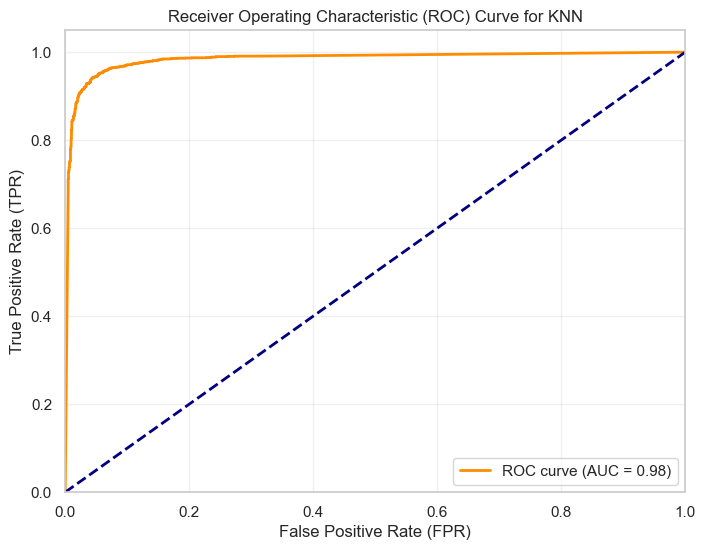

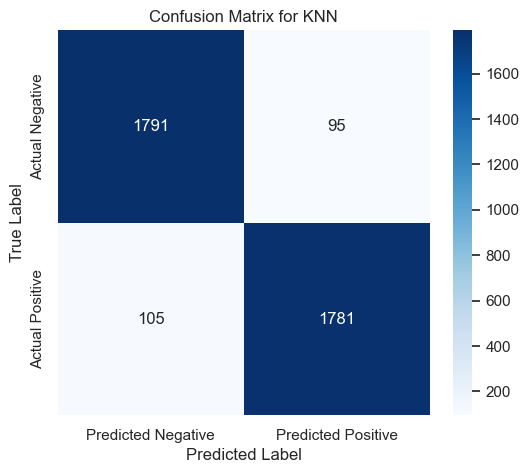


Time taken to train KNN with selected features: 0.0050 seconds
Test Set Accuracy with selected features: 0.9502


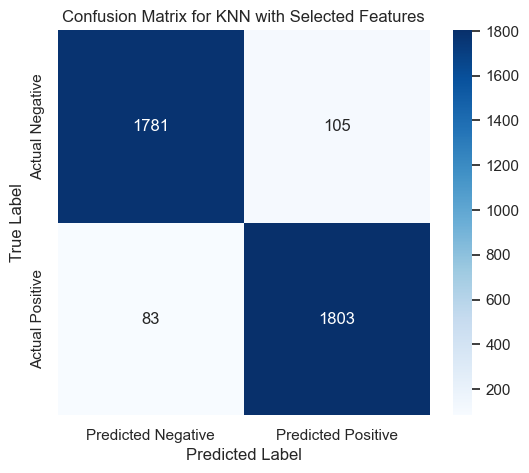


Classification Report for KNN with Selected Features:
              precision    recall  f1-score   support

  Legitimate       0.96      0.94      0.95      1886
    Phishing       0.94      0.96      0.95      1886

    accuracy                           0.95      3772
   macro avg       0.95      0.95      0.95      3772
weighted avg       0.95      0.95      0.95      3772



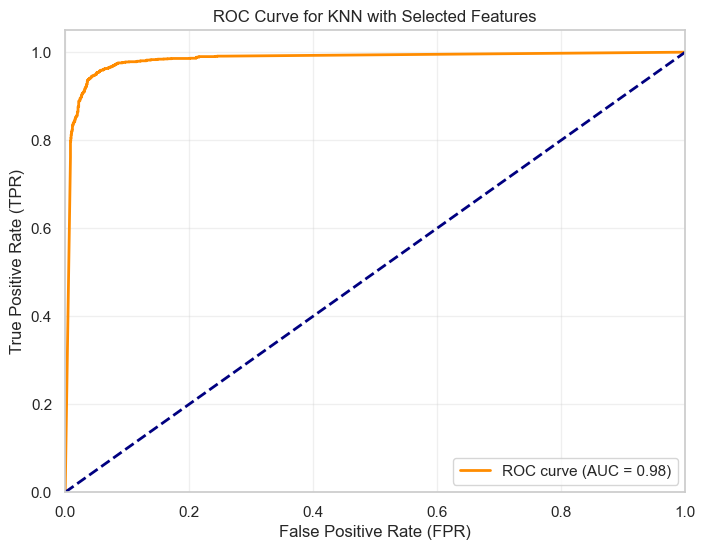


Trained KNN model saved as 'knn_model.pkl'

Evaluating PCA with 1 component(s)...
Time taken to fit PCA: 0.0608 seconds
Time taken to train KNN: 0.0017 seconds
Test Set Accuracy: 0.6739

Evaluating PCA with 2 component(s)...
Time taken to fit PCA: 0.0249 seconds
Time taken to train KNN: 0.0014 seconds
Test Set Accuracy: 0.7776

Evaluating PCA with 3 component(s)...
Time taken to fit PCA: 0.0376 seconds
Time taken to train KNN: 0.0020 seconds
Test Set Accuracy: 0.8648

Evaluating PCA with 4 component(s)...
Time taken to fit PCA: 0.0291 seconds
Time taken to train KNN: 0.0030 seconds
Test Set Accuracy: 0.8897

Evaluating PCA with 5 component(s)...
Time taken to fit PCA: 0.0902 seconds
Time taken to train KNN: 0.0033 seconds
Test Set Accuracy: 0.8897

Evaluating PCA with 6 component(s)...
Time taken to fit PCA: 0.0230 seconds
Time taken to train KNN: 0.0035 seconds
Test Set Accuracy: 0.8934

Evaluating PCA with 7 component(s)...
Time taken to fit PCA: 0.0312 seconds
Time taken to train K

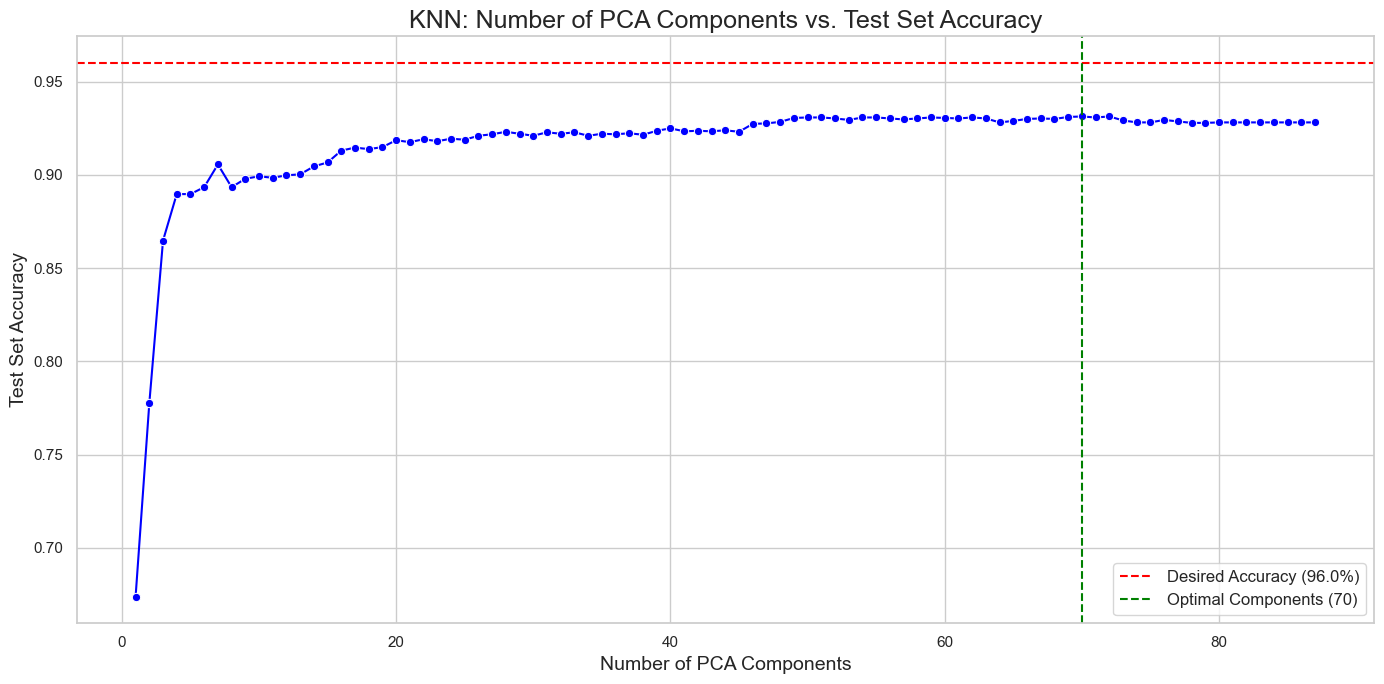

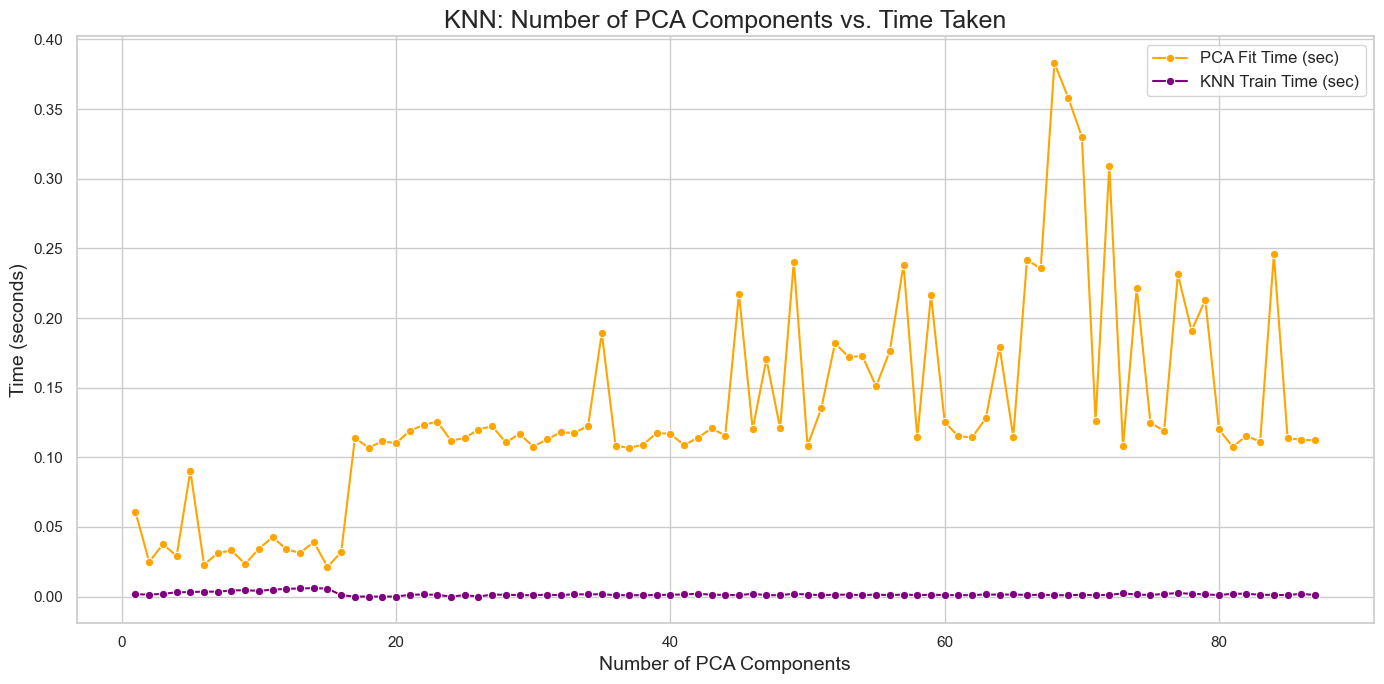


Time taken to fit PCA with 70 components: 0.05 seconds
Shape of training data after PCA: (5894, 70)
Shape of testing data after PCA: (3772, 70)

Time taken to train the KNN model on PCA components: 0.00 seconds

Test Set Accuracy: 0.9313


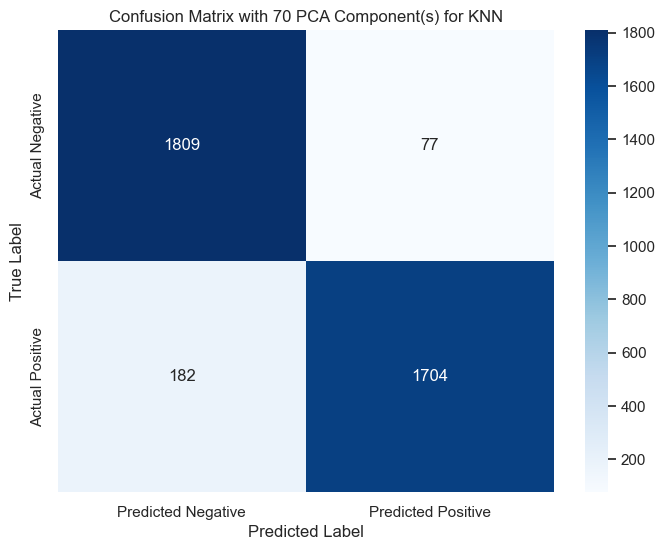


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93      1886
     Class 1       0.96      0.90      0.93      1886

    accuracy                           0.93      3772
   macro avg       0.93      0.93      0.93      3772
weighted avg       0.93      0.93      0.93      3772



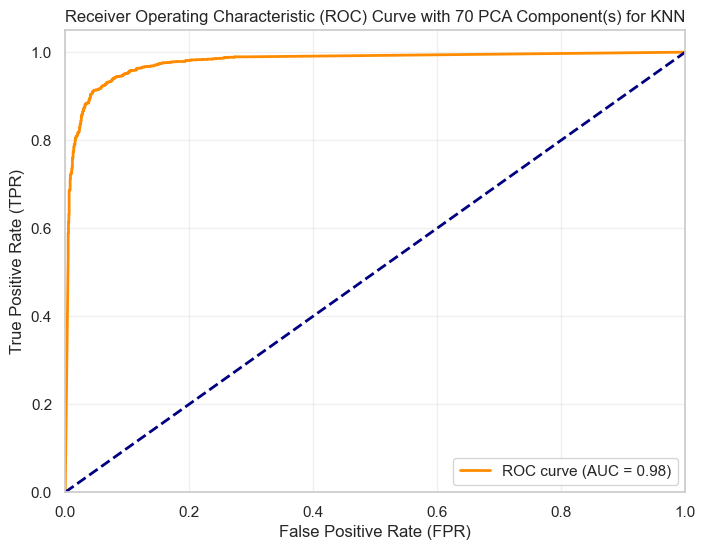


Final trained KNN model with PCA saved as 'knn_final_model_pca.pkl'


In [122]:

from sklearn.neighbors import KNeighborsClassifier



scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
print("Scaling the data...")
start_time_scaler = time.time()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)
end_time_scaler = time.time()
scaler_time = end_time_scaler - start_time_scaler
print(f"Data scaling completed in {scaler_time:.4f} seconds\n")

# ---------------------------
# 4. Define the Hyperparameter Grid for KNN
# ---------------------------

# Define the hyperparameters and their possible values to tune
param_grid_knn = {
    'n_neighbors': list(range(1, 31)),           # Number of neighbors
    'weights': ['uniform', 'distance'],          # Weight function
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# ---------------------------
# 5. Perform Hyperparameter Tuning with GridSearchCV
# ---------------------------

# Initialize KNN Classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    cv=5,                      # 5-fold cross-validation
    scoring='accuracy',        # Evaluation metric
    n_jobs=-1,                 # Utilize all available cores
    verbose=1                  # Verbosity level
)

# Fit GridSearchCV to find the best hyperparameters
print("Starting hyperparameter tuning for KNN...")
start_time = time.time()
grid_search_knn.fit(X_train_scaled, y)
end_time = time.time()

print(f"\nHyperparameter tuning completed in {end_time - start_time:.2f} seconds\n")

# ---------------------------
# 6. Retrieve and Display the Best Parameters and Score
# ---------------------------

best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print("Best Hyperparameters for KNN:")
for param_name in sorted(best_params_knn.keys()):
    print(f"  {param_name}: {best_params_knn[param_name]}")

print(f"\nBest Cross-Validation Accuracy for KNN: {best_score_knn:.4f}\n")

# ---------------------------
# 7. Evaluate the Best KNN Model on Test Data
# ---------------------------

# Use the best estimator to make predictions on the test set
best_knn_model = grid_search_knn.best_estimator_

# Measure training time (if re-training is needed)
start_time_best_knn = time.time()
best_knn_model.fit(X_train_scaled, y)
end_time_best_knn = time.time()
training_time_best_knn = end_time_best_knn - start_time_best_knn

print(f"\nTraining Time for Best KNN Parameters: {training_time_best_knn:.4f} seconds")
y_pred_knn = best_knn_model.predict(X_test_scaled)
y_pred_proba_knn = best_knn_model.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for the positive class

# Calculate test accuracy
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Test Set Accuracy for KNN: {test_accuracy_knn:.4f}\n")

# Display classification report
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))

# Display confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for KNN:")
print(cm_knn)

# ---------------------------
# 8. Plot the ROC Curve and Calculate AUC
# ---------------------------

# Compute ROC curve and ROC area
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# ---------------------------
# 9. Optional: Plot the Confusion Matrix Heatmap
# ---------------------------

plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ---------------------------
# 10. Feature Selection and PCA (Optional)
# ---------------------------

selected_features_knn = ['length_url', 'length_hostname', 'nb_www', 'ratio_digits_url','length_words_raw', 'longest_word_path', 'avg_word_path',
'phish_hints', 'nb_hyperlinks', 'ratio_intHyperlinks',
'ratio_extHyperlinks', 'safe_anchor', 'domain_registration_length',
'domain_age', 'web_traffic', 'google_index', 'page_rank'
]

# Assuming X_train and X_test are Pandas DataFrames
# For synthetic data, we'll assume all features are used
# If you have specific feature names, adjust accordingly

# Check if X_train is a DataFrame
if isinstance(X, pd.DataFrame):
    X_train_selected_knn = X[selected_features_knn]
    X_test_selected_knn = X_test[selected_features_knn]
else:
    # If not, assume all features are used or adjust as per your feature indices
    X_train_selected_knn = X_train_scaled  # Using all scaled features
    X_test_selected_knn = X_test_scaled    # Using all scaled features

# ---------------------------
# 11. Create Pipeline with Scaling and KNN
# ---------------------------

pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(**best_params_knn))
])

# Measure training time
start_time_knn_pipeline = time.time()
pipeline_knn.fit(X_train_selected_knn, y)
end_time_knn_pipeline = time.time()
training_time_knn_pipeline = end_time_knn_pipeline - start_time_knn_pipeline

print(f"\nTime taken to train KNN with selected features: {training_time_knn_pipeline:.4f} seconds")

# Predictions
y_pred_knn_pipeline = pipeline_knn.predict(X_test_selected_knn)
y_pred_proba_knn_pipeline = pipeline_knn.predict_proba(X_test_selected_knn)[:, 1]

# Calculate accuracy
test_accuracy_knn_pipeline = accuracy_score(y_test, y_pred_knn_pipeline)
print(f"Test Set Accuracy with selected features: {test_accuracy_knn_pipeline:.4f}")

# Confusion Matrix
cm_knn_pipeline = confusion_matrix(y_test, y_pred_knn_pipeline)
class_labels_knn = ['Legitimate', 'Phishing']  # Replace with your actual class names

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn_pipeline, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for KNN with Selected Features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("\nClassification Report for KNN with Selected Features:")
print(classification_report(y_test, y_pred_knn_pipeline, target_names=class_labels_knn))

# ROC Curve and AUC
fpr_knn_p, tpr_knn_p, thresholds_knn_p = roc_curve(y_test, y_pred_proba_knn_pipeline)
roc_auc_knn_p = auc(fpr_knn_p, tpr_knn_p)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn_p, tpr_knn_p, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_knn_p:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for KNN with Selected Features')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# ---------------------------
# 12. Saving the Trained KNN Model
# ---------------------------

model_filename_knn = 'knn_model.pkl'
joblib.dump(best_knn_model, model_filename_knn)
print(f"\nTrained KNN model saved as '{model_filename_knn}'")

# ---------------------------
# 13. Incorporating PCA for Dimensionality Reduction (Optional)
# ---------------------------

def find_optimal_pca_components_knn(X_train, y_train, X_test, y_test, desired_accuracy=0.95):
    component_accuracies = {}
    component_times_pca = {}
    component_times_knn = {}
    n_features = X_train.shape[1]
    optimal_n_components = None
    best_accuracy = 0
    best_n_components = 0

    # Initialize the KNN Classifier with best hyperparameters
    best_knn = KNeighborsClassifier(**best_params_knn)

    for n in range(1, n_features + 1):
        print(f"\nEvaluating PCA with {n} component(s)...")
        
        # Initialize PCA with n components
        pca = PCA(n_components=n, svd_solver='full')
        
        # Measure the time taken to fit PCA
        start_time_pca = time.time()
        pca.fit(X_train)
        end_time_pca = time.time()
        pca_fit_time = end_time_pca - start_time_pca
        component_times_pca[n] = pca_fit_time
        print(f"Time taken to fit PCA: {pca_fit_time:.4f} seconds")
        
        # Transform the data
        X_train_pca = pca.transform(X_train)
        X_test_pca = pca.transform(X_test)
        
        # Measure the time taken to train the classifier
        start_time_knn = time.time()
        best_knn.fit(X_train_pca, y_train)
        end_time_knn = time.time()
        knn_training_time = end_time_knn - start_time_knn
        component_times_knn[n] = knn_training_time
        print(f"Time taken to train KNN: {knn_training_time:.4f} seconds")
        
        # Generate predictions
        y_pred_pca = best_knn.predict(X_test_pca)
        
        # Calculate accuracy
        accuracy_pca = accuracy_score(y_test, y_pred_pca)
        component_accuracies[n] = accuracy_pca
        print(f"Test Set Accuracy: {accuracy_pca:.4f}")
        
        # Update best accuracy and components if current accuracy is higher
        if accuracy_pca > best_accuracy:
            best_accuracy = accuracy_pca
            best_n_components = n
        
        # Check if desired accuracy is achieved
        if accuracy_pca >= desired_accuracy:
            optimal_n_components = n
            print(f"\nDesired accuracy of {desired_accuracy*100}% achieved with {n} component(s).")
            break

    # If desired accuracy not achieved, select the number of components with the highest accuracy
    if optimal_n_components is None:
        optimal_n_components = best_n_components
        optimal_accuracy = best_accuracy
        print(f"\nDesired accuracy of {desired_accuracy*100}% not achieved.")
        print(f"Using {optimal_n_components} component(s) with Test Set Accuracy: {optimal_accuracy:.4f}")
    
    return optimal_n_components, component_accuracies, component_times_pca, component_times_knn

# Find the optimal number of PCA components
desired_accuracy_knn = 0.96
optimal_n_components_knn, component_accuracies_knn, component_times_pca_knn, component_times_knn_knn = find_optimal_pca_components_knn(
X_train_scaled, y, X_test_scaled, y_test, desired_accuracy_knn
)

print(f"\nOptimal number of PCA components for KNN: {optimal_n_components_knn}")

# ---------------------------
# 14. Visualizing PCA Component Analysis
# ---------------------------

# Create a DataFrame for visualization
df_knn_pca = pd.DataFrame({
    'n_components': list(component_accuracies_knn.keys()),
    'accuracy': list(component_accuracies_knn.values()),
    'pca_time_sec': list(component_times_pca_knn.values()),
    'knn_time_sec': list(component_times_knn_knn.values())
})

# Plot Number of PCA Components vs. Test Set Accuracy
plt.figure(figsize=(14, 7))
sns.lineplot(x='n_components', y='accuracy', data=df_knn_pca, marker='o', color='blue')
plt.title('KNN: Number of PCA Components vs. Test Set Accuracy', fontsize=18)
plt.xlabel('Number of PCA Components', fontsize=14)
plt.ylabel('Test Set Accuracy', fontsize=14)
plt.axhline(y=desired_accuracy_knn, color='red', linestyle='--', label=f'Desired Accuracy ({desired_accuracy_knn*100}%)')
plt.axvline(x=optimal_n_components_knn, color='green', linestyle='--', label=f'Optimal Components ({optimal_n_components_knn})')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Plot Number of PCA Components vs. Time Taken
plt.figure(figsize=(14, 7))
sns.lineplot(x='n_components', y='pca_time_sec', data=df_knn_pca, marker='o', label='PCA Fit Time (sec)', color='orange')
sns.lineplot(x='n_components', y='knn_time_sec', data=df_knn_pca, marker='o', label='KNN Train Time (sec)', color='purple')
plt.title('KNN: Number of PCA Components vs. Time Taken', fontsize=18)
plt.xlabel('Number of PCA Components', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# ---------------------------
# 15. Final Model Training with Optimal PCA Components
# ---------------------------

# Initialize PCA with the optimal number of components
pca_knn_optimal = PCA(n_components=optimal_n_components_knn, svd_solver='full')

# Fit PCA on the training data
start_time_pca_final_knn = time.time()
pca_knn_optimal.fit(X_train_scaled)
end_time_pca_final_knn = time.time()
pca_fit_time_final_knn = end_time_pca_final_knn - start_time_pca_final_knn
print(f"\nTime taken to fit PCA with {optimal_n_components_knn} components: {pca_fit_time_final_knn:.2f} seconds")

# Transform the training and testing data
X_train_pca_knn = pca_knn_optimal.transform(X_train_scaled)
X_test_pca_knn = pca_knn_optimal.transform(X_test_scaled)

print(f"Shape of training data after PCA: {X_train_pca_knn.shape}")
print(f"Shape of testing data after PCA: {X_test_pca_knn.shape}")

# Initialize the KNN Classifier with best hyperparameters
best_knn_final = KNeighborsClassifier(**best_params_knn)

# Measure the time taken to train the classifier
start_time_knn_final = time.time()
best_knn_final.fit(X_train_pca_knn, y)
end_time_knn_final = time.time()
knn_final_training_time = end_time_knn_final - start_time_knn_final
print(f"\nTime taken to train the KNN model on PCA components: {knn_final_training_time:.2f} seconds")

# Generate predictions
y_pred_final_knn = best_knn_final.predict(X_test_pca_knn)
y_pred_proba_final_knn = best_knn_final.predict_proba(X_test_pca_knn)[:, 1]  # Probability estimates for the positive class

# Calculate accuracy
test_accuracy_final_knn = accuracy_score(y_test, y_pred_final_knn)
print(f"\nTest Set Accuracy: {test_accuracy_final_knn:.4f}")

# Confusion Matrix
cm_final_knn = confusion_matrix(y_test, y_pred_final_knn)

plt.figure(figsize=(8,6))
sns.heatmap(cm_final_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title(f'Confusion Matrix with {optimal_n_components_knn} PCA Component(s) for KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
report_final_knn = classification_report(y_test, y_pred_final_knn, target_names=['Class 0', 'Class 1'])
print("\nClassification Report:\n", report_final_knn)

# ROC Curve and AUC
fpr_final_knn, tpr_final_knn, thresholds_final_knn = roc_curve(y_test, y_pred_proba_final_knn)
roc_auc_final_knn = auc(fpr_final_knn, tpr_final_knn)

plt.figure(figsize=(8,6))
plt.plot(fpr_final_knn, tpr_final_knn, color='darkorange',lw=2, label=f'ROC curve (AUC = {roc_auc_final_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'Receiver Operating Characteristic (ROC) Curve with {optimal_n_components_knn} PCA Component(s) for KNN')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# ---------------------------
# 16. Saving the Final KNN Model
# ---------------------------

model_filename_knn_final = 'knn_final_model_pca.pkl'
joblib.dump(best_knn_final, model_filename_knn_final)
print(f"\nFinal trained KNN model with PCA saved as '{model_filename_knn_final}'")

# ---------------------------
# 17. Comparing Different Models (Optional)
# ---------------------------



In [139]:
optimal_accuracy = df.loc[df['n_components'] == 70, 'accuracy'].values[0]
desired_accuracy = 0.95 # 95% as per your initial objective
accuracy_threshold = 0.02  

# Calculate the minimum acceptable accuracy
min_acceptable_accuracy = optimal_accuracy - accuracy_threshold

# Filter components that meet the accuracy threshold
candidate_df = df_knn_pca[df_knn_pca['accuracy'] >= min_acceptable_accuracy]

# Find the minimal number of components among candidates
if not candidate_df.empty:
    selected_row = candidate_df.loc[candidate_df['n_components'].idxmin()]
    selected_n_components = selected_row['n_components']
    selected_accuracy = selected_row['accuracy']
    selected_pca_time = selected_row['pca_time_sec']
    selected_rf_time = selected_row['knn_time_sec']
    print(f"\nSelected Number of PCA Components: {selected_n_components}")
    print(f"Test Set Accuracy: {selected_accuracy:.4f} (within {accuracy_threshold*100}%)")
    print(f"PCA Fit Time: {selected_pca_time} seconds")
    print(f"KNN Regression Train Time: {selected_rf_time:.4f} seconds")
else:
    print("\nNo number of PCA components meets the desired accuracy threshold.")


Selected Number of PCA Components: 26.0
Test Set Accuracy: 0.9210 (within 2.0%)
PCA Fit Time: 0.11995410919189453 seconds
KNN Regression Train Time: 0.0000 seconds


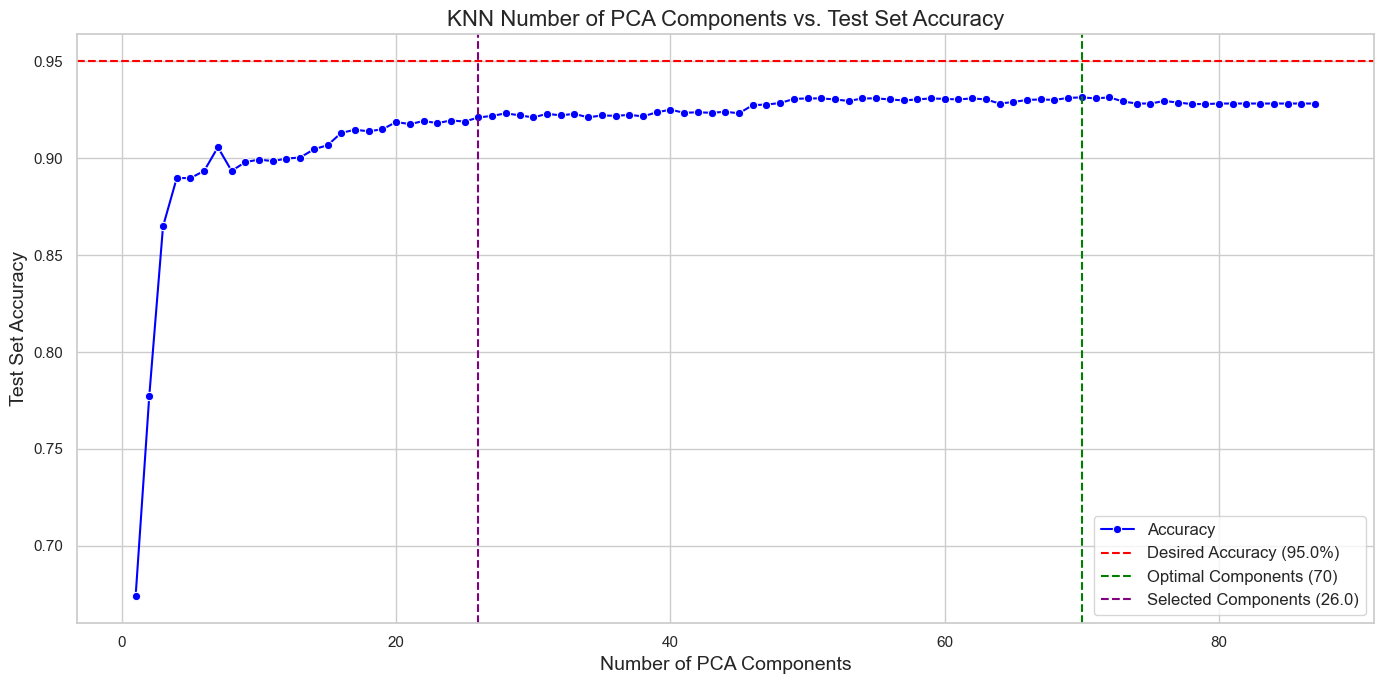

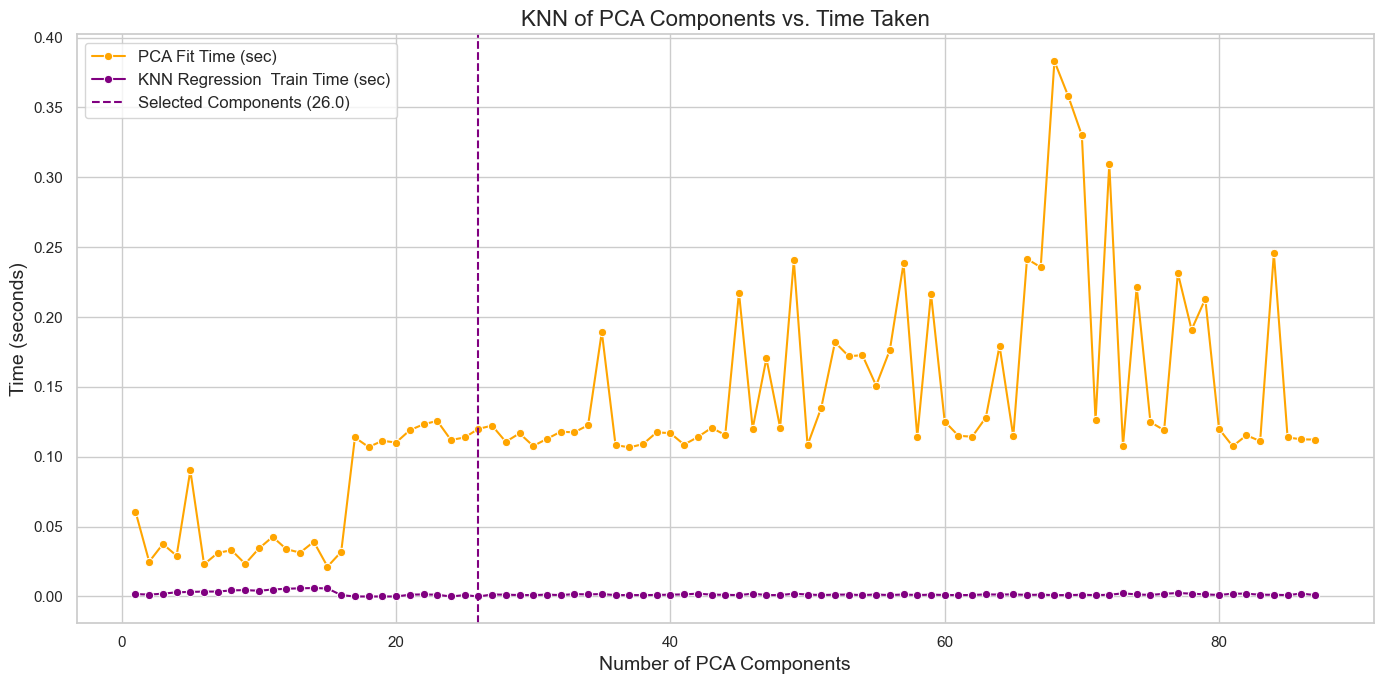


Selected Component Details:
   Selected_n_components  Selected_accuracy  Selected_pca_time_sec  \
0                   26.0           0.920997               0.119954   

   Selected_rf_time_sec  
0                   0.0  


In [140]:
sns.set(style="whitegrid")

# ---------------------------
# 5.1. Number of PCA Components vs. Test Set Accuracy
# ---------------------------

plt.figure(figsize=(14, 7))
sns.lineplot(x='n_components', y='accuracy', data=df_knn_pca, marker='o', color='blue', label='Accuracy')
plt.title('KNN Number of PCA Components vs. Test Set Accuracy', fontsize=16)
plt.xlabel('Number of PCA Components', fontsize=14)
plt.ylabel('Test Set Accuracy', fontsize=14)

# Desired Accuracy Line
plt.axhline(y=desired_accuracy, color='red', linestyle='--', label=f'Desired Accuracy ({desired_accuracy*100}%)')

# Optimal Components Line
plt.axvline(x=70, color='green', linestyle='--', label='Optimal Components (70)')

# Selected Components Line
if not candidate_df.empty:
    plt.axvline(x=selected_n_components, color='purple', linestyle='--', label=f'Selected Components ({selected_n_components})')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# ---------------------------
# 5.2. Number of PCA Components vs. Time Taken
# ---------------------------

plt.figure(figsize=(14, 7))
sns.lineplot(x='n_components', y='pca_time_sec', data=df_knn_pca, marker='o', label='PCA Fit Time (sec)', color='orange')
sns.lineplot(x='n_components', y='knn_time_sec', data=df_knn_pca, marker='o', label='KNN Regression  Train Time (sec)', color='purple')

plt.title('KNN of PCA Components vs. Time Taken', fontsize=16)
plt.xlabel('Number of PCA Components', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)

# Highlight Selected Components
if not candidate_df.empty:
    plt.axvline(x=selected_n_components, color='purple', linestyle='--', label=f'Selected Components ({selected_n_components})')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# ---------------------------
# 6. Display Selected Component Details
# ---------------------------

if not candidate_df.empty:
    selected_data = {
        'Selected_n_components': selected_n_components,
        'Selected_accuracy': selected_accuracy,
        'Selected_pca_time_sec': selected_pca_time,
        'Selected_rf_time_sec': selected_rf_time
    }
    selected_df = pd.DataFrame([selected_data])
    print("\nSelected Component Details:")
    print(selected_df)
else:
    print("\nNo suitable number of PCA components found within the desired accuracy threshold.")


Model Comparison:
                 Model  Test Set Accuracy  Training Time (seconds)
0  PCA (26 Components)           0.920997                 0.119954
1    RFE (17 Features)           0.952000                 0.005000
2   All Features (KNN)           0.950000                 0.002100


C:\Users\praga\AppData\Local\Temp\ipykernel_24788\2436961209.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Test Set Accuracy', data=df_comparison_knn, palette='Blues_d')


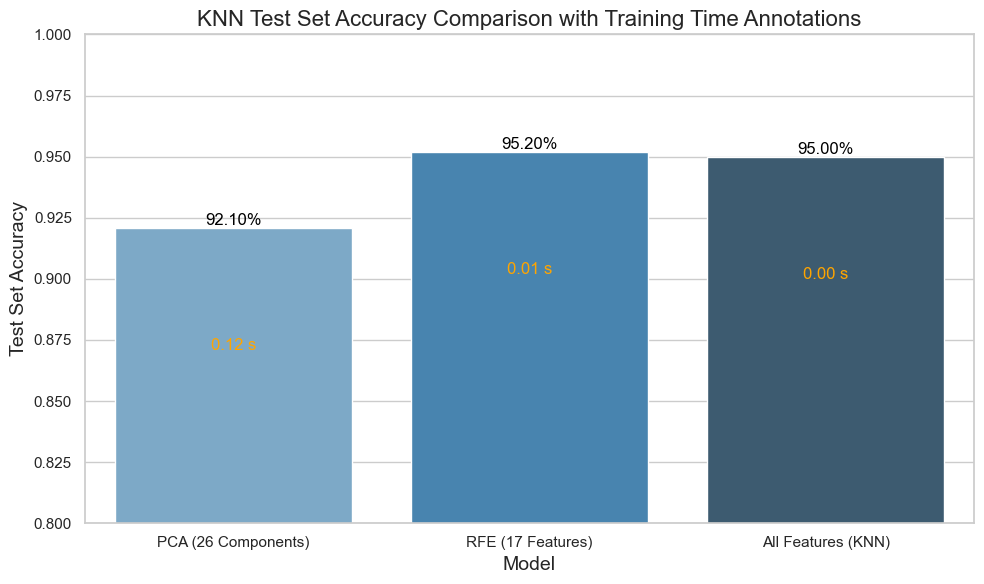

C:\Users\praga\AppData\Local\Temp\ipykernel_24788\2436961209.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Training Time (seconds)', data=df_comparison_knn, palette='Oranges_d')


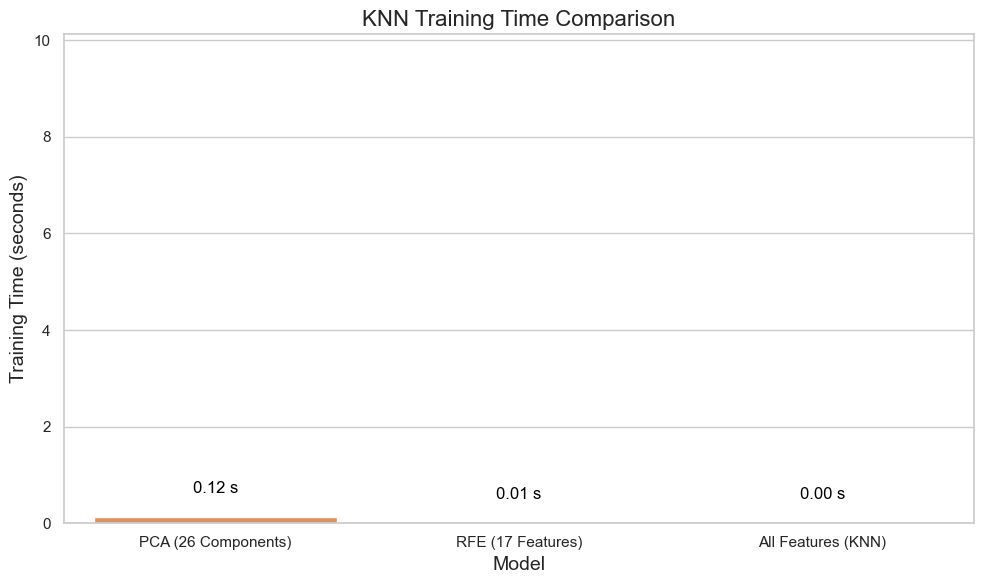

In [141]:
# Example comparison data
comparison_data_knn = {
'Model': [
        'PCA (26 Components)',
        'RFE (17 Features)',
        'All Features (KNN)'
],
'Test Set Accuracy': [
    0.920997 ,
    0.952,
    0.95,

],
'Training Time (seconds)': [
    0.119954 ,  
    0.0050 ,
    0.0021
]
}

# Create the DataFrame
df_comparison_knn = pd.DataFrame(comparison_data_knn)

print("\nModel Comparison:")
print(df_comparison_knn)

# Plot Test Set Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Set Accuracy', data=df_comparison_knn, palette='Blues_d')

# Add data labels and training time annotations
for index, row in df_comparison_knn.iterrows():
    plt.text(index, row['Test Set Accuracy'] + 0.001, f"{row['Test Set Accuracy']*100:.2f}%", 
             color='black', ha="center", fontsize=12)
    plt.text(index, row['Test Set Accuracy'] - 0.05, f"{row['Training Time (seconds)']:.2f} s", 
             color='orange', ha="center", fontsize=12)

plt.title('KNN Test Set Accuracy Comparison with Training Time Annotations', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Test Set Accuracy', fontsize=14)
plt.ylim(0.80, 1.0)  # Setting y-axis limits for better visualization
plt.tight_layout()
plt.show()

# Plot Training Time Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Training Time (seconds)', data=df_comparison_knn, palette='Oranges_d')

# Add data labels on top of each bar
for index, row in df_comparison_knn.iterrows():
    plt.text(index, row['Training Time (seconds)'] + 0.5, f"{row['Training Time (seconds)']:.2f} s", 
             color='black', ha="center", fontsize=12)

plt.title('KNN Training Time Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Training Time (seconds)', fontsize=14)
plt.ylim(0, df_comparison_knn['Training Time (seconds)'].max() + 10)  # Adjust y-axis limit
plt.tight_layout()
plt.show()


Scaling the data...
Data scaling completed in 0.0167 seconds

Starting hyperparameter tuning for GaussianNB...
Fitting 5 folds for each of 3 candidates, totalling 15 fits

Hyperparameter tuning completed in 0.73 seconds

Best Hyperparameters for GaussianNB:
  var_smoothing: 1e-07

Best Cross-Validation Accuracy for GaussianNB: 0.6829


Training Time for Best GaussianNB Parameters: 0.0082 seconds
Test Set Accuracy for GaussianNB: 0.7296

Classification Report for GaussianNB:
              precision    recall  f1-score   support

           0       0.66      0.97      0.78      1886
           1       0.94      0.49      0.65      1886

    accuracy                           0.73      3772
   macro avg       0.80      0.73      0.71      3772
weighted avg       0.80      0.73      0.71      3772

Confusion Matrix for GaussianNB:
[[1822   64]
 [ 956  930]]


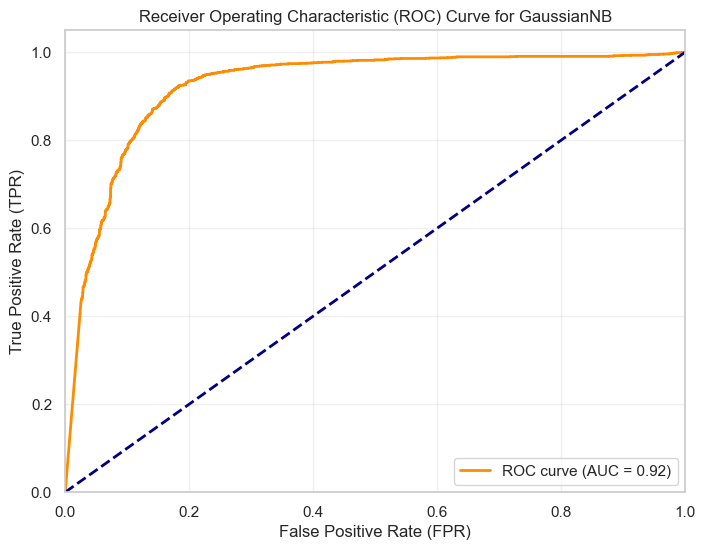

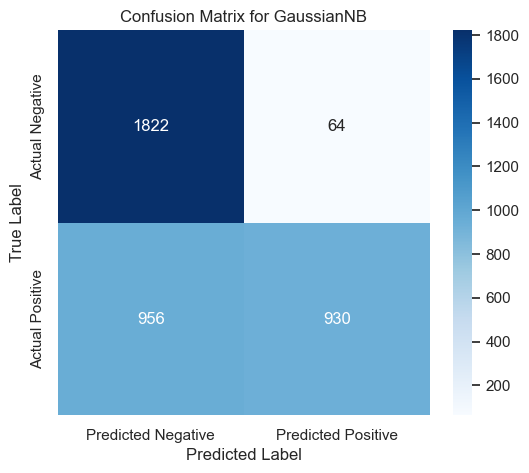


Time taken to train GaussianNB with selected features: 0.0135 seconds
Test Set Accuracy with selected features: 0.7296


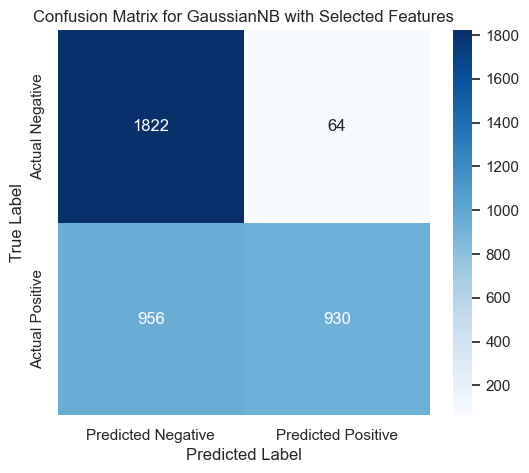


Classification Report for GaussianNB with Selected Features:
              precision    recall  f1-score   support

  Legitimate       0.66      0.97      0.78      1886
    Phishing       0.94      0.49      0.65      1886

    accuracy                           0.73      3772
   macro avg       0.80      0.73      0.71      3772
weighted avg       0.80      0.73      0.71      3772



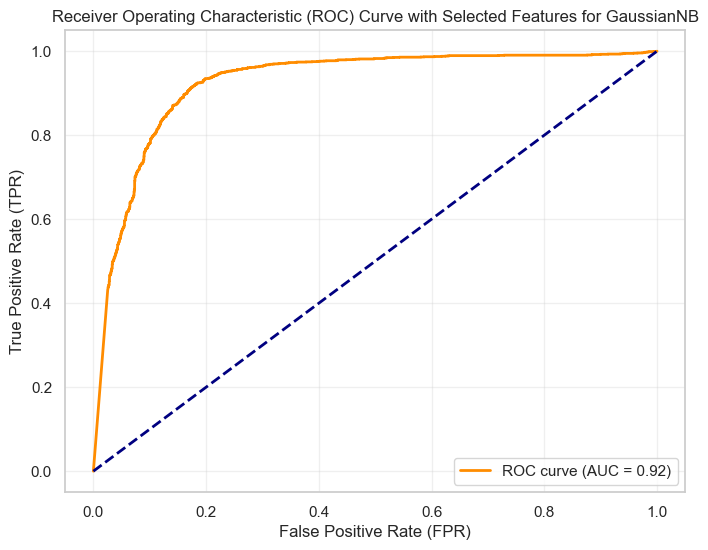


Trained GaussianNB model saved as 'naive_bayes_model.pkl'

Evaluating PCA with 1 component(s)...
Time taken to fit PCA: 0.0437 seconds
Time taken to train GaussianNB: 0.0000 seconds
Test Set Accuracy: 0.6946

Evaluating PCA with 2 component(s)...
Time taken to fit PCA: 0.0231 seconds
Time taken to train GaussianNB: 0.0023 seconds
Test Set Accuracy: 0.7450

Evaluating PCA with 3 component(s)...
Time taken to fit PCA: 0.0262 seconds
Time taken to train GaussianNB: 0.0020 seconds
Test Set Accuracy: 0.7749

Evaluating PCA with 4 component(s)...
Time taken to fit PCA: 0.0404 seconds
Time taken to train GaussianNB: 0.0012 seconds
Test Set Accuracy: 0.7895

Evaluating PCA with 5 component(s)...
Time taken to fit PCA: 0.0259 seconds
Time taken to train GaussianNB: 0.0010 seconds
Test Set Accuracy: 0.8022

Evaluating PCA with 6 component(s)...
Time taken to fit PCA: 0.0206 seconds
Time taken to train GaussianNB: 0.0010 seconds
Test Set Accuracy: 0.8001

Evaluating PCA with 7 component(s)...
Ti

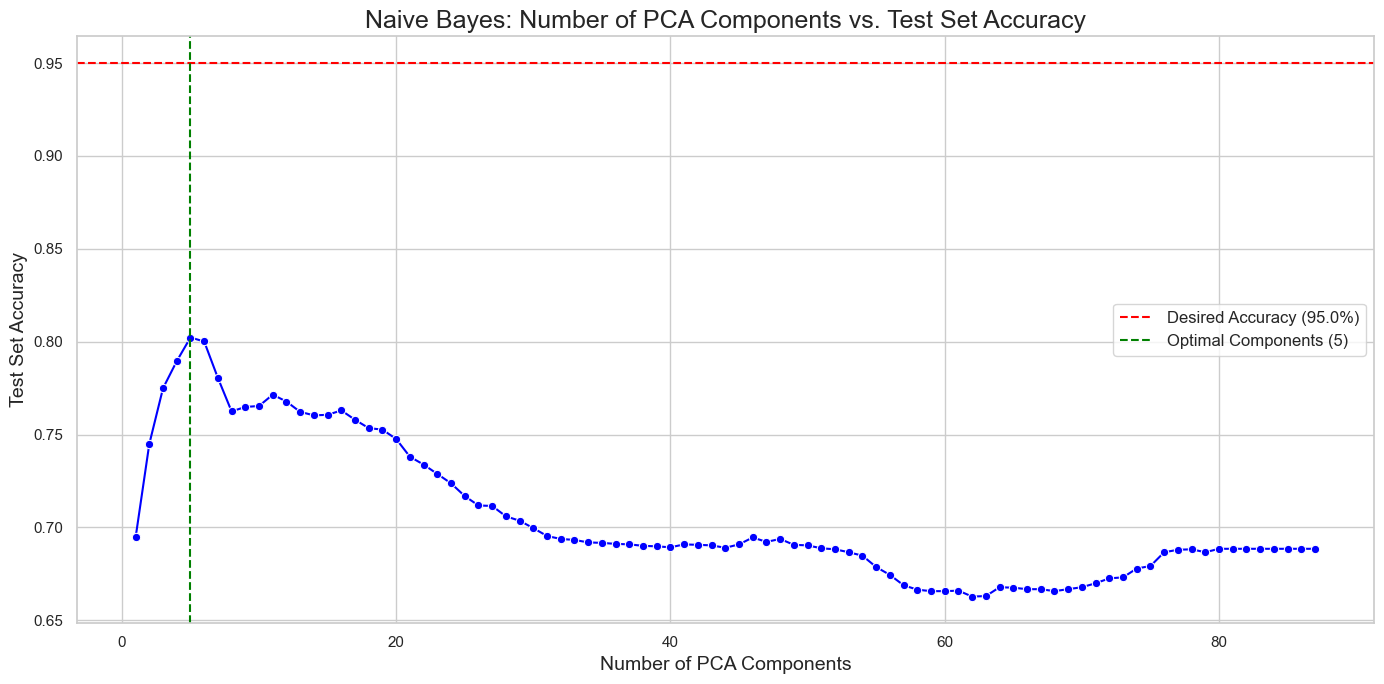

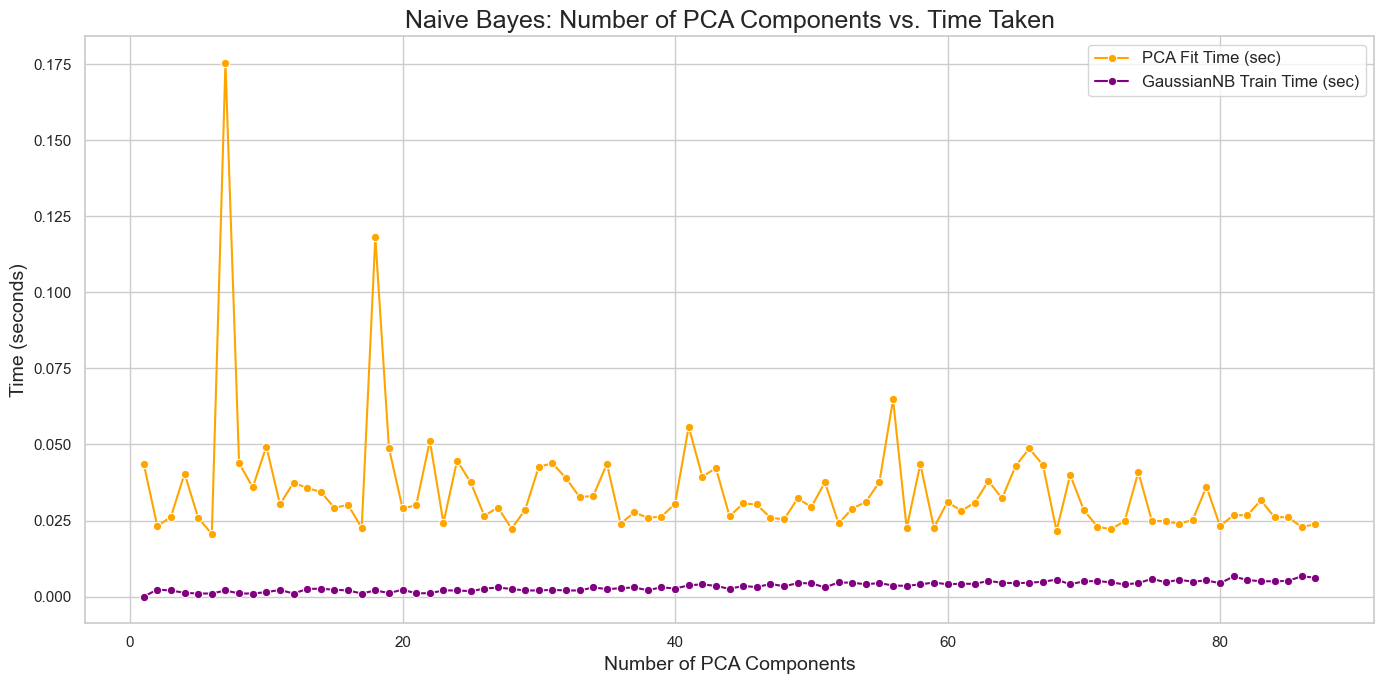


Time taken to fit PCA with 5 components: 0.04 seconds
Shape of training data after PCA: (5894, 5)
Shape of testing data after PCA: (3772, 5)

Time taken to train the GaussianNB model on PCA components: 0.00 seconds

Test Set Accuracy: 0.8022


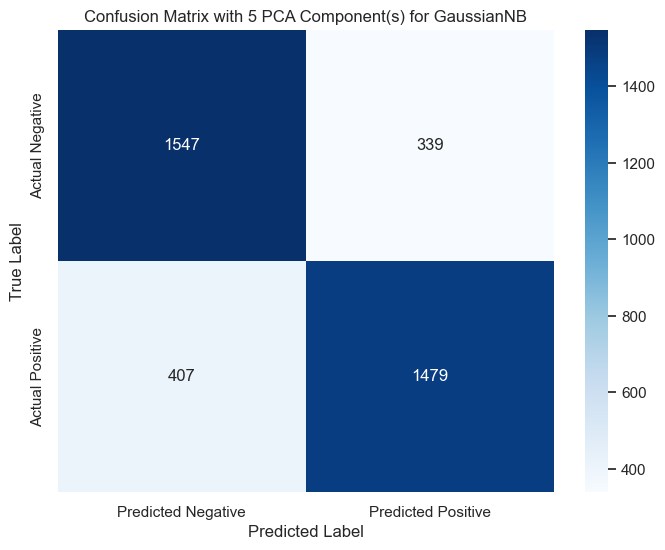


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.79      0.82      0.81      1886
     Class 1       0.81      0.78      0.80      1886

    accuracy                           0.80      3772
   macro avg       0.80      0.80      0.80      3772
weighted avg       0.80      0.80      0.80      3772



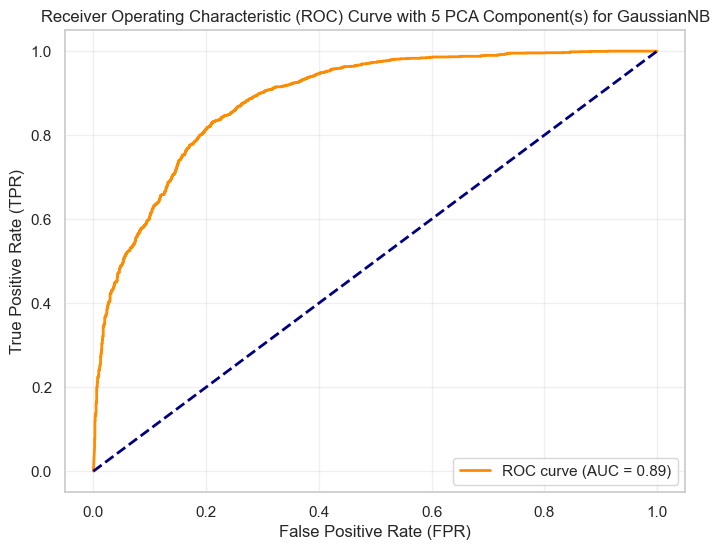


Final trained GaussianNB model with PCA saved as 'naive_bayes_final_model_pca.pkl'


In [ ]:

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB


# Fit the scaler on the training data and transform both training and testing data
print("Scaling the data...")
start_time_scaler = time.time()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)
end_time_scaler = time.time()
scaler_time = end_time_scaler - start_time_scaler
print(f"Data scaling completed in {scaler_time:.4f} seconds\n")

param_grid_gnb = {
    'var_smoothing': np.logspace(-9, -7, num=3)  # Additive value to variances
}

# Example Hyperparameter Grid for MultinomialNB
param_grid_mnb = {
    'alpha': [0.1, 0.5, 1.0],      # Additive (Laplace/Lidstone) smoothing parameter
    'fit_prior': [True, False]     # Whether to learn class prior probabilities
}


model_type = 'GaussianNB' 

if model_type == 'GaussianNB':
    nb = GaussianNB()
    param_grid_nb = param_grid_gnb



grid_search_nb = GridSearchCV(
    estimator=nb,
    param_grid=param_grid_nb,
    cv=5,                      # 5-fold cross-validation
    scoring='accuracy',        # Evaluation metric
    n_jobs=-1,                 # Utilize all available cores
    verbose=1                  # Verbosity level
)

# Fit GridSearchCV to find the best hyperparameters
print(f"Starting hyperparameter tuning for {model_type}...")
start_time = time.time()
grid_search_nb.fit(X_train_scaled, y)
end_time = time.time()

print(f"\nHyperparameter tuning completed in {end_time - start_time:.2f} seconds\n")

# ---------------------------
# 6. Retrieve and Display the Best Parameters and Score
# ---------------------------

best_params_nb = grid_search_nb.best_params_
best_score_nb = grid_search_nb.best_score_

print(f"Best Hyperparameters for {model_type}:")
for param_name in sorted(best_params_nb.keys()):
    print(f"  {param_name}: {best_params_nb[param_name]}")

print(f"\nBest Cross-Validation Accuracy for {model_type}: {best_score_nb:.4f}\n")

# ---------------------------
# 7. Evaluate the Best Naive Bayes Model on Test Data
# ---------------------------

# Use the best estimator to make predictions on the test set
best_nb_model = grid_search_nb.best_estimator_

# Measure training time (if re-training is needed)
start_time_best_nb = time.time()
best_nb_model.fit(X_train_scaled, y)
end_time_best_nb = time.time()
training_time_best_nb = end_time_best_nb - start_time_best_nb

print(f"\nTraining Time for Best {model_type} Parameters: {training_time_best_nb:.4f} seconds")
y_pred_nb = best_nb_model.predict(X_test_scaled)

# For models that support predict_proba
if hasattr(best_nb_model, "predict_proba"):
    y_pred_proba_nb = best_nb_model.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for the positive class
else:
    y_pred_proba_nb = None
    print(f"{model_type} does not support probability estimates.")

# Calculate test accuracy
test_accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Test Set Accuracy for {model_type}: {test_accuracy_nb:.4f}\n")

# Display classification report
print(f"Classification Report for {model_type}:")
print(classification_report(y_test, y_pred_nb))

# Display confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(f"Confusion Matrix for {model_type}:")
print(cm_nb)

# ---------------------------
# 8. Plot the ROC Curve and Calculate AUC
# ---------------------------

if y_pred_proba_nb is not None:
    # Compute ROC curve and ROC area
    fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_proba_nb)
    roc_auc_nb = auc(fpr_nb, tpr_nb)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nb:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {model_type}')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

# ---------------------------
# 9. Optional: Plot the Confusion Matrix Heatmap
# ---------------------------

plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title(f'Confusion Matrix for {model_type}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ---------------------------
# 10. Feature Selection and PCA (Optional)
# ---------------------------

# Define selected features (replace with your actual feature names if applicable)
selected_features_nb = [
    'length_url', 'length_hostname', 'nb_www', 'ratio_digits_url',
    'length_words_raw', 'longest_word_path', 'avg_word_path',
    'phish_hints', 'nb_hyperlinks', 'ratio_intHyperlinks',
    'ratio_extHyperlinks', 'safe_anchor', 'domain_registration_length',
    'domain_age', 'web_traffic', 'google_index', 'page_rank'
]

X_train_selected_nb = X_train_scaled
X_test_selected_nb = X_test_scaled

# ---------------------------
# 11. Create Pipeline with Scaling and Naive Bayes


pipeline_nb = Pipeline([
    ('scaler', StandardScaler()),
    ('nb', best_nb_model)
])

# Measure training time
start_time_nb_pipeline = time.time()
pipeline_nb.fit(X_train_selected_nb, y)
end_time_nb_pipeline = time.time()
training_time_nb_pipeline = end_time_nb_pipeline - start_time_nb_pipeline

print(f"\nTime taken to train {model_type} with selected features: {training_time_nb_pipeline:.4f} seconds")

# Predictions
y_pred_nb_pipeline = pipeline_nb.predict(X_test_selected_nb)

if hasattr(pipeline_nb.named_steps['nb'], "predict_proba"):
    y_pred_proba_nb_pipeline = pipeline_nb.predict_proba(X_test_selected_nb)[:, 1]
else:
    y_pred_proba_nb_pipeline = None
    print(f"{model_type} does not support probability estimates.")

# Calculate accuracy
test_accuracy_nb_pipeline = accuracy_score(y_test, y_pred_nb_pipeline)
print(f"Test Set Accuracy with selected features: {test_accuracy_nb_pipeline:.4f}")

# Confusion Matrix
cm_nb_pipeline = confusion_matrix(y_test, y_pred_nb_pipeline)
class_labels_nb = ['Legitimate', 'Phishing']  # Replace with your actual class names

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb_pipeline, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title(f'Confusion Matrix for {model_type} with Selected Features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print(f"\nClassification Report for {model_type} with Selected Features:")
print(classification_report(y_test, y_pred_nb_pipeline, target_names=class_labels_nb))

# ROC Curve and AUC
if y_pred_proba_nb_pipeline is not None:
    fpr_nb_p, tpr_nb_p, thresholds_nb_p = roc_curve(y_test, y_pred_proba_nb_pipeline)
    roc_auc_nb_p = auc(fpr_nb_p, tpr_nb_p)
    
    plt.figure(figsize=(8,6))
    plt.plot(fpr_nb_p, tpr_nb_p, color='darkorange',
             lw=2, label=f'ROC curve (AUC = {roc_auc_nb_p:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
    plt.title(f'Receiver Operating Characteristic (ROC) Curve with Selected Features for {model_type}')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

# ---------------------------
# 12. Saving the Trained Naive Bayes Model
# ---------------------------

model_filename_nb = 'naive_bayes_model.pkl'
joblib.dump(best_nb_model, model_filename_nb)
print(f"\nTrained {model_type} model saved as '{model_filename_nb}'")

# ---------------------------
# 13. Incorporating PCA for Dimensionality Reduction (Optional)
# ---------------------------

def find_optimal_pca_components_nb(X_train, y_train, X_test, y_test, desired_accuracy=0.95):
    component_accuracies = {}
    component_times_pca = {}
    component_times_nb = {}
    n_features = X_train.shape[1]
    optimal_n_components = None
    best_accuracy = 0
    best_n_components = 0

    # Initialize the Naive Bayes Classifier with best hyperparameters
    best_nb = grid_search_nb.best_estimator_

    for n in range(1, n_features + 1):
        print(f"\nEvaluating PCA with {n} component(s)...")
        
        # Initialize PCA with n components
        pca = PCA(n_components=n, svd_solver='full')
        
        # Measure the time taken to fit PCA
        start_time_pca = time.time()
        pca.fit(X_train)
        end_time_pca = time.time()
        pca_fit_time = end_time_pca - start_time_pca
        component_times_pca[n] = pca_fit_time
        print(f"Time taken to fit PCA: {pca_fit_time:.4f} seconds")
        
        # Transform the data
        X_train_pca = pca.transform(X_train)
        X_test_pca = pca.transform(X_test)
        
        # Measure the time taken to train the classifier
        start_time_nb = time.time()
        best_nb.fit(X_train_pca, y_train)
        end_time_nb = time.time()
        nb_training_time = end_time_nb - start_time_nb
        component_times_nb[n] = nb_training_time
        print(f"Time taken to train {model_type}: {nb_training_time:.4f} seconds")
        
        # Generate predictions
        y_pred_pca = best_nb.predict(X_test_pca)
        
        # Calculate accuracy
        accuracy_pca = accuracy_score(y_test, y_pred_pca)
        component_accuracies[n] = accuracy_pca
        print(f"Test Set Accuracy: {accuracy_pca:.4f}")
        
        
        if accuracy_pca > best_accuracy:
            best_accuracy = accuracy_pca
            best_n_components = n
        
       
        if accuracy_pca >= desired_accuracy:
            optimal_n_components = n
            print(f"\nDesired accuracy of {desired_accuracy*100}% achieved with {n} component(s).")
            break

 
    if optimal_n_components is None:
        optimal_n_components = best_n_components
        optimal_accuracy = best_accuracy
        print(f"\nDesired accuracy of {desired_accuracy*100}% not achieved.")
        print(f"Using {optimal_n_components} component(s) with Test Set Accuracy: {optimal_accuracy:.4f}")
    
    return optimal_n_components, component_accuracies, component_times_pca, component_times_nb

desired_accuracy_nb = 0.95 
optimal_n_components_nb, component_accuracies_nb, component_times_pca_nb, component_times_nb_nb = find_optimal_pca_components_nb(
    X_train_scaled, y, X_test_scaled, y_test, desired_accuracy_nb
)

print(f"\nOptimal number of PCA components for {model_type}: {optimal_n_components_nb}")


df_nb_pca = pd.DataFrame({
    'n_components': list(component_accuracies_nb.keys()),
    'accuracy': list(component_accuracies_nb.values()),
    'pca_time_sec': list(component_times_pca_nb.values()),
    'nb_time_sec': list(component_times_nb_nb.values())
})

# Plot Number of PCA Components vs. Test Set Accuracy
plt.figure(figsize=(14, 7))
sns.lineplot(x='n_components', y='accuracy', data=df_nb_pca, marker='o', color='blue')
plt.title('Naive Bayes: Number of PCA Components vs. Test Set Accuracy', fontsize=18)
plt.xlabel('Number of PCA Components', fontsize=14)
plt.ylabel('Test Set Accuracy', fontsize=14)
plt.axhline(y=desired_accuracy_nb, color='red', linestyle='--', label=f'Desired Accuracy ({desired_accuracy_nb*100}%)')
plt.axvline(x=optimal_n_components_nb, color='green', linestyle='--', label=f'Optimal Components ({optimal_n_components_nb})')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Plot Number of PCA Components vs. Time Taken
plt.figure(figsize=(14, 7))
sns.lineplot(x='n_components', y='pca_time_sec', data=df_nb_pca, marker='o', label='PCA Fit Time (sec)', color='orange')
sns.lineplot(x='n_components', y='nb_time_sec', data=df_nb_pca, marker='o', label=f'{model_type} Train Time (sec)', color='purple')
plt.title('Naive Bayes: Number of PCA Components vs. Time Taken', fontsize=18)
plt.xlabel('Number of PCA Components', fontsize=14)
plt.ylabel('Time (seconds)', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


pca_nb_optimal = PCA(n_components=optimal_n_components_nb, svd_solver='full')

# Fit PCA on the training data
start_time_pca_final_nb = time.time()
pca_nb_optimal.fit(X_train_scaled)
end_time_pca_final_nb = time.time()
pca_fit_time_final_nb = end_time_pca_final_nb - start_time_pca_final_nb
print(f"\nTime taken to fit PCA with {optimal_n_components_nb} components: {pca_fit_time_final_nb:.2f} seconds")

# Transform the training and testing data
X_train_pca_nb = pca_nb_optimal.transform(X_train_scaled)
X_test_pca_nb = pca_nb_optimal.transform(X_test_scaled)

print(f"Shape of training data after PCA: {X_train_pca_nb.shape}")
print(f"Shape of testing data after PCA: {X_test_pca_nb.shape}")


best_nb_final = grid_search_nb.best_estimator_


start_time_nb_final = time.time()
best_nb_final.fit(X_train_pca_nb, y)
end_time_nb_final = time.time()
nb_final_training_time = end_time_nb_final - start_time_nb_final
print(f"\nTime taken to train the {model_type} model on PCA components: {nb_final_training_time:.2f} seconds")

# Generate predictions
y_pred_final_nb = best_nb_final.predict(X_test_pca_nb)

if hasattr(best_nb_final, "predict_proba"):
    y_pred_proba_final_nb = best_nb_final.predict_proba(X_test_pca_nb)[:, 1]
else:
    y_pred_proba_final_nb = None
    print(f"{model_type} does not support probability estimates.")

# Calculate accuracy
test_accuracy_final_nb = accuracy_score(y_test, y_pred_final_nb)
print(f"\nTest Set Accuracy: {test_accuracy_final_nb:.4f}")

# Confusion Matrix
cm_final_nb = confusion_matrix(y_test, y_pred_final_nb)

plt.figure(figsize=(8,6))
sns.heatmap(cm_final_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title(f'Confusion Matrix with {optimal_n_components_nb} PCA Component(s) for {model_type}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
report_final_nb = classification_report(y_test, y_pred_final_nb, target_names=['Class 0', 'Class 1'])
print("\nClassification Report:\n", report_final_nb)

# ROC Curve and AUC
if y_pred_proba_final_nb is not None:
    fpr_final_nb, tpr_final_nb, thresholds_final_nb = roc_curve(y_test, y_pred_proba_final_nb)
    roc_auc_final_nb = auc(fpr_final_nb, tpr_final_nb)
    
    plt.figure(figsize=(8,6))
    plt.plot(fpr_final_nb, tpr_final_nb, color='darkorange',
             lw=2, label=f'ROC curve (AUC = {roc_auc_final_nb:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
    plt.title(f'Receiver Operating Characteristic (ROC) Curve with {optimal_n_components_nb} PCA Component(s) for {model_type}')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

# ---------------------------
# 16. Saving the Final Naive Bayes Model
# ---------------------------

model_filename_nb_final = 'naive_bayes_final_model_pca.pkl'
joblib.dump(best_nb_final, model_filename_nb_final)
print(f"\nFinal trained {model_type} model with PCA saved as '{model_filename_nb_final}'")





Model Comparison:
                        Model  Test Set Accuracy  Training Time (seconds)
0           PCA (5Components)               0.80                   0.0000
1           RFE (17 Features)               0.73                   0.0135
2  All Features (Naive Bayes)               0.73                   0.0082


C:\Users\praga\AppData\Local\Temp\ipykernel_24788\3939374235.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Test Set Accuracy', data=df_comparison_nb, palette='Blues_d')


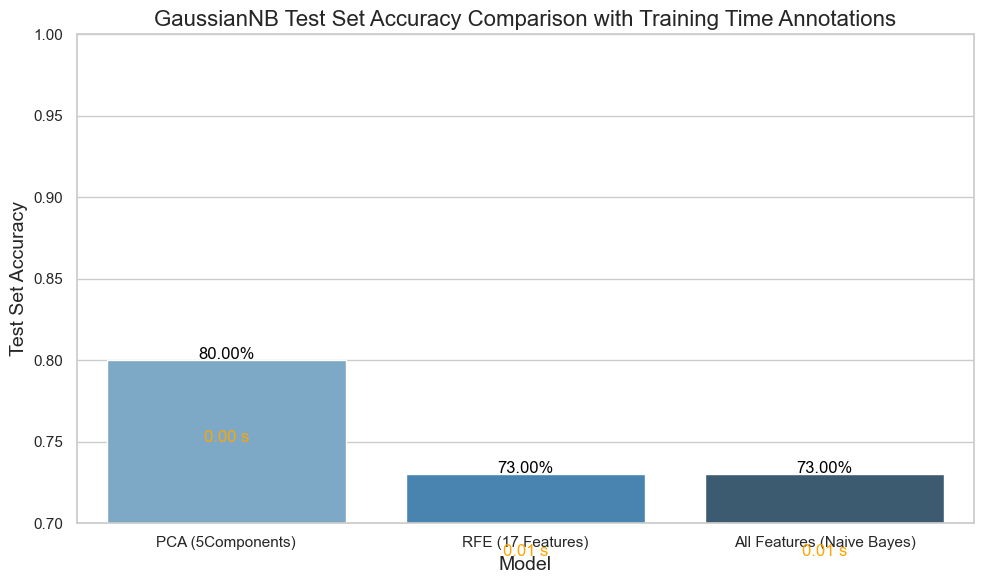

C:\Users\praga\AppData\Local\Temp\ipykernel_24788\3939374235.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Training Time (seconds)', data=df_comparison_nb, palette='Oranges_d')


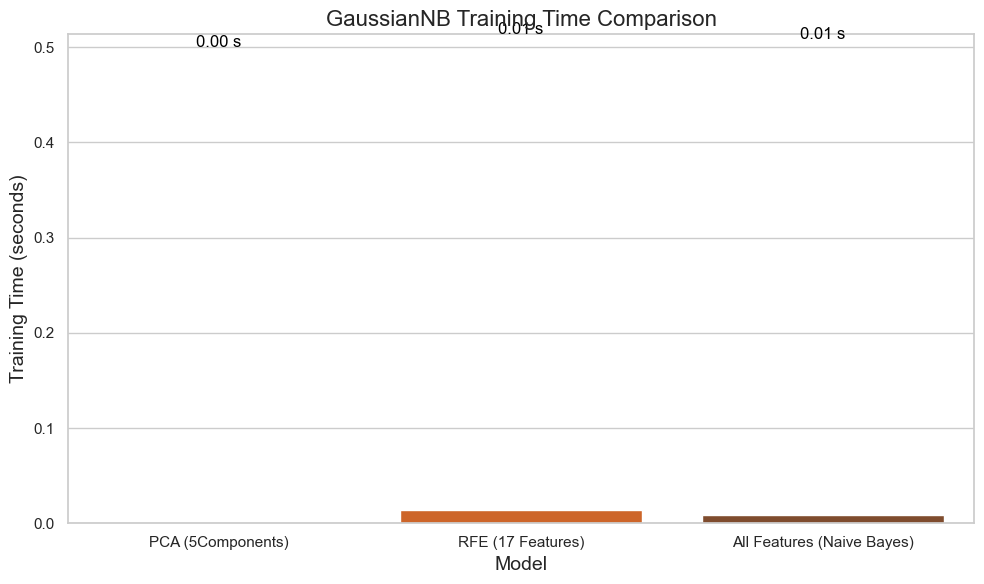

In [175]:

# Example comparison data
comparison_data_nb = {
    'Model': [
       'PCA (5Components)',
        'RFE (17 Features)',
        'All Features (Naive Bayes)'
    ],
    'Test Set Accuracy': [
      0.80,
      0.73,
      0.73
    ],
    'Training Time (seconds)': [
      0.000,
      0.0135 ,
      0.0082 
    ]
}

# Create the DataFrame
df_comparison_nb = pd.DataFrame(comparison_data_nb)

print("\nModel Comparison:")
print(df_comparison_nb)

# Plot Test Set Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Set Accuracy', data=df_comparison_nb, palette='Blues_d')

# Add data labels and training time annotations
for index, row in df_comparison_nb.iterrows():
    plt.text(index, row['Test Set Accuracy'] + 0.001, f"{row['Test Set Accuracy']*100:.2f}%", 
             color='black', ha="center", fontsize=12)
    plt.text(index, row['Test Set Accuracy'] - 0.05, f"{row['Training Time (seconds)']:.2f} s", 
             color='orange', ha="center", fontsize=12)

plt.title(f'{model_type} Test Set Accuracy Comparison with Training Time Annotations', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Test Set Accuracy', fontsize=14)
plt.ylim(0.70, 1.0)  # Setting y-axis limits for better visualization
plt.tight_layout()
plt.show()

# Plot Training Time Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Training Time (seconds)', data=df_comparison_nb, palette='Oranges_d')

# Add data labels on top of each bar
for index, row in df_comparison_nb.iterrows():
    plt.text(index, row['Training Time (seconds)'] + 0.5, f"{row['Training Time (seconds)']:.2f} s", 
             color='black', ha="center", fontsize=12)

plt.title(f'{model_type} Training Time Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Training Time (seconds)', fontsize=14)
plt.ylim(0, df_comparison_nb['Training Time (seconds)'].max() + 0.5)  # Adjust y-axis limit
plt.tight_layout()
plt.show()

In [176]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [179]:
selected_features_nb = [
    'length_url', 'length_hostname', 'nb_www', 'ratio_digits_url',
    'length_words_raw', 'longest_word_path', 'avg_word_path',
    'phish_hints', 'nb_hyperlinks', 'ratio_intHyperlinks',
    'ratio_extHyperlinks', 'safe_anchor', 'domain_registration_length',
    'domain_age', 'web_traffic', 'google_index', 'page_rank'
]




# Subset the training and testing data
X_train_selected = X[selected_features_nb]
X_test_selected = X_test[selected_features_nb]

print(f"Selected Features ({len(selected_features_nb)}): {selected_features_nb}\n")

Selected Features (17): ['length_url', 'length_hostname', 'nb_www', 'ratio_digits_url', 'length_words_raw', 'longest_word_path', 'avg_word_path', 'phish_hints', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'safe_anchor', 'domain_registration_length', 'domain_age', 'web_traffic', 'google_index', 'page_rank']



In [182]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
print("Scaling the data...")
start_time_scaler = time.time()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)
end_time_scaler = time.time()
scaler_time = end_time_scaler - start_time_scaler
print(f"Data scaling completed in {scaler_time:.4f} seconds\n")

Scaling the data...
Data scaling completed in 0.0218 seconds



In [183]:
def create_improved_nn_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(0.5),
        
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    
    # Compile the model
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


In [ ]:

input_dim = X_train_scaled.shape[1]  
nn_model = create_improved_nn_model(input_dim)

# Define callbacks
early_stop = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_nn_model.keras', monitor='val_accuracy', save_best_only=True)


print("Training the Neural Network model...")
start_time_nn = time.time()
history_nn = nn_model.fit(
    X_train_scaled, y,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint],
    verbose=1
)
end_time_nn = time.time()
nn_training_time = end_time_nn - start_time_nn
print(f"\nNeural Network training completed in {nn_training_time:.2f} seconds\n")


Training the Neural Network model...
Epoch 1/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6862 - loss: 0.6182 - val_accuracy: 0.9177 - val_loss: 0.2446
Epoch 2/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8801 - loss: 0.2936 - val_accuracy: 0.9321 - val_loss: 0.1776
Epoch 3/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9022 - loss: 0.2473 - val_accuracy: 0.9372 - val_loss: 0.1638
Epoch 4/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9163 - loss: 0.2259 - val_accuracy: 0.9415 - val_loss: 0.1572
Epoch 5/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9317 - loss: 0.1840 - val_accuracy: 0.9423 - val_loss: 0.1531
Epoch 6/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9328 - loss: 0.1813 - val_accuracy: 0.9457 - val_loss: 0.1533
Epoch 7/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9360 - loss: 0.1697 - val_accuracy: 0.9449 - val_loss: 0.1454
Epoch 8/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Set Accuracy: 0.9517

Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.94      0.97      0.95      1886
    Phishing       0.96      0.94      0.95      1886

    accuracy                           0.95      3772
   macro avg       0.95      0.95      0.95      3772
weighted avg       0.95      0.95      0.95      3772



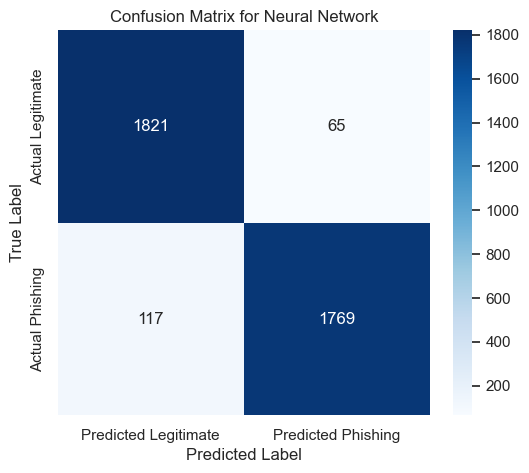

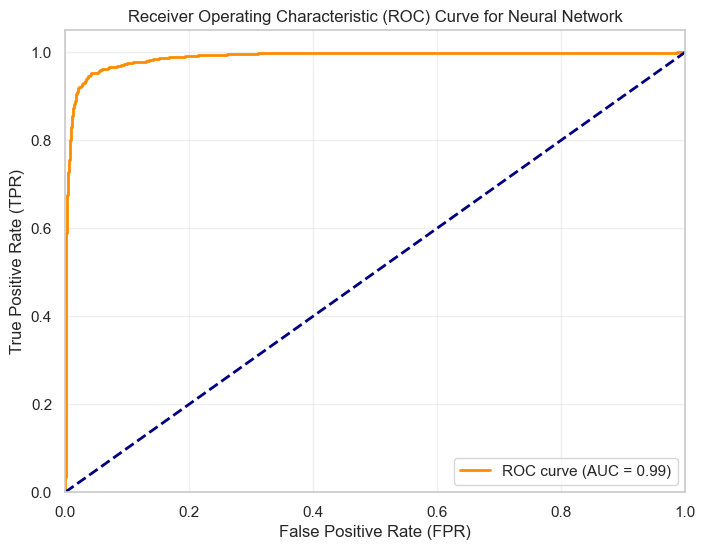

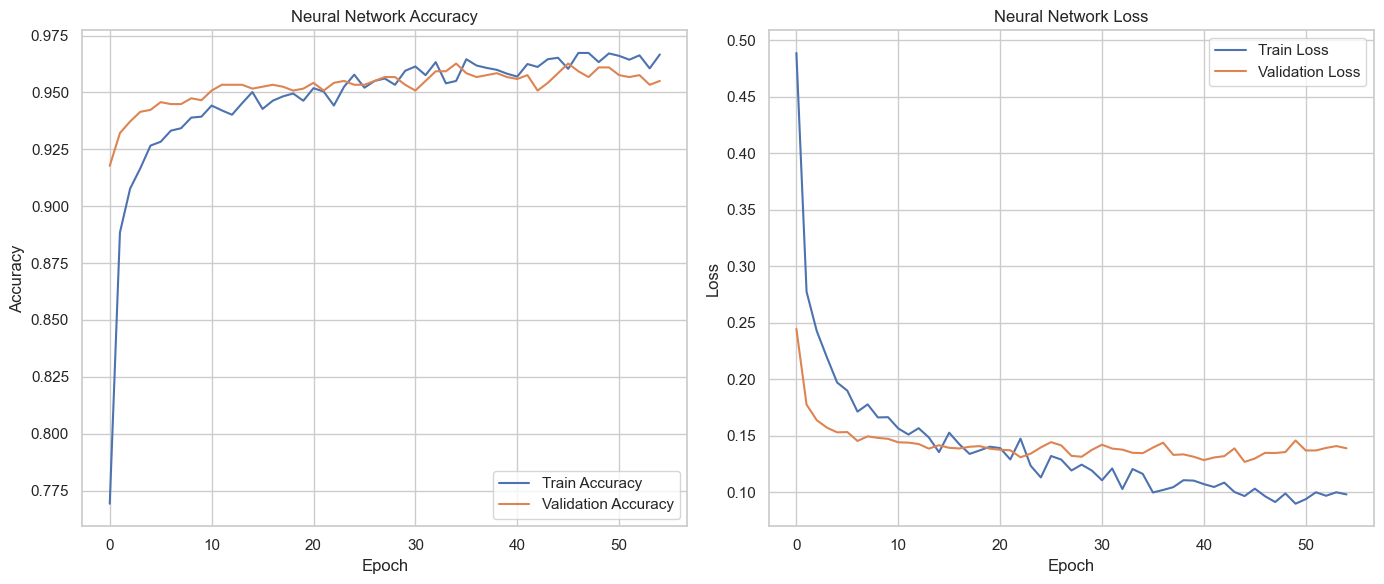

In [188]:
from tensorflow.keras.models import load_model
best_nn_model = load_model('best_nn_model.keras')
y_pred_proba = best_nn_model.predict(X_test_scaled).flatten()

# Convert probabilities to class labels (threshold=0.5)
y_pred = (y_pred_proba > 0.5).astype(int)


accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}\n")

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Phishing']))

# ---------------------------
# 5. Confusion Matrix
# ---------------------------

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Legitimate', 'Predicted Phishing'],
            yticklabels=['Actual Legitimate', 'Actual Phishing'])
plt.title('Confusion Matrix for Neural Network')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ---------------------------
# 6. ROC Curve and AUC
# ---------------------------

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Neural Network')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# ---------------------------
# 7. Plot Training History (Optional)
# ---------------------------

# Plot training & validation accuracy and loss values
plt.figure(figsize=(14,6))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history_nn.history['accuracy'], label='Train Accuracy')
plt.plot(history_nn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history_nn.history['loss'], label='Train Loss')
plt.plot(history_nn.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [189]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
print("Scaling the data...")
start_time_scaler = time.time()
X_train_scaled = scaler.fit_transform(X_train_selected )
X_test_scaled = scaler.transform(X_test_selected)
end_time_scaler = time.time()
scaler_time = end_time_scaler - start_time_scaler
print(f"Data scaling completed in {scaler_time:.4f} seconds\n")

Scaling the data...
Data scaling completed in 0.0073 seconds



In [190]:

input_dim = X_train_scaled.shape[1]  
nn_model = create_improved_nn_model(input_dim)

# Define callbacks
early_stop = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_nn_model_rfe.keras', monitor='val_accuracy', save_best_only=True)


print("Training the Neural Network model...")
start_time_nn = time.time()
history_nn = nn_model.fit(
    X_train_scaled, y,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint],
    verbose=1
)
end_time_nn = time.time()
nn_training_time = end_time_nn - start_time_nn
print(f"\nNeural Network rfe training completed in {nn_training_time:.2f} seconds\n")


Training the Neural Network model...
Epoch 1/200


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7243 - loss: 0.5575 - val_accuracy: 0.9288 - val_loss: 0.2481
Epoch 2/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9079 - loss: 0.2554 - val_accuracy: 0.9364 - val_loss: 0.1846
Epoch 3/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9099 - loss: 0.2387 - val_accuracy: 0.9372 - val_loss: 0.1715
Epoch 4/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9207 - loss: 0.2154 - val_accuracy: 0.9364 - val_loss: 0.1662
Epoch 5/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9258 - loss: 0.2007 - val_accuracy: 0.9415 - val_loss: 0.1654
Epoch 6/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9178 - loss: 0.2234 - val_accuracy: 0.9406 - val_loss: 0.1618
Epoch 7/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9140 - loss: 0.2138 - val_accuracy: 0.9389 - val_loss: 0.1641
Epoch 8/200
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9318 - loss: 0.2057 - val_accuracy: 0.9415

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Set Accuracy: 0.9435

Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.94      0.94      0.94      1886
    Phishing       0.94      0.94      0.94      1886

    accuracy                           0.94      3772
   macro avg       0.94      0.94      0.94      3772
weighted avg       0.94      0.94      0.94      3772



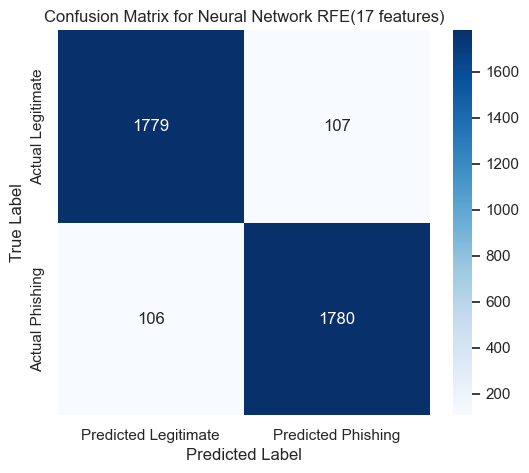

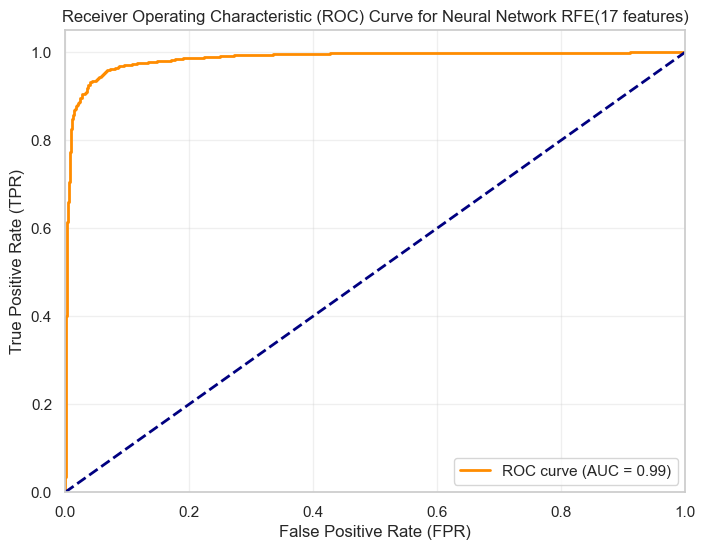

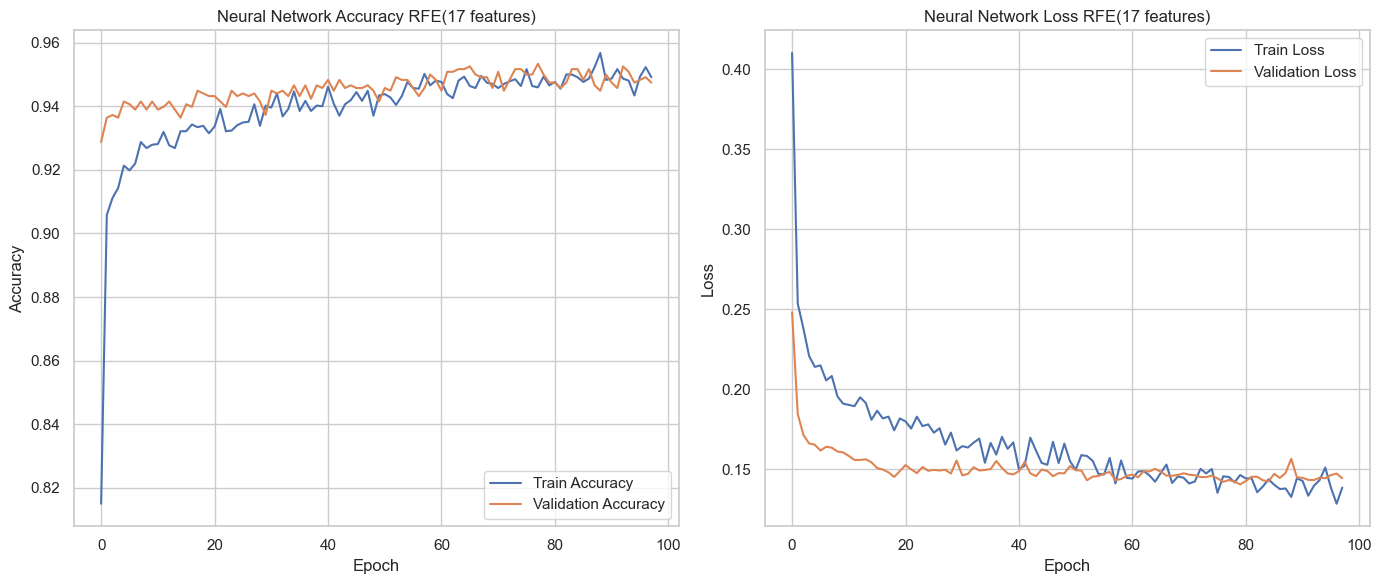

In [191]:
from tensorflow.keras.models import load_model
best_nn_model = load_model('best_nn_model_rfe.keras')
y_pred_proba = best_nn_model.predict(X_test_scaled).flatten()

# Convert probabilities to class labels (threshold=0.5)
y_pred = (y_pred_proba > 0.5).astype(int)


accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}\n")

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Phishing']))

# ---------------------------
# 5. Confusion Matrix
# ---------------------------

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Legitimate', 'Predicted Phishing'],
            yticklabels=['Actual Legitimate', 'Actual Phishing'])
plt.title('Confusion Matrix for Neural Network RFE(17 features)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ---------------------------
# 6. ROC Curve and AUC
# ---------------------------

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Neural Network RFE(17 features)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# ---------------------------
# 7. Plot Training History (Optional)
# ---------------------------

# Plot training & validation accuracy and loss values
plt.figure(figsize=(14,6))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history_nn.history['accuracy'], label='Train Accuracy')
plt.plot(history_nn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Accuracy RFE(17 features)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history_nn.history['loss'], label='Train Loss')
plt.plot(history_nn.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Loss RFE(17 features)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [192]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
print("Scaling the data...")
start_time_scaler = time.time()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)
end_time_scaler = time.time()
scaler_time = end_time_scaler - start_time_scaler
print(f"Data scaling completed in {scaler_time:.4f} seconds\n")

Scaling the data...
Data scaling completed in 0.0285 seconds



In [197]:
pca_components = range(1, X_train_scaled.shape[1] + 1)  

# Initialize dictionaries to store metrics
component_accuracies_nn = {}
component_times_pca_nn = {}
component_times_nn = {}

# Desired accuracy and threshold
desired_accuracy_nn = 0.95  
accuracy_threshold_nn = 0.01  

print("Evaluating PCA components for Neural Network...\n")

# Variables to track the best model if desired accuracy isn't achieved
best_test_accuracy = 0
best_n = 0
best_model_path = ''

for n in pca_components:
    print(f"Evaluating PCA with {n} component(s)...")
    
    # Initialize PCA
    pca = PCA(n_components=n, svd_solver='full')
    
    # Measure PCA fitting time
    start_time_pca = time.time()
    pca.fit(X_train_scaled)
    end_time_pca = time.time()
    pca_fit_time = end_time_pca - start_time_pca
    component_times_pca_nn[n] = pca_fit_time
    print(f"Time taken to fit PCA: {pca_fit_time:.4f} seconds")
    
    # Transform the data
    X_train_pca = pca.transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    # Initialize the Neural Network model
    nn_model_pca = create_improved_nn_model(input_dim=n)
    
    # Define callbacks
    early_stop = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
    checkpoint = ModelCheckpoint(f'best_nn_model_pca_{n}.keras', monitor='val_accuracy', save_best_only=True, verbose=0)
    
    # Measure training time
    start_time_nn = time.time()
    history_nn_pca = nn_model_pca.fit(
        X_train_pca, y,
        epochs=200,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stop, checkpoint],
        verbose=0  # Set to 1 for detailed logs
    )
    end_time_nn = time.time()
    nn_training_time = end_time_nn - start_time_nn
    component_times_nn[n] = nn_training_time
    print(f"Time taken to train Neural Network: {nn_training_time:.4f} seconds")
    
    # Load the best model for this PCA configuration
    best_model_pca = load_model(f'best_nn_model_pca_{n}.keras')
    
    # Evaluate on test data
    test_loss, test_accuracy = best_model_pca.evaluate(X_test_pca, y_test, verbose=0)
    component_accuracies_nn[n] = test_accuracy
    print(f"Test Set Accuracy: {test_accuracy:.4f}\n")
    
    # Update the best model trackers
    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_n = n
        best_model_path = f'best_nn_model_pca_{n}.keras'
    
    # Check if desired accuracy is achieved
    if test_accuracy >= desired_accuracy_nn:
        print(f"Desired accuracy of {desired_accuracy_nn*100}% achieved with {n} component(s).\n")
        break


Evaluating PCA components for Neural Network...

Evaluating PCA with 1 component(s)...
Time taken to fit PCA: 0.3633 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train Neural Network: 18.1237 seconds
Test Set Accuracy: 0.6980

Evaluating PCA with 2 component(s)...
Time taken to fit PCA: 0.3713 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train Neural Network: 30.6185 seconds
Test Set Accuracy: 0.7845

Evaluating PCA with 3 component(s)...
Time taken to fit PCA: 0.4031 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train Neural Network: 18.1521 seconds
Test Set Accuracy: 0.8666

Evaluating PCA with 4 component(s)...
Time taken to fit PCA: 0.2962 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train Neural Network: 17.5414 seconds
Test Set Accuracy: 0.8942

Evaluating PCA with 5 component(s)...
Time taken to fit PCA: 0.4951 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train Neural Network: 19.9507 seconds
Test Set Accuracy: 0.8974

Evaluating PCA with 6 component(s)...
Time taken to fit PCA: 0.3965 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train Neural Network: 18.5547 seconds
Test Set Accuracy: 0.9067

Evaluating PCA with 7 component(s)...
Time taken to fit PCA: 0.4074 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train Neural Network: 16.0921 seconds
Test Set Accuracy: 0.9091

Evaluating PCA with 8 component(s)...
Time taken to fit PCA: 0.5401 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train Neural Network: 31.0770 seconds
Test Set Accuracy: 0.9149

Evaluating PCA with 9 component(s)...
Time taken to fit PCA: 0.4484 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train Neural Network: 37.5392 seconds
Test Set Accuracy: 0.9168

Evaluating PCA with 10 component(s)...
Time taken to fit PCA: 0.2901 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train Neural Network: 37.0880 seconds
Test Set Accuracy: 0.9234

Evaluating PCA with 11 component(s)...
Time taken to fit PCA: 0.3946 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train Neural Network: 19.9695 seconds
Test Set Accuracy: 0.9197

Evaluating PCA with 12 component(s)...
Time taken to fit PCA: 0.4040 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train Neural Network: 25.9710 seconds
Test Set Accuracy: 0.9340

Evaluating PCA with 13 component(s)...
Time taken to fit PCA: 0.3988 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train Neural Network: 30.8933 seconds
Test Set Accuracy: 0.9358

Evaluating PCA with 14 component(s)...
Time taken to fit PCA: 0.3919 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train Neural Network: 41.6273 seconds
Test Set Accuracy: 0.9398

Evaluating PCA with 15 component(s)...
Time taken to fit PCA: 0.3839 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train Neural Network: 26.1348 seconds
Test Set Accuracy: 0.9358

Evaluating PCA with 16 component(s)...
Time taken to fit PCA: 0.3906 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train Neural Network: 42.3314 seconds
Test Set Accuracy: 0.9335

Evaluating PCA with 17 component(s)...
Time taken to fit PCA: 0.3036 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train Neural Network: 30.3613 seconds
Test Set Accuracy: 0.9457

Evaluating PCA with 18 component(s)...
Time taken to fit PCA: 0.3031 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train Neural Network: 17.6984 seconds
Test Set Accuracy: 0.9401

Evaluating PCA with 19 component(s)...
Time taken to fit PCA: 0.2937 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train Neural Network: 29.8733 seconds
Test Set Accuracy: 0.9446

Evaluating PCA with 20 component(s)...
Time taken to fit PCA: 0.4013 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train Neural Network: 24.5712 seconds
Test Set Accuracy: 0.9393

Evaluating PCA with 21 component(s)...
Time taken to fit PCA: 0.3218 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train Neural Network: 27.1536 seconds
Test Set Accuracy: 0.9459

Evaluating PCA with 22 component(s)...
Time taken to fit PCA: 0.3933 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train Neural Network: 24.0507 seconds
Test Set Accuracy: 0.9451

Evaluating PCA with 23 component(s)...
Time taken to fit PCA: 0.4031 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train Neural Network: 31.7434 seconds
Test Set Accuracy: 0.9483

Evaluating PCA with 24 component(s)...
Time taken to fit PCA: 0.5635 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train Neural Network: 17.4897 seconds
Test Set Accuracy: 0.9446

Evaluating PCA with 25 component(s)...
Time taken to fit PCA: 0.3837 seconds


C:\Users\praga\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Time taken to train Neural Network: 21.2120 seconds
Test Set Accuracy: 0.9507

Desired accuracy of 95.0% achieved with 25 component(s).



118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Final Test Set Accuracy: 0.9507

Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.94      0.96      0.95      1886
    Phishing       0.96      0.94      0.95      1886

    accuracy                           0.95      3772
   macro avg       0.95      0.95      0.95      3772
weighted avg       0.95      0.95      0.95      3772



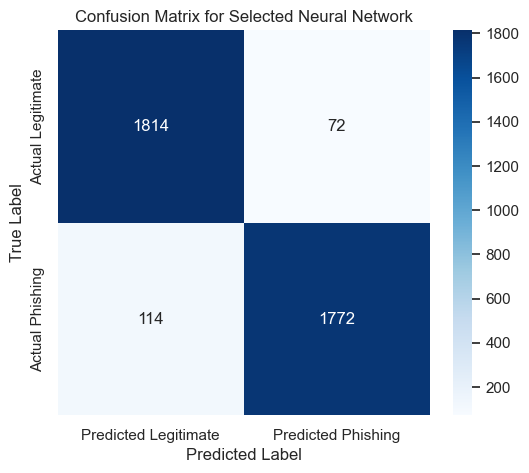

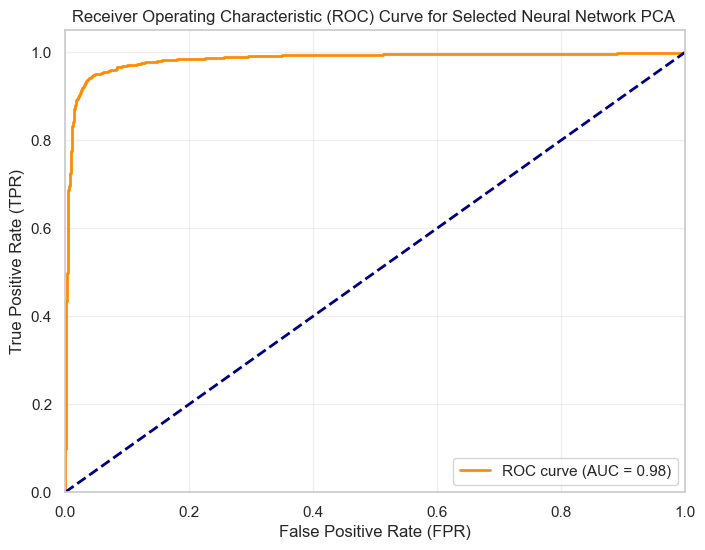

In [199]:
# Load the best model
best_selected_model = load_model(best_model_path)

# Transform the test data using the corresponding PCA
pca_selected = PCA(n_components=best_n, svd_solver='full')
pca_selected.fit(X_train_scaled)  # Ensure PCA is fitted on the entire training data
X_test_pca_selected = pca_selected.transform(X_test_scaled)

# Generate predictions
y_pred_final_nn = (best_selected_model.predict(X_test_pca_selected) > 0.5).astype("int32").flatten()
y_pred_proba_final_nn = best_selected_model.predict(X_test_pca_selected).flatten()

# Calculate accuracy
test_accuracy_final_nn = accuracy_score(y_test, y_pred_final_nn)
print(f"Final Test Set Accuracy: {test_accuracy_final_nn:.4f}\n")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_final_nn, target_names=['Legitimate', 'Phishing']))

# Confusion Matrix
cm_final_nn = confusion_matrix(y_test, y_pred_final_nn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_final_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Legitimate', 'Predicted Phishing'],
            yticklabels=['Actual Legitimate', 'Actual Phishing'])
plt.title('Confusion Matrix for Selected Neural Network')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve and AUC
fpr_final_nn, tpr_final_nn, thresholds_final_nn = roc_curve(y_test, y_pred_proba_final_nn)
roc_auc_final_nn = auc(fpr_final_nn, tpr_final_nn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_final_nn, tpr_final_nn, color='darkorange',
         lw=2, label=f'ROC curve (AUC = {roc_auc_final_nn:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Selected Neural Network PCA ')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


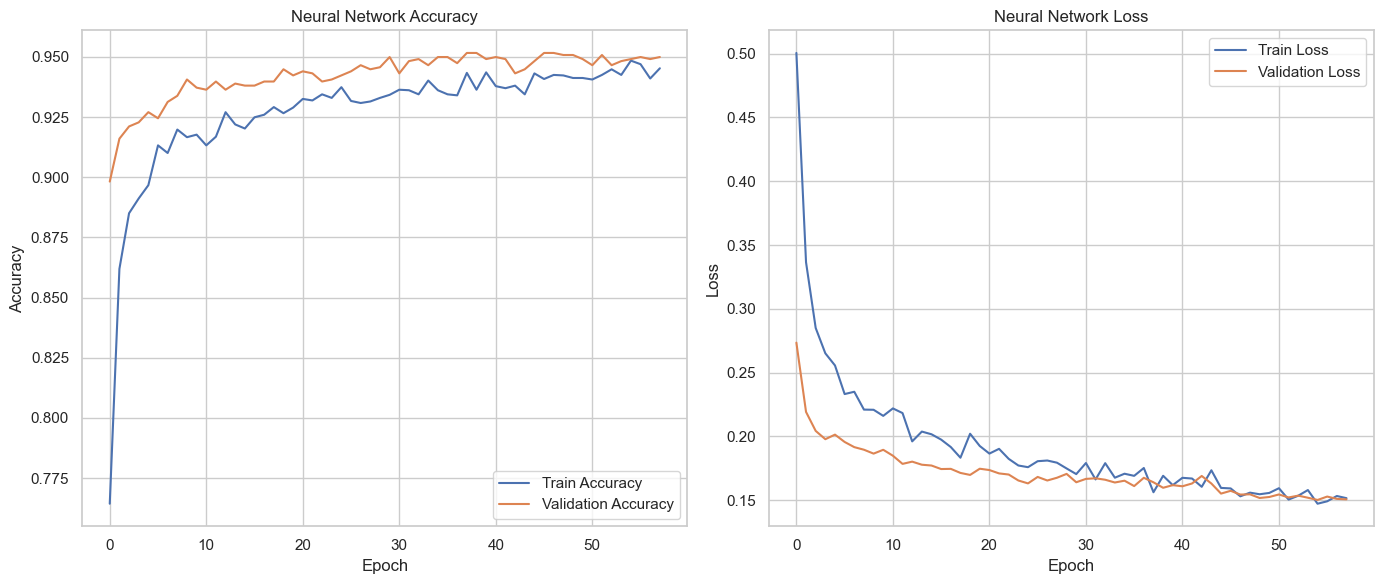

In [200]:
if best_n:
    # Load the history of the selected model
    # Note: Since we saved the model with ModelCheckpoint but didn't save history, 
    # we need to retrain the model to get history, or modify the loop to save history.
    # Alternatively, you can save the history during the loop.

    # For demonstration, let's assume you have access to history_final_nn
    # If not, you need to modify the loop to save histories for each n.
    
    # Example:
    # histories_nn_pca[n] = history_nn_pca.history
    
    # Here, let's plot based on the last history_nn_pca
    history = history_nn_pca.history
    
    plt.figure(figsize=(14,6))
    
    # Accuracy Plot
    plt.subplot(1,2,1)
    plt.plot(history['accuracy'], label='Train Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title('Neural Network Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    
    # Loss Plot
    plt.subplot(1,2,2)
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Neural Network Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()


In [202]:
optimal_n_components_nn = None
best_accuracy_nn = 0

if component_accuracies_nn:
    best_n = max(component_accuracies_nn, key=component_accuracies_nn.get)
    best_accuracy_nn = component_accuracies_nn[best_n]
    optimal_n_components_nn = best_n
    print(f"Optimal number of PCA components for Neural Network: {optimal_n_components_nn}")
    print(f"Best Test Set Accuracy: {best_accuracy_nn:.4f}\n")
else:
    print("No PCA component configuration achieved the desired accuracy threshold.\n")

Optimal number of PCA components for Neural Network: 25
Best Test Set Accuracy: 0.9507



In [ ]:
if optimal_n_components_nn:
    optimal_accuracy = best_accuracy_nn
    desired_accuracy = 0.95  # 95%
    accuracy_threshold = 0.02  # 2%
    
    # Calculate the minimum acceptable accuracy
    min_acceptable_accuracy = optimal_accuracy - accuracy_threshold
    
    # Create a DataFrame for PCA evaluation results
    candidate_df_nn = pd.DataFrame({
        'n_components': list(component_accuracies_nn.keys()),
        'accuracy': list(component_accuracies_nn.values()),
        'pca_time_sec': list(component_times_pca_nn.values()),
        'nn_time_sec': list(component_times_nn.values())
    })
    
    # Filter components that meet the accuracy threshold
    candidate_df_nn_ = candidate_df_nn[candidate_df_nn['accuracy'] >= min_acceptable_accuracy]
    
    # Find the minimal number of components among candidates
    if not candidate_df_nn_.empty:
        selected_row_nn = candidate_df_nn_.loc[candidate_df_nn['n_components'].idxmin()]
        selected_n_components_nn = selected_row_nn['n_components']
        selected_accuracy_nn = selected_row_nn['accuracy']
        selected_pca_time_nn = selected_row_nn['pca_time_sec']
        selected_nn_time_nn = selected_row_nn['nn_time_sec']
        print(f"Selected Number of PCA Components: {selected_n_components_nn}")
        print(f"Test Set Accuracy: {selected_accuracy_nn:.4f} (within {accuracy_threshold*100}%)")
        print(f"PCA Fit Time: {selected_pca_time_nn} seconds")
        print(f"Neural Network Train Time: {selected_nn_time_nn:.4f} seconds\n")
    else:
        print("No number of PCA components meets the desired accuracy threshold.\n")


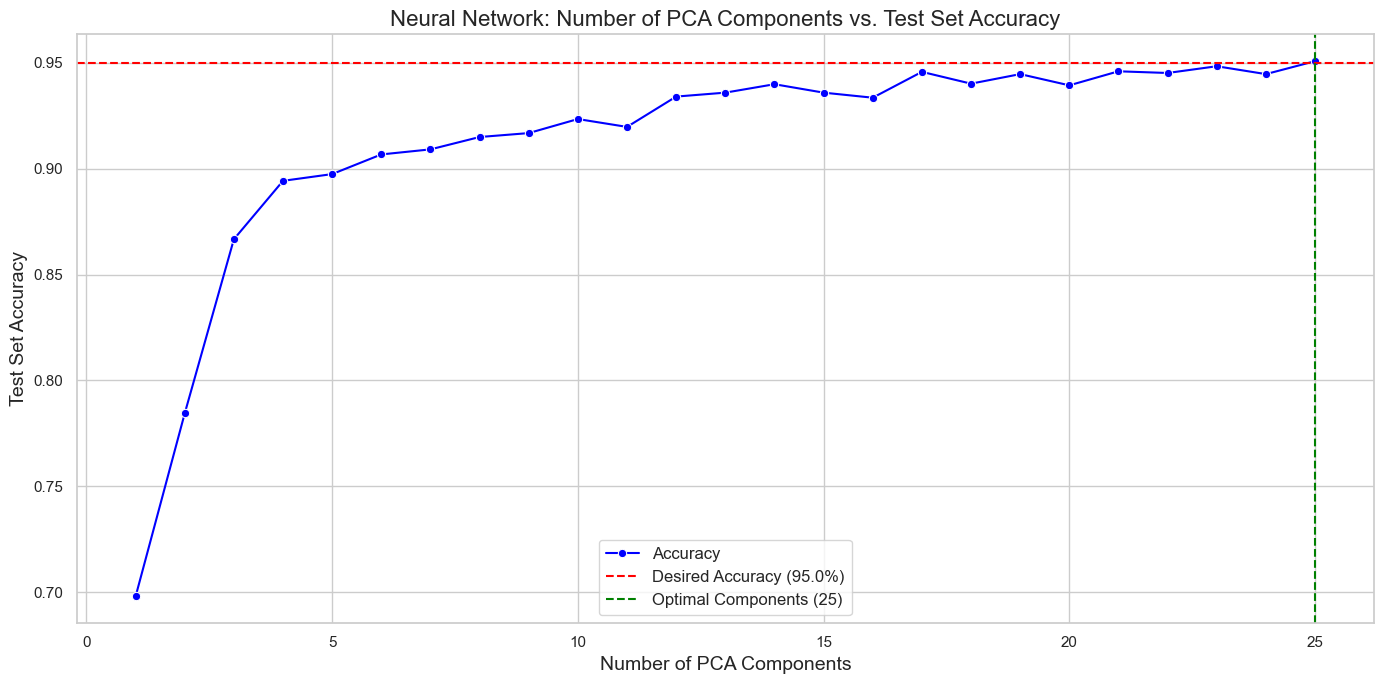

In [214]:
if optimal_n_components_nn:
    sns.set(style="whitegrid")
    
    # ---------------------------
    # 11.1. Number of PCA Components vs. Test Set Accuracy
    # ---------------------------
    
    plt.figure(figsize=(14, 7))
    sns.lineplot(x='n_components', y='accuracy', data=candidate_df_nn, marker='o', color='blue', label='Accuracy')
    plt.title('Neural Network: Number of PCA Components vs. Test Set Accuracy', fontsize=16)
    plt.xlabel('Number of PCA Components', fontsize=14)
    plt.ylabel('Test Set Accuracy', fontsize=14)
    
    # Desired Accuracy Line
    plt.axhline(y=desired_accuracy, color='red', linestyle='--', label=f'Desired Accuracy ({desired_accuracy*100}%)')
    
    # Optimal Components Line
    plt.axvline(x=optimal_n_components_nn, color='green', linestyle='--', label=f'Optimal Components ({optimal_n_components_nn})')
    
    
    
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


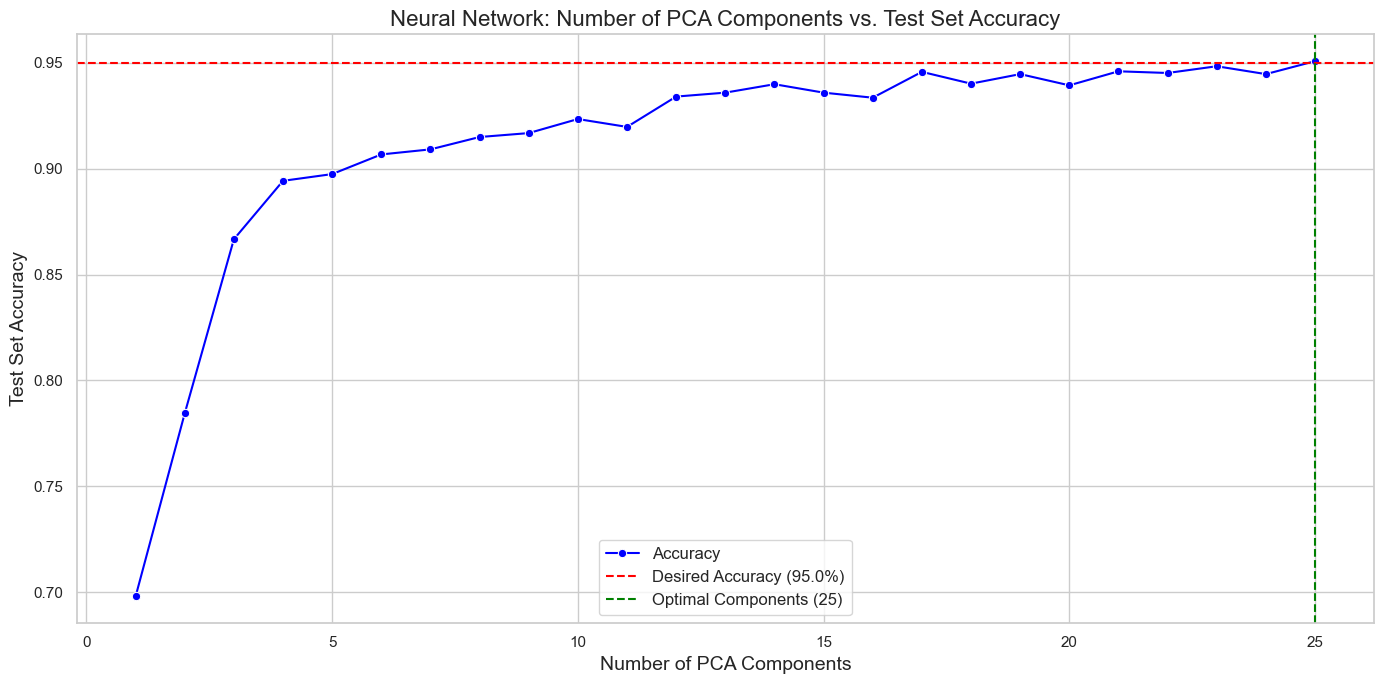

In [215]:
if optimal_n_components_nn:
    sns.set(style="whitegrid")
    
    # ---------------------------
    # 10.1. Number of PCA Components vs. Test Set Accuracy
    # ---------------------------
    
    plt.figure(figsize=(14, 7))
    sns.lineplot(x='n_components', y='accuracy', data=candidate_df_nn, marker='o', color='blue', label='Accuracy')
    plt.title('Neural Network: Number of PCA Components vs. Test Set Accuracy', fontsize=16)
    plt.xlabel('Number of PCA Components', fontsize=14)
    plt.ylabel('Test Set Accuracy', fontsize=14)
    
    # Desired Accuracy Line
    plt.axhline(y=desired_accuracy_nn, color='red', linestyle='--', label=f'Desired Accuracy ({desired_accuracy_nn*100}%)')
    
    # Optimal Components Line
    plt.axvline(x=optimal_n_components_nn, color='green', linestyle='--', label=f'Optimal Components ({optimal_n_components_nn})')
    
    # Selected Components Line (Same as optimal in this case)
    
    
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


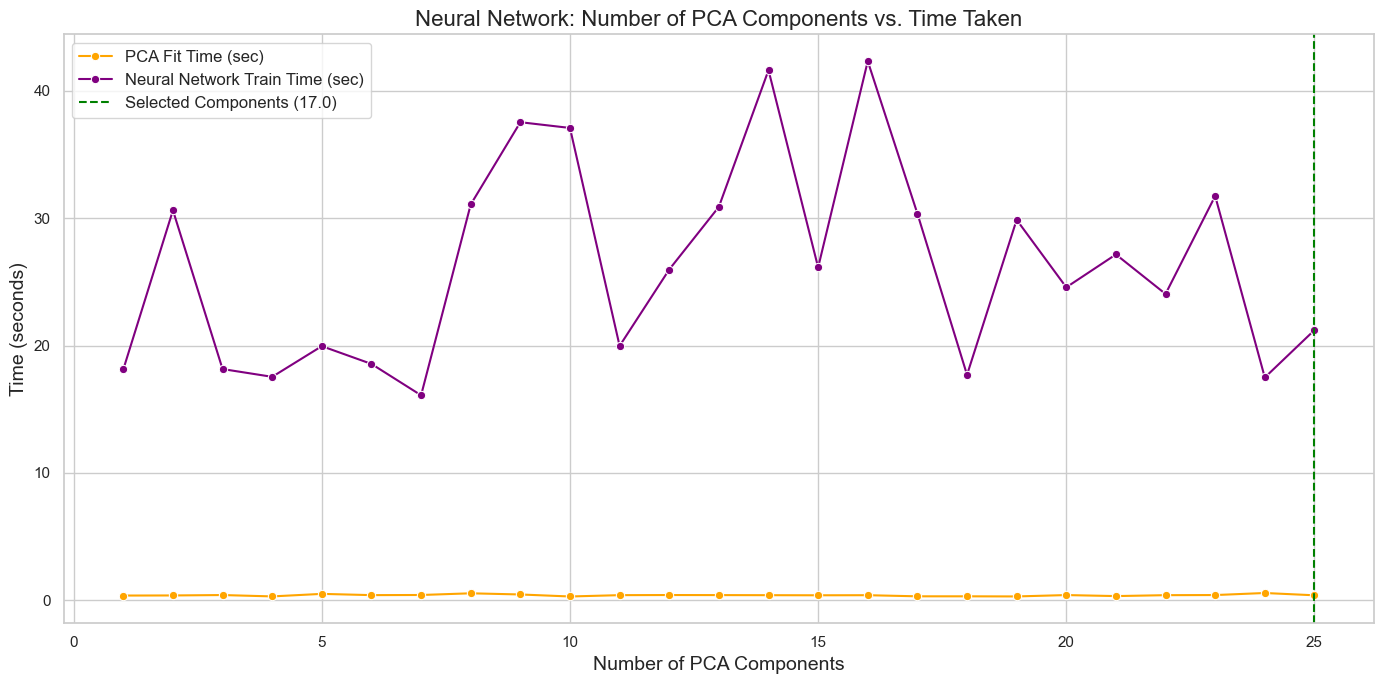

In [217]:
if optimal_n_components_nn:
    plt.figure(figsize=(14, 7))
    sns.lineplot(x='n_components', y='pca_time_sec', data=candidate_df_nn, marker='o', label='PCA Fit Time (sec)', color='orange')
    sns.lineplot(x='n_components', y='nn_time_sec', data=candidate_df_nn, marker='o', label='Neural Network Train Time (sec)', color='purple')
    
    plt.title('Neural Network: Number of PCA Components vs. Time Taken', fontsize=16)
    plt.xlabel('Number of PCA Components', fontsize=14)
    plt.ylabel('Time (seconds)', fontsize=14)
    
    # Highlight Selected Components
    if not candidate_df_nn.empty:
        plt.axvline(x=optimal_n_components_nn, color='green', linestyle='--', label=f'Selected Components ({selected_n_components_nn})')
    
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


In [224]:
comparison_data_nn = {
    'Model': [
       'PCA (25Components)',
        'RFE (17 Features)',
        'All Features (Neural Network)'
    ],
    'Test Set Accuracy': [
      0.9507,
      0.9435,
      0.9517
    ],
    'Training Time (seconds)': [
      21.2120,
      40.23  ,
      25.33 
    ]
}
    
df_comparison_nn = pd.DataFrame(comparison_data_nn)
    
   
    


Model Comparison:
                        Model  Test Set Accuracy  Training Time (seconds)
0           PCA (5Components)               0.80                   0.0000
1           RFE (17 Features)               0.73                   0.0135
2  All Features (Naive Bayes)               0.73                   0.0082


C:\Users\praga\AppData\Local\Temp\ipykernel_24788\1779742587.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Test Set Accuracy', data=df_comparison_nn, palette='Blues_d')


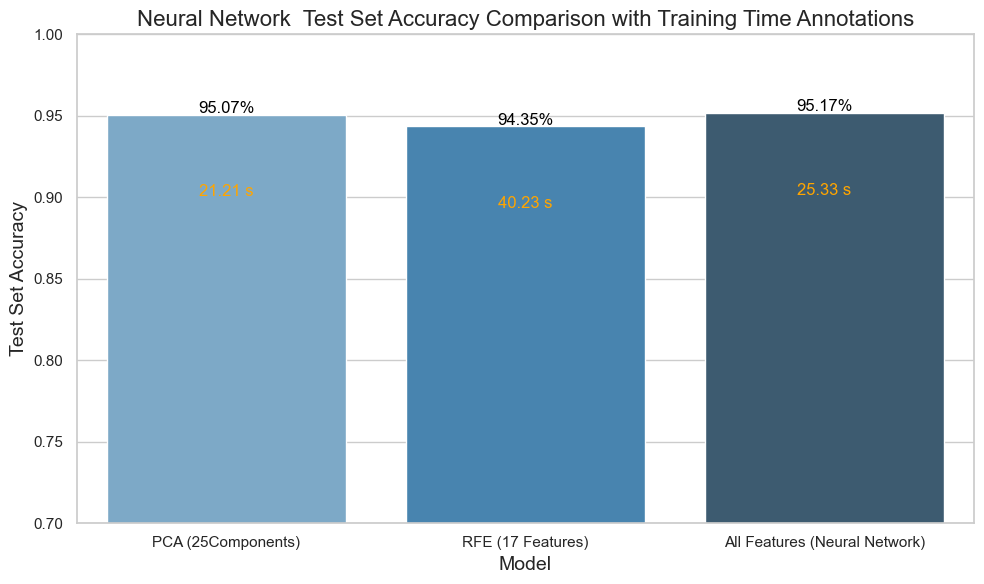

C:\Users\praga\AppData\Local\Temp\ipykernel_24788\1779742587.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Training Time (seconds)', data=df_comparison_nn, palette='Oranges_d')


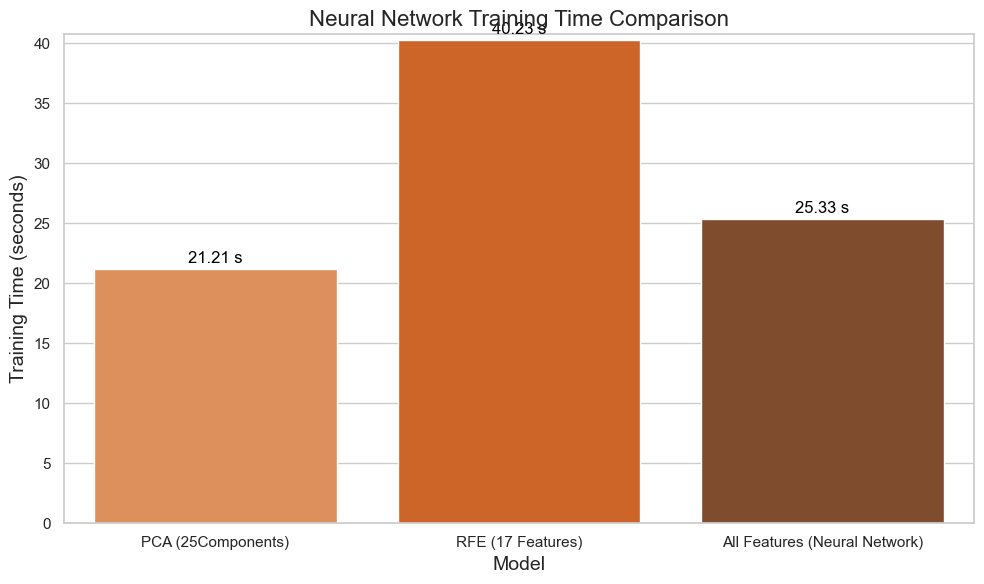

In [226]:
print("\nModel Comparison:")
print(df_comparison_nb)

# Plot Test Set Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Set Accuracy', data=df_comparison_nn, palette='Blues_d')

# Add data labels and training time annotations
for index, row in df_comparison_nn.iterrows():
    plt.text(index, row['Test Set Accuracy'] + 0.001, f"{row['Test Set Accuracy']*100:.2f}%", 
             color='black', ha="center", fontsize=12)
    plt.text(index, row['Test Set Accuracy'] - 0.05, f"{row['Training Time (seconds)']:.2f} s", 
             color='orange', ha="center", fontsize=12)

plt.title('Neural Network  Test Set Accuracy Comparison with Training Time Annotations', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Test Set Accuracy', fontsize=14)
plt.ylim(0.70, 1.0)  # Setting y-axis limits for better visualization
plt.tight_layout()
plt.show()

# Plot Training Time Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Training Time (seconds)', data=df_comparison_nn, palette='Oranges_d')

# Add data labels on top of each bar
for index, row in df_comparison_nn.iterrows():
    plt.text(index, row['Training Time (seconds)'] + 0.5, f"{row['Training Time (seconds)']:.2f} s", 
             color='black', ha="center", fontsize=12)

plt.title('Neural Network Training Time Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Training Time (seconds)', fontsize=14)
plt.ylim(0, df_comparison_nn['Training Time (seconds)'].max() + 0.5)  # Adjust y-axis limit
plt.tight_layout()
plt.show()
    
  

Autoencoder_Decoder

In [227]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
print("Scaling the data...")
start_time_scaler = time.time()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)
end_time_scaler = time.time()
scaler_time = end_time_scaler - start_time_scaler
print(f"Data scaling completed in {scaler_time:.4f} seconds\n")


Scaling the data...
Data scaling completed in 0.0202 seconds



Model: "functional_364"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_71 (InputLayer)     │ (None, 87)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_291 (Dense)               │ (None, 128)            │        11,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_197 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_292 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_198 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_293 (Dense)               │ (None, 87)             │         5,655 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_294 (Dense)               │ (None, 2)              │           176 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,351 (99.03 KB)

 Trainable params: 25,351 (99.03 KB)

 Non-trainable params: 0 (0.00 B)

Training the Encoder-based Classifier...
Epoch 1/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5213 - loss: 10141.2090 - val_accuracy: 0.7277 - val_loss: 1141.7443
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5743 - loss: 3140.2747 - val_accuracy: 0.6522 - val_loss: 1449.2574
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5732 - loss: 1191.5959 - val_accuracy: 0.5208 - val_loss: 490.0949
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5649 - loss: 786.6268 - val_accuracy: 0.4411 - val_loss: 429.4176
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5495 - loss: 474.9293 - val_accuracy: 0.3664 - val_loss: 124.6421
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5443 - loss: 147.1325 - val_accuracy: 0.4232 - val_loss: 4.9610
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5797 - loss: 61.9178 - val_accuracy: 0.5937 - val_loss: 2.2354
Epoch 8/100
148/148 ━━━━━━━

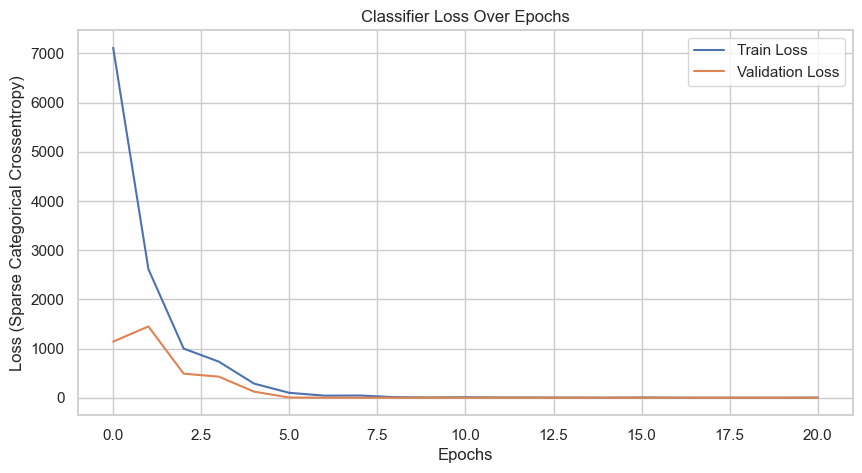

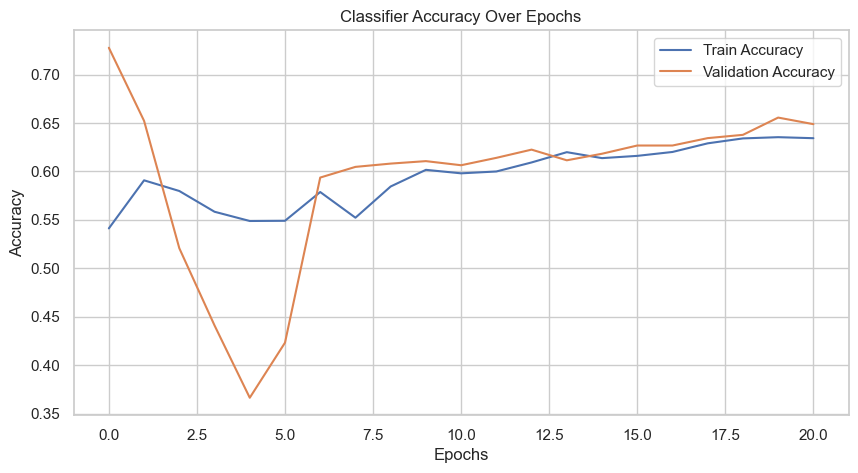

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step


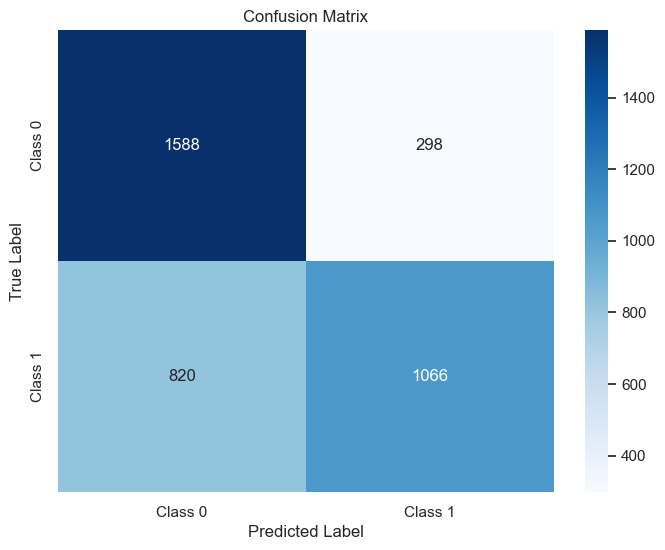


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.66      0.84      0.74      1886
     Class 1       0.78      0.57      0.66      1886

    accuracy                           0.70      3772
   macro avg       0.72      0.70      0.70      3772
weighted avg       0.72      0.70      0.70      3772



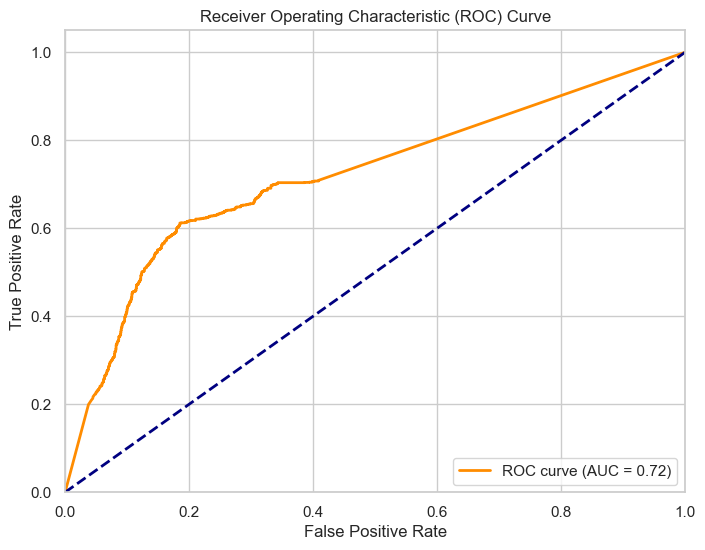

In [273]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Build the encoder for classification
def build_encoder_classifier(input_dim, encoding_dim=20, num_classes=2):
    """
    Builds an encoder-based classifier model.
    """
    # Input layer
    input_layer = Input(shape=(input_dim,))

    # Encoder
    encoded = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(input_layer)
    encoded = Dropout(0.2)(encoded)
    encoded = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(encoded)
    encoded = Dropout(0.2)(encoded)
    encoded = Dense(encoding_dim, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(encoded)

    # Classification layer
    output_layer = Dense(num_classes, activation='softmax')(encoded)

    # Full model
    classifier = Model(inputs=input_layer, outputs=output_layer)
    return classifier

# Build the encoder classifier
input_dim = X.shape[1]
encoding_dim = 87  # Latent representation size
num_classes = len(set(y))  # Number of unique classes
classifier = build_encoder_classifier(input_dim, encoding_dim, num_classes)

# Compile the classifier
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
classifier.summary()

# ---------------------------
# 1. Train the Classifier
# ---------------------------

# Define callbacks
early_stop = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
checkpoint = ModelCheckpoint(
    'best_encoder_classifier.keras', monitor='val_accuracy', mode='max', save_best_only=True
)

start_time_scaler = time.time()
print("Training the Encoder-based Classifier...")
history = classifier.fit(
    X, y,  # Supervised task: Input and target are different
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint],
    verbose=1
)
end_time_scaler = time.time()
scaler_time = end_time_scaler - start_time_scaler
print(f"Data training completed in {scaler_time:.4f} seconds\n")
# ---------------------------
# 2. Evaluate the Classifier
# ---------------------------

test_loss, test_accuracy = classifier.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# ---------------------------
# 3. Visualize Training History
# ---------------------------

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Classifier Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (Sparse Categorical Crossentropy)')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Classifier Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ---------------------------
# 4. Confusion Matrix and Classification Report
# ---------------------------

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import numpy as np

# Predictions
y_pred = classifier.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
class_labels = [f"Class {i}" for i in range(num_classes)]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=class_labels))

# ---------------------------
# 5. ROC Curve and AUC
# ---------------------------

# ROC Curve (for binary classification or multi-class one-vs-rest)
if num_classes == 2:
    fpr, tpr, _ = roc_curve(y_test, y_pred[:, 1])  # Probability of positive class
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


In [270]:
X_train_selected.shape

(5894, 17)

Model: "functional_365"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_72 (InputLayer)     │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_295 (Dense)               │ (None, 128)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_199 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_296 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_200 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_297 (Dense)               │ (None, 17)             │         1,105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_298 (Dense)               │ (None, 2)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,701 (45.71 KB)

 Trainable params: 11,701 (45.71 KB)

 Non-trainable params: 0 (0.00 B)

Training the Encoder-based Classifier...
Epoch 1/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5028 - loss: 11918.1475 - val_accuracy: 0.6081 - val_loss: 16.4784
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5106 - loss: 191.3217 - val_accuracy: 0.4640 - val_loss: 0.7066
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4990 - loss: 70.2021 - val_accuracy: 0.5445 - val_loss: 0.7019
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5352 - loss: 39.5620 - val_accuracy: 0.5479 - val_loss: 0.6970
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5434 - loss: 84.5079 - val_accuracy: 0.5530 - val_loss: 0.6934
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5471 - loss: 56.1847 - val_accuracy: 0.5556 - val_loss: 0.6916
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5421 - loss: 5.4808 - val_accuracy: 0.5547 - val_loss: 0.6909
Epoch 8/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2

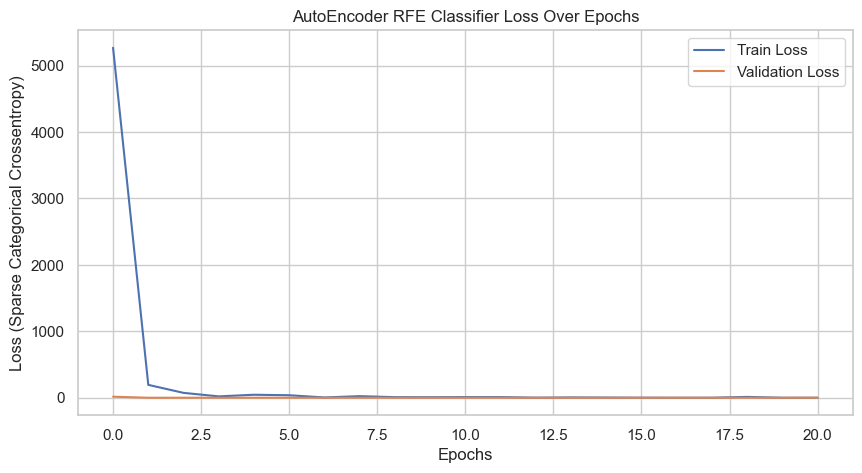

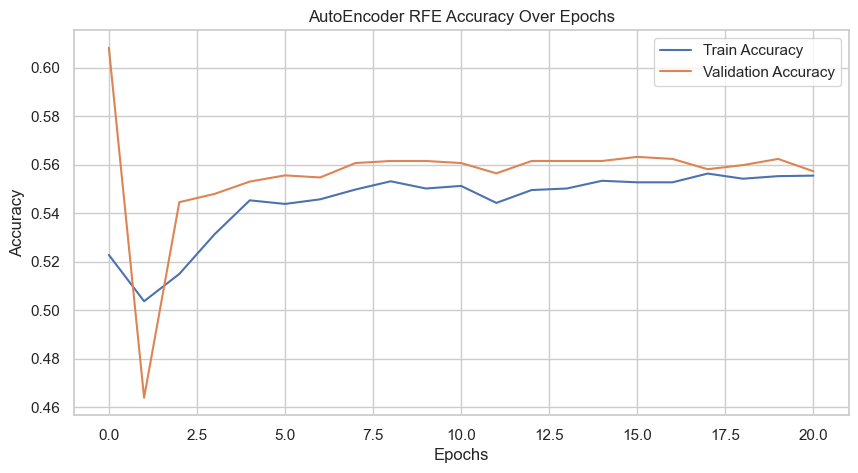

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step


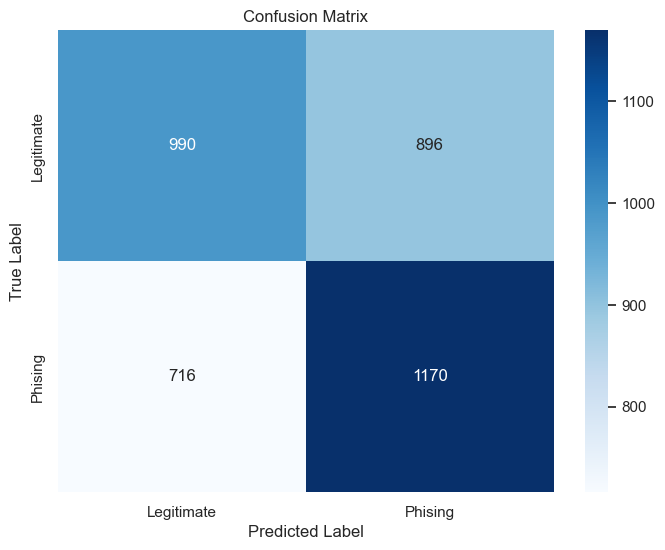


Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.58      0.52      0.55      1886
     Phising       0.57      0.62      0.59      1886

    accuracy                           0.57      3772
   macro avg       0.57      0.57      0.57      3772
weighted avg       0.57      0.57      0.57      3772



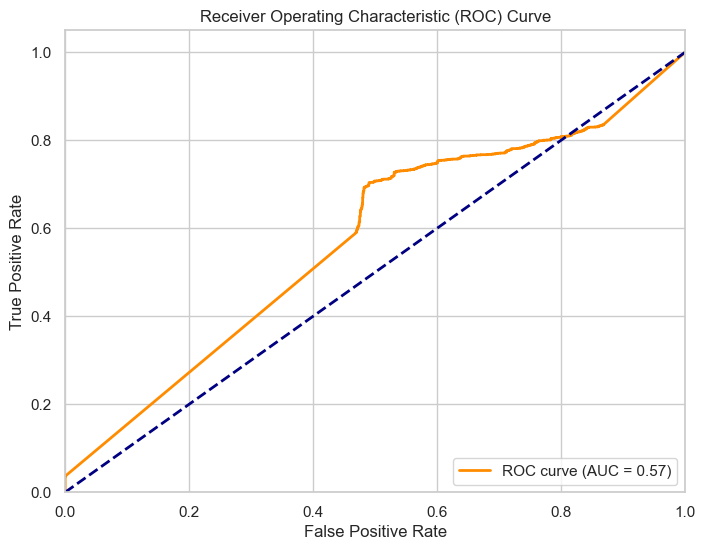

In [274]:
input_dim = X_train_selected.shape[1]
encoding_dim = 17  # Latent representation size
num_classes = len(set(y))  # Number of unique classes
classifier = build_encoder_classifier(input_dim, encoding_dim, num_classes)

# Compile the classifier
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
classifier.summary()

# ---------------------------
# 1. Train the Classifier
# ---------------------------

# Define callbacks
early_stop = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
checkpoint = ModelCheckpoint(
    'best_encoder_rfe_classifier.keras', monitor='val_accuracy', mode='max', save_best_only=True
)

start_time_scaler = time.time()
print("Training the Encoder-based Classifier...")
history = classifier.fit(
    X_train_selected, y,  # Supervised task: Input and target are different
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint],
    verbose=1
)
end_time_scaler = time.time()
scaler_time = end_time_scaler - start_time_scaler
print(f"Data training completed in {scaler_time:.4f} seconds\n")

test_loss, test_accuracy = classifier.evaluate(X_test_selected, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# ---------------------------
# 3. Visualize Training History
# ---------------------------

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('AutoEncoder RFE Classifier Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (Sparse Categorical Crossentropy)')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('AutoEncoder RFE Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



# Predictions
y_pred = classifier.predict(X_test_selected)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
class_labels = ['Legitimate','Phising']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=class_labels))

# ---------------------------
# 5. ROC Curve and AUC
# ---------------------------

# ROC Curve (for binary classification or multi-class one-vs-rest)
if num_classes == 2:
    fpr, tpr, _ = roc_curve(y_test, y_pred[:, 1])  # Probability of positive class
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


In [277]:
input_dim = X.shape[1]
encoding_dim = 87 # Latent representation size
num_classes = len(set(y))  # Number of unique classes
classifier = build_encoder_classifier(input_dim, encoding_dim, num_classes)

# Compile the classifier
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
classifier.summary()

Model: "functional_367"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_74 (InputLayer)     │ (None, 87)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_303 (Dense)               │ (None, 128)            │        11,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_203 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_304 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_204 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_305 (Dense)               │ (None, 87)             │         5,655 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_306 (Dense)               │ (None, 2)              │           176 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,351 (99.03 KB)

 Trainable params: 25,351 (99.03 KB)

 Non-trainable params: 0 (0.00 B)

Evaluating PCA components...

Evaluating PCA with 1 component(s)...
PCA Fitting Time: 0.0447 seconds
Training Time: 26.4779 seconds
Test Set Accuracy: 0.5000

Evaluating PCA with 2 component(s)...
PCA Fitting Time: 0.1889 seconds
Training Time: 25.4994 seconds
Test Set Accuracy: 0.5000

Evaluating PCA with 3 component(s)...
PCA Fitting Time: 0.1366 seconds
Training Time: 25.5243 seconds
Test Set Accuracy: 0.5000

Evaluating PCA with 4 component(s)...
PCA Fitting Time: 0.0265 seconds
Training Time: 29.9194 seconds
Test Set Accuracy: 0.5000

Evaluating PCA with 5 component(s)...
PCA Fitting Time: 0.0297 seconds
Training Time: 24.4859 seconds
Test Set Accuracy: 0.5000

Evaluating PCA with 6 component(s)...
PCA Fitting Time: 0.1215 seconds
Training Time: 24.5715 seconds
Test Set Accuracy: 0.5000

Evaluating PCA with 7 component(s)...
PCA Fitting Time: 0.1533 seconds
Training Time: 24.3161 seconds
Test Set Accuracy: 0.5000

Evaluating PCA with 8 component(s)...
PCA Fitting Time: 0.0274 seco

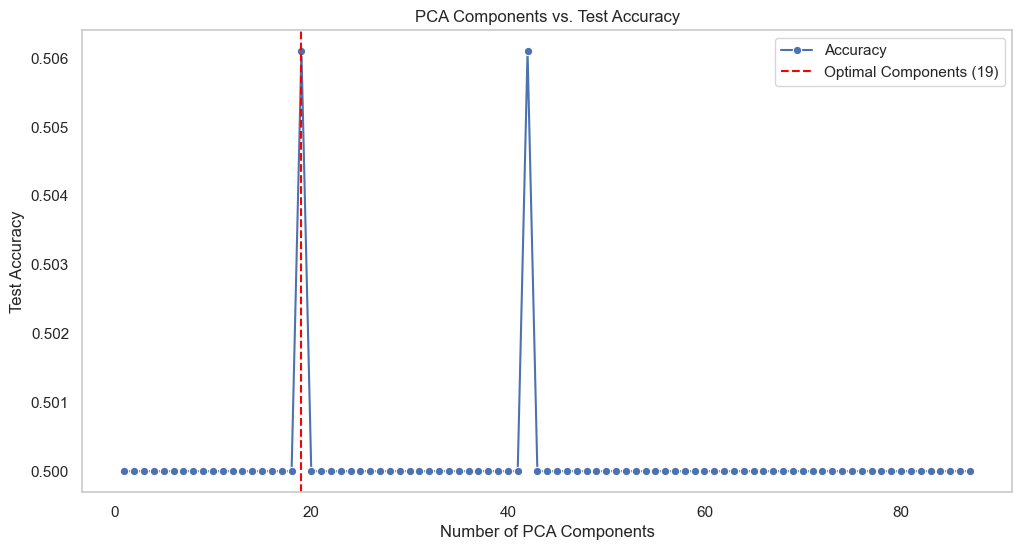

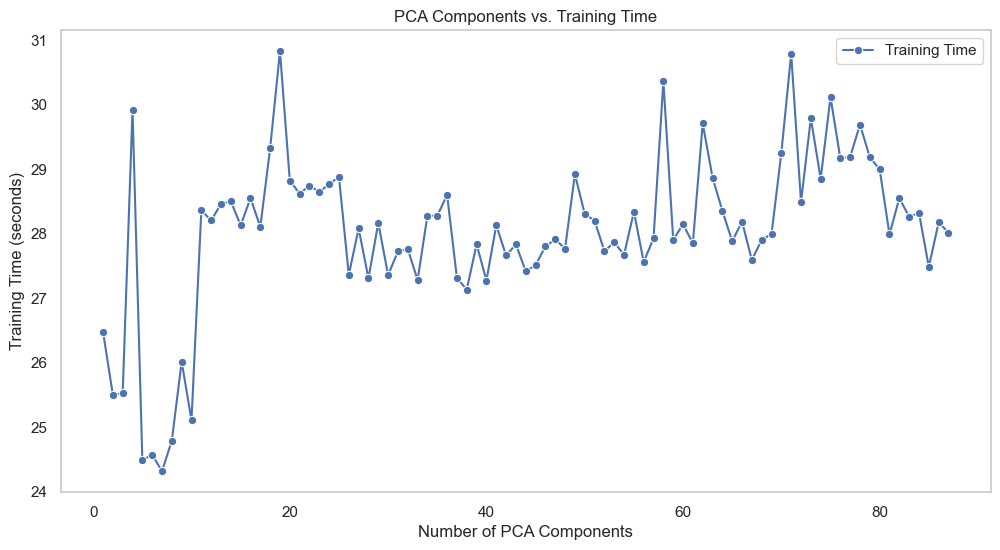

In [279]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

pca_components = range(1, X.shape[1] + 1, 1) 

# Initialize dictionaries to store metrics
component_accuracies = {}
component_training_times = {}

print("Evaluating PCA components...\n")

for n in pca_components:
    print(f"Evaluating PCA with {n} component(s)...")
    
    # Apply PCA
    pca = PCA(n_components=n, svd_solver='full')
    
    # Measure PCA fitting time
    start_time_pca = time.time()
    X_train_pca = pca.fit_transform(X)
    X_test_pca = pca.transform(X_test)
    end_time_pca = time.time()
    
    pca_time = end_time_pca - start_time_pca
    print(f"PCA Fitting Time: {pca_time:.4f} seconds")
    
    # Build and compile the classifier for current PCA features
    classifier = build_encoder_classifier(n, encoding_dim=n, num_classes=num_classes)
    classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Measure training time
    start_time_training = time.time()
    history = classifier.fit(
        X_train_pca, y,  # Supervised task
        epochs=100,  # Reduced epochs for faster evaluation
        batch_size=32,
        validation_split=0.2,
        verbose=0  # Reduce verbosity for loop
    )
    end_time_training = time.time()
    
    training_time = end_time_training - start_time_training
    print(f"Training Time: {training_time:.4f} seconds")
    
    # Evaluate the classifier
    test_loss, test_accuracy = classifier.evaluate(X_test_pca, y_test, verbose=0)
    component_accuracies[n] = test_accuracy
    component_training_times[n] = training_time
    print(f"Test Set Accuracy: {test_accuracy:.4f}\n")

# Find the optimal number of PCA components
optimal_components = max(component_accuracies, key=component_accuracies.get)
optimal_accuracy = component_accuracies[optimal_components]

print(f"Optimal number of PCA components: {optimal_components}")
print(f"Best Accuracy: {optimal_accuracy:.4f}")

pca_results = pd.DataFrame({
    'n_components': list(component_accuracies.keys()),
    'accuracy': list(component_accuracies.values()),
    'training_time': list(component_training_times.values())
})

# Plot accuracy vs. number of components
plt.figure(figsize=(12, 6))
sns.lineplot(x='n_components', y='accuracy', data=pca_results, marker='o', label='Accuracy')
plt.axvline(x=optimal_components, color='red', linestyle='--', label=f'Optimal Components ({optimal_components})')
plt.title('PCA Components vs. Test Accuracy')
plt.xlabel('Number of PCA Components')
plt.ylabel('Test Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training time vs. number of components
plt.figure(figsize=(12, 6))
sns.lineplot(x='n_components', y='training_time', data=pca_results, marker='o', label='Training Time')
plt.title('PCA Components vs. Training Time')
plt.xlabel('Number of PCA Components')
plt.ylabel('Training Time (seconds)')
plt.legend()
plt.grid()
plt.show()


In [281]:
comparison_data_an = {
    'Model': [
       'PCA (19)',
        'RFE (17 Features)',
        'All Features (AutoEncoder)'
    ],
    'Test Set Accuracy': [
      0.5016,
      0.57,
      0.70
    ],
    'Training Time (seconds)': [
      30.8282,
      6.713  ,
      6.853
    ]
}

df_comparison_an=pd.DataFrame(comparison_data_an)


Model Comparison:
                        Model  Test Set Accuracy  Training Time (seconds)
0                    PCA (19)             0.5016                  30.8282
1           RFE (17 Features)             0.5700                   6.7130
2  All Features (AutoEncoder)             0.7000                   6.8530


C:\Users\praga\AppData\Local\Temp\ipykernel_24788\499368293.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Test Set Accuracy', data=df_comparison_nn, palette='Blues_d')


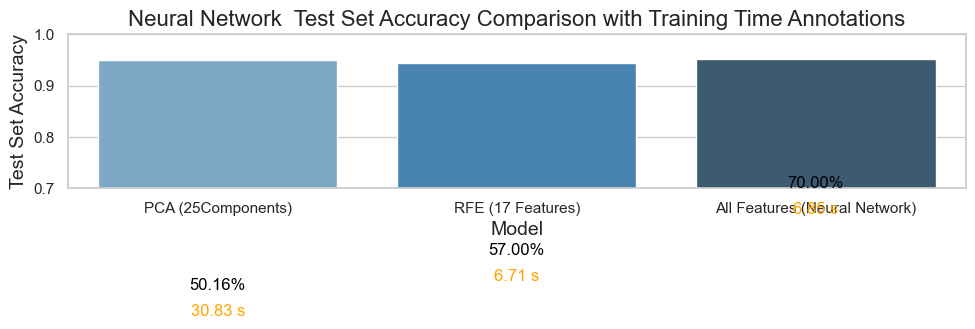

C:\Users\praga\AppData\Local\Temp\ipykernel_24788\499368293.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Training Time (seconds)', data=df_comparison_nn, palette='Oranges_d')


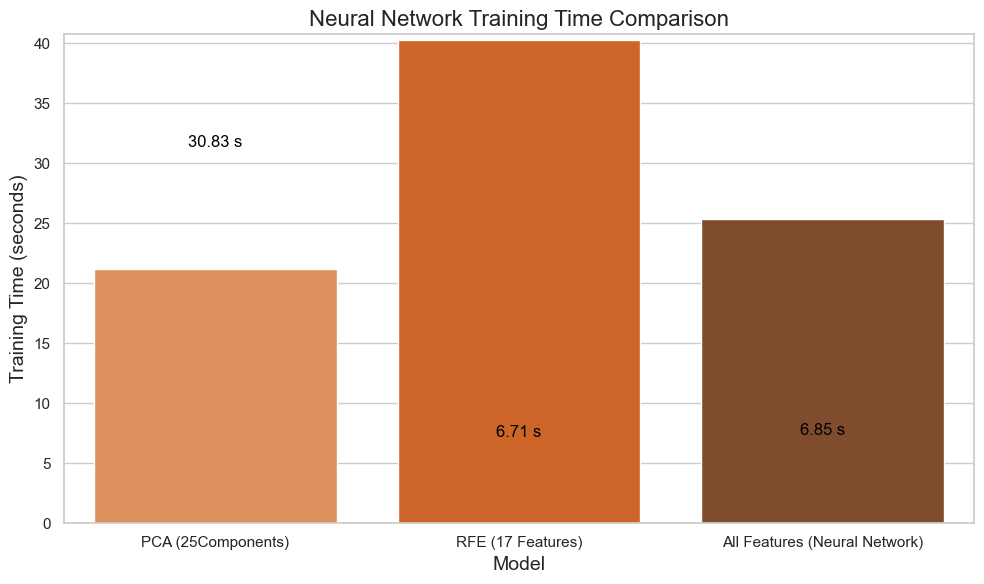

In [282]:
print("\nModel Comparison:")
print(df_comparison_an)

# Plot Test Set Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Set Accuracy', data=df_comparison_nn, palette='Blues_d')

# Add data labels and training time annotations
for index, row in df_comparison_an.iterrows():
    plt.text(index, row['Test Set Accuracy'] + 0.001, f"{row['Test Set Accuracy']*100:.2f}%", 
             color='black', ha="center", fontsize=12)
    plt.text(index, row['Test Set Accuracy'] - 0.05, f"{row['Training Time (seconds)']:.2f} s", 
             color='orange', ha="center", fontsize=12)

plt.title('Neural Network  Test Set Accuracy Comparison with Training Time Annotations', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Test Set Accuracy', fontsize=14)
plt.ylim(0.70, 1.0)  # Setting y-axis limits for better visualization
plt.tight_layout()
plt.show()

# Plot Training Time Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Training Time (seconds)', data=df_comparison_nn, palette='Oranges_d')

# Add data labels on top of each bar
for index, row in df_comparison_an.iterrows():
    plt.text(index, row['Training Time (seconds)'] + 0.5, f"{row['Training Time (seconds)']:.2f} s", 
             color='black', ha="center", fontsize=12)

plt.title('Neural Network Training Time Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Training Time (seconds)', fontsize=14)
plt.ylim(0, df_comparison_nn['Training Time (seconds)'].max() + 0.5)  # Adjust y-axis limit
plt.tight_layout()
plt.show()
    

Final Comparison

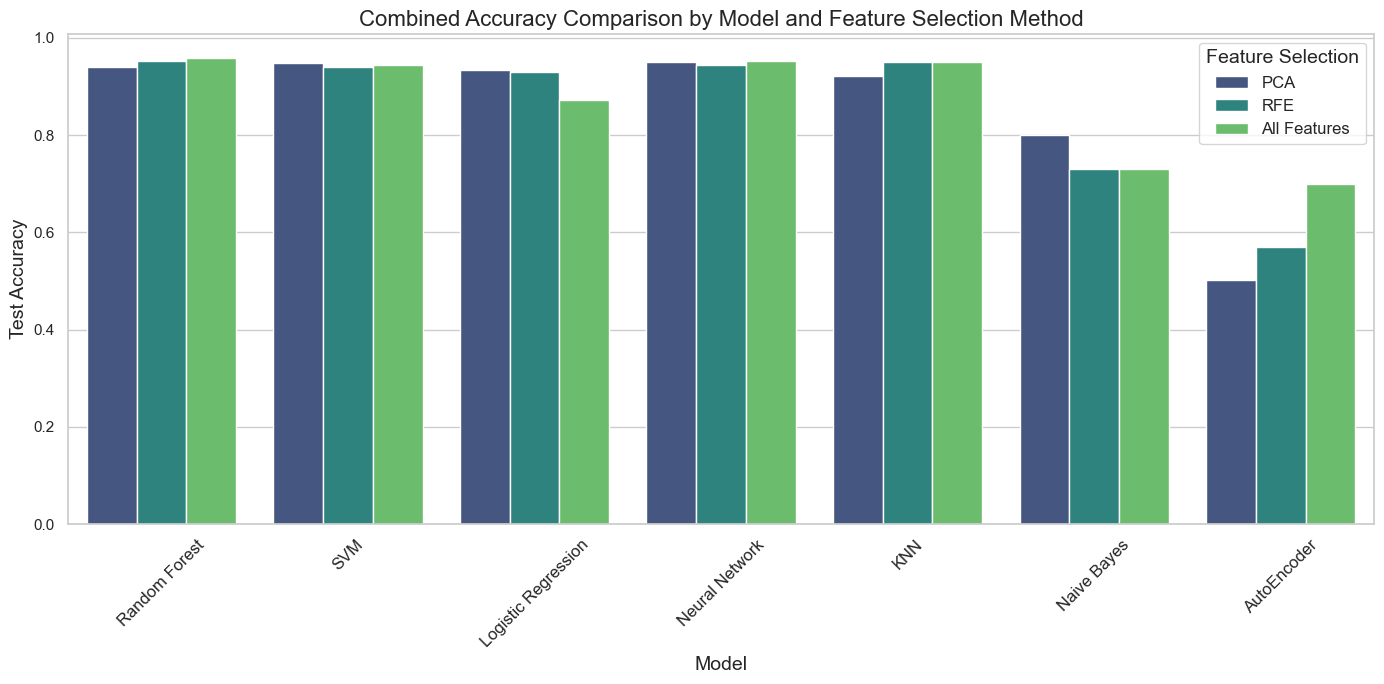

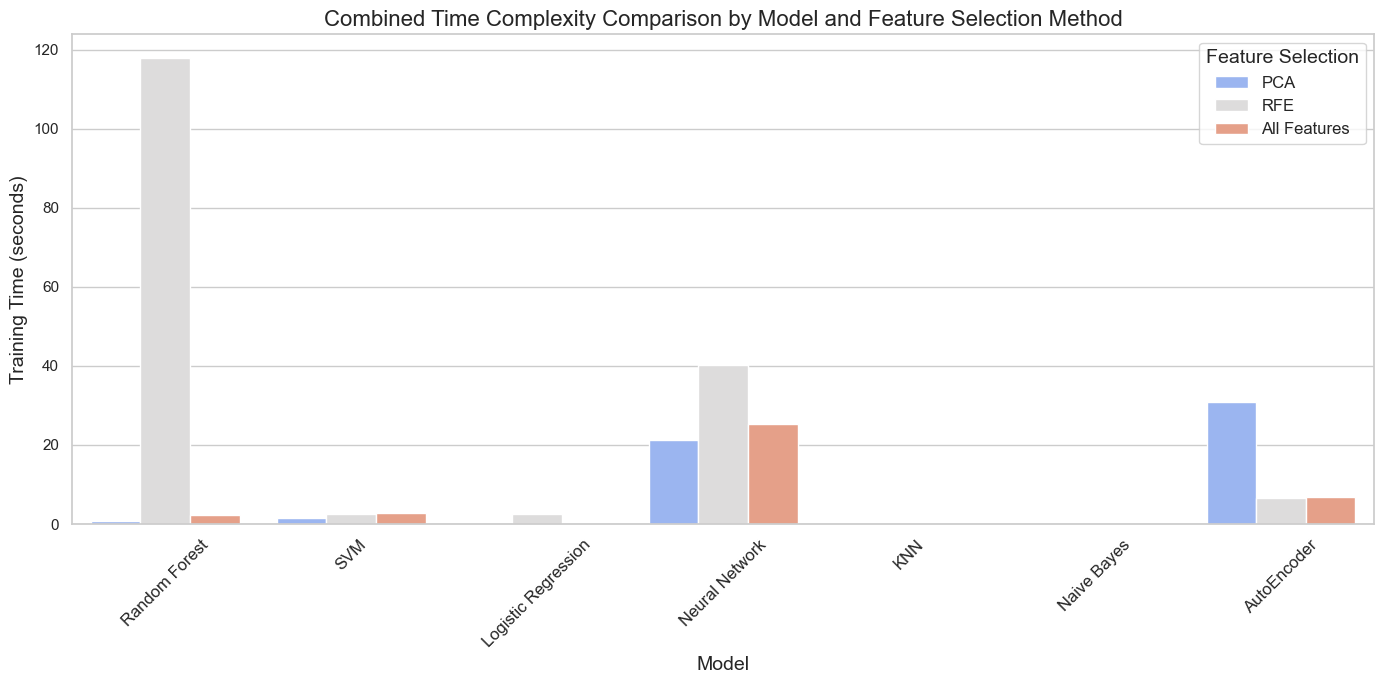

In [333]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define comparison data
comparison_data = {
    'Model': ['Random Forest', 'SVM', 'Logistic Regression', 'Neural Network', 'KNN', 'Naive Bayes', 'AutoEncoder'],
    'PCA': [0.9401, 0.9480, 0.9337, 0.9507, 0.920997, 0.80, 0.5016],
    'RFE': [0.9512, 0.9406, 0.9300, 0.9435, 0.95, 0.73, 0.57],
    'All Features': [0.9589, 0.9446, 0.871, 0.9517, 0.95, 0.73, 0.70],
    'PCA Time': [0.7335, 1.6421, 0.111, 21.2120, 0.119954, 0.000, 30.8282],
    'RFE Time': [117.94, 2.4674, 2.4674, 40.23, 0.0050, 0.0135, 6.713],
    'All Features Time': [2.3648, 2.7251, 0.0276, 25.33, 0.0021, 0.0082, 6.853]
}

# Define PCA components for each model
pca_components = {
    'Random Forest': 31,
    'SVM': 21,
    'Logistic Regression': 49,
    'Neural Network': 25,
    'KNN': 26,
    'Naive Bayes': 5,
    'AutoEncoder': 19
}

# Convert data to DataFrame
df_comparison = pd.DataFrame(comparison_data)

# Reshape data for combined comparison
combined_data = {
    'Method': [],
    'Model': [],
    'Accuracy': [],
    'Training Time': [],
    'PCA Components': []
}

methods = ['PCA', 'RFE', 'All Features']
for method in methods:
    for index, row in df_comparison.iterrows():
        combined_data['Method'].append(method)
        combined_data['Model'].append(row['Model'])
        combined_data['Accuracy'].append(row[method])
        combined_data['Training Time'].append(row[f"{method} Time"])
        combined_data['PCA Components'].append(
            f"{pca_components[row['Model']]} Components" if method == 'PCA' else 'N/A'
        )

# Create DataFrame for combined data
df_combined = pd.DataFrame(combined_data)

# ---------------------------
# Accuracy Comparison
# ---------------------------

# Accuracy Comparison with Annotations
plt.figure(figsize=(14, 7))
ax = sns.barplot(data=df_combined, x='Model', y='Accuracy', hue='Method', palette='viridis')

# Add annotations for accuracy
for container in ax.containers:
    for bar, label in zip(container, container.datavalues):
        model_name = bar.get_x()
        method_row = df_combined[
            (df_combined['Model'] == model_name) & np.isclose(df_combined['Accuracy'], label, atol=1e-4)
        ]
        if not method_row.empty:
            method = method_row['Method'].values[0]
            components = method_row['PCA Components'].values[0]
            annotation = f"{label:.4f}\n{components}" if method == 'PCA' else f"{label:.4f}"
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, annotation,
                    ha='center', fontsize=10, color='black')

# Customize the accuracy plot
plt.title('Combined Accuracy Comparison by Model and Feature Selection Method', fontsize=16)
plt.ylabel('Test Accuracy', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Feature Selection', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

# ---------------------------
# Training Time Comparison with Annotations
# ---------------------------

plt.figure(figsize=(14, 7))
ax = sns.barplot(data=df_combined, x='Model', y='Training Time', hue='Method', palette='coolwarm')

# Add annotations for training time
for container in ax.containers:
    for bar, label in zip(container, container.datavalues):
        model_name = bar.get_x()
        method_row = df_combined[
            (df_combined['Model'] == model_name) & np.isclose(df_combined['Training Time'], label, atol=1e-2)
        ]
        if not method_row.empty:
            method = method_row['Method'].values[0]
            components = method_row['PCA Components'].values[0]
            annotation = f"{label:.2f} s\n{components}" if method == 'PCA' else f"{label:.2f} s"
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, annotation,
                    ha='center', fontsize=10, color='black')

# Customize the training time plot
plt.title('Combined Time Complexity Comparison by Model and Feature Selection Method', fontsize=16)
plt.ylabel('Training Time (seconds)', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Feature Selection', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\praga\AppData\Local\Temp\ipykernel_24788\2753789232.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_pca, x='Model', y='Accuracy', palette='Blues')


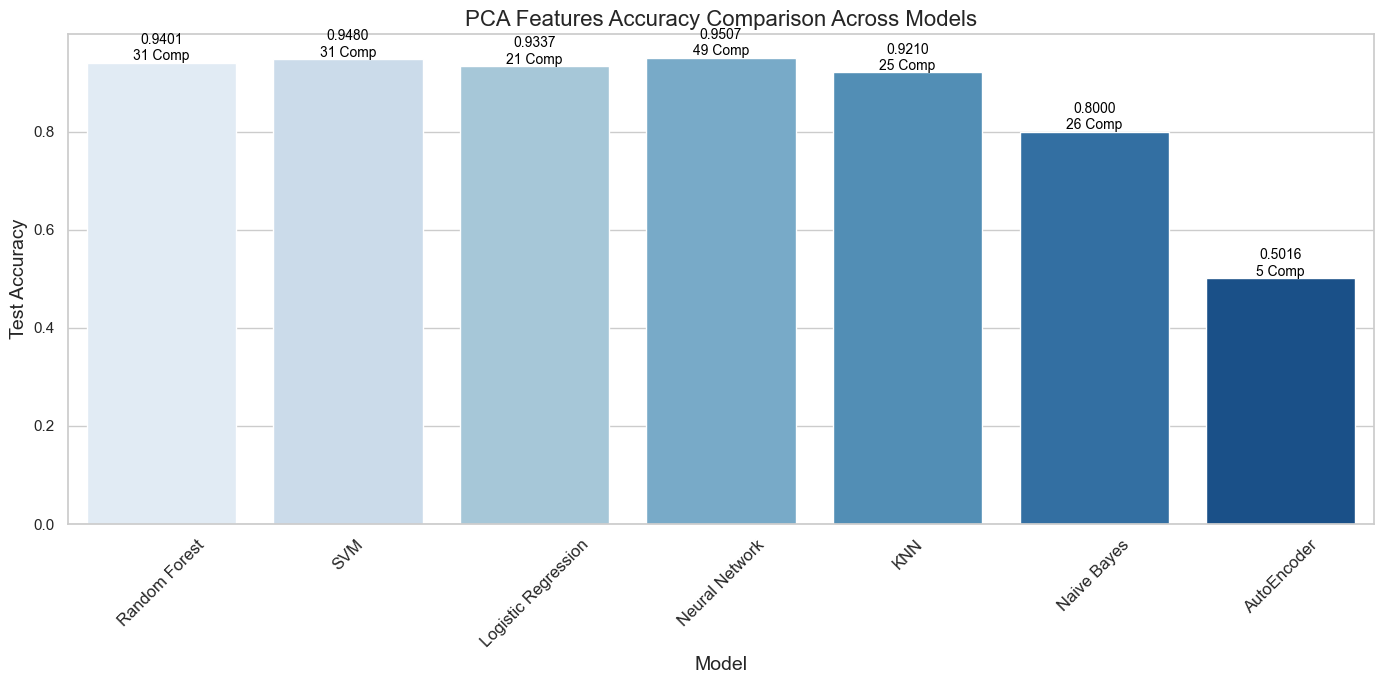

C:\Users\praga\AppData\Local\Temp\ipykernel_24788\2753789232.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_pca, x='Model', y='Training Time', palette='Oranges')


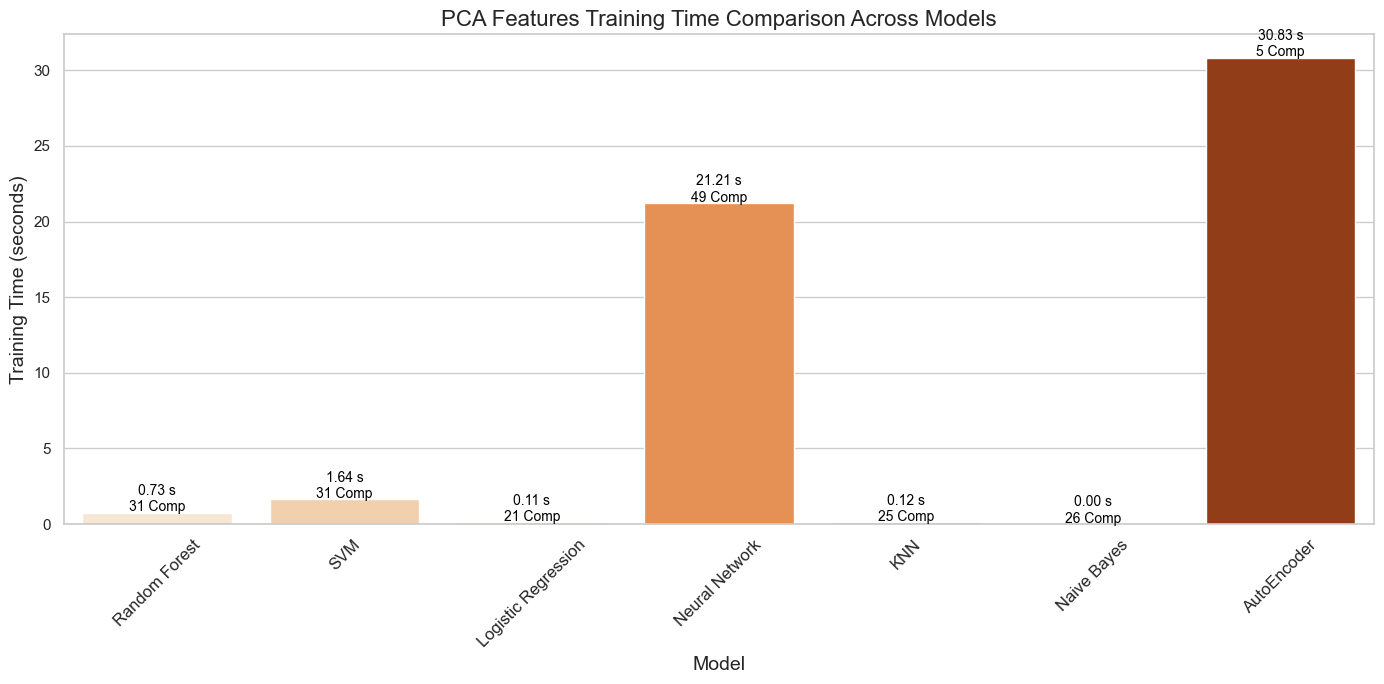

C:\Users\praga\AppData\Local\Temp\ipykernel_24788\2753789232.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_rfe, x='Model', y='Accuracy', palette='Blues')


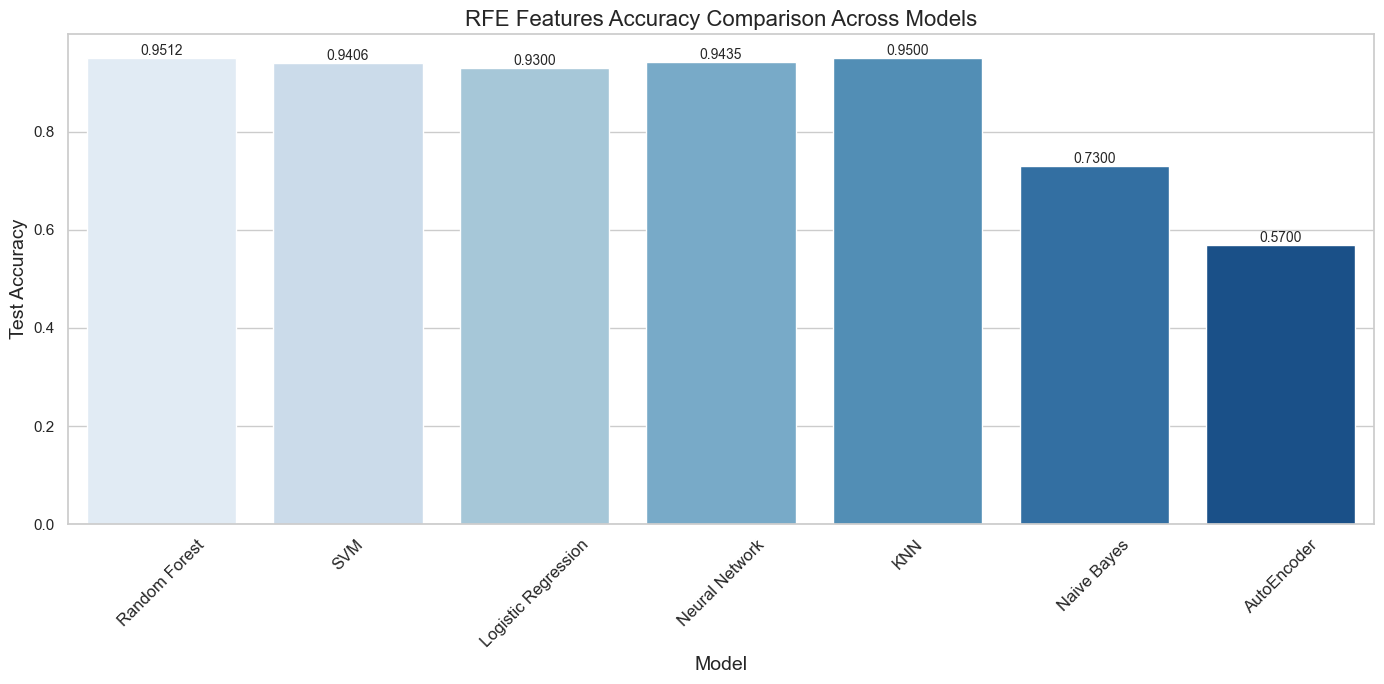

C:\Users\praga\AppData\Local\Temp\ipykernel_24788\2753789232.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_rfe, x='Model', y='Training Time', palette='Oranges')


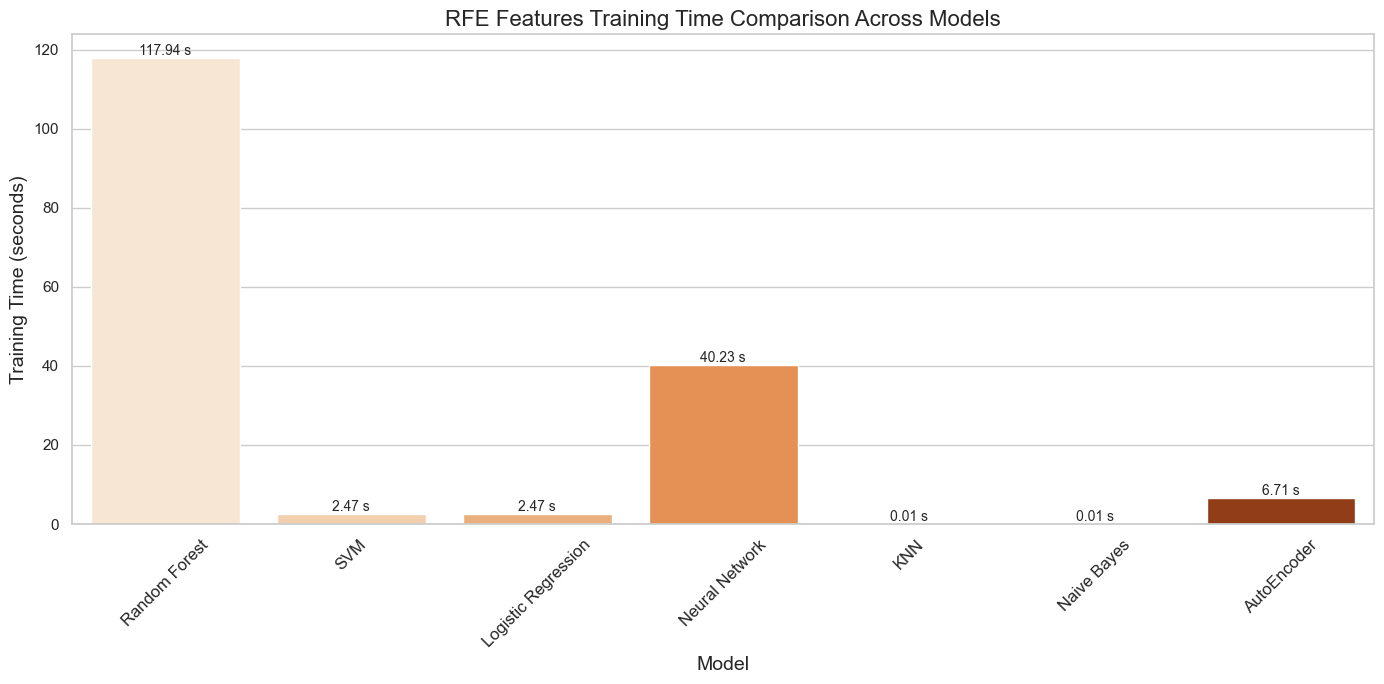

C:\Users\praga\AppData\Local\Temp\ipykernel_24788\2753789232.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_all_features, x='Model', y='Accuracy', palette='Blues')


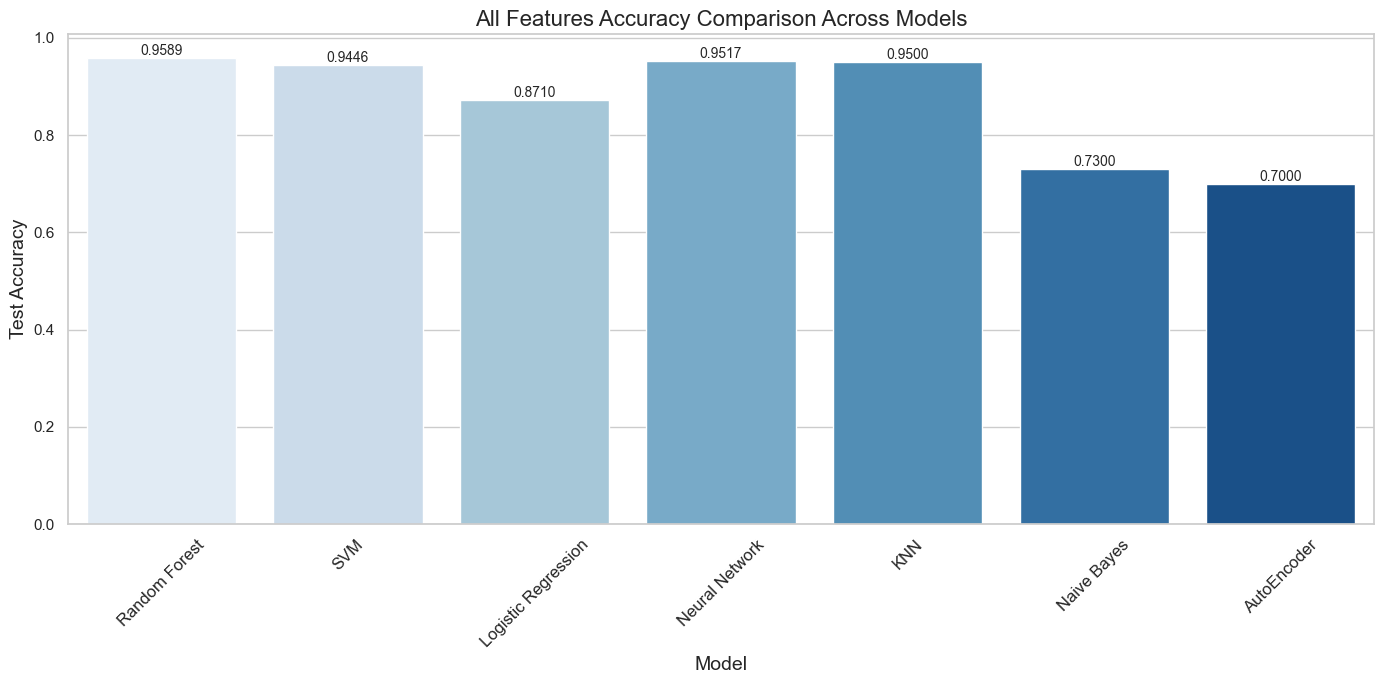

C:\Users\praga\AppData\Local\Temp\ipykernel_24788\2753789232.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_all_features, x='Model', y='Training Time', palette='Oranges')


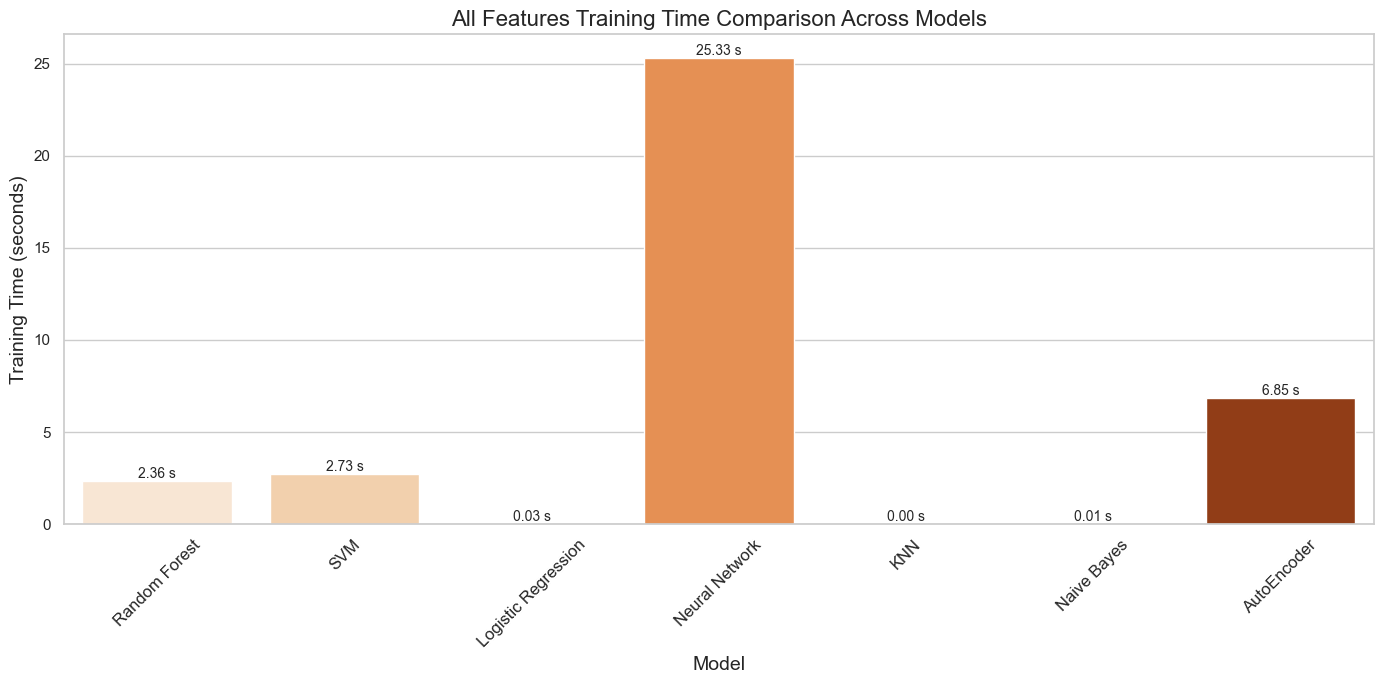

In [332]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define comparison data
comparison_data_rfe = {
    'Model': ['Random Forest', 'SVM', 'Logistic Regression', 'Neural Network', 'KNN', 'Naive Bayes', 'AutoEncoder'],
    'Accuracy': [0.9512, 0.9406, 0.9300, 0.9435, 0.95, 0.73, 0.57],
    'Training Time': [117.94, 2.4674, 2.4674, 40.23, 0.0050, 0.0135, 6.713]
}

comparison_data_all_features = {
    'Model': ['Random Forest', 'SVM', 'Logistic Regression', 'Neural Network', 'KNN', 'Naive Bayes', 'AutoEncoder'],
    'Accuracy': [0.9589, 0.9446, 0.871, 0.9517, 0.95, 0.73, 0.70],
    'Training Time': [2.3648, 2.7251, 0.0276, 25.33, 0.0021, 0.0082, 6.853]
}

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define comparison data
comparison_data_pca = {
    'Model': ['Random Forest', 'SVM', 'Logistic Regression', 'Neural Network', 'KNN', 'Naive Bayes', 'AutoEncoder'],
    'Accuracy': [0.9401, 0.9480, 0.9337, 0.9507, 0.920997, 0.80, 0.5016],
    'Training Time': [0.7335, 1.6421, 0.111, 21.2120, 0.119954, 0.000, 30.8282],
    'PCA Components': [31, 21, 49, 25, 26, 5, 19]
}

# Convert to DataFrame
df_pca = pd.DataFrame(comparison_data_pca)

# ---------------------------
# PCA Accuracy Comparison
# ---------------------------

plt.figure(figsize=(14, 7))
ax = sns.barplot(data=df_pca, x='Model', y='Accuracy', palette='Blues')

# Add annotations for accuracy and PCA components
for bar, label in zip(ax.patches, df_pca['Accuracy']):
    # Get the corresponding model name and PCA components
    model_name = bar.get_x()
    components = df_pca.loc[df_pca['Model'] == df_pca['Model'][int(bar.get_x())], 'PCA Components'].values[0]
    annotation = f"{label:.4f}\n{components} Comp"
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.005,
        annotation,
        ha='center',
        fontsize=10,
        color='black'
    )

# Customize the plot
plt.title('PCA Features Accuracy Comparison Across Models', fontsize=16)
plt.ylabel('Test Accuracy', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# ---------------------------
# PCA Training Time Comparison
# ---------------------------

plt.figure(figsize=(14, 7))
ax = sns.barplot(data=df_pca, x='Model', y='Training Time', palette='Oranges')

# Add annotations for training time and PCA components
for bar, label in zip(ax.patches, df_pca['Training Time']):
    # Get the corresponding model name and PCA components
    model_name = bar.get_x()
    components = df_pca.loc[df_pca['Model'] == df_pca['Model'][int(bar.get_x())], 'PCA Components'].values[0]
    annotation = f"{label:.2f} s\n{components} Comp"
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.1,
        annotation,
        ha='center',
        fontsize=10,
        color='black'
    )

# Customize the plot
plt.title('PCA Features Training Time Comparison Across Models', fontsize=16)
plt.ylabel('Training Time (seconds)', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# Convert data to DataFrames
df_rfe = pd.DataFrame(comparison_data_rfe)
df_all_features = pd.DataFrame(comparison_data_all_features)
df_pca = pd.DataFrame(comparison_data_pca)

# ---------------------------
# 1. RFE Comparison
# ---------------------------

plt.figure(figsize=(14, 7))
ax = sns.barplot(data=df_rfe, x='Model', y='Accuracy', palette='Blues')

# Add annotations for accuracy
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', label_type='edge', fontsize=10)

# Customize plot
plt.title('RFE Features Accuracy Comparison Across Models', fontsize=16)
plt.ylabel('Test Accuracy', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
ax = sns.barplot(data=df_rfe, x='Model', y='Training Time', palette='Oranges')

# Add annotations for training time
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f s', label_type='edge', fontsize=10)

# Customize plot
plt.title('RFE Features Training Time Comparison Across Models', fontsize=16)
plt.ylabel('Training Time (seconds)', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# ---------------------------
# 2. All Features Comparison
# ---------------------------

plt.figure(figsize=(14, 7))
ax = sns.barplot(data=df_all_features, x='Model', y='Accuracy', palette='Blues')

# Add annotations for accuracy
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', label_type='edge', fontsize=10)

# Customize plot
plt.title('All Features Accuracy Comparison Across Models', fontsize=16)
plt.ylabel('Test Accuracy', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
ax = sns.barplot(data=df_all_features, x='Model', y='Training Time', palette='Oranges')

# Add annotations for training time
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f s', label_type='edge', fontsize=10)

# Customize plot
plt.title('All Features Training Time Comparison Across Models', fontsize=16)
plt.ylabel('Training Time (seconds)', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# ---------------------------
# 3. PCA Comparison
# ---------------------------

# plt.figure(figsize=(14, 7))
# ax = sns.barplot(data=df_pca, x='Model', y='Accuracy', palette='Blues')

# # Add annotations for accuracy and PCA components
# for container in ax.containers:
#     for bar, label in zip(container, container.datavalues):
#         components = df_pca.loc[df_pca['Model'] == bar.get_x(), 'PCA Components'].values[0]
#         annotation = f"{label:.4f}\n{components} Comp"
#         ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, annotation,
#                 ha='center', fontsize=10, color='black')

# # Customize plot
# plt.title('PCA Features Accuracy Comparison Across Models', fontsize=16)
# plt.ylabel('Test Accuracy', fontsize=14)
# plt.xlabel('Model', fontsize=14)
# plt.xticks(rotation=45, fontsize=12)
# plt.tight_layout()
# plt.show()

# plt.figure(figsize=(14, 7))
# ax = sns.barplot(data=df_pca, x='Model', y='Training Time', palette='Oranges')

# # Add annotations for training time and PCA components
# for container in ax.containers:
#     for bar, label in zip(container, container.datavalues):
#         components = df_pca.loc[df_pca['Model'] == bar.get_x(), 'PCA Components'].values[0]
#         annotation = f"{label:.2f} s\n{components} Comp"
#         ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, annotation,
#                 ha='center', fontsize=10, color='black')

# # Customize plot
# plt.title('PCA Features Training Time Comparison Across Models', fontsize=16)
# plt.ylabel('Training Time (seconds)', fontsize=14)
# plt.xlabel('Model', fontsize=14)
# plt.xticks(rotation=45, fontsize=12)
# plt.tight_layout()
# plt.show()


In [298]:
!pip install python-whois

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [8]:
import re
from urllib.parse import urlparse
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import whois

# Selected Features
selected_features_nb = [
    'length_url', 'length_hostname', 'nb_www', 'ratio_digits_url',
    'length_words_raw', 'longest_word_path', 'avg_word_path',
    'phish_hints', 'nb_hyperlinks', 'ratio_intHyperlinks',
    'ratio_extHyperlinks', 'safe_anchor', 'domain_registration_length',
    'domain_age', 'web_traffic', 'google_index', 'page_rank'
]

# Helper Functions
def length_url(url):
    return len(url)

def length_hostname(url):
    return len(urlparse(url).netloc)

def nb_www(url):
    return url.lower().count('www')

def ratio_digits_url(url):
    return sum(c.isdigit() for c in url) / len(url) if len(url) > 0 else 0

def phish_hints(url):
    keywords = ['secure', 'account', 'update', 'login', 'signin', 'bank']
    return sum(1 for keyword in keywords if keyword in url.lower())

def domain_registration_length(domain_name):
    try:
        domain = whois.whois(domain_name)
        if isinstance(domain.expiration_date, list):
            return (domain.expiration_date[0] - domain.creation_date).days / 365.0
        else:
            return (domain.expiration_date - domain.creation_date).days / 365.0
    except:
        return 0  # Default if not available

def domain_age(domain_name):
    try:
        domain = whois.whois(domain_name)
        if isinstance(domain.creation_date, list):
            return (datetime.now() - domain.creation_date[0]).days / 365.0
        else:
            return (datetime.now() - domain.creation_date).days / 365.0
    except:
        return 0  # Default if not available

def web_traffic(url):
    try:
        alexa_rank = requests.get(f"http://data.alexa.com/data?cli=10&dat=s&url={url}")
        rank = BeautifulSoup(alexa_rank.content, 'xml').find("REACH")['RANK']
        return int(rank) if rank.isdigit() else 0
    except:
        return 0  # Default if not available

def google_index(url):
    # Known domains are assumed indexed
    known_domains = ["google.com", "yahoo.com", "facebook.com"]
    domain = urlparse(url).netloc
    if any(kd in domain for kd in known_domains):
        return 1  # Indexed

    # Fallback to search query
    query = f"site:{url}"
    search_url = f"https://www.google.com/search?q={query}"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"
    }
    try:
        response = requests.get(search_url, headers=headers, timeout=10)
        if "did not match any documents" in response.text:
            return 0  # Not indexed
        else:
            return 1  # Indexed
    except Exception as e:
        print(f"Error checking Google Index: {e}")
        return -1

def safe_anchor(url):
    # Placeholder implementation for demonstration
    return url.count('#')  # You can refine this

# Placeholder Functions for Features Needing Page Content
def extract_page_features(url):
    """
    Extracts features like `nb_hyperlinks`, `ratio_intHyperlinks`, `ratio_extHyperlinks`, `longest_word_path`,
    `avg_word_path`, `length_words_raw` using page content.
    """
    try:
        response = requests.get(url, timeout=5)
        soup = BeautifulSoup(response.content, 'html.parser')

        # All hyperlinks
        all_links = [a['href'] for a in soup.find_all('a', href=True)]

        # Internal and external links
        hostname = urlparse(url).netloc
        internal_links = [link for link in all_links if hostname in link]
        external_links = [link for link in all_links if hostname not in link]

        # Features
        nb_hyperlinks = len(all_links)
        ratio_intHyperlinks = len(internal_links) / nb_hyperlinks if nb_hyperlinks > 0 else 0
        ratio_extHyperlinks = len(external_links) / nb_hyperlinks if nb_hyperlinks > 0 else 0
        words_raw = [word for word in re.split(r'\W+', ' '.join(all_links)) if word]
        longest_word_path = max(len(word) for word in words_raw) if words_raw else 0
        avg_word_path = sum(len(word) for word in words_raw) / len(words_raw) if words_raw else 0
        length_words_raw = len(words_raw)

        return nb_hyperlinks, ratio_intHyperlinks, ratio_extHyperlinks, longest_word_path, avg_word_path, length_words_raw
    except:
        return 0, 0, 0, 0, 0, 0  # Defaults if unavailable

# Feature Extraction Function
def extract_features(url):
    hostname = urlparse(url).netloc
    domain = '.'.join(hostname.split('.')[-2:])
    nb_hyperlinks, ratio_intHyperlinks, ratio_extHyperlinks, longest_word_path, avg_word_path, length_words_raw = extract_page_features(url)

    return {
        'length_url': length_url(url),
        'length_hostname': length_hostname(url),
        'nb_www': nb_www(url),
        'ratio_digits_url': ratio_digits_url(url),
        'length_words_raw': length_words_raw,
        'longest_word_path': longest_word_path,
        'avg_word_path': avg_word_path,
        'phish_hints': phish_hints(url),
        'nb_hyperlinks': nb_hyperlinks,
        'ratio_intHyperlinks': ratio_intHyperlinks,
        'ratio_extHyperlinks': ratio_extHyperlinks,
        'safe_anchor': safe_anchor(url),
        'domain_registration_length': domain_registration_length(domain),
        'domain_age': domain_age(domain),
        'web_traffic': web_traffic(url),
        'google_index': google_index(url),
        'page_rank': 0  # Placeholder for page rank if not computed
    }

# Example Usage
url = "https://example.com"
features = extract_features(url)
print(features)


{'length_url': 19, 'length_hostname': 11, 'nb_www': 0, 'ratio_digits_url': 0.0, 'length_words_raw': 6, 'longest_word_path': 7, 'avg_word_path': 4.833333333333333, 'phish_hints': 0, 'nb_hyperlinks': 1, 'ratio_intHyperlinks': 0.0, 'ratio_extHyperlinks': 1.0, 'safe_anchor': 0, 'domain_registration_length': 30.019178082191782, 'domain_age': 29.545205479452054, 'web_traffic': 0, 'google_index': 1, 'page_rank': 0}


In [319]:
import joblib

# Save the pipeline to a file
model_filename = "knn_pipeline_model.pkl"
joblib.dump(pipeline_knn, model_filename)
print(f"KNN pipeline model saved as '{model_filename}'")


KNN pipeline model saved as 'knn_pipeline_model.pkl'


In [9]:
import joblib
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

# Load Pretrained Model and Scaler
knn_model = load_model('best_nn_model_rfe.keras')  # Replace with your trained neural network model path
 # Replace with the saved scaler file used during training

# Feature Extraction Function (Assume `extract_features` is implemented)
def predict_url(url, model):
    """
    Predict if a URL is legitimate or phishing.
    """
    # Extract features
    features = extract_features(url)  # Your previously defined function
    features_df = pd.DataFrame([features])  # Convert to DataFrame

    # Apply scaling
    # scaled_features = scaler.transform(features_df)

    # Predict probabilities
    prediction_proba = model.predict(features_df ).flatten()

    # Convert probabilities to class labels (threshold = 0.5)
    prediction_label = (prediction_proba > 0.5).astype(int)

    # Output result
    return prediction_label[0], prediction_proba[0]

# Test URL
test_url = "https://www.youtube.com/"
result_label, result_proba = predict_url(test_url, knn_model)

# Interpret the result
result_text = "Legitimate" if result_label == 0 else "Phishing"
print(f"URL: {test_url}")
print(f"Prediction: {result_text}")
print(f"Probability of Phishing: {result_proba:.2f}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
URL: https://www.youtube.com/
Prediction: Legitimate
Probability of Phishing: 0.00


In [10]:
import keras 
keras.__version__

'3.5.0'

In [364]:
test_url = "https://open.spotify.com/"
result_label, result_proba = predict_url(test_url, knn_model, scaler)

# Interpret the result
result_text = "Legitimate" if result_label == 0 else "Phishing"
print(f"URL: {test_url}")
print(f"Prediction: {result_text}")
print(f"Probability of Phishing: {result_proba:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
URL: https://open.spotify.com/
Prediction: Legitimate
Probability of Phishing: 0.00


In [365]:
test_url = "https://open.spotify23454.com/"
result_label, result_proba = predict_url(test_url, knn_model, scaler)

# Interpret the result
result_text = "Legitimate" if result_label == 0 else "Phishing"
print(f"URL: {test_url}")
print(f"Prediction: {result_text}")
print(f"Probability of Phishing: {result_proba:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
URL: https://open.spotify23454.com/
Prediction: Phishing
Probability of Phishing: 0.98


In [3]:
knn_model = load_model('best_nn_model_rfe.keras') 

In [4]:
import tensorflow as tf

In [5]:
tf.__version__

'2.17.1'